<a href="https://colab.research.google.com/github/ujjwal16/NPTEL_ImageSignalProcessingCourseLab/blob/master/Lab_01_Q.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
%%capture
from matplotlib import pyplot as plt
import numpy as np
import imageio


import base64
import io



%pylab inline

In [11]:
def image_size(image):
    if image.ndim == 2:
        return image.shape
    else:
        return image.shape[:-1]

In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = 'REPLACE_WITH_YOUR_FILE_ID'
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Lab 1
In this assignment you will perform some simple geometric transformations on images and see an application of these transformations.

Instructions:

1. Proceed cell by cell. Each cell already has some code, but it is incomplete. 
2. You are required to fill in the missing details. The places where you are expected to supply code begin and end with `# <---` and `# --->` respectively.
3. Please read the comments carefully to understand what is being asked of you.
4. All the images are inside `images/` and have already been imported. 
5. Make sure that you always do Target-Source (T-S) mapping.

## Geometric Transforms



We begin by writing a function for bilinear interpolation.

In [12]:
def bilinear_interpolation(source_image, source_point):
    """
    Computes the intensity at `source_point` by bilinearly interpolating
    intensities in the immediate 2 X 2 neighborhood of the `source_point`.
    
    Args:
        source_image (np.array): The source image
        source_point (float, float): The source point
        
    Returns:
        uint8: Pixel intensity at source_point
    """
    i_s, j_s = source_point
    
    # Floor `i_s` to get `i`
    i = int(np.floor(i_s))
    
    # Similarly, compute `j`
    # <---
    j = int(np.floor(j_s))
    # --->
    
    # The co-ordinates of the top-left (`tl`) corner are simply (i, j)
    tl = i, j
    
    # Write down the co-ordinates of the remaining three corners
    # (top-right, bottom-left, bottom-right) below.
    # Use the variable names `tr`, `bl`, `br` respectively. 
    
    # <---
    tr = i,j+1
    bl = i+1,j
    br = i+1,j+1
    # --->
    
    # Next, we compute the distance of `source_point` from top-left corner along
    # vertical and horizontal directions separately.
    del_i, del_j = i_s - i, j_s - j
    
    # Create a variable called `pixel_intensity` and assign the
    # pixel value obtained by bilinearly interpolating pixel values
    # at tl, tr, bl, br.
    # Use `del_i`, `del_j` computed in the previous step to obtain
    # the weights for interpolation.
    # <---
    pixel_intensity = (1-del_i)*(1-del_j) * source_image[i,j] + (1-del_i)*(del_j) * source_image[i,j+1] + (del_i)*(1-del_j) * source_image[i+1,j] + (del_i)*(del_j) * source_image[i+1,j+1]
    # --->
    
    return np.uint8(pixel_intensity)

Next, we use the above function to implement a function that performs
an arbitrary T-S transformation on a source image.

In [13]:
def transform(source_image, transformation, target_size=None):
    """
    Transforms `source_image` as dictated by `transformation`. 
    
    Note that this function does T-S mapping. So, `transformation` is actually from Target to Source.
    
    Args:
    
        source_image (np.array): The source image
        transformation (np.array): 3 x 3 transformation matrix
        target_size (uint, uint): Size of the target_image
        
    Returns:
        np.array: Transformed image
    """
    source_rows, source_cols = image_size(source_image)
    
    # When no `target_size` is supplied, `target_image` will be the same size as `source_image`
    target_rows, target_cols = target_size if target_size else (source_rows, source_cols)
    target_image = np.zeros((target_rows, target_cols), dtype=np.uint8)
    
    # We iterate over each pixel in `target_image` and assign the appropriate intensity
    for i_t in range(target_rows):
        for j_t in range(target_cols):
            
            # Map each target point (`i_t`, `j_t`) through `transformation`
            # to obtain its corresponding source_point (`i_s`, `j_s`)
            # <---
            i_s, j_s, dummy = np.dot(transformation,np.array([i_t,j_t,1]).T)
            # --->
            
            # We ignore all target points whose source points lie outside the
            # source image. All these intensities remain 0.
            if 0 <= i_s < source_rows - 1 and 0 <= j_s < source_cols - 1:
                # Assign the intensity value of target_image at (i_t, j_t) using the
                # bilinear interpolation function above.
                
                # <---
                target_image[i_t, j_t] = bilinear_interpolation(source_image, (i_s,j_s))
                # --->
    
    return target_image

### 1. Translate `lena_translate.png` by ($t_i = 3.75, t_j = 4.3$) pixels.

In [14]:
def translate(source_image, t_i, t_j):
    """
    Translates the `source_image` by `t_i` pixels along rows and by `t_j` along columns.
    
    
    Args:
        source_image (np.array): The source image
        t_i (float): translation along rows
        t_j (float): translation along columns
        
    Returns:
        np.array: Translated image
    """
    # Create a variable called `translation` which holds a 3 x 3
    # numpy array that corresponds to translation of t_i along rows
    # and t_j along columns. Note that this matrix should be 
    # T-S, so it would be the inverse of what you might think of for
    # an S-T translation matrix.
    
    # <---
    translation = np.linalg.inv(np.array([[1,0,t_i],[0,1,t_j],[0,0,1]]))
    # --->
    
    return transform(source_image, translation)

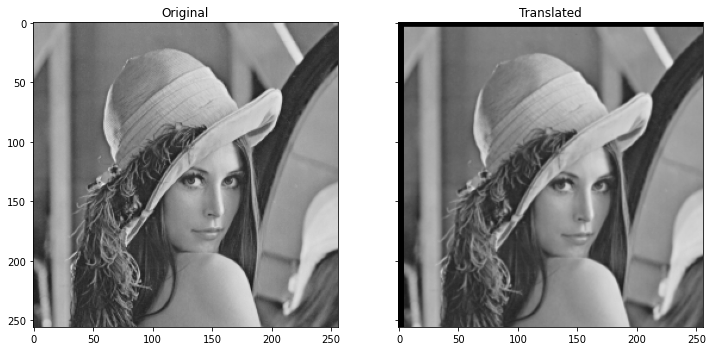

In [15]:
lena_translate_str = b'iVBORw0KGgoAAAANSUhEUgAAAQAAAAEACAAAAAB5Gfe6AAAAB3RJTUUH5AYEAykW8/cFIAAAIABJREFUeJzkvNuPdFuW3TXGmGvtHZGZ3+VcvnPq3OpK29XV7nYbut1+aMnCiHZblmkaIwuJv4F/Cp4QPPAAiAcekJBAAiNQ26bbdT1d1XU5dS7fLTMi9l5rzsFDfPVXkG+hzFCmVuw155i/MWbyv0RJWXbb6RKojohmOPdX/vXrlxNrCFJShSh5KjpbdrnZq1les4rVCu6cggxDtqWJVmGYGa4q0W4o2gxDg7m2rXLJmNXmuoEq2qyogfKctfXjzc2ytAhx20IgInslirTDFdRsyuSjj+5aNOD0i3/107HwQIb2ntE2ygBJaGpbqXRgT7h//I5+Jvz//EtM2C4jXSSILJIggeIoiLCLMMtlV4GECRksIGHCRYGgQZAiSIKwCzRcgGnaBoBi2qbholVJ0EjSdJkwCdA25DfvsmEDRdEoGwWCMFFBGIQBVxkAqOVAlAADYaFkGyJgy4BB0QRC4+GLX7QEEkyoWOUKVQUBwFXYWDm5t+gYNFN0sgQzI2QmjQpMltXKdJZgI8NVYgGwJ6vMPvrWZxTDxGwV5lT1golBRME7CcsGnVDKgDWOtUcyimCfZKlsGiorKl1KGMW8f7UqKrA8+fjLX1UV+97MMBA0ZNoJLBk2wAYFf/blr17EP2UBRUIgjcjWImigauzzMrYComc1uDsKgChYUJIUk9kACGWACJtiwA6iVoDIKCJnjJhVDEBDoG0VDcgOGCWg4CKLHHJwKCvsCYUEMmzJTaSMgFhQBa8PJ+D92EOwiP1VgWAIIAwmCWZkmKRIAhH0Vz/68atdBAYB0kSypwDYtM2aGVkuRSYHNOkyEyAAIVC0KKZRpAKwYdE1C3JNzYJTMCBShSZmOptooplwZbqBqrAYYhQa0aUqk70Ytc+aacOkSTMiINAOqpU9mCiztueXWUUujz965txrJMo0quhZGddHCjaNaL1+/eNf7iXJ6EY1UJRLsUSQWVkJaLg5MBlSKKLMqYRIeVbCnJiW2UgkCdoPSChku9P09ZGDokBaphxVZHRIkARnk+kATNCflROC2cGh1rjvA5WeVohBQVpCpCCDql4GAdTL+z0BxPHtj28IwpMoQiSalSzAjigDjZeXP32xJxl/RgAAjQSI1kIkjKrheal5AaDFCAKG1SZ07SkKGd1SgXDRtAPqhlvaJiwUJFnla9UiSdMirIqqnhZoE6wyHMAdwbBJ2w6lSfTWRAqNQTEYNmAaDithAAgP3bTrAcXluRLVp6PQbJVgihJothZx/9kPf41Ch1xIm1kgbTWKVelCMSs8KyfTGqyKsjSFBFkgnGCJbgBBC6E0JQnkEiqYUrE41SQxwlkIswxBogrNBFBFiqiqIMhCAKaFcMOozTXKyQgTpIuklhCQ6W4Wywm+fD0SRa5PPnl7omjIYpkEEcEkW7Smpvuf/+DzeYLOliEJjC6QCghFAJNIqLWlQWwuJVqCKoudkgJVZBJg/eaRAMTKqkp4R9Eus7IzkDmKLAm8CiWYpiDTrRVsqSGAhIAJmwERm4DKvAzKRDlkuhXDSAaFYEoqQfD49cMslmN99+OYzsk0guyioYJAsLXgw88+/cItGsICExavWoAgYJcLAyKSQoPtiM5JY8yeGKzMMsDSTMNEZWq4BNgkXOAo2pAVe1aqsXK6IaoSgKfNBSjawyCYWcoEsuxwaYK3UVHZWLut6QIooJCtHHamHGTBIFGIeHhxGWlqffTR+9HM2VCzYkwwS2tQTYq4//lPX3oJTIQkF1kGHYQNSdM2rh+KpicVTmt6GNFmYyQqUq4CIUIwEBVZ6bq+YoFKTk7HbqVzn0b6TLtoFHrW3KaRIDOgipxJoZhIk2b5DBWXYs2RRcBGVbhsmOFCwTkB01UFjPnV/Ziuipu3PzlsmihUjQxgKDmCpKDXP/3BKQ/ZaDNURVIEQEbrDYWo8qBF1LA9nVkxQm60kZSAbBBdEjgnaGU5CjCyXFQkCyX3hsAkMunhcs70BJyz0ggQJKuqygG5QCBh0BS6nRiOvgoJi6CbYKdREIpEBCEDIVfo/GLLAhB3H3+EUWC0HiAge3IzEHz913/9eKsxTonolCWbsKPA0FUDO8MQgDEG54ZQpbHYb9TpkIAMtiFAyDLsKoliuJx7gi4GLQaUs1ApS6CTSGtjJgxIZpVxFVKCTKhX0pNY4nonPSoHaBcq6bLLFmWQRUAkQJX8/H5WgXF4+vUnMPLc0VHNrAVDYPjhJz/66gvkoJuDuyJEAwRCEREyylWWICMUVguDRaSqgTAsohxlyJ4AC2kSwgTMFqYAwzNZJBNyjarMQAI5pVwQeT245rBMKgzWtJ0FAW3O0aQIUt2UKw3SJBFFV8CCGSHJoEzz8sU2UeV2+/4ncLmdc9JJx2RHAK9+9MMXc3iNaOzaHwkARUmIaLyKwDclWjaIuPbxVS3NJEnDeR17jPmmChTTTodL5biekgy5RjKUmGKpBkRS00gqCqAyh00kbSEZhQhSsSTK1Yu0SU1UMpPlTJZVhlFlYZJggzJk+8XLMWBiffrNd9NpO8k0FXAXX/7sBy9jsXIp0pe2x38EpmAhrAgRQPraq2blvGwVzQINSOmiBYUAkpwipdFMmiZAyAQRCfYCWbJ2t6qAzT2uzAFlACUkwlchRrlIC0aprkcsz2FMsV0vp6Wirr8Hcooiqjlc12/TI/c1BErtsDwfcMBGJ2U24vzZT1/0cVOaq6LATjWAUBAIqVxlFGGa5cyRTGQQAaR3hNJZpMlyQXRWdYNk2NMUXSOZZA0YSUbJwwDB6iguI4dNA6oIWgIaKZScsmWSgGA4gxGKhkoDLKfLNlx2mlQC3a4SWBBSEacTGCKiv/3W2HNMmK700tQuf/OXn+eu/Ya3KIK99vgzQS0KwQjDstNJGUDuMy/bNAMy81or2UVR1SuqGFWNAKLs0lShspkTYGsAWC5X6QoYWnWwEkrLJOiwCmACMg27HK1YcAwr3ch0obXoIEkmAKTM6wkiYJpwqcqw4Bq3a1y5BL+8h0QH2dGkFz/59AXYWpRQckFjxj+3jAIZRAHT1yZLqmrU5XyaUFBQS9oUPSSxGWHYTTbzOsmqUQzQ2QkzDVRo8iqyK/u04Z225UApCaiMpK91JCxWSTANZcmqLEs91EJ17ZoECyZgViFA0ygkUHZ59LsWAYrt/MXoKKEcVLz8xY9fNWqu6wFLlKOml/jnkBluCroyZdsiQFSO7XKqXUtFC89r10kEEESoAo2zTYdgGEJaRQCMslIpAHhzZwkKnAWCJoxqgMJAWkwapmcTSKTiWuESNkWubAzHGyZEJeFisQxCeIOMgIJp591RFMRqL1+LICrQcf7lj++talJlbhM5mUhNW0iwwSMr5xxvMBnCiFCJZmRm6+Sagkm5AEYW2BCoYiSI1jtUlS4X38ARoIxCDzOQDBaqEtOFSmRWkU6EktEd4etsWKjEG2BU5VlTiaSzPGmUy6orFKphwa7hOVEo8PzFKW1U3Dz9eJ1VWQDj9LOfvEq7ofd1FQNSkhX/ScmgemCfE3bx2lADSJ/2U21cRFJAJSMlsFdroKVQUaQwdZ1h25TLXSQiY6ockbJLhTIP69eX99abtkwY4DArPduV2gI0ALUK05BctiMnRfUWaAXSb3QdDeuqN1hVhjMjIQicNwde/2Y9f01GryVOv/rJSyCu6p9mSjuCbDILAeZWlVUOdbTKVpzysoUDdgaJaMOgIYrKplIVQFOlKAoxkkGTdTwjNFOzZ62ZdJ/vXVRxfGd/y8/Gbdb87PLFSCVEFViB68Q+VIkZNpDJBKtUEGSortNgGIQSQJFJIq/gVTSIaqzLF7cRInh457e+iiEsPP/056/MNhuuEAZtz6iKij834OhUzhpVrNYLBTdUzpGnUZbewLWEYFCKKjGSvIr539x0LFlwkBvkMtEGMY/LzfLoCPVHT7ofOepuPKrbZ3efvIPMsitchAIWgT6DjJR8rSpXmNKkJiaj9KaiJEkUQSRMX29aGTQc++HYdOVw5y/nwsP580+/IoposeZCy2O4moPNKISEytyqoAB66Ur5jKt8tUkVpi22ZMAMRUUaiHFVxVwGlIKMVABtJzDhmzV6BmQ9vr3v3Ndl3+KcJxyXu2cPr3/+ap+griw0IRRSTjmrUIzJtA1LAMOFjKSKoADbJQKYpus6TpiF1K/vWqChHd769osXsVx++eN7mChVn9h9vZCYnIz/uCR2eOwj9+TsPcACW3GfY7tsabZcLJaql8mwgyKD81oAXKJUjhmEZdKugg3c3LXOZT+jfLMy3HpLsN9PL3PEePL4/ff6fEDGdY4kYTomSplCAgDTwbZGoCdN2VEtfe37QKIwWb4CUJCUWVO3LSg29flC+fyH9xPNatVCVZoos4uJij8LtEbWrMvYdkRb9aZxlUddLue9SwKgCRpsE+rRLSauk6gQjiDKsCZG7EHIheZ2t2xq3D2PKuIcMGrNZADHnfI8ru8986tipSzTbbKkZNK0CwbKHWuEmq9UUQ5TsMGqNItAOVjFFFQAtJ8fHSIIScvL8xc/erWrqUX0DhUxR65LGWCLP7eiRc5937bNXJdoFNFA19zH/T4zHDJKdeUuV9ghC3DPdp0chisqINOlcLTblRtuj1vAW8QN9sjZL5EzHNlqGdETPWZb+ntv3T8UGdch00KqVMiaQsWI6uixtpSuJ1AyynAZholkIbKUgmUBQKXv1iZSLfLf/uAz0yZa04wkCzhoJhI9488joueY+355mHk8Lk0CbTinx/lyHuQtVZBjguUOSBXXubRUBc9miyWz7Dzk3bvHw+X82uucZQ3jkKpofRybPPt5rDrfGneFTgO6/Wi8GoE0MMosy84rUcjKKRFdivZmDIoJkkAhA5W8QmlcR7arwVvYbu5CFBT4v75vs4VmKAkHs9UVKdot/pyLWGPW5fXDSYfeWlOpWFHcazxscMNkazEtVgjAdQZTUUaxQUVWWMhkPv5t387L6WRyOux7zOM5u3sWlsTKMw9o2B9hX7MUmNHbe08eHjQ8iyr4evltsgxkSbFGIwmggmkIljCTaV61pQEwG0kJBHI8iqAi/Pp/+kVUIBwLALbLLMTNxL6iDmwKxJy576eHez5mEIIcGWZxljBU5USSGUXVDIQZqRE25pKGw2RiGnrvxf6vDvdjZkyATTb3Ni+HvUWpM6vtNxX9/gm3Fq9u2qZjVMXywVvf/0mWVMmriDZUU2lMjeu0DqFgGQiPXlAUKxF0JFhs6QAgWrbi8vnhALLO//KHCxuY0UzIlzK0nge1sbeS+mLM9PbwcL+ni3TR9UZuIauyBkAgm8WpoAqj6IDz6u0hwygUfPvxi4fx6n5cPKuBzZ6lZS6VdX7wJbe9asFlPiLbxTd0xwnyPnT3O7//eI7L7thqMMu2gWjVHYn8jQFNVmUae9HJLNOzZqBIv8FlItXo/Pz5JOvhB//9wEyG1JFiTVvayQlE3x/UAjU8xn45XUTRYVrKcmYZYVUqlAVdSXhhYmTNqvKcbKyQskBj59/+wWfnMvc+hH3QEynNnLHPS3fdd908OrfVynvdTrRxiUM5yJr6+h9/4su+73OvaRtZ3J0qJ9gYIBEB2nLN6f16JDZxNX4KEWDQTIstxi/OYz58+t/8TXBpBXZUI1joi/KC6OtSD/fxL+gx5v5w/8VLrLdrtAUSbKFqG9vpsmEJMRjXITzKYnQKBbC5XBayGUSv+kUsdJteema0bEyAsVzohl0L13EQopKRCIxjJEWzefS4+ej2q4v2tFWw6RQnCSh4aF2NBot2KZF2oAQzKNmy5QogrAoHmnK5m5/+t/9ntbADyxWPj86uMcM4LL4/V4tCee6Xl69yDYBVHUg0u6oITANKYaX7HlXFKCGb4hxA0QDsdjVv3/qRD7NrtybUrYXFhs5t7/3kJ0m57R2Xu3k69LMeYe+HnQ05YrH7+ls3//tz9HKGI2G6rkZZcRwsXy18z3Ii+xUgCrBBFFnUlRUsBi354fnP/od/g6UsCpNkerTVqBhCHNvL03zUzJxzv1zuy5LBAMg3gZ6YLrPKQSbzgBqttPVsqsqDDVQvs1BQup6dHFqnswOBZWad127BU2s93qCX71wCl0d4uFtz3LXRlqy1JiMHOorxjfg/fjbR2YOzVWYPzWLZcR2OYzCBmi5n5yL4qoqLYF2BpKkMkdVx/+n/9mkFqsuSyck9e9tHDC5+1F4+1M0fNtaoOU6vTmhkYwbApB2YpSSMEKhSRV7tn4Dq+lNJBiyLlonHv/0/i1VVnYSWh7ZcCqrw6OvW7g+X5fbl44cbvLo7XpbmZM9ccva2gVAx9zp+cvcXl1++uALvYlT2mS4Wo8kMthFK1wXV2GcHVQwSg1c3lUbE9RjAL/7lX6dT3ltfuVelZ4+htneo6f71w/q7f6/lrLmfH152DBBW0gUS+Rv8Qtizo+2ZmCoSsEqpUBExrQonuv3k31TkgBc1Z70+xJnHtnMeb3J69ldP2uinR6+fHvc6OA916d2XhdgDmfCpHddjf+tb87P/8SfF8tDMUFIZEJ3Bq5EyUNsYMbUdSphxfQr5Bgub3EhSofNf/2SALvQ1J8IuHRZ5r6jQ3f3zsXzn776jOfexne4vs3WXISQRDJGgW0WrYIe7AhFmySDQWl84bG6NCEBON3yuMVJqzROn43BKm4d8dtaCW6Xp+cSXR22uh327wUkHXsR91HbCOx+8ddNZ/fbbf3J7eX0ZGLOyXE46baSvKLCFat4/nB623KGwMQ1B10QBbDUhQuOnfzmKGgtZLO9bWi1Glcn1dp25fPS3n3XtntvpdAYyFBLB/I0F40oktXlvNS/JhGYDDdJzTFs9DlADkMU4/GruGaGOvlt3qT0qURMbR+fl4vWBvNFXy3qJ4346xINux8TxdKrzePTBu0eHZ+Zufuv359zmrCA9K5FB5jUNdoUP3PZXLx8ul8qrMPC1PagjSMOwlb/6q88AzQN6rClwMZbA3FjuN3fp/rXf+0Zni22eH16fRGRzwTBVAlhwVaHQ1ChzLaM0EUEYUiEqDVSxqhvaLpvCrakN9djDdn95V8e8vT/cH1N6Fa/efn339ml54tNxueDx6Xwbl33027dugkPY2zSHWvzRz34gqKAqATlTFpzhglVsvW0XDrUWiIoKFopAzWvAT1DH/Y9+6i3NVMTs5ZxswpYNsdzwPMaz73540N7OuZ9fP7iZIWIapsNFM03XGrim7jRA+jgn5zJWglGUzIpiUMX28syk1Svz6CFzO2y3XrDMx9vTF8cq7o/3JR6e8P7pcdahbdEecl8fPV2VZWfU0JbLED/408/uUW32IpIBsDJbN8vxJjj4Og/H46AkJK7qJAGN68BMXH7yw91JRQtoypXscu50Qz+0+/G1jz+8q92a4+H1q33lElMJGQEYMCRCLamG4CxDqFbFqeyYrqtYTf4GaJ62Sqs1X3ibI7Cntq7eUodL226qH+ruYV23vtc6X6rO5zZ/9rre+/p7jzD3UdKoxGHu2J1f/0f9cpmuMisnbIMqm1dPLoDt4eXD+VzTRGSazqseKlcOtvryr17vJq+xEIlzXyLmoJa33ukx+Pijjx8rxx5/cn71/IIgEjwcjodoIl1S5hzzct7mbGhoBjpEgEQnLIpyEyga0R+2EhExq/c58rBrUsfql5XGvu59OXffjlwuB+/tsM2by5en+No7TwLTWYg0M8p9lGvF+/yxU9WqQEQsbe0tTJULmGNu9/dAW9kUzVdf0gChCqg1vvq//2Y0ScshSHNWtZs2htlWV198+OjDpwv2mTqfX5+ryWTkNb5gA6xJEmU5da0tDCSdsMO+WlOTDGGXwcslk0Hah3Uzl8sYyyGgVwvXjXfzGD7gUJHj9jLv+lnH17/YHn/97bVy23f1WQFoYu5ri0Bf/vBb6TFOCTszHVWGAoQULUTN0+uH02WbnmIxUTSLllpTnL7/k/mN92+gBTPBquLiTLYwHes8vvfsUUBjv2nn02m0pkFLM64xUCutJFGcopUiNN08onxFQmESoidaTEU+FJtaIA+VUZoj12it9AjH/Sb24+VA80TGvNzebD68+mJ796PFe9vYWttn2xrKrBUB2Wpv/el/9Ty47EMUIYdoJkFg4prTHZetrcvoDKvcfFUC2dDw+fc3/ywmNcVJZKIf9FLdcC3S4cmzx43Y6+lBl5cPcINK08yoyoRK7Q0KZqFNNbF3WYIak77G465B6GxdvHRU9BzRkPZpnHBYRlQY/dwuteYhsD30vQVvcL59+PzL04dfPyB0jmi8OHM+bI3LTeM+z9vpRP07/+BJbnNU5byWGcNgMSzPuSszT9vMOdNsyXKqAFMmXvzoy31nxrKEfMQ2NnTv6aQ7am3vvvfOTct5ur1p8XcepoQSK1s7rq0tiiLLqtq84X70uNKfFEpwkEYIWsq8yo91d/GwhUEJNVtrq6Lvx62j4eHGpPjAdTZx2Q/HV5+/fveT91FlBvrJ8wLfqDePPA+XzBqOD97e9pOLkWrr0uIaVAHSGPP1q9NCLosXhQDX1U8l2br2n/zruYtYevS0N2S7VZ60hpYb5uHd9x4fhH0ebhrjdy7BiEiBdduXZQkpCq702Lb9NPaqfg14Rl7RoBigwqVsCGBZ7kd2siogaxxao4lD39fZ13l3wXKKTRgNS+2Plte/2r/77u2M2peusS3jssylY8xBEr0zDBDHr/+WP60po7d1WUINboDFHOeHh/OM/WGNlaEGgIBJkqH89V98NiQufXERntXiUJerajT74w/eWRkc/fGKiO9Z3ZyIsnQ4HLVeMxiiZ419u0y2RsoNphDVec2JAUAvMHV3eV1VHbYJKHuh1A5mzbtUO/eOyMJgccTaX//6rd974tR+9FAis/NwwV49Qk0CWAQI8/aT9eVXINV7X5ZOAOVQP8/T+XSuMSOXtggdQLk6rJD4+v/9/iCa3MxWxXS7yb2WXBhgvP3B+ysdg4866UaJzcEkQ5BZjYTKVayiuqtnQy6DMmnVbOab2Lnp1HE8iOd1tGop52yzWsRBvtw0P56XJw9Zs4/G/Ra63N/nJx+vbJP9ZcMDpTBfL60/YBmwhCLN7VDY4/YfPnx6yXUp9EorAcu6oExUS+fD6RRrzQ6wOCU54vyLf2sK7OwzR9PFy1pKLJiw9eij929csfm2ESiNN7YsiXAnzEo4qwBE1ACiAuCsUrdRFmBPZ4FCZvv66/P57N3oNNGXqm6Lo56gH7bU+dByvSxQn94uXr/9diS1XmZskxM+XXR3SN/OyWAVZoIpCxxb+w++d9pnFmYZA77CRzDYNKhx+fyr02Xbh2HbqSLz5V9dEL2JMQBFEk3b66mNxywfP3r/cQMuo/d2DYgVCFOyqiULNjNLUyTiutxwbbGsgq4nUw7ZHPt0fXOZe3Q1jDQTuVV56fOy9ofFyZdQtvDhkvdbvbz4279zW3srn9cBJfFii7Wx+sWHvXYk1QIFbCAXzZt/8thjzPEmkixeg2xSBaOrLq9efbVt+yBpohS8//4vCKYdtBeOspTiobd5St4+e/fRUuNcN3dxTSYuQVq1pT1K+SYuxewIOKFeCKRnC1WZIogrdohZsuPj05agpMQMMJd+ZKjaGSv6+dUNL+2Med8vrNN49Lu3S7/R2Hbnsomv8uawVBV42FtsjXLaNcasrZhY+jf+4IOcWdNX/GmrUCy/MUfHqxevXp8vYziRMj1+9YNRgI5ds7Tbs61ydoViT77/zffWLPtuoSoTEMOFic4yc1L2dW+lRJINAzDHVUwRbCLYejhzMOY+nz2+34Wkh7IcvlsCscdSS1vaF148bs7dmy7t4dX5m9/x7f5E8TBm48RzPToeRmkUXDj1mOkccx9NXYQ1pEf/7L1tTofquhcVdTWugo1sxOXLL54/Px3e+9ZvPwMeh7/61/fhDlUsMprdSV+o0L5f8Pj9d5cam++O/Yr6syGyFIbjElVhWKTfxFuu4yfQxBlWtdhFdu895gIMs//+5WWtNnKZS7A8IvblmLGgneeKCuzd9taf55PvPRHNDadlLCNPenrQrnWfS0lQZSvVPK8t1JKlpPclPvwnf7EdKwtC0kW57w4OVgHUfHA8+/sf3TV/7endk0//+i9/6exqjNooiUOek9HqUuxPv/HBEdtwPzazyqZayXbONi2Ted0rSxbhgnqE5Wwlohl7eF/EbDOQJjDffvY3o8wMOqj09HFfNddEvToc54y9C69e3vne3/gg28KHflpusH511lvBEa142Kx9KbimTlweT7Cy4xJ2KwBf//hTloPXpRNf85HVE1Bqg+MP/unTZX8+l+90/d7Dj3c1x1jbBqs0quNCgnOfh2cff3LHCa83XXAStNs0aDauczBr2pBwdf3hGsNbiFVqBRPpfk0qAjDmzu/GiwcwIWLROaRmnh+r2pLc+3hYex9fng/bXL7xYd+4XPgyqi0P9ehmIKPQzo4yzitryzhyNmwMTvUKJy7HWv+9T/eZaYBSiTQ8+zVEU2y3/+l/eFdf3K93fRHm926eh2NKbHWzb4lmtdnWPsx6+vHTpWbFsXXtkG1WO26EjWtG323yassbutpeOwVNiYgyUBkmwUmVzOO3Xp+ibeoO760hJEbL4Og5l698G9ru3Z/z44/7fLRe2ss4pB6+OjzF5OUIzWr7IR0xau+twdz6OhHMwEQU9pV/73+5jMwqyrAbbOY+UFlJffKf/927+8+Wd9a1IzT63//vSsil5+BAGKlRnWO3+fSjd4+5G8e+oIgiHKUzjVhaa639JqSJEEmnMGS7ciKAZjHYo66hwMZWUe8+frhbwFaheWXnpbnEEF6lf1mPidP97Tj1b3777ngXL1+/7OnD64c4jEweB7LC/aLK02nc3DQkWGfHPguZNbaRmXz/H9ZeUCfhpknKQIwqoP3Rf/HvHn/1g8O7t4ty7HM5/nGjC3Mo22abAAAgAElEQVRza2Pbp5272Y0Z73zza7eu8rJGXUs6ItHCIgxxKq6pC5mqa14lcgarsrGPIOO67mgyg7R2fWR+9cDaGy5q/UIWTo+86GXefrU/W5x76su5fPOtOjBfjnla33n94jHj1SGW2JYZU819w0V3zVlUDeHSOMRC0D03resf//Dno+r81gBBOsuar7ZMPvrTf/Zk/uDF33oUmBOIRP/o7a/Kq1hRRbSoSzcG0zfPPnlMz3k4BlBUFVGq1kplQakEqwi40bCQRbvNQ6pUXkITtK4res1G4x7fHtvIPRr31iqTj+7Xx9HG1vlyfbLWKft9Zv6dp724XyrQ15/ryZqDl3dL2mKsO2Kc22M7OUuyEayw0aeAsifirX/0X49yTFWYltNbzpp6/z/7o7uHH/s7jyOzGHk6tOXwwZfSNTnGGTmGojoGdfvh09vc3ZcA6rrnVTKaCRJRkoagMhgFFWSQks7UwjA8QRFGg0NhD6nfbIU9iewUvqxnD8dFEwP3cfuovTwdjq+y1u8cm9aHC6Tb8+unsZXYD6cnD4fz9HZ4GLy7NfeUxgVry2uEPKYHMqg9tfzW3/pVFWdUGcydl5GXat/7F78Xv/7xk2/cqGaCY8qZyw0yUiA4kbJ7Ol3j8MH7jzHN3qNSNopTxWiglN2lXPhmzXiGSVQrXXdGIAFOCbahBtAzyPN48uj5fmxc3CMvp8PRN0BdDnU6LsxL3S3nuT/+biDqlXO+1Z8fn5Lc22FJvlheH0c7n/P2mHurfsl1jV2hqVjGto1Y2CxjRq7//v+6pV2ijfTY9vt894//9IPx2S8/fHYsZM3TAbEEjUwFFtSljHVidURtc3n64dsazsPaym1G8brV6SYZ7er1Aa7FJpV2EdeQe6sWJIOGq8HJdvUnquU75vx1NO1t1MOjx862XrSeD4+2uslbb5fnlw+e5eP99ZBv23PcPpll8QCPwPlwOjyceThuSqnauHSt+9owTsuLu4WNQEaJU/Hhn/zlr7K7dI0N5P3l9//xd4/Pn+/fvltnZuVYYDGYOUoOBKWszU2tRp7r8YdfazkqlnbNWQORcBFNQoUSLlWrmAuMCUjAJuJqhAZJo1eyTbsajWbt9UHqeTlPbSDfWnS+PY/b0/3T4jHgr6Qv7r/1TV0ebl+M5Z32ebvt97f7vDvecx72bJfDF9VvjoW96IilCrHsEftn9cGNZUxyVxW3A975w//nsxImy9727fYP/sGz+1894KM7jAHOumbATOfDEsB0ICDOhYr5MA4ffGPlLB+aCSTNqmCp1GT1KjnbbEZRgAVmwLFThknsaxU0K5R2MkZwNKA9w/lyVsxkO8Y+4/Pl8cvxrmZ37ucez+d33hnH4/NX6zxcXj5+klMPx+Vyy9prydLn+WSd93dattC09mMMLHX5st6KEW/+jcO01S4d7bunbK6y913f+t2P48szbp6uiUorHSIhFLavtK8J81hV1Tib94x3Pnm8ln3otF1RRelqsLQou004ss2lkQX7mkMkKPZChuDWYBLb4qKHS6ix44lfXdDbXKCs7Xjf7+Zy3KOT236zv6xvvHW37/Y2Pvrl+WvHcrQ4t3y+csR2c3led3cZtXe2jMzuqW7sn7av9UxGvdkE8QCz6fDhT12YUX73W88Or+457u6Wcs2KadGtRQXw/KUPvdJDnqkZKhTuPnrnxrOamuY1HV50ylC1ckOyIKI3kZzsb1byzsjrrkUtSFqNb3jIaK6Y+f/R9GY/vqXXed67hm8Pv7GGU+ecPn2mHki2SLYpSpFE0pJlx3KMGAYC5M/KbRLkJoCT3OjCASwFUWJBtAxZVGzKksnm1E32fOahxt+49/6+tVYudvGy7gpVe/rWet/nsdlkd0nzDU+Kote4WkpgW88g3SZVvcUbNWe9YJ3lj5a3qAA1svVI3ZFv5NSbSaxaMRtsUa504slAOF8fVZwrhgXlxihA0qeSW5w8cc7Rp6/cme2fCuXjhnK4B3KKQGIO4cBTR9HgMhYfLdiDl288OCQPV8X1aL2whwSNhYcSHAQq6gwmlgTiYIfrIBTswcKlvq6zj8AOAAN7HCWUdq/ginoeYrmZ5f2y6qTbN3Xn/LB2zx1FxS8PF5WvDifZO6IYjvtUvR4OF3uXzUI7kYum3sWC/EL7zbLSjC03psx7sagQ6FIprTZ7Jzm+cyivCneTI/Hifo3DMB6DrMCjqCuQpfBMWStGVdrJnWNBca4YIDhChEbgRbiS0xgyFOeICFKGSLiM62iHgCnE1MKDw4vS2FU1szuxb1fMzrCWh+gnbAestpfDcLY7067ZR/Dh8/3RJAZd5q0WtWj59Y3LYX/Y7I1ztaO0W2I7n5e8GvZLPtR9eM1CAIfnhF4QOQJd9cavdHpvVq8thR9OrnOVMdIvwghChPi89sICQ2CoqkKOtjk6niIbJxEDkRgKARj7kRocwRThDPfxmUcoIsFjupKMQ2RQG6fvoJCSCgX5QDed0ezLdCOFnWK6muowy7umZt8Pd9OQKPbt7NX2uKly1LyySU2TPEzbJ4w76FShPdO+3TQzSKDETQ0d+rSADhIWNgQEvRosFbeDk+bObPesBqZKXsKdI0BC4chjp4G7F12LoKLUi3PAlLQ5uSEAeLyeEcE+DhMQ7BrGgmICJ2VQsCkLGGNglRgw6pW5KInDiTlzEYg75Hb0VQgs2bRYbvJUOXxoqjRsy91FX9POKzrbLGtbL+r9ts2Rl5rWl6kcNSbca1uISxma/bIe8q5BcaE6laJGu2RbdR7zkNHBI4a7LV+UGaROZhQGFAgkELKLhuAAVs+RQ7Mk4xwcSDXPbp60nI0rJRAHxkNgBEcQMWu4RWEKloAbjJmCKBBBFGXEa5AYW4ygIJeIkFIi2kWmFDNaVgeWwUwWFLxQia673UL7dama8/Wizpx2tsm9pum687S/mGnFW6p8Q0Bwv22H9c6TStK8dWrdPHifeZNBseeBhu7KTZp0ccqJ2mkTJRcHgsCMcOq6IA9ClE/WBpbgbpe9CWljHe3xQt2hDKYY46RBRiOBCErkEsnGKi7Gjfr4MWAIlwhjcLhCvDgx4KHBBEgoRWHZz7p5SdVeDZovDnxXlVJutRQ0lNnss3peF4rm9eqoS1O2Zp2ZbtPaRJzbbj03UpdV65jyUIhLZVAtzj0NhbNS6JbyPlfpgM4yDghNheKdsBNMmBzgctkvs7Bniv9MQVTqUtMgRdX3kY6OGrdgZoYHu6CMeVgKMBn3NmbQicPMACcUNnd2kF8PHmPsURMxRSi5RM9kqDXr0FXedIvkxqXOeSqMfdcdHRWKrUyqj4YmOaq0HuSq5W1CH5d8i6nptjW7T+qO2GTLvaVhXzJpmzMZa94EWi1p64bez8v8weHmcX9woFWrJee9SHCEkIQE4+VVt+2QS8TuJyxmcNa6CCdEYHpjrl6kqcSdAAFGrg2CA0TqFRUnopDMJBjD4gSYmDM7mKEVPJSDoiQuCFAwEKiYzd64qHg+VJsE2smkS3rVNfen28a72upfNYfNoAml00q3Ul4cru3GdNBSkm0nYlb1q242K12tvaybxkQnO2F3j6LW6rZeTUrum/vN7pyPgrSCW3gQCB5ETBQcF5ue+sWqTFL8/DkSWFB2roGOtW5vzcTGmKGOhe0wDgAjhwQqFkzk7AZwCDEgQWBzgB3F4LCKnU0N7EwOLuwI8sH3LrtJtqkNDfrLWbVeokO61RpvK643H7Y3lJOjU61r3r26s31UH0y961CZ2lVb9WtOlC+buqw8zfKQuik1476on3OJGHbc08lNf6HTkJrC3DKHIhAIhYO4+MXgXF09u1V31V+CJm5RkZuzWzVvZ7dmKCHijAgntpTBxkYsEcGuIJesHGQkFoREHEFsiAInJgYVRZAghwQFgdgjDeRUkafBB8lUZrLppnZ5GF34fc1g96Z/Vh+SeurWEjO61KQrSCuZOGzfWi3boUkZrOiHLU3UNQas58QDSwmspqnHha6PjuU1tSRaUfbwEi7XY4wIAYU83+TZPH6yQK5f/1i7ktjK4KRpn5pmeveQ3b1WDg43BRvYyMfOHcAM955K9gAcwlQinGDjWYCcqCDCC+VgcTbAwxhG7mU62KCqS5QmlU6RJ7Hfbx5OqZSukuHz6lDM084KNZtel1O9wq2y69d91SBjCBkuJnUGD6syn1WRibL3O4C6LlB0l/MumvtvbM6EaTKrIiNvXYiYBAwwgQXoX3o7j5/KUmjyw10vu6GqzFxqY67k8KTiCBYmDjCTeRCJeYzN7Ai1yY5jzCKFsAeRkzoHQworIQgifJ1SHAQxRuY8cswojK1ctZshCcMOCO73GwM20+q8r5tWczH3tlz1h9Mcu7l3k/4ypf1B2bNJEj+f1c+r9uZ+qPcN9RW6tstkVQ/xIQ8h9w52j3kmE67NLRvVdH1VRjAFg9gfoZnbL9v5NAgfhJDEFg5VD9K2OZ41XeGkEep0Tb4AJILNPYSg1LORR7iAwgQEkhjZPDBnqBCFMcEowBIgdSeQER13lobZ5XKDrqLWpZdS3ZtamDe8vjqUReTJKrReoz62YZcPWt0KN8XjnHIiMU10PsRsulMS3s7hkfbV3irlXS1X9X55m8/KJDW1eOfmcCWSsRQ0rkeZ42qFpjyaLdP65PD1R4kEQTE/jwBxg5vLuoxtaHFyJ78GJUYIIsiJlCFRCGIISRXCR34iZPwO5GzE/GtqoURY+HitmE3zZL18feNs4ZpnQ53TTm4NQpm4eTG0fkChmUheS9tS2vQH4l299eXkMnOXZzWJ950fwDvpFULbelNZtU2cS/IuQh5O9juqZ7WV3ktGE8IgQIiDEcHEhPK5L8qz+Xx32sym/1cxJQnXq4Msnqs0O567G+oqOMIRpiOwYBy3EohDDVAtFBoJ4TGiAsEILiBmScFWlAuSEWVlRgQEGU7zVBanh2cnm/Z0uZ+/tr293ZbLZfjk3Fo5HlDJut2fy2Smu7Q7nmAAMV8tJ+iiPMu6at5uiQlu1dA3KXZtX1vdNXQ5KTndm+qLtLBmEmXwEizQ8JELMOIjwAx5uj8o54flw/WNB8f9X+ckUCd1LLaWMo4WGsaiJg4gGDECcwohRnyp6zW1JIhZhcLBQeORIQjO+4xcBUEsxA0MgwCOQIGzrm49ajf12dF2cX7wYv9meEzWMznrZ+XYg6yTzW4epOYvZ7Cq2m7OVM4mVSPr48jnP77X5iBzsKQc5DveKqddLau2eXP5wnVaEXnpiCpnGTmKRAEEX9cj+qeLbo8Pus3t6XH7yycxSHJks9y40nR+MqUenEiAkUowkmpAAMKpEEK1iLkmAyTGc+GIlRnvmszkIDckzhxBEcRG6iCHh24PXx6+aK6Ou2lZ7OKo8Y1QSuvVshxygEu1Wc+5Lqt0eRs+7M+/nLTddijz2/XqVsw5f3lXJ0jxymuWRWkuL1Zf/NOKz9p887a96BcTES4lBwl4jACLgcAYjwHE9qjeD58/KvP2jYc36PtdSGSGBdG+aFQ35xIR1Qho4RjDLYQgmJgCgYC6mmYyIjhfl0EDCEg4KYkEZ2uJAkJQ91QC4mEQIHxydvtRu2m2edKzzNoh2DA9W09pRp14aV/FQSafnW6OkGL77PXNB7tSxb7/oJnrgdf84mOvqX37xOjs8Z0ym35+kP+Pf/EG5a/OtufVfDp1H1yoGqFEzM7x60sAYCZ+tuue/mrftJMbD+6lJz9gopE7WgdJ1LMbUwORJHK4y8iMHfk9BC5E5GoKj0gezMXBQiAeKU5BYx87LEmf2BmmERJQCwopQ2BXnR6eH18sLod0dXDV7Hbt4G29Xc2xSMX72l7Z1Cv4uiw4et6X96RblWE/ePN8kih4mMwHsme/OLpFU/pk/+XB5cPFL//Tf7e4XT+2Zj4pHY0tfoIRmMdicEgYURCkf/Hy+bMn9STxwcOTpvxvG8yKDFqMiHIhvb1UFFcBk4e6uoWAjCAWdj3ZCgVTWN0TVaSSmCkitODXbFuwFFFi95ESJmYIsEOL2/7g9XLb7pO/Ojq/+6sdqBlkeDGlORdD1a9k4UQ58rzd1On1xUPdXr1QOt91bv0m0jbXF1t53Wvziy1Tz7sr+ZHGeXz19HE9u9FSRhRXdiOMyMYY30TOILA/e/b06XmuCNXswf05/uaHJrlyIhMEl1yfHE0oe1TCDikB+MjU9RHKDA7iIGUX8iwOFXgZE0DO5IRgH1GF5ESuLh7ECGOwh0C7Z996PdtM9lvvq8fvfHlmEqiHl9Nm2vQRGpspghW+P1CT/uzqRrGL5/Pqsr1Jp3rjxSzq/umTrk/Lt05fHu8ujfbqZkf/7OHT08ObrYQHF1J248ICiI/gDHESRD7/xdPzgSOhouVX7jVp9a8XK9YQuCTmbGWyPJBiXiuB4CN+EwYq11ybcBARaUkgDgRnYcADSpbcxYSCAfJMzORsCRkaTowg5gziZ910PQUn8/PZU600Sj9/Oeeq6ilouGoUMmT1idKA4dVBi8v17cVpe0vXzzcm+Z3LLwfq6avy9zQb2rPBch3pn7z91uPVzYeJzMPCKRDsRCFOFFSkryiYtp998Lp3rgZFtVw8eHNSXf7vjxTCkpkityjBy2XjTlqJZKIgECxIIsQBlxgXLwwdKSDuVsNlbGxyIXYaq3gDpwKM1BCFpWAXRGZHxDPkaS5JJh29fmCzTerldZXqGShQtowQ1MNV3fAAen7S9t1lPbnSfP68nNY5bq53J2f9w+WL7uRiezzUXvyy/u0/wEe4d4ACY5cRcGNEzlnJSFRISfsP/n7XE4LBVZrfPz5eyPf/4lVYYli4V+CIkm4eVY6olSBkxIZgu267wowJzoIgJWAsCEXISKwMiDtHXL8ZjOEcBULG41QsgoJMaH92smcBNvPV8uT1cadl0x2kSa6D+k0SgcNKaqnQ6nzegDpf9N3+cdepD3rY7u9+cmN396N75YezXiefWWPtf/2Pup9Mvn3Q70NkpAdIFjgw0g6DClG5/OvPiyYYS3XULE+OD1r5iz/2SCxiBalXYuPq8LgFiiqzBygLIYjJyXgE3kZwhDi0CgecOEzI3GlEjIOcuIAkOBWrigaHkYkzjJgiUOVUHh3lVCYsu8OD0+mrk4uVT2jidYGdT9NQI8L80J33rw9aSD8MX7z2OnG2ZLP7+3sf55/c/uLQP79P51GK7R7+/neffNy+v3ArZDXciftI7hTJIQGnDHn2yaYHkxGn2c35gUxb4s/+JDQYalrQ16pJBr15WEVEnRLYwcoG9oiARDAAB7HDuKhTGtjHEwFzXBekvXAAYGPKLiN81QWhjusNIoGGj363dLJS3Hp+tSy3T22Y07QqXd3tazW11HdxQ/fUxeq++Pn55YUtD3brq56G6d25vLh8XJ2990RubJ519Bpx/M+/+snzW+9VsR+IapSQ6JQLj+BxZ5D41c8+xlv18QVVzUl7o+ZGKm1+9q+uKkY0kQqCstJ2MqluLSVMRWAUdN13HJnpcB4BDUBcT4SiohKgUGcmj8jXLHiDqJNwDBpsArYSYuqpsINFv1xVsm/yrcftuj7nOJdqMhuE81ldc5CRofWdIEWF8uL87FLfw6edUZ7t7ry5xZMnOb1/3t3hTzo/kedv/bdv/Wr/8F2JwZgqZFABzAVciBhgLvkX/18+QUxTW1fLKQuVUqX5z/+XbUJQ6yWF2qCKaovjg+SR68TOPgJeyBHhCh/n3BjvfSibmVo4BwdsJHLw+L8nxoiA1SAWeAoNDnbvOJjEePfL3+rq3fzVSZLzo8chDbcmOV+gISjtLJfj7JA2N9368/Vw8sbzZxaTAT3dusyPn1X6HXlxsP98M+tl9f5/s/jl6t23mmFABLsjvLJQCjgTQonLL/485u65mx/fC0pOVkczPXr0v14JOCk55Vz5BNgOqb0zEwMnRbCA3EeSu1A4h9HIonMKCg01DkGBXKdw5dew94Db+IZUgIzhBHFCjLcRk+ZnvyfdYnXziT54MsGz5TyRKV7bIchCtI+j1au+ulsV/+IF4Xb7oRc/wEXN7xz8bfWiTH5z8fRk/jflvV8c4NYf1B/R10+q6M1CJMKCO2YTYjIIwp/96f6L+w9OkXbLpCbBwTRbzL78H8/FVSwqJsoDkDxZM1vM3JEquv5lxwZAGHgsBjLbCMCDjrNPkzEEw4EIv85kGwsRB3uk8fjhAXeQEDEo1Mtnl1V1efB8e7Q+eg6ewEP6bTWDYPDG4yilyersw9mhPS31SbeOqCeTL8MPZ49PEzfv5J+/6z8q3/b8xtt3Xn0u793NsDBTMnI2p31TM5kzw/3Hf8zf/OrZ5OR0cTVERkUhPKmbZ//TMx1/KE7BpoBFjdtzD6dU4Xr/MZ6fMeZfiWOkLrERsY95SCcn2FACpCCHgUkRAvMhspuB3MJJiCMswAJN9dUP5uXGxiOmcvX5tE1Dny/Plsq0d7cyDxDOXzTnH1zOq7ZxeDf72quM9ujyNPe5qb+YrX714pvf+Kj99s1Xj9I33tQ0FGJGFEcubpUFIQlFWX//zynnG9OPF1XVrIdNAFrVbfUX/8Mrd0A0QipxZiePoNlSLYrUDDaG2wiggcODmHnk3Y/7Ua0tyJmyASURHBzsCA1EARwgYnFhuDgoh8oAAYerJet/8dtvXs53ltOkaZdidenzIkiyWBVNu9/3u932QpZ5e1LOdsNV/d7pVmg2Wb8qeoBH5/Hgqf7Oi+1X7v8Ux99YqjuCSQNKHRmlsJGV1uWrvrnHr/j25tnNV7Ozk6aUBDna/fF/AI8s1BrE5uTEBGvmU+m4zCRGnkYUIjaMCgdwEQQoAoZg7WVEphdyeARQ1JnGPCRkpEdE4QDT9a5yNB1wsFex+v5/P9tXb+wT+x3OxLbTNkmW0FxPuivj1t/ZlLNyxK+2Q5ncPfzSWIWia+rLlPN82B/Ex39458d08u0pl0AJjxIVgJ0IFyUL7mPa8tcuXjUPTjO/PG4HWzeommnz6l99AglhqcwipMsmBKEyrw5bK1FVFZwCRgACRD7e8TECr0AEM3AieLYg5QgrEUCMZ09AYSNMwxhh6gEnYdB1Uo6EJX38EQUv5/r4ixu+c0OqibpJpcplg+WiOr3cDdvq1oGVUgINnXHV4JnXSFGiNHv96uab39aXhw+rGOOxXlichlwlYQEs9zxhpPmbh+X5O4t6eXGox+HV7ED/5n/+lCJQaQ2i8CLEFAlGMVvUPvRJAzyu9AlM5ISwsBLM42KMQRWrg0YqmSDCgcIsLu5KOWKEJLuGC4/r8jBNEU4gFSNk/PA3LJUkZ28PfZbcLxTkq9K3tW0vp93qdHO0XWCCS6to4MVFJ81Xf5ao0pM7gZeHz+5MT5eXm6/8Jnt2kgJzgvM+EoKDwtCEqEaeHJ7n8tlvPD3NyxbmDb78qx91oIScUmgBQFasYiJvqskc2Zom0fgBABCN1wEABo1cNGejsJDfJRqf+waPuq0bhVJAAvDBynqzd1XmoLEsOuKclETGJ6vv3rlbCqWz6iLCtqSKvLbdsiGaLNaXX/SzdVu42nRG4csofT3Jl4SM893qVd+cCeVye/9b+wkNhVByb0HZSUcgmraJRcCJ1Pr1sPn83bM4u+ua+MtPfnUaIc4JGNuc3FsiZbdqeuuAsuiyHvNA7CFjxHO8FBDjgZidwoWDwkjMRqC+exQyYhgDxO7KBEQhEwjAMLvmWRpYiJljnWdtsjd3WZsuV1WUXumNCQ8vnqBlTd3u/LLLBu4wbS52d+/lZ+rZBqyvttszuVPO84v2xeA2wHI/+KCFRMyDOkxmiRhENkDm80mi7oOj9vVlVNh1A8NlCFdlYrHwHjRQBavqxXHlxWsacXNEwQ5ipnEwTKBRVOQgMBTluojBnsWdHBilFDFWNAwsuWayGtd8XGMOyq2YkxgiJFeWL9dsXKVJyR7LFn0m4tfn26rsfIt6k+Oo3nfNq8Oj4XmfUuGQIYim98p++mBxoxHxOkVf3GsTxlBq75q5QJxDnEDGdVMLP9YbzRffyBOt/arqMwkJuTE10TuBs3iQHqQoVDVkzA4akb0Au9GoyAkuI4zXmcoYmmC2cAMJjZ00ljFAQEJEEbVSJAsficDhDigCSgaFAVWz++jStJcJ5VVZtpaJN+tnTz5/dRjbrpQrNtUTd48zv3nCbMmH3vd289b8efvubTle1FrVbFZ6KsaUt8OQlwc1C3O4Q8MDs2kQ9HGkXfGd8WDBmoh6isrdhyAhUkbYwWFLzFXFYR5RRhJShLEghMhcgoUcQWQF7OIsFAoCWx5DMEYeo9SqOEgzgQQSwjbGCUkD4ESsCZxDsn6+9uhcYLt6UWWPdTc5/ezxRX110RNzjuW+l3Bqzl7nr9/SyI7dnm98d3q2/J23yiy5cOLwLnsJEu8H1kUa/1nMYFSaGoHUBv9M+6u2JX1hVc0ckbKGTKkO71k5Z2nmbfJcTWjox7y7gMId8CCOcLBFjH0J6JizGGNoEGIJIh+lSzBAQiiJiRkjQhBJnHycSHspQSCR1wJZPXLaFx+GVX3Au7PYmdjMVtPl2SBmbGdltt0dgtQ+ezR76ze+Nd0X4+U/e3Md330DpyyFKpW8D4C0Ri5tQ4Jr7ZkmFRJNzTKJDryCnbc0LZvSWQSzkZv0yBlszqjk8LB1T3P1kvu+OAHMzOS/1mmNBF7EuA+HFuHMDgjGbx4iCnVLwU6egshCQQUI5zBh1yAY4KzcEzSeblp9sarIc114OjHhKzI67430DV1bTIx447e7Fc81LfhMvrxKWx1i9i9vfbr4+u2LhreZd5MhBncwV+lyXVeUSK9FPESUyJDbebtpuejZ/KLUqeTQoTYIU3CpsHdnVhSdLOc6WKqTEywnZmGj8VMocK2S8Lh+HSKgBJdI7oVB11jeMGJnE4si4swOcIQCEIQGCO58/7UD6lrWL9+x09oqFNunO7n0efWq7aRqRFIAACAASURBVLaNzPfTcwe1m8kGm/N6g5p8seq6tHUza//xWz/FN988J2lxGbXvpQgVKD3bz5NKgkAL+6hQCkbdNJNUpx02bf/yrVRzDZJKMlyoyWakUAmP6mjCbsuUBjGKQkTMEq6jMUAyQOQ0EpcoiBg8OsQkRrI7OJiuMZUMcyF2iuwczCJQD3jx6p3j4sQRXMkvElbEqrRKt3OZ2eWEOrpcX214viaaNJU5JucXMuzq+/do/egNd+fmD771afna8TpItZlGg1kUo1TjZTdXJdagUQQIVg4KJp1Ma2la211WX+ShukGSrQwsqhTiHEZEBmtnmr2pqvFMAzfr+66PYhFRvDBHFPk1jZ0JLILkDgoewdGjLIjHSfo4FxDWVAkFMSjIAaalf8ipMKo66dPHMnPJRaeHWxc+PJzfnrzy3ampbYuc7GGh8ExRrpa3bqUntzQ7/853XvZfvdNPKlKh3AqxEUXZn5UkHJw0GbE4j11lSCDVrZLaYH1zWnk0KMtgAGLMbuEECqPmcEJhbSVgEREhCQq2PAx98aAxVuMUo7PHwhiGEiU8zJBGxxJCAEAcYAnWxGNh2j2HB4dwGp4He4XKkXj3gd6qyLZ8GNrX3Wq9/+SzPOeMba9NfbFr+0osTffbyez8F0dvHT144PTed19enby9bdBM61Q6TzUNQDdsuK6Eg2Cj3IiYr+kYKqnlqmHGMGRHiNJeEkJD2YOzMoUVPrjZwjQpqSgRGTnMc7gNfd8NxeA2otgjKCyCmSjGuJQRhggLwMdH4dhSdjCSohQnOIOINTisHacrSpLSk2fzlMAzRz3b2ov9ky1u3N6wx8Wd46afliDKMqVYz87yk1/88mqg+/+ou5y+s6KoE7PvmDWu8jDQLmmqRTRGjx8BToIxoqh1NW2rpISz+qmkiWYjT1Qoj1NaFSFOtw5TMVGNEK0qTcKpUuFwkOVu3++zBZkVD3LmkY4TDkUEwrMzC0N4BDeN4C6LTAYGKChYmEBBRahCMJOCkn+wp9LfxERDq6v9R6emtzuThBeL7oJvOWPIi65SevSyvtyff/iVkz9KL+dfW2UBUAetqild7fscuzpJEiZxszAb17gBIiNmSdWUJk1FOTdPsfQuKCIqLeRDMQpj23s1qwPU1MwR4cGpqoiFRJkiQmIYcr8fEOxREONUzMMCUZSJVMAxpkVHjLVG2BgqG6U5NPZMiLGREsWGnDPVs8e/3GApDVVlffbiEW5sz/szusPV5UdH9cN+N8B9vl5qfj49YMs/5X9+84U+KJT3hCBdANV2tS95UIYyG0EDzgKi3n28KR2SJk3dzphokLVzScvCQu51UuTCVaLis/s3OJuIjCVoIlWu6pTASce/AOXi+75kdqJxyxfkymPudCSVE41Tf6bxJgmibOOG6NpLxRzkrOzFhz7bcvXZ57qbDbls4Nvd+tiszKp55KTb8/cnZyXSoLPt2a223d5qA5vL6a/yV+e9o/SuxvPb9f7SDE2bSIlIQONmcITXwovBIzLNaiVGJmx3HR/UvZqbgcQjCgzuQouazKXiYLi7w6AkiQVMyjo+wg1lKPtCGEoATKAYjU/kEWDR8DLuxkcJG5szABd4FHcXhhOZu9RV206ns/T07vvvpx3vybdCV9MHu8J6IM/a4fbJ1zcvchZ4ysh3tHv7R69n6d1vfH757uGmqiLA7Ky3uPOt1wpVElImmFlxH5usMfaZQ5MkGU/ug61lUtVpMtEqIpCpZlAGz+aN5yHpWHsiorFPoiLEY+tzHBBxCRt6jGUYeI4RGyPgYLdr8ysJwCxGFM4BjqJEsAi3CFaj7OQcFd64X6/mJz5oKU3/8XqpV5xwcGWD6f3L7W6fyOvZlQ313icvFnz0+/vu6w+3zUzZKVyJq+Hxj59vN/sSJElchIjZbKyJmsG9AG7OlWx3gNt2k2XKLVfhebyqKUTIJjcaOKXETiP5IeDuEsEETkmEiImZKNRLtn6wYdCqSBiCBMTFwwsFmAIIG43CESoRYUphuSIU1tEsrEHh79377Gd/Vunht2cZuyGer2+36y4dTJ/ntpr0H7muTalovOKbOY43B2f4/fln9/7BFdVp33swc6nO//3TRXc1a7meTpmU3cmHBFaChRKxwx1lt9puLvYMJ+g5T6pTKaUxraNjiyB31cWUrLTKbE5k48OaHIyIINICKcD1kYjC0TFpFiPBGImVMTwcIzgKFBSCEMCIURJHHQCJgUd9brC+/7MfPOp7ntx8WP3NeVx+Xh20nyY+me8jdc7EwjzpbNmC5bJpv9j6d97+qP2tnU0bHZAmEPCX/9Hv0bC5Wk+msxuHM5EAqKByDxQuI9wn8u7Vyy8ushso0LxQvfXcZ7tsXPpssOTuMm+VAo2yBzl4hP0Kw1h7J3F1JA8pUkYbJihDR6mMFGJDCWdCkAs5hxYSNkM4qLZQMqcUY16Y1YlJUJ+Wzqbb9r26XA0vS1QTLF/T0bwk78vhbLdd+joKTt98+2fTV/Wwp4e//XL4Hg9NNdllTBKi/PLJg3nEfrvuHhEOjx/eXAqkwHMaW1xgRMm7Fy9ebq/WVPVEbJu2NLOwbY2BuiyUyepBMZlKKZKER78PQEZwYwoHwigQQlLU1QPgTEOM63E2FxgRw92NBSYRZBSZlSMxZBiHlNaDSMyrGNTJqmn8/PDeS4ve10+/qNdHGxzTD6W+N3xxwDY/uupuloOtFS5Pm7eXH773WZ783vTTb735uk0TuhpmU612Pz5fTupcbtlqevC6uzx99OZv3KyyCY8e1ai8oFs/enJ5lSezN23zZc6RycKmk/0wNxXzrmYXcOhsSsWnwjaSxcY1AI1m7mtqUBDUyYXySCMvmkMd1QCH9AAZuXmVeUySjywZECVQ5U4Qz1WuImt2teND3cbg5d3d59hr3x2ddgeL1339zuTHN377R9Fvd5v9m29sXrukeH14Uy+u/BsPXr757mVKVdptq9msWv11nnba49FXZ5Xc3E9nvV1+ku8SeUYypYhiufvy02cyuzGVxeuOKx6iSJeptGuidWIhBRKctJmqOzfJxcYoJBAcJkFwciDIldw5iDSSOQEOdQmRwoWKwYnEhTiSj58IzMLoW2cXLWOAXgSFCRHWLhNqb//R0eH2jaPtjfbJsFtMDp4fVje+uCzro0s+eu25SxNQNP3F6uzeR3jjH35pf7j3yaSOruJp8/gvvd3HFeUP9t94eprS0UXVCXaXDdXjygdGtjl/QifJn6+WZxfR82znIqWoHz0nI4lcwiQ422R5AHdhQoEF/5r0Qs5jMTIQNCiNL34SzmECV0JwCRsd1aPYE9c9ZGOSQFB4SVGIpYQHZxMqSNNlMhe1Eg/S8vKn+3J17IdH9x+d3cmyi/z4xnlKDl9fPnhhlBV2uZtufheX3+Neq0YHatrZR/+W6bJ65cjrj16/Guo7CzvsA7FDkz25uHAE7dZMz6/WmRtQk6evImvauQypyiKUh6BwT943x1Mu0ShhtAAQ+XX21RDhdM3ANPYwDwIoZRINihIcVCRzCVAYuQuxs3GUjKiGwihUyyhEJaQcmL298Asu5BTPP6mOnnxRhlk71+PJWb04T1anYk1uENF98fu/88GGgeJd+Y1vfnbvzdeV1lJ6bRc//jO2fiMl3Hl4FsN28/K7U4IrlSFpIIQq71bPfnq22UsYQqI0+56RabBGcfRi0EIwEVeG2zR50SROY9cjK1EAPtIkaGT2OxAR5FQo4DTS0XKUMli2PvJg187H4CBzKFAyCJa9Vx+TM0Pu66+98f7e4MYoF+c/+NHF0E+/9Zb74r/cnvXTucPx6Ka2JNRffrD43t1hiIQy+c6p/eZVkDIbp/bDP9ttTq88o2Qv7dcezDSf/fBJLRRmXiKYmqS0+ru/+vzC+eCwImexfq3B2nlPAZ97oOTr5x1PJgncTBKFu1sElci/Fh4aEMEOMoRZLmTkMY4cMYgHG4XB3CLCSQnGAVDQgMgIsJCjFwMXyZ7jt77u+xfLooLn7e50+fjK0/em/2X9nb/dTJb7B9blSab1XGfbNNCz9M7txZNVcfrtkx99t14lRgpG+vjfEK/zqA+YVG/9Ef3dj1762SezaTiKkI9Fl8t/9x8jN+nWw8OPP9yVmodcoXCyUsmQI8V+9NLzQO3NGcRqDmMaA+9cyBIwRgDGNCQcBIO7RwEjkykqH5Uunrm48ygxEATbKPRiEhlF60FiKUeIT3fTn5NXErsn77Ln82r2Fv/d2W89firDg9PymSVclE25fOMTsNDz1/3hzXLlh7/56Ojhq1S7ViWaz//fSdcNeXbrgsvr2eH65uLgwZ9fvn2156KuyHV4qrj72w88YO3vP387zp9mYRaDC4ZikMOLtGEKjhodfHaj4czCzj4KUTyuuSDDiL4pTB4jL9HdfWxHuaqDicQ9KAfLqE4lE4ZU27FPLiEjVA9emQTK5Qf/cH+XdogynCx/cho0/Yr9TTx4tUm1pN2iJO+d3Z5/9cU2g+uhbDa7o+VbOP2XQ6jy3KHn/26+3Wek6W0eDnx68JTkpO3+w/F0kzINnMVTrZV9+mEzHL4S+tHh9OTwasVZI5qAgGK+m1xWBUZCvRg3i7kWsFIEiAoVQnA4gQxBZVT6IsAZY2LcOIdJpYCaFgLUOLsXQoSzQtyLBEglEEKsiNo4UFE5e32+/j/f/Rf+rMvPP/7Zk520X5FPyoNy+ca6mRS/9aKHBvWxappVY0QlukIXk4MffY0eD/ODJVvZ/2U1q2Xxat3Qux/sH+RH3z2WWDz89Ozuq46LZNSJWX3/Bd77xclB3z7/B0Z1wg5w2nlLPugkz6pkqQSociVfTOF5MtbgR/GlBxMHB67JAEVh8DAqbNl4IGmbiUop5ByDZLfwcRTC8BQYu8acCosJkeRIXZ2mH59l/9n3vvH1/Mb9L//vH+zYUb+zfy4LlNTdrG9wktaRbGLWPdpy1VmRyJL0W3166/n0aN5Kie77eT5tj7btL1eg9z47m/zePw3z3XD3VTqgyTB2Atpa+lcHt/TTWXv5ra/lwTwVhiMwtdQH+VAbDajDmr1Fs2gIKSWCBbmLqfPo4CM3kI9KvpBBYuDsTlalSTVptIiPL3siGofB1wLUYAIDhCSizIQKof1qdX5nc/+tyYNqfvfqP/3nm5+SVfcOro42q4P5sdcXul3lxYS6UhD+uK8ZbDD0zXv3f/pfLTbTqqKw1V/5zMqMG7XiuHXYn7w38eRXZ4fYHG6HSgximpJtbDW5XZ3qe++TdQZhS9pNM2dccaq9KmnFVqiIlPmUs7PKOMuQoACazkdLX4y4eDh6DNAh3KtJU9eaahVIAYAg6TlEgsZCFQNBIjKKbYOFnWn27/e0vH/rWOWt3fRP/+QRfeUZvfHO3dP1x4GDT7626Zqq7ubrt56m833HvA8dFM2OXJpvfXH7/VfzVFVUrv6tTqV2qTRNTvMmzW5MLnLDGYcrWVCVS0V5RmREdjN2cutmPdvvLp5erg7Qw1OKVChsuthMPo+0S54ceXI4Yysz8QgpwQ5jYp9uEIRRUx/hzh5GnMl0Nq91QqKqGiZiBTGYlvDA6HTjoBAa1bqVsICRbL7Z4OH996OPx+ub//r7Xsi+A7n8wa0vCs9vfMgYqvWb9/VKZvUFWI1jb6L7oQTel9V3utxUteTV/+PTGglwqiWqfGaf3ZmUqrt5MF/sX15C1VW9uIObd+/uNnp1ucWn55vN9Oa2BxkIQx56nZ821dBXJFTv6zeP1bOMgH3yoEIBwGGIYClkAS8uKM4OTCazplKWYFLz5IMEnHOOUggIpmBi50HFhY0CGiA3z/Pp8e9MJy/36OXvf77YCH/yj/NP1t/ebivFMM+HXyR6fXi5P/zKn5aqpgy2UB/M4+F7n9+88aqtVW3zJ8NBo1wXYY/qGNtpXSv5uZbTlvaDR83FwnwowVK6Lrarss9XG7vtAafBBq16LdHMDdQxqDTZmA5agyZGeBCPBqiwIC4YFSPGQZwDZFzNm7ZKnAJOrhAzpwgjpijk4eRC4xI4goMQRUTCtcTu9h8tms3LxatPr9qD6csdpPvgD793fuuL3/2lXaz06vgmdnzHH07+fD/DvpE+UZCTl+l3bfjmRUqRZP1vzo+TQJSZ01AkNVUk4UkzrSQXnu0g7BEDO0zqZjDzqXYTSUP9/9P0Zs22ZNmV1pjNWu6+m9PfJm4XN/psIiObkpBUKhBNiSorHmjMeKgX+EM88cIDhZkEVSCDMgoKEwgEJqlSSiklpVIZyib6uHH79rR7b9/ua805efCTf+FeP2uvNecY3yelElcuNKB6nXcyjqOUkWerKs08rMwSGZydKwUzoXIYAcY1JhMZBTm63VmXlC/p1RNCcbQacBvnNl2aXIJRKaYDJHGAYgTq2V3b9yc/+2pwLeuNH2z05Z/+VrO+8ioKPd893b5z9hSt3/n8WupfJQPVZNuoEu+99sXRndM2t035Vy92Og3N0oRTS27UuDJlSQpu+WViIXK2QlRUZyDVYlbTjgdxr0KiWirXcKaVi1Bhr55mOSCCCndhhzN5gJwRDBQnR4VWj5IXh7NG9PJkIFIy86juUct26I0QJpZAAR2mzByxO1zEIWeza8cP6+q0Xtt91Ft75eluOvqot+X9i4ptSz//lVvztNr6vVtfmBo71QSB1d1fPV6/XXakm+H3P786J6SqKZgzKFxJLbEIV7U0OjhV54io/T5Bmr52Wkp0PMCR1Ykh4l6RVEMjhtr2ldulOpRBRrlMovdJED+lYigQ5F4McrC70wgF/HJXzlGrhdcaMEqoQU4sk7MKHACpOYmLBDGl808/3p4+vv7e0dMXnpt299Y7h+tP19r3WMb8evxw/s32kZ38xy/WRSWRsyVmye8vH+1cjZSzfP/PF03K0y8vK2dOy8NFu2jmnQCkMUbTwZUILuSeGI2SaE4kyh4arixchzpSLGwsVQAxj0VrFjmTMU25yKhMmC4AFhM3K6pDrx3utFmYJkMKBekQCAs2Dw+kiErhU6kU7gyIkcPUptLuqtxpXr6zc/6Li9Zmy4P1UT+Or33zy2fE42x5Nc7/Yuf1G1df/+r00AanVA0VlWbfeaFf55wUv/hXi5yhZE3UBhGTuthAgUAO7l0C1R2oY48K4VAtl6pbo1jnC6du7LZ1CKT21CskyCQdtVqQBGIEMmJxmcZhlYIsAhjhAT3aW+REFIEJncSkJmk7MUrDw8KIaeLoTCHreqn0HJGb2bylOUn/+PPTFybz9e4oNU5vNQ8/hpTm/Gf97pV0fu97i48+/tWz0/JJqIshKn+3ebZ7tbRoT36n6sQ8Kw2oZljjRDQLc6McXiLUKYXplqqXgCSruWwNxGIIzSQinmj0YoXbuqrprGUn3u3CuaEp9iA8AWnZyBBBhHDniuDDvWXOFGRgCxIOYvVgc5/0KTVahjuCKKYRUSjV8CopzY6OBj1n6//qSb5y0jc0NPNe48Ub7ZcPsRjrAH9yIe/ctD95EK9fW6YnLSwZBfPya8/aO1hIxu88PFQVYpAEGbkEKdS3LSfzoGAt1FWwQhilULigFmq3xcOEK3tl65KL5xWCjz5LdRCuxntzcWqYAmTEJQJckGvUSZjC5A4HdnaXmeGwiRXPDLB6IKrnIZzBKCGYPI5Qdyb2KhXE6ajpP9Vc09OXx/M9K82Y9cq63rUPtv3HfTNyA8NF2vv+7Pq97XJRE6155HCOkr7Jq8UNU25//0eNzDInEFVGyQi4kCs7VWIutZhYnVBGJuQeKuwIIpYKhNQYQTG2QmY2jEdl9D4QFosuiGS6wRFxaFRGdagHxAJgjyrt/jIzOSZduDMTs6jFSFGJgoqjBPnUpiEpYBg8wRmMMxcROV5tlsrWN+tor89/fLTbnPyN7o/Tl5fLM9x43DON3TCju6/YyNJQr35wIrcPrDYf/8/aKJRd3RuqmSw4MchFKlUpHiCDBLlaFYoxBBKwAMRNKnEdA47SZMQwLk521AL7vSXaaVPlVhBhDJ+MYUExAcIlLMyd5GCR0+Wk1Bg87QvZDRFcSmCisbmFRRAZITxIHEzEg1HA7bTfnnTz1e2Z793Z+3ksd75aT2cXtVkCtHlQWYzd+ncSDVasjPZePU3v1MT2Pww6FXlJE4bqZXS3EkYRYuGOWktYRTUvYCpUqgtC2OhyY20jKiGA0S2Cuw4NKdhmcyreKHlEwJ3FjUAG2BQJcwBmy0WXmaYtGYNVJclEySklzK2aV64gCjZ4NTOHhpDBYlQzj3Jxgm9+5/DRTivX38XfnOPFq73+6GwTJK1xOOlA40XiA7En87fveJgNfuW9Y7kmojv/z/3ccA3XqKTBEkYY+jJWRwUzogRi8GIeVsmJx8FZCFKZprCLoZdRBosADdQojqI3Vko7e4ljvhQQCTgimN08ImBRqThZsZjtLJQuGVIBVlUlAvFYEEIKoygx5QUtwibkhCPcQXmneMDDbv7bOy8/ml8937y1+iiWzfFnO8PhFk3DuQ401q18EI9ze2yl//DmP3iHXdC+G2fprehmj/7PDQvIrbKakXooR0S4R0FF9UCEq0eBTXb0sirEZIWLJRBR+FCGotFoeAwbp3KtQ4wB2m3cIoIcAIxionEyOZkJhMIoZG+ZFYjpkGcRZZqqsQRySDAwETwJpFM+rRanCCp1dpMrR3vn63f/8g9/tPhOPP/ey7/dvJEX+VreuTYfkVnBA6TQk8WO60FzcPuLPzv47Zkw69tntHt1lvx/PCXtSN1qhQQq12BoGCZKPMIdNcaxjh5OYVQC5pLMnb0aAhxlNOWGWMx9M8bQttAaIx9lRpP7iqknHhUICncEqVuYk2O+aJWnyhRYVEWFwwBOQawYKdzNRMmCzD1CLtlp7FySVe/e/Qa9/PFfXRy9vXf+9he/QHM4L3tvb+bPbxXvUrHex5ry/OBouHVtfvvu4sPP88Ewjm/u9M1bSPTHPyFwtq1HhCEoCluNIIzjNrYWBAQJzIKKc3UvI+Auc1YPOIzIYlP7Gg2BmWUVlttkKaofdClCiEIBYmKeBDiEiJhufOG6s2x4ios6qygLAIRPRTOhFNUB+HZS+lGgXEIWSiDOdw6vfN0+PBmPZ4fvpx90jx/nfPvV2+3tk5e7z95rtRYP9+qL63d2+5jvXj987dbJR89WPjTfvqD5PsXnv1MokiZ2cRIncyoTqUhKqRQ1zKLWIHEjD4KbWN24zobiziGIwGasrCVaDTK/sDnlMBsqFnMCmvAoMAvALxeaEw05KsxovmiZIpyIRFVZaFLrMFOwlVqC3WjcTuO/KTBETIwgCqwevH7w+Rfu/Xx2mB9d9P41P5oNupqfyiEZnV0kZyTdx8mgmzuzK18N6ciffPiM5NbyjG/tSP/fbjXYZyJeKaT6hKIZzCJQt6VWK2BE8SnvEwi49QNpzhTkZEwx1rKKZBQocGysK6qSRm53mgghQrANNM3DBAAbeMrAAmkxF5niXZODMSKCSFgUTJWMxa04mVcEXDg0AICmWoW/XM3zPmXVvn91tred/+K15uX7z+fj8e1UPklDlIYbT/21xYO895tnmwf/4muPcTJSg/cG6d7V8ntfpCC0DbOa07ZhhAuqGI9VYNmowEutYUNETsZRskeMAOc1uZSAIzbnJrXViDFvrK/JdacbjA4WmYhTOBmnMHYVKs4BNgpGCa+Y77VpEklAZfoynAgUwRxV0SSqxKiTZggMcmJmBomSE4O7ega7ONnPD+pu++Jad2r5k/M4J+qevQ1qNmnWoj+r5/1r6fzRxf4XPx25lJ1fPXzBN5pPfvR9K2BwA3h4TMfTaNP8uZq4I9jCAjb2IpSYElMlq8S6HYIjzKqXUxD3VXhIjPUGaF9L1W2xVCYVkF/iUke3y4k2Jmkc6aJNMk36VFUR8HpJ5FQiiUAt7mxwnwIFZJPnGg5YbXZea882ssEzyjTsLx/k+nL9vZfn1/bvjcPRl/ttrXuLl/12X+MdPeu/sducPV9Zvlj+o/11vdj8Ha33t86RidpwS2D2YG+IDYpgcsDY4FFis5klRYdhNC+hTr/c5hrV4WUwiYuaeMTxqE3M0hB8OFOn5BYe8AidpHxVgiJSKWFVZl3D5AiGCrFfWtGmiRBrNQriPDogyjRl14jCARBcFtdux7MiQj6ki92dq2vLZ205+rFVaZ+/Myvnhxd7w9M4erzNcfXpLx7dOLp3PJqO9Ve+geH6iq4OP3xaOqqV02zNCaQ1u1NNDoyJQp2dyIgiFQ5Scaa2jN4Zhk0diaM43OLidBSvYoXdU9pumXttLxxdE4gUU9ybogIGNzFCRIEOBJm1wj4tvVgmltIlLNBVR0ujFArOg3SCwFQrYSFiMm4PFvyoj0SaNnWAzMdNunh+9J2LTXu66s7667n/e//3+YBu/3EdVn+4quxl7xVpvsB3Kc/iNm1/+KFxsBauzgKK0AiAuCbnQGyVXA0GighOGOrYgaL0q+VwXlbkAXGK4VHPxAKbr5rS2PY8ugsSpq5pyZJeYoAn5KVzVJ0Y2sGFdN5chgVUKYIieDKGA6QDo6JqBUWDlCVNtM3JZuPCYvc4N4mjiqFz9Nfd6/r2B39djp71M+/fufrsWzry1YtAbGKxt/lHO//TShMNuHKbFmNjZ3/0w3MQpS1bJCQEzJWduXBASwJFXNosCDNLtv7B+upraUd72h30PjgQdXA/eeUaSSiTk3Cxocp23lF3tGSarm4cl603I3P2qACBR3ijiYOCwcI0qTRj6sUDHAYLVhBpmrezpBKQiVrkxGC/qMSAUwzntlCTZlOe5zee3sv783Oi7fa1C1ErmtYHXlfH81s7Z9w1bVT+7vmAnPPf/dFFYtVIji6rikVc8slYZFQ3i4lKAkhONFq5efuGrB5dlPF0c1Fn7mYQticuBIwkoxKhsZdB25nUvb2Owtkj3DwoYhrrK6qD2SmA8aU93QAAIABJREFU3DTCE35OGEzMApnsEUHqqVDQGKxO6JIITXZTJpKRw0ciVRZWzjTfSj0rp5vywY0v/UC2tFgPz974gnZe8gP6rcUfrkr/4N95/oPVoWk+Oth/tj/O2sd/ZtSAClmThKtoE8wImnxGMNQ2zKBsLMZNt8XsXbCvxxquaY2i1cJrnLyKxqoQKyqZCB2X1MiC6LANKLNzoBDAIR4RREQWBnJ4bqdlD5gFBAmYUIDCACjctRjxiCwpa5pixnAwM7mSIszJGbMBq+cHCz8/fX7365/fu7oddytW9cn7N1d3Psvd+vD1Jz8YZN49LHaTrkR3+BCn+dfjd18iHS5fnZo3ltu+zlwDBHZjE0znfyoCZ2dxWTTWE0Ol27120JGZExDOm8cDuaWgmA/iLFu+qBLRtrEvcKQIB9iJnBwEuBPCGHCnlJrppi1MmMSshF/+4ms4mbVRBeCswkIQp7j8eibDXiCMBt7/6KzZlfVw+PfufRI7FTdyv5jdOz6QG8vR6SI++OsNv/sj2bs2X3R3X/spXh28feufvdLgs3HMbr2SXXJcGRYRXoUKEyKYqgZXDYM4gZrZTr16W+oQMA8uUc+fiYFcWNOq2zTtINvVgQ+1Xc7JNcgdZBNm0MHkJDCRGuEITcrOIOHJpDxBA8EGIlJij1lEiFdNiUVAESzkEkRMSiEATAa5oosz+CrPfn34atOWqLK7OtyeP9/D8u1PJT9b3luUa1+d3vmate2Nm0/vpaOr7/31nzYJoSC1RAFlDhAT2cSspgCKZCckCmcnMFkTOrvKTxMCzJXcanV/7hJmyduah/kKSugvAKrLIwFqgwiAnXCJRoBTaAHYDdxIgJwmK3s4eCrPOwkYSjZKpRE+RFJmNw0TchXmEUQgGEGY85XlvTRnlaMr+ceDYNvUEz27Lrsnhw/v3Nn4cvNV316L51133RZHHf95XNz8+tm/ME7kSrPRmGNMjRAJsTCDUsBCTIQIHiQIC6KQwGxnn9ZKgFhUk6p+9pUxE9Ecatgi1c7oJGaI3aNENYFCPBxGUz26MBEFhwNck6qQEysnh+OXGVICuzjpIIECjuqMYU+IGMIBY1ggpuKS1VSv7j7c8lLPb71x/8O6yTXV1B+vr5zw89eGbtb40WZVj7mVq/+Y67Kb/WIrGbP/6jFLzyg5MbyeOyTInNiopjAIobJ7pKCw5DIV2kS57WxehBDuMPUoX20VlT2otgUEtr7Q8dD0fpgZzuowxGUHfMLFBoKN2IklCQeDWZyn+jN7MC5bMczTX/oYjOkoCXJEcBAzEQlHLRyx99r9kS6C56+/+ovjozZLbLWAjnce6vpK0eXF7frwSb2Qr7+7GrTbrz9d2Pxb/8vnwV24ec1WtWC0plqYg1Qqw1GJhaIWNw8HISopq7Q5aUOkUQlFDLS5TzWEIxElY7M8MFEdbOAuY5qc8sRICSNhdlAFOcN9+rgQLMLkmNb/gekq7EEcRha1ELNqbzXCA8FMUZ2dJvwwLF9/tJ6b09FVf0TN6bWui81SznHqZbT8ZLx797WvxuODt25dLceUO/p+ucgffPH96BK3yMjeiWsp1m4iQi7D6Yhk7iVsdDcvxauEh4qoMIcPRIjBo5I9GUCISOSmJjSYsgSNnfGijSoCF3cSCSjgCOFQAlWuY6Fp+MU8gTinbmwQgyZItLubS3h1ca7TA4CCMdW2wWQBa18vJ8EF+9afHbcxuC3K3mZu1V7dfvaj06Nx9q1Pnve8+N7rSLNZO//w6Zjf2Pvvh5hfKdVIjTSHFbHqPYwwgVgYIKnwoHH08DqUAqsRRFS02dsNEqlWAuNn1WMm4VpbM4vsWj36QalxdpAQO6mhRlQKcgiA6W0oZEIgEmUJmhAaCEoMEDE4lAYwC5u413CaqjZTbc85AhJc0430KTVlk1ev/v7Zuil7F56Gq332bXO6fOuzny5aSx9yeec7h6/Z8dE1fvLDGV17/5+HxP7sFYyLlL3NSmhbwbVyyQSEJ7eYMBYUJaQGOJxaEWz6MznU+2uf1/WYcn2wZW/gSGUGVtLFpj2rfO5NmTdCZBGg8AiBk5ARe0lB4XEJQQBIwHzZmQZNwLjJMKDmCCoCrt46MYUGAXCi4GC2KoX3rnw6Ks29X+3g6qfgHuNFrG+cHG5s+/Tr48O/PLpF33u1efuJ3br7lo4v/mB2fviNn/xUXIsOAqimNenIsmpHGTMHGCaFCIzCoK3ZVpQwJJcVvEbM45lsR8rrZ4sZyicO5Z6ZSAcTla0FE/eom041XZbDHY6qBnUCNBBOTu7hAg1h4UkPNPmjpjoFANIVAS6EinByZyZhhmDy7zpFsf03np1qe6XZDnT412+1hSTkrEkHF42eET57T/r5C3nxa/Nv3h/zuFc3/2+3nb01/9caTX3ZwFLRNOjsJdXGzKrXQkyFCquDJQXJxb1xf9boaBHFOIxsq7XeW+81Z21K9eE6griQNZTOlr2L9anbYFwd0a6q64ipa2tIQVzFJvTZdKMLqEBFZNp5xUQGmeIhCCaFk7BScSTNmSVMmC8RGyAzKD7wx5ZvHJxXPWhWn8isKln1bn59PVx71bz4/N3m+T1/Gb/+aP32ntL44+PduPGt39l0TGPdzs+ySY2cUbVf76TtwtldiJxcJZwlfIQ+qzllTk1fbbRmRjquQqPVdkbDxwZiBFIsRk5DchtaOWe/8MW8EpC0NlsCsSPI2JyAyaLi7i6sTMQUE1Ud+CVXCcHA5EufMsHRkCAunyrOxJPsV7+Zf77R3eXmvEb7NF9cIZF1l3r39lX0i9z1p1975s9PXw9ZPv/mlc3xZ93pnV/70U9aDlPrNSFzWEU3IngkrsWkhIGDYJAcZO0tKv02VLM2BINE1/HVcUOdaS6fHVOIWIAoXVAkY0rRIPwCKbtUiuBxuttEKgQIoxJN/4UgUREVmpz2bMxw/BIxDYROsHGEU1JVuUwUBsl0uzT69uHfvNTuyF727eJisVmetmXB2/3zdOOzxwdSMaP6x3u3Vl+7fn1d159fO/ux8Y0Pyv/OmaKERLhwDi6WRik2gN2jCjuFO1jh7Lwz9si77p6z+k4jmWYzrg8DaVbt9CNTIhgH82AzMUHS2kpgi46YA3x5YTN2IOAUIBMYEyFMmZU0KGjqBjozIzhiYosyMDWv3VFotCAzOBE7gYhArx/8+Cnxcu/pUJTtjV0ZhzpLZb+mVIfHdTbf9OP584Nr17NJjCcXP/myvf1rB/9y2yDCqW5KW8cYBVVD+srYbMbRxlo9DLVWhAeSaArihDpa0yyv7C4bbWIbpGzbn6/IiFFGhp1ZzsZlxZQoYJKDCURBrDRd8URZSSZDVDhXgrBIAvt05jHkl9DomJZxhKLsTuGiCAOIagaZejjmZYf/5iFJc4AV9afz9s6np2x7y1c0LJfB3fFms7h1fLbfv2h3Hdbvv/fkL64evlv/4GdpSMxaYuw4WUnBaNhWARSiwmrTUhgjGJKME5ubNmKD9MN5toEaW2UWj+MvHezNQBR15yUg2tQWRQRslkoWmngISoEIpsJI5qDwiQMLFxESnzykkABhWkoGGQCVUSIKh5O5F48AyNUFEJNysLr3tDTp6s2Pazecde+drVsqnQ93z/dvvurf/35Zfh535HC7GLpurevbV3//6Nb1a3/45xkqTDDKEbnafKMWzG3CaH2TbepmiguFsY1CbNlgCPEtdGjcfG2sTP3weU1hKZBrU6uyDuPMNdYynWARxKEOuBMHEZkYAezsEFcLCiCrgJxBrlObBnCH+zQc66t5hXtAWT3czUOCgAB8+/Rkg6SzN5+fa1OwujFcOOnVftMnvfLixd7bi+s7Dz69Xt8+yE9nucIu7I3rd/7qz12DQ6zNicm4SUNHJJ1tMYCoH8owOCI8WMndanEBcVb1oZSh3w7rzfoiOvGxfnkyIlSKNCmSE6kxvBlJhWGmlYNoSrdeWteCwwhkYaVUj+nJRQQKsDgxE9ysWrVwEMBzNjOJYEjuzayGExhh5AQ3Alu5og/Aq2dYtH3RIbrjeKyzvfnJ5+/stR09uvdueXj18yePpZk312/uv/i/zlBF2HQ9BlcySQ6vFrTlMVkZNoWjr8WLlVpR4UQ1EZEoa9TV+cWL4/NhdqA1yuNHfSpjrUWjq16Cdmrr5JG2EmyVgzxwycVxI6IkU+GFglmcvLoHi9DUJJcJCuDFA8QirKx9iI7bqGnRshA8KgdN8r7iQkRhjW6Glp6s02J8lQ3LutXVs98ozdXH35jxzG1+Njt6WE5esV05rUS/+4LVLZRJhqouMibpadDgsQxLLk3tPdO0HSdUJjhHBDuRaFtrVZGm0xiLjD9tK4RI1Rc1OzSYQN1pcGjeFk6ioyeQViICBXNw+PSPggCPgBVc8gMRQCAmSeP0TQiFsqEgSGy249yym1M4ASaAgIVBHjXqadkZ4vRRLiVtNot6cXhR3rx4fG2z6K48evFu3lykg8HLzhv7v/tA3YJCDawiOv1Qg9Gty1AG6TvyEY2LCYkJh4sZ+bTyaWRCIxGoFq1fvbxJXIXIUi+VRkYQoULc05kOYcQGrhxkYYwJvOMUICcjDy6hoMmcgxAYhcEDAnIOBsU0RHUfnVokBnP4BNabGDoBFsZZmUtKuB6PCpybMM7NiW3vv/9qn2h+/lg2qbX1cbO8tn/wJz8dR9KIqAwfLYrRODiHw90HupDox1Mfzd2LuwPMNZhFsjRd27aLnb1Fm0TDM9efi9SRlQwN1BWUGqpAbmYmyANylkpQkDAAc68BBk0O0XAzh5tOkGwiOMxp6sPyRIhx52oGliSzJiqR+HRKUiDCoyKQGKuLRlbb5mDRU6nSellrefnshZx3D+ca60X/wPfeXzw9e/pF+dH/sZEskkWcOIRJSVB7Dw8meKpsI4/H/bCt5mUSXDADwtLOuoTcqrZZAgDz4xdYeeKAzuqyJ2eizNJUdxZqwinAllwp/DLNMV1vxRw2sWcMojxJo8PCIwLMDHI3dzMLrkCwB0dlcQI8wcWNJttoeLipn69dkc/aURO7VhqxW8bxdNw528wXe1e9b33W+hk/Ov2DbXbzvtrYZKtOVA0AD/BSVapFz8F0crJa90NfxiIUBYAAKtx1DUtGSTpTIi1fassG9pbIhmGRDdmZuSlAqfOqZIioQUEGh02oYGcJcEWEGwV7bhPRNCj1mPZPETWmZTlVFkwYX1YHF2c4TwXiKWQ6dZDIcDL0z/atpMxm3pSOV+nhhz/hYbdtdq8r2u3ezgt+tLq46SySQ6VzFieiEk24F+JCwuHcFG/i4vnFejtui4+jw11UJSXNs5a8FiPlqIHVo5j1kpUiSCxSr6yqxIW6GKMtW1aYCDkFl/BwmFvAzWEUER5Ojqaly3fRhJUkRFjYxE1xV3iDbYjIuE7UEQVN5Vkh9gBNcsaxuzfGIItKzLlnxjDs5I324yd3u7i4Mktns27YSefjf+1ehdoVQgbSrULQlHbyW1AlpnDlklK/GovlKooUAfYiqEJZQFKJKdvWpD6tEpbFEoXnM2ymTBmzSR6CaDE6M8PEmMDFRYzDyS974wgtDpdGZIoLTaEYJ3e4swfgNm6Va0DDYugzNCsx0ZQNndDbUWHmFC9cyn5/cJx3j2mIai8wy8v1Hp1Tu5uDhziEAcsH3QsZdCvjpC+YZM3cbLlsW65pS8mBUfdK2XpdWFIONAhKgvCRlYWyuVs1p4tN1XBlMjBptKM6dYLqZoC4DMwliFFYDQ6ZkJ8cHhYRBjJzC+6ULsegFEyI8PBgC6t1uz55qCwjwiXVvmtIuDZAkIdAgogIUb3Y3sc82t7eV5WIFg6uqb94/ezG84VVf3ntxet37ckw+43/tU3vfFRZOJAjqcrGIgJpZEFjQ5NkPjhVAmOxNtvUPR8lzYIyrGhiqWUeVceo7iVGIxFvQKFkyVN3MQV429qQNNZJYpiNdRtJOIhQklOg8gTOA1eSGuCF0rQM4EtQXARgXranxw/vPz3WXgRUqsRg5H03Y+GIQJCThZvB+p0PhuZX/nTU3fs6Q0m2dRY/a9fz2ahP6To9qze/uIpcv71c6ZOnLgSiAOvYQ0V8aBAWQyrEwU1Qcac5xjA+zWeks3mat0UbVy7GDXkdQbG1MpwIepIiFIFtDFJSCyicQQILytllHLaek0BlIEeoTQCkYK4IjxrdUojcA+xE4Q4j9zJuL559+tmTiqrJKUrwSDxarYvOwvLUJhCqbuM43vn33v3fXrthWJ3ISVfr7IUwRj735s5p9Cfnr8/0fnIs+GU7v7n97p/2AYITL4ykGLnY2BA4EQLJjELG9WxBa+sWSDxrhUlVw3RsovHaBCl80wdvQ4mUmlEtiHQkqjCPUNdBPawlCh7WNmybJKMCnKhM6HQKD3MazdF1wm425aenGGWpq+Nnn957XrYqqiEUZBTsVKP2cwQHuFLEiIiofvcf3/nvHrxzyuNGNVxRQFERdrG5cvNDkVcP3htqN//ZrzT86E9vf+td+8mjUNaiITFCBnLApTA5KlMMySmGdiM7utglnSWhFgVI0WBuaqialX0HymeSXq2JqxShrYcLG5mnbUYojzRKkze8XnWjhlNwW1KFoCGwgSIIFe6002qgGuDsQATqtl+//OSjx4O75Ja1EaeeAhGlNyEJn6pWDg4qlW785rX/JtedZzmtPS0MO8/l8AlAe3V8dHTlZT6/V+Pujaf82bf3bx//9Ol/9hu3f/8BUBW1G8k7+MSzDnIHqoZuq0VJKouFdpLC2Sdi05i35OEyEAk3TddceXP18O++fM4mJUYuFrMNh7sDcGkqtksa82DeDFEVUmsKVSqSEBQUbOEBWSrDakzOzKCwcXt+fv+LxwOii51llduagsHuDanHciEpyyTaZC+lzH9T/9nJy83VT14V3pttN8mMb6wF0R3purl68vKiuXv9qPvI8ij3r+VH6bC9/bRnSm1qzlx3eEMpoO4EMJFEzdUlZikv2rYljAQjBEiYI1BRqwVzUsmks2vvv9VtC5yIqlPovOl0FanU5AjMv7mxs+AWkJpqJR+tWPWheo2o8HBzvX0gZNNtD4RqNm43Tz57sK2UZ3s7SvINIQqWYGpp5CYnTSKAUaDWaL/x5J+/XJ699o0fRni7sxo5RtlbbIywPth5oDeP02F3/cpXH++UNe1/Xjq7cn/vrV+MlFpuzgdIUyHVqYVlkQpVC89Vl0nmTSIYgdRJZEJ9lCiIgOaGkwrAevDOe4t+qAh1IuGDpBu1rWTbduXga+ttrws0nhEe5tVqLX2MQxm8mllF1Zs7GtWDmANAHbbb1bNPPzrzPO8WXUbIP2wmzoLM1Laus9w1SSMIrkH65v1/8wxC//DLT42qzO1l00cc7a6S+LPt6/HFzuE7tw+urv9sOV6xfhePPrhx9PLPvrdzr0jJOK60m86DnFwdZE5VAUKE56aZkfiUkxHS6Q3jIxsRsnSUVC8ZNjtvfmN3dTra1kfRRb84FnPkuqXNa3fXpaQcTWOZmQMW4aW6hw/bOpbR+5puLyUswBMn1sbtyUcffnoaXZe7tgmayT+ZN4kTh+TBR+embRvlyWg2O7D7X5xv0s3vbP9srcRue3JwP4QPRypXHp7f2E0ffbre5MUPvNs5vp5XspjdaD5df/Zrj08St82Z81JPOWqyPD0ym8zGAVinadZGyBTYaqallRs7U4jkJE0iBkDMLos3v757fFbDVLPOXjUI0x7buHV9Y54YlI2JlELdIsh6s22tA8V2NchrywR3pmkWUNenH/3lvZLnS03SeSjkt/MsQzhkVmtFO1/MUhaAKZp8dr7arvrX9/6t33sRAdd1+6Z8wUnvlO2ieVyPr1zZFaw5/vbtZtxZLRsTPdv7uW8e/9qXYS1deFnGihDkygyPJEWwU8yDmplQKGBM6tMblFwCTIkbTTkxxYRx5yDaefvt4WQMWXLbXmitNRUOv3u4dU1g0hASliQhSmFkbiO4pbo+15tHGSAWiog69sf3//pLXu41qrlhCBm3kveuXNnZW+ZWqAIBcQsP93o+BpyOrh89fSEskmszBNgH32VctUVe/+LJ8N7+4d2ni0+6pS6/vDGf7+Hz31w92y/fM6ZtVG8jcUscjDYniQpTb1QFzGF1cCire2FSEudwYlAi4bDwGK3W6g4P6Fv/xX9+ja2eWwwjjN15iEXEqJJZkSCSUpPms7aZNYlQPbp52yWMzAiwcIBie/Lko796mPZ3Zq20KppcWIOS7WTu1uFlfVkoJSCIK3uE35ofL/9NFLEAvXGTN4tt+356kfvHQldf++zszSs3f/FVt/zZd1AWr249qNsL+g9+72/Gb390XntICg6pCTrkaC/EmWFYDgFnC6VJbDg2wiQeZGxKRMwqTJ4CIJ/OZw/a/Q+v/8uvRu+NAG/Tuo7dshhpeIKTwIkDIKTCQ44YZ6mtPaxtiOEkFOGxfvjx377g/WU2pCSKKIPKv+/atMIUqGUD3dtZ5oaZgkm8Dtty9/W/9C/PmbhGXR0cvPbm699uf1yHi/3n17/78nlzt/3Jet10crozW1zru3H5Vx8d3vnU9299kiJAB7UQIiLxxLOeUaptGTX2tEvEyBSWVUSJgmpASZIoEEIITAAgmSwZev3Oo5NBZqceA7Rglb5rBR0CxDQNfISEOSgDDJ01Mm7izpv7Qjx5huvzn/3ovO5fTzAgJ2VzVx6IJDXLnb1OJRVAgliExEEEjte+fbZ9rLtUnXMT9//oDz6qD3+0yevSv/+rq0/Ou6s/er6lcz/wiz6tS1nu3Tr56tc/ePnxe8uhbGsdEG4q4VCqILBz0x7wUFE0oG3YlpqMWt0JROqkwoC7VZ/AqohxSnaA3/sv3yUbyzBULTSORBzhLhHhxKzEzkKkDTftvGsSIXR+fckyTQFqWb18djzuX88qDTdtzgHmzO5w0m6+WM4kk0QJnszjICDkyvzelfrMmmbWabu36F+9evDl5uIhLw/ok79b0TtyTGW/ObHD8ycnjnFn863Fx0/+k/32i/dK78LuTlFJ4aFuzKkdc95pbNwWZQSXtbTE0wXPlSXpJQfPrZjXCHeDxyR1kLf/6Vs+KlnbsKjM2krsTARQcnFS4ZRZUk6Zmyw1tNvbbyawULhtzo+fWrevToTU5YRwyZmj34SLaLu3uyCgMgWgQZNZS9J4cuNXTs7POc27ufpSWiob3eGXv/j5fZ+l7fHVC/C8edm2dl4ynzypf//G5+Xftb/7XlbNOVNOTRZRpZRa1TZxavJOQ1VTEu83zS45QljU3IkFNF0Ptm4YK8JiouMGIiBv/9PFq7ou4/ac1XIaYmp+hDk7cTCclIKJOZMxumZnZ1oUEEXpXx1v2t0dhmTNs65jwiimD7orPZpEXT9PYE80iQgIwVrEn+++eHmdah5BpVlcNN3z3MtRfhol7Lpf/PjuG6uV+nJ4dtNXDmxpfXvQP/naxeP9w/sYgqugdxky1execZqJG5qZVXPxQvtsrEEcJtCYYvyIqCJkCIwCShSTLJki5IP/9HdtG0LeF1qEe8PkESB3sLOLG6XKxkxIyTwfLVUC4HAv61fHtL+vVgnaZR4rqOuI7z+/GApy12m7oHAPVTAoQsgRrD87ePbHrGIDguhiq3VTaG9Rlg2QrtX1qd+lbWfWn++yUbHraT62H53/tm/e326tuo2OcERRWClDgJrULIQGGW1Fey0qh7NRVK6s7rBqVCPM2VApEIiISQkPIv0Hv6XsZdzaxuZwEq8B5qkExxNnQF0gLCop6aKVqRrkMb56cZoXHdXEKecw90kz/vL4dFuImTXP5h7TsOyyXk0u6UpWFVSOoFsXbqUJmnf1Ymfu9fjmMrbHF+9Gaef2MJJ/ebaW7soHdvz/3Xzz+B3yitFZkIiZbJtzAgIpgTsnG1ftMk3BKBIEO1MVA6xSuHl1gCs0zKJ62CQ9ofl/dJsihmKU9reGAkA8AkJT+pVJnShSsDpSM1cVIJy89MfPStfwmJLorEllVZBnDN6ena5qdhWRVr0YBOxgRiBC/DiNi4NSxZM18xWtZ0iic8Q6PI7XN2jdHpe7w3Inbx9qPNP2CcfuyfDoX7++vo6oXslSuNWCZS4xp9JLCk7q27HOWzhYC7wCSkLGrsGXgWfUcGNUTFwfRFggiG/8Ey42r9jGYggSojBygRuZTRgwcGjAKqSZL5giiKnC1s/PuFGzxKzJ1psanF2dbXjycqxJUmqz0HackqZmTAEiOv/Bd9vRE0vIlYdedFuCSQWlaXj4aHF7LPGie62f/f89nVuPZclxnVdEZObe+1yqqi/T3XPjDIcSSYkiJco3WYAAw4AB+8UP+q8GrAfLgCGZNk2JJkWK1Aw1nPv0THdXV9W57EtmxPLDbvq5UC8HpyozI9b6vje+NR/O3Hdn+Gz3/TdP8oOhN4hZIWnZxxQyQnjRBxvhKUWYVGEOCiUIFdVgC3eEoZKCEOcqetBVCBbUH34/tedcFu0QKKARdAbaisAiNdQba2yvXn93rwgRBmJ+fos+65I1b7o4TTPRiSyqMc4nCYSribS5agNDNRo0qSoqv/66Sy025XRws6U2aJm87bPj8MHD79TN3Zdw5ovHp2ftXH5vGT/++77P956ga2RpSVVUmeQYc0hjmeaILknXDOEtjBHiEEXALAsh8UoMzBAHW4SsTKSgMrD/j3D3c/Rdp0KhQ1RgohCGAwFvDu/2u3v3rnYZEIa05eZ67HIHzSqq7s1XfwHVEqYzxaxkvUNSGsIEJgBFFMtP/u2CpJi7EUmqFOHVxcSTEWXbPsGwhb3YnXnmQL/dDJv2lnz93bvpwfHQHHDbtyDpHkA3pH23wY30v8shS7ikBI1wQii1WjR1kk6BREvrIAcmgMEJ6B99l+5RuxJMgJm8MmIE/ZVT0aXZ/sGDe9t+vQSJ83zzHCUpSxFTX9xzysIK0che59YVTBS0AAAZHklEQVREiQnCRNKgIraaVuzRdpJNRNnWZqCamD2R4MkvuJOFv/3l1y1Vl2mqNdQmn8byTnziU/k0tO/6LqwU66gWrY3OTVeP3U4AcU8mSVRFQScgWKqgraK10AiHm0hjrM4wrmIQ7v59LO66q0xCiJKZAVsNggx3CnX/6OFln4slEUFwvvvyKIZFsyWzqBWaVcJVNWZYtCXIRay2uqYmA0E1IOS76deSJm51qr5UZWvbx+dK3okNOSWc5nK4uOn4IA+nyeTwfP/ire3Upvajzqulmg6LcZFAKRIdumXeXuUsYkksgmYkIc4IdzEX0INkAgNNuYTh1ZqLsebn9YePEgIXnAsQThGXiHD1upYnW1AuH9/fF1mrz5A4X980pUdOkhNrFWgSj5Sp8POhiTvN1CS5y9qdB0gVoE6Th/Xl7LJk2GHie5yjdDeLbjwfSo76ksuNJI48LRfnIabX/92T/YPPnv2lRXazs7mksMPc5ax9bC8uAG09UkDSSioIKoKhyUVWsSvc1QMMOlbtm8hKwQ/g3l/MEbhgU6y7LgmVqmAGvQYse/f4YtuVBJAC+ny4PkChSdkp4OFmphDWWYloyyKikrIgmsBUCIqKe0BuX/yzSNcdag16HsnXvjdW1mXyri52nKRDnafzy93F82vYvH0kH/7yyZv/4eHNn/+rS9NxaVPHIUuTWrPG5cPtoCoqvcMUzAqxoK+Hn5OuHkSIssLX7vYab3+VdHaGpD+W2nTfzAdIRIRIUJ1rOo4SVfPFkFOyZCIibOPtdSuMttJKRgc0r861qgpp06wKUntdrxuKVS6sKhwjl7RpR0BhWNIbf/rFJ09fKrReYZJ20m4zK+++OOw3u7c2Z2T7k5hvHh1ub//LOec6L9HTzfrK8P1muxOVwNkGU1083AAVlQgxcQYFmTBFFWIlfrmQCA9pcBDCkPfeTszFHWgQhDooYoAHIKhObjvT1dQGRtTDzUkBMMFU6kRJyaSJxjKmlsREKOainYJNXFxfVZgoevShk7swFJJIm3/z+QffP++nanl3RybSpY794TWcfnCXjXr839/5Qf+fX/+HvzrE695N0KW1VF2Ta9F+k5M0n8bICINYrJkMpazbWBEXdYOaK1nNEDCFCHV9+CgDuvv+P1m3CRF5ZQ6MIKmeKwFQPe2yMNwlCentfHdCNm1JLKWxsTEXQbSGs6mIN6A1D0h51ZuVcER1rw6bh4G+uKpDJD1+8NOftwctaXKVsDGrIBsf+Cf/95/x1lupDrd375+O8rz82aMnrx+sphTYGEQqIlvJIiHFFhEVKSpBRDZS2IJwrw3wFSgEmjZGCMTX0j3XhCeYf6hUamgzkvSItQjoAiozrMsi0RpNVIDlcDMnpakBK2zeVgULK5dkbl7XEolsMtcfSANbUgRb/+YHR1ORqn31Rw9/5dJ9jv3nZSovcmrJrH96UaSbvu7T967i0Ovrz356f7n7zp9/Qz76zmaZx7zvnrZS4daLmQTAaMlKx5bWv+sQ6MIwEVGEq4ZSJAKSq3YSkNXsghUSH4pvPvp6C1UyLa4MBXy9JkmFVhFLCkSsb6hlujnUXGU0lAhGrS5mLc9CT54CkHY2FdGEFhIhImKEpoDNur/m7iUAjdA6ftgKK+RU6oUfd9rRfO75mo9yZPM07o/psP17/TT99ebNrvs+Ht2/Xr781Dh3sA7bbWduWpfiJslUhREaEA0lwsSNiKzUIBRiCGVoM2EQFhqyXoyvvvV8AwGbqQSTVECooi4Ih6r2SsaqmA+/ux2bUTNqJPhUg2rQkajIqiqMsUUVLTlSogFkqCVTSUm69mWdu8xeEhe5PQ+d+3Ec1box2EUbl9BlOx1eS1s5Pf9i88Xdt3bflsP98e7ub//mb//mxy+Xw70raB/UTbGcXQ3pNA2KlAFIUpBsKgHQ4VDxhuaGCI+AsLUQCa6n4auHcfnjuBAhpCWKrhlbIKjISEkF1igkxSTafDxXJ8PmJPC51SZZITMpiaYUxblWBAJaaKQjFBSFkqzKOvsGozsMNnRjDHWeW3/w0g1e3XCbRPT4x/vNuV19+fjIJ38ytB03X9mOh8PPfvzh7XezjhU5d7ms/8x83pfSQQGDIJgyY42tw4OEh8jKdRZpLoIgY228EgGHfDd3i4ohGEJVCgGKiLtSJfRcW11VWmzL+SxaTQNzNJ9PtE6VzXIoLGuXlXSfI0ISs3L9PQmEKKJPvWZGgJCqw6UsaZqXvI+R9XRJdIP7oxfz9xa+Fvxs8BfjNR790JO1sd+eLFzqB/8Ij4Vd0d5gVE5H5FxAmIm4WhKB0QBqCIQUkbZWoLlA4FUBZXj8rvCHN15PCQahK8XNTEWMEULmJMVv78ZxCVFlcBprYzQLVdrdYZLtYHOb6WoAtDndl3UUmPvkTgQFRMAZUfJ97tyltYT0ztvTUapF9dq2udTrDUKQHx4Ouyf/uLki0v3h+LN/fPH9907b1IxxkKWvct2g1qlaRzR4TIeskaBqKiJc0UomQm0kwwBvq+NeVq2TuDjAFQOKgHP7L0pCW7iapVsWmFBVLKlGSrj9/PnLu3n91JbZWwufaqjN9aRdQtW5wkOKLTr0ymVcVUtpJzkYqgwJEQnYtJ3tcV6qaNr9vn50vYRt0U2LDznH8rrtanrybNaXb/JHj//itauX7bJ/ujz7waPf/0uhRxq8NvElqpStpZRp8DqeL4p2sAQRpkxvQdFmqCBEmyCrB9BacxFWZ4s1F7Cy8KjUH3aJ08vDVEmkjipQUQo9aUma5PaTp8/mNea7LMGYvTbrpqWWLhfAPagpEGNyZ/gyeUvQvi9OKsPgSgHImrXPeVa5fJyeTlUgms9bwcbKMh+3l/N8+d7ft+75G+9++l/fAYs+f6lP33r95lsfiLap9UswcC6qxs3WkqjDX9RBd6ZEJAGQYk22OWU9AsgmKq7qyTUyLZQaiSEqEIAh+q1fZz+cQi2bdKSaK5BcmJhF2fzlePGaZCjn00xERVVdYqx9l9yrh5Ih6TClYHStKWMiQwMM9zXWQWhKd3NBU2RpTyOA6JZ0HsK8n5sNnU8jN+eY9V53r331cXz8nR+8/QWfTeWP7n5UIGGaJ8EiodardIws4Ol52VinFklrgptxLZEGTJ2BkPTKECNuwtBmNIEbSEWIioTee4Lj9WnfBh3ULaskikPD0IuxiYlKlzS8nccaDJuiS8sRqZgsUIepNY51TFBvVsQ9OQRl3ULYq2oxwTvPY18nMgmam9rFXZy0u//8YLG98dDdh6nH1ebtZ29/JcdfPXiI9Dh+Yp8/23V16ZfWxInEoqWHiit4s2xwUUShoWQKrI86DWFLkZQUhkFbVhGS4apkGIUhiRIKSH7r/S8Px3Q6l/OwZLN+ToSoBdjBATf0RclYTse51XNt2dq4yG6TW0XMJZWgnI9Tcip1Pt3vSts9Dygh1GaAQAUqN+euszOsS7OmIHZzYdNhVK2exaVMd7uHhxffsD/977tDyK82/Tx0+uylCubOxpTnRYtuUhp6NRgwfl23aZvZxFdjW8ir1rvBXZomcVsp2IZ1Im7NHEJTXVuPYqKv//h5Pdq4GYdRe+tO0pkg5ZRMMS2TpO5eVok6nadYzsfIJsvZexSvVGbtdJGpzUiwqrhpmwTVYf9sCm/RDJHWrXqem3BDScOhWkjeyssrV8TdJoucfTvqZ2Vn/3p6+fbVk0/vP/xyPE27zS/f6D9KWJZOJBpMTTobNklJd3799P5myO1VoxdirZmRyaUZCAtSqgXM4KoQioRiPR3IUJA0wb6du436SZYsVVGQO01549J1nmvN0V1ko8+3t9P5NC1ZrM3jZjvIHOJUUQrqOCOFi7bZ3DNM996TQqgnhAVIm7NRRcrsRqV0L5jOkZLPaoGEfZ2vHvz04sn18vQ//bcv7EHfLVdv/vXhC0+sHMYwc5UBOXWd5iYhp9/GfrhUc6tCUcJFCHcjjABbIlzdqP47ACg9BQ3CEIKx5jC7Rx8UzRv1iKVKSLJkVrbbEIVv961lS+b1dH13dxxH1cHr1A1bbYQ0liwL2uJNU462CLVJqPZDWfvCa81Qndqevl5sahlHo8twb6yqgDtM+/MhsWWbP4wP8nTX3/3ZZ/9z//gqfvJx3N0Nu2XpGxkuhuhS2mQlki8f3gzbXaewuiogVwO2rdF0thQks+uqvFwNGSLR1pp5rExEDYW88z+i08u6UOsssyhEIPe299s47Hf1Ll11Sp9ujrc3t4fYlHkhyja1w7ryEK/imAzJBCpsGgYpRYNQARMpEJjevXyic7VNIxq6J8/RLLP1aUyZuh37U5Gx7uUffnjcnfn2Dx988fTi3V9VSdFGam1hlNblri9JWkKTLz6WR8O2QMV1DeU3mBKCUHELMQRh9BSiQXPxRGMkBtXXaLwShH5jK8kECcuAsZvmxkq92x6vtt9+o5zOeTD4Mo8vXxyPS9nosqRNN6BZNDcakGo9CkO7/uLeVSFVJPeSfxc1RUAhyqUr44tb6CJJNpub2To9RmSLqbWlv5zane66HPMvl8Nw/7dvnYIfbV+nQ0+au2w9A9DSaZ8pArn+re+urjYhWJt5EUFKqJuJBGAORFQPgagqIc6GQKvusWLSSCAgcflNh3R9l0pJWXKx4LK8fPHJ9dUbFzkN1imbn18+uxnnrgs0t5KFDLQIVYuYp0YPTU8eX+13SzNJnbHTlSIhawM3OJZt3yiIJPfT7QGc47jVXC0Cw1QnqXeDLpdD/fnnz8o3lv3t7vuvd5Tcqte7qS006S+7UrLRPJ0/OJbHVxciSohEhACiCihdoKRAlBYId3dvSmcAr3APCF/H4AIG7Pc1VDWVrkvDth80ibU6HvTte7mbT11nwvHlF1/fHlPpzUfmMvg41aqz5F7FfS5Nc3q7uGsnS+sV6DYtECpGUYi6LlKix2xe8sPDpK2LIeidHXPXpFYkbpanV/PVMrZ/8o1ctSfp03vvvS+ylLWcW8h+h6HvNVTOv7nmxf3LFB1CzFxj1V4LRGjRYDC6Ag6EOgolhIwmwioMpa9KcCHE3s0eS1n3QtRld5JDRqNtiy0n3Rl9uvn01zdLFEVtadt3upyawpXZwlv0tVuSbkrutl1hRED7oShknUNBxcicT20zs25wfaQmjo2ci8/FEtWFkbct7h2QrTv+7NgevXWd7zfLE4OWyNaQt5SUAcXyq4/s8VsPeqqErD3eMIJAI4UOtbXZoL6SHlbfRSgb65p/hgh87f/x4UVtphQIlMnyvlyIpoR5Cc8XHevx+v2ffz1Hn8o4er/b6OkUnJ1936cFgsSwkubClPs+ScByHp6rE6pYSVoS59Qai/mRSd1jU3yO1lhExjY8eJ5RL8vLVHJcbE/lZ/03H78z//gaIcgLuEgZfJdK2mq/8Pjrj7B5/HBLSDMJidVjxDUNpUqTipXzYAwLCAkTQYsMaqNUS2utVdDMyntfejOjMS1DQ2lZ+gV9HOdir7n6fPPh333SwlRbWN93Ok6jq0bKWRq9GgIqSpSuDEVFGKJJQ6gMUlQCkl9sFx7cwjRopg2EJbKb59r2j1LWCW/tb5crnvaPX14N55/ENy4bSFNxyWqt3wv2TM3v/u7j8sbb93YExYF1mdmwShFBIIEr7VkiCQFW5xqLIInaVuVxIFQBgPbtUudlLXiK5ixle7G/2rYJkrbd8vyTf/rFs4WpTxgx7HfS5ioSYl0pOs+Ueq6yTelgwyYlukRrDWqy2hr/P2inzH6miDAvG44qXlPo/t6kL7eD2tRNau98PG98f/PWwD/A+z9//yJ5A1wrW+6xT+leph8++nwp33ht2yt0XXVCgqauABFchQa0lgCytUSKoPX0BE/ins3c3ACx4JqMerI9rjZAWisUl8CgcpUkW4ynz5598nRkGno6h5wLq58ZGd225NmbIlxTnfSIMK1nb40gNUtEJLiseGJJR+0a5uhsEwUKbtIUIenKrIi9HlN35vVF/ur3Zrx///js8e+lD8579zCprohT6tMW9cVP/9cn8uYP3txvs4G6bsAZqmaESIgWERGYpBVvkLiWXBrBYCjX4huDoIeukaHhsbOJB7Ma1Syn/W5TcgqV5faj93/xxbyUTULDdn8xxDKPdQktWTNcDbOPkoqmeexra36e8wq6kwA8GVZpbUrHcgPPxmjJ6FgesqXo590SjrLfn8rZ/FkZ3vuihm9ulvvPhpeZPmAWLYphr7w+jLWlNy6vUtdnUnMARhIhCJKZFPXEdeK73v7UPa9fRGkqDFWQjkwEC0JBhKT3/nFOLdGqhkFyFFOXmOuI689+9YwWZSu5Wdrvez3P51bR+mKFrouM8ynnYKTpzprmLlw0NPVwiVcxMQhErr4YztJ5YmnNkqRl+DyJerDOl3Gh3/xNky/ffQr76M9+hNvHD7/6Pr682bm0ot3kYrx2Oeuw29/vU85FS1tHwKFQzxHiSOvTHxSRBhFEJPMUFFfRUCEZSgUjubYirtISgMA3O1mSCHNQxTUl06hx8/zsn//qWsXZi7mnzSal42laRKKUTS6eFoll0Rwxt4T5zvqoNaIhNPdGIMJWAbfK9vriZYKTyBtHkTQIVSaxSWNnu2E71kP/6OaGrz+oN633jx//4ftViUljmGSZtMgbeehK6vtsKZDV4aL0MGnpFcwMmtpaeAbJVCPSK2ewrqHZ1f+xBuEg9LRir68urwFTT5qtolPN4iLHz/X01a07U86tVe2GxHmcjw1z7i9LQmrBZRGbBDGnHGNBlnmpBkCGgHMlLYWhSV/b0td0cWzaC7K2NJxDu6Qjz/O0QfeMf3D6k79qj37xnV9ePvvO+Ot8793fyGCIqQnSvsvd1jrsU2fCBkWzULasqPbKhC6ANBWlVORqbqSFCCTUENoMqs1aljXwiVXgRFfp332mqXZsHZEh2ilFZf5K5hE9oq+uLlaS4XYe1Wbpd9kojHSuQAVa6zSbj7VNzTVlSyULVyWFqASFo/pGTabcgmJGXj+UxvneOFqt8dXFfS5fd/t3+Kw8/eZd/rq+/XzS7IuMR9dyeXF1/7XLi/vb+32ngIoBWYLVgmaMCM2CEHU6ItxIpZgYSBpFw0mwSTNxb14DEawEgxTC3pXqjEDAkHJnINUwjzNy2u07k7Chz10dzzUZi237zjZ5qcs81hYIt9CwTZzPc7Wy2V/dHxJVRcVWnpzcflTbLoVUz7374tZ9dWVYmh4XBrvP+O6+3FZ/cnHzeblXXnwV8fYXXwpiltJtjbl0ebfvByVULauqrs6HAjGhGt0JYuVWKlVUVEwkJaGl1fUQRnjQg7F4BOlkkA2Bx+oBmELdSjFmE3VQLJe+GyyJq/Vpvr6ZztWL7nKyxNown9u5oo6+NGUd5zYdPF/tN9vXHmonq5ONAsH0m5d1OgSLubTiJG0+P3GLNza55JKWZ/tvX7b5rjzpTjef/rl++PFXF8vXqqIpC2Rz/2K33aoaVKB0EWkqSBoRqLHGXyPElTDCVYWCgElA02pPha+VYIFRJOhh6gyHVMjVw2DUpORqzaiuVO2gSNs+kcibTSeTjAvYrBsut+nSazssSxWEmaWNhtBr1dJ3qpbvX67bNxARHuXRexe1ylUNR6ktaUr25T2Pzb0lNJJtnpV3lL94nm5f4+nw8g89ns2P37uUGEdP6eqqy9kgkCQBGhudFBURh0uYKB00FzJincRLqEJU1zLfujtcLeoREMdqEQmSNKD7Btz1dIRHmAgki4jQ0uaiU5jkki1QXSwhtf6q69IxWvXzXCtyDe1eUzZCa9ULBCTKFVctEyNIQXqwhdSZnWy6AhHDcJb7VmJJrWzthA8e3Bc+Lxt9fLv5TXc1xyxvf7evC0O3uy71BqkiMCFUjRQqQnUV4jBCLBFwMQlVXz+mJEgIYpWBSYiJopGoIOCNrw7OoH1TGjB0bRENRKwRACll6DuN6ig9pzPzpvRIm91mmxRzm+fzOM112eT9Va9GSItowoigFgkVWakz6rx+PjVrM6XEVDvZ7LaX5aN76cGLamkztrv+s/l7m8jpD856cbz8Tf9cbuRp/ovXsuY+iwpcrEANpkEENOsr0V1Gp4wQgrY+gQymM0i4qbgqdWU/GSneKiJ8vZ1gVYcIA69vEfNpcYlwD01JRazvuk3WiCBjOi9nVyluw8XFUBQzjvPNGTULuNleJV3CnfSjgxHh4WvsXqigxs3tqc916fK4bb1Czkyx4P63bw9d8SQ+6f/RP+yni4hnNws2YU9/i+Nv+3/5eHfv3r4gWc5qK8DHGg3iEfCAwKPRFL40aWFCETq4DuNdAtBMIpqKkiGWGI7WXBh0MNYA7eWbG0tpGZt6NO2KSMlFh31vEb6oT3fnKhvNYtalVBTE8Xg41bNGaN7thqLsIFGneVz5Uic1MmI1/8KQTc6k2Rxj38PrHINcXjx+5rsDaks3OHz83hvLcD1t4+XLYgOD8s9fffxHeWfRiTi9hiEojpIcJF2TrIhr9QAkQgE0hoSHEE6CpiSTiIrqqxsyEQiRJmTzICMIT2882cE1R21j3yVLSZLllEWaT7XOxyVaTzVhJ6lEsM3L8SRRPfJut+8x/D9nSX3jbCuizwAAAABJRU5ErkJggg=='

image_bytes = base64.b64decode(lena_translate_str)

image_file = io.BytesIO(image_bytes)
lena = imageio.imread(image_file, format='PNG')

# Call the `translate` function above with the right parameters.
# <---
lena_translated = translate(lena, 3.75, 4.3)
# --->
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 25))

ax1.imshow(lena, cmap=plt.cm.gray, vmin=0, vmax=255)
ax1.set_title('Original')

ax2.imshow(lena_translated, cmap=plt.cm.gray, vmin=0, vmax=255)
ax2.set_title('Translated')

plt.show()

### 2. Rotate `pisa_rotate.png` about the image centre, so as to straighten the Pisa tower.

In [16]:
def rotate(source_image, theta):
    """
    Rotates the `source_image` by `theta` in counter clockwise direction.
    
    
    Args:
        source_image (np.array): The source image
        theta (float): Angle of rotation (in degrees)
        
    Returns:
        np.array: Rotated image
    """
    theta *= np.pi/ 180
    num_rows, num_cols = image_size(source_image)
    
    # Create a variable called `rotation` which holds a 3 x 3
    # numpy array that corresponds to rotation by `theta` 
    # Note that this matrix should be T-S,
    # so it would be the inverse of what you might think of for
    # an S-T rotation matrix.
    
    # <---
    rotation = np.linalg.inv(np.array([[cos(theta),sin(theta),0],[-1 * sin(theta), cos(theta),0],[0,0,1]]))
    # --->
    
    # We pre and post multiply by some translation matrices
    # because we want the rotation to be about the center, not
    # the top-left of the image which is the origin in our co-ordinate system
    transformation = np.array([[1, 0, num_rows / 2],
                               [0, 1, num_cols / 2],
                               [0, 0, 1]]) @ \
                     rotation @ \
                     np.array([[1, 0, -num_rows / 2],
                               [0, 1, -num_cols / 2],
                               [0, 0, 1]])
    return transform(source_image, transformation)

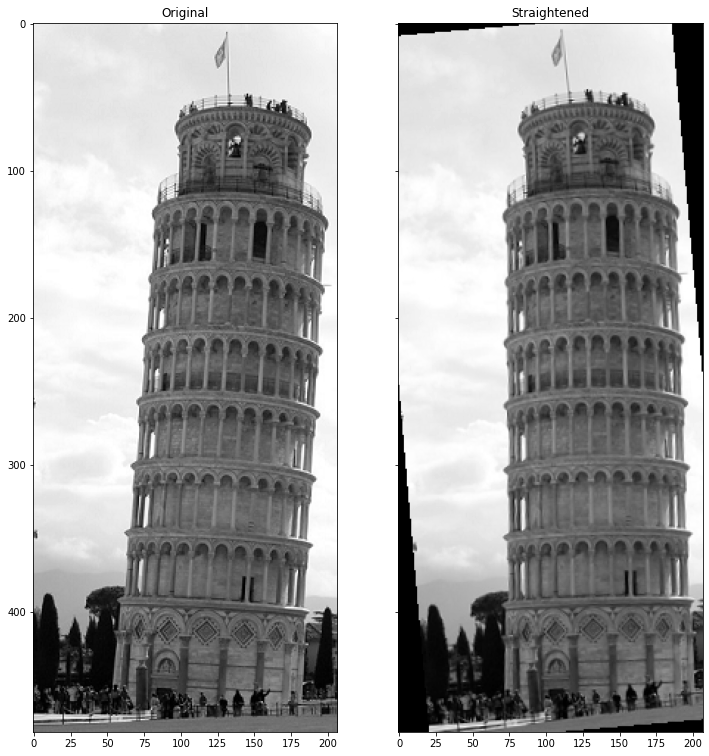

In [19]:
pisa_rotate_str = b'iVBORw0KGgoAAAANSUhEUgAAAM8AAAHiCAAAAABqr8ffAAAAB3RJTUUH5AYFDgou1Tg+6QAAIABJREFUeJxcvGmsZtl1HbbWPufeb3zze1Wvxp7YTbY4SCRlymIk2XJiU44E2ZAs2EmMGNaPIEjsP0lAxzKcIAGCJJBtxBAQI3ACx7AcSUFkw4MiM5BICRJtUSYpcexmj9VV1VX1qt7wfe8b73D2zo997lclPTTB7qr33nfPPfvsvfZaax9eAFDCNJgyUalkEgUAMVAJKAmFwAygQg0gxUTFQFoAQTYkTHpBQ4SY1rW1ZiJQGEkiUdREgsEMCRAQKoYUSSBRmSQhotBGoEElCWCEQChQQDQYCQ0CE9CCBVDwh76iAaQBTDAFjDDSDAAUMBhBFRgUMBqgAEShUFPAxAxJAMIMZoYEMdAaFZglmplQYTAzgyoMBgMMAlMwPPMwokolzUxNYUYYjYAB/jKN8NdrpEJNQP7h9VAJA0CACpiFZIQSGg0AlRZUBUqoQEmApBhggElLkgoGbQlLYLIAIwg1MySjhqSAmJFmCoDSRiABMAs0oxgNEMBgRkDpHwZTBoXAxARQMSVgJkaDUQ2g/MEFRaUYCViiGUFQTUkCIQH+3v0naaKAmSIoFYQkMYjRKFBTKKU1X1CTIK0ZYKS0ZmKmvoUw0DdbAQgUoMFMFGYAkhlBZTKYIRjFzAJgQlVRAhATAyw/D8WeibpIGpRGpRmgMCQhFPRQM/h+KyXld2Y0gGb03YPSYCpqQliSZMGYaqWZ+Q+qAAZJSICJUcEE0GhsA2FlQ2MCzcQfHWoGUfiGCpAD1CCAUUUhIM3EH5S0Z+INShiUAlPoJiJNAAIwaqCHv5AeAcEAj1KAMFEwqYkB1JZmwVoLeUVBPUgg3Xb7KRXCc42sRKD04DBLBkBgohATX4mCgAb60xg8LKECU1LgcQjCRKACVSNU1QBRAUFR0gINJEgQyHFBmEHNzFQFAIymIkFFVFNKBk2paUxbggoRVVEFzahBABURIUmoqoKq5d+rpaXmGFT1hzETAkZA1dTMlGoG0IPMVBWiKgaBP0kgyeiZkzBJGpjoCzIEAxORXxuMCgVNSQlIQg8+JgmeNYIZPPsRpmpmAaSagAoPZrakv1TrDrEZbXG1rEOCiZoXCQt+qCQnNDOBwcsDlDCjGQmjAMHMBImAmtGDwFSTqZ9eEPl0MAgZqL4iUoGcak1MVcXMNHoqTOo51VKtgC8NJCxHgqdcAJaQz6Opqpolhr11bGk5Akk/n2ICmIFGCUYYzMTyuTWQNPEH9rOQU2NUQIQQa8RMBSaEpIBWUmgRUoAxGC2BNIMw0QgR8/0xmEAUZiIpohW0wQALph4zKQGCRKGGRCjVgiRQSSESQpyGqCGRSoFKIg1iUEkIRBIgIXryScEYFPkRkGhMIZdEAkFFI2BIMFMSEK8cJkYhIGamCMETeTCj5jNNM4h5TqCpwcQgivyDQMqhp4QfwRxhnmG64gKD2Z1QR82fRj+Tft66ty+qOa8ZTT2X+bH24959mUBEQKURnlz9A0kgBkLEDNREgVEUoqBBCTFVzxMiBNR/rvunS5kgzY++J1Tz9IGu0psq2zC9s9P6YrvvIQETNT/zVCVNaXTYoGqAYw0zKjqAkyFGUlUFgKDi5UTEIAEIgQxBKEEJBAYREQhECbVAmtEIKozwqCWoRlEQInBwAnTPAE/EtCTQ/ErL0ZdCUQWAgChM8pOZx4CpUWjIb9FPpkJhUJqKmi/FoH7yBYRDK/P6DJACgUFERIQQenqjVy4R+vkBCVFTIMM3gykgRhoFUE94vu1i5kWMNGbgQABYfnWXgMIUJk/RmEBMxHM2oATVjFCYwJRGRf49XZ4ETM0EHtuJng690Ih5wiSEgNLxEgS+Bxl8ioAdVJSkyXGRiAqFAkIhYqSQAvX3qjnZiZoSwPBL1VaojWb+ghSAOioWEhSDQQCFJUC99HlUKjaZFDCCNLNoMFBJBcSBoNdnQKMFtklEST+QYtRCDb5uKoLDE0dMQj8bBq8X9jQJdOcrQDzdG6gBFsK739mFtEgBVCoo/tqUOXd0X1RRqJiDEBPNf4AuP2iA0TSqpw0PB8di6KCz5wwDIXnTSVB8WzOQZ95tIZTiLxaepzLG8z/pOhASNBUz1oWk9ReXZ71YgZrLZT4NJDQ8uyKa4zZvxsQRJ2AWzGACwJjbFzOvT1CQJhCSMJAiAIOZQfM7IAgRSvBeCRBTMyM0EWqa8XO3UFXz5Js7Es8K/ruQxOpr/2Teag9t1M1KNnmXT5OeL8g33xyn5ddoNFGKBzBICCCWlGZJhUZ2PyoSogCGCFgIgQmQGEIQhBBDCKJCAYMEEcaoCCEwVw8RhytiMAu53aBGIcSoBgMFafurJ5/a7xdsLagCqmYmmpiYWrOUADNRQ2ICLDkmSBmy0gRKajJLJpZELakIzECmzWs1tupYAnWbaxYBMpICkhIIE6gDhsAMi/1NeLXxCpOhiyWFJXZpyPx3GsSk+txLb75SQoyNgCY0OmIDcy0zGvysmMDMCAgpJkYQAqiQfoQ8O8a8zQYzKtUheqLvGiEAhaSSBhH1ZRuFmvcSosx437qYoYEmRiB1Gw4AapmFiKpMFu+d7Ne91mKVazBNkY/3pgwRoIpBhSpUMQvQoGKwjBa8xMMTYfSlGZWWCFNPxgyJFmBGJhA0AZQhEaTDQooSZHIEbjRJsoHNUELAJCkASMZcLwVKmLCFGOP8t67NP/W7WO80BKDBDFTTZxgFB78ZbGvwt2QmngpMhd6o+hYZzCK6/SFUvHs288YgBUq3GMDMWl86BEkM0QwaoAQS6YvJ5EWGBvTyJ9j8qZcJLwejb02/N14+3FketuIMjNGDy0GRx1qXDZSimY7xJszh92bhloMu0y5qIScfNTOaajIzU0vWJatkTwNVxE8SSQohjmNyBjKDiJltGlPJlUjVLDMHBunfbYtitj+YxCbjuYxVQPVcqh2YBOiHxzOvwXsXGmBKVYUhKS2fHwGoCpgZFQlIBFVFAQZSvTCQtunFTIy5tfdCmzQfF485Z74IMQIqlg8FCVN652bz249nldj+x2qLfmIESogaodK1cMHRpZIO33O6UVFRUbOAjLBpKsrczxmYABBqSnNQomZQbdX5JkqA6oY8U9PcKDhfSJpvlP+Xf4LvY+YxAPMPMqinmGvn8/4C373Thgbi+AUqoDpt4Nk2w0oakplaDjEnBJU5+WfMo6YCQM37nlzbQUIz2UOowihQkBKgOTH7L/ZozJ2TVxzfZSPpzZMjinx8TLvKCFJ0HJlef+7lNkyHyvzH3qGCBlDzT/jZUiOBDTmlDqoz3dWdTokJCAoyRTXf6xYIYgoNLYNYJhmNUU0FhClJARNpBkVwKCRGlbbrrwxJqDQmYRLQmDJjmJBjwfovndw++MyMsVpHFQ3aPasBlpyncuYtQSjqFdTzj1CDkQoidXSuBUWkE1u5V/NNyn0DKM4x5SJiKl6nCKipeSsgGhCcsyToG5xJMioYulYngxQgn3MEKXDxkViDwZsNqjnyFWWX2NARW74p4o8npqSKd2xE19Y6jHRo6WXELFdMhuCtEQEVNYW2LVRT27atpvz9FDOFmYJCP4ziucOZP6FZ9zCZobJMGJNJP7qqP7kqLCpgiWrcfLNzN11vs9EFTBWmgLOYHYimGgEjVTWqZRhsThMiN7AmJLR1JYFmyd+fY1cTNbMc5gKCTBSogqRKcliBJM6ieUuvm4fNgKfduv0Tc1mWoaUJFfQHA0gN8B4gfzeEEM+4ubAyZ031zfRu0CxCNGcSGnK/S0Bai11PnJMNTelIkGw892cq2TO4JMgGfTl0Mt9/sGOPM0YUgMZ6/GensF5bKrXIAev/5EMomU3x54P4yejCVgmo0MQMRhNHPMEziamQaub1wZxh8Wxk9KPS5UrTlAyAkgEipAAUMROhLzP3O06+waNdzM+EqbNlgBXtDEINDsMcCfl68glWECb+/5uvXGM2oBDe+jjXx2iSlP7+LCNwQsmY98oIpWZ1IglooBBUZPI096p82svDCEmWwREgSeCYFZaLt+sc3m2ZaWsq3AA3y+sxigbPCCboGDI+G7XdynIDbRBj8CdQg0A8OARoTXy7TNU0ea+We4KOTGFuEsRMIbTNZ6hpJ0D4x/keWv5CJx/BYGYhmCBjaqq3fQDs6ZN7wyTwD+lW/cyXIfcBkqlg4Onn5/1NpPemXpiTZu7WzJi6IyF0MMugSXIfa7AEE897mRZCl9U8F+hm4R0tlF84ny4j42CopzAv75vT8/RfNv9BkpGaIjPPCySAomhJcfWRBrAljAHKRIgFdGQsNJgGU4gBMYEhAZRWiEQYIwCoUMxJOwGgAZbEuQwgmkkqO8YrB5vrSdCgCCYq1KBQERXCNkEZDAEALAWk0MHGCASaZGI+yyhGmh+kJLJp1/0EahbZPOd4zaRRkni25eZvczMGz3reheTqI8lTlR9XY53iJoRyCtnELp1/8kq/2Q3bHCAx7UhIiEVl/saMn2C6yYSkmAFOxzwVuiw/IswlJEqCIuVj7JnTe5gMyUzFJEkudQpROlVB56CQirR5vme+aL40cZGkU9Dy8X/2u7o0zhgLWtrQcs5T0yA0C0pvzoXmHULIqREGJSHmXZPCFDRJJgYKFOKYLnVNlnNdNEm5/83bLQqqUCPYZbVNmuweWiVBxcRINc93JjTt2mEzOJ0AALGIYjSD5s+mK9F53UqXSz13i2723LeLmkIurImuajo8oZEZpoFwmjAHkTfNGjJGoQlLzcKT0TLH5DGbwZh3UtKhIYdF7EgYZI7FawMpDEUhjIR6GaEIobm8AhA4W5izoogEgEKPNzqACzDQZSUnwegA1ePThELpumJCxBywiAgRE0FxDv2ZjtEpOBWI5yrmPN+xlswJT/LB9v3xaKfjPXEFCQ4zxNVBb2IAl2lz0OaAZtYA0enZFg1gMIbWJEElUwgq+XflkwsQkjIaakbJvCGkUoNRg3rz8gePiWbeNP+JM6KZkfUHiwYGBBNpRRK6vOAoyyuABwud/pIu6XpciMCcqHYS1esyaZb7D+dCvG01/+PMmph0lYYh0cAAGCVR6F2qUDdmCfM0I0/j3TZ1quO0fD10STUBcMDqfW/+af93z38CM8lvh9nwAfGauYFTLhRI9swYnxoXNPfifqpyyvX/RTU3h5CQTk/KuDw/s4Wc/K3jLJ62FsENDjAAUShqbZKgzstuHDVG0dydeUY3wDk0MyaBIgg0FwcYgrW+ToUqADEmpiBI0bTTw6EMXZsj6gqEak9JpABpqVGZoT6zag4ACN06XAfNphCBBgsIqgi+mQJrqlpTajt6rlt1jrrAjI42NIc5Yy+hIzlgbhygmT7lLJIpGfL7cZEdykw8GS1YG517MaloCMZUULRfOACiZtUsH7d8ZvQP4jYBTDWJZN1EYLCkgarpWUhkHeAC/7Apy2lxwpJBKBBfg+lTZKAOIwhCKPkvcoTR++eQZGDRQEQtBqVaMhOmXn9ZbRcqSuk97W2f/XQFjJqJQzBD+w4dSlINNDMlUsaFZmaeCTYb1ekZ8H8XVahpUrpipmZUc4Cbob6BwpyzJZi4UgdSRBCCmeg6CWMRLJb/bNYrer1YtHuv33l+9vrbgxTRJhPAxV3LD6AOLw2GZGZdw2kZRwOIFLOA1lugp5hJjFS3LGjO1r4wMXYc91P6HK75A3SLnbcORoCqT8EmYUG9+S/I4vXf/8mZ1rT60df+3083klIhzZeu3V78nZf/mzoIT44SgnRtpXujskDWPWpX5NznRQCxoJkkZ9ZyQywGMRUmgQooXsupNIdOTr0iSW4yHJnSKV/NtiPAyf0stSYBBCkgCbesqdaL2l6zt1NBsRg++algiBbW80/9jSf/1TdffHM16r/zxb9KNHWkli2h/kSF5s5Ns5SlAgt4iilicHo7uTTT0XcZguaW3u1NAhN6+XDvmpIb3Kcd2H3W4CAWzKGsxlZCQ6KNof7No1W/KKO8mq7URYLGXhPWRdKQBv2dL12fPmcjnTdz+d3t4dZukWw5TG1pRawNrTNShMsMGy9cgPfWiKQpU7bAwOUNAwTUYHCFPHVtrkMsXzJUsmHE1RJ0DdkzKSWHqRHJRE13F8u0ePjlvxjq+VzK0zOrAGBneTYta0K1Kh79uV8fTL4+W6M+nr5QzM7eW5z/yN/+D18q6v7/VP4HvTEzmPU+/Jk857VOGL2/BOkiaw4WAghObWZaH9btDeBF0dDxZRsb09MPUGYEopREBXrVoPy7f35VLkff+8b9SoYj6R+FjzARqV/YHzubQkTL8cnqS73dS+nXmL333HLn4I/8zf/th4/etZ3jrS88/Ad/86fWm0NEDRvzBdyCRRgjRVKbFOp0WnJbHw1ASAjeENKC0QISYRCk4A7NYBbUgooCwTQoaEmMaiEAyQMBFgxF2zK9e2+3Xe+evTl5bpTW2rbv3i0eQ1GE//HOz37mR+tQoVm8vl6trpw9uN3H6JMvlo/mn/27f/XG3ovbd8/+vT37zJ+vkIKyleCvVR2ZAqKiQQM1RSRL3ota1/B2yAKeGqmSi+CmjPh7cW3DzFUk38GurqnXKJeWDfN+um+/9Klpak8PXn44f0fqMhX3xx/vh5TYf//Xfu7alEqqvBjeWKxG8mRdv/t4Z3Xlo3/2lb/01eVbf/vqXyyH09k3PtafNAVCbloF5qkYGW9QLAZtWlXdAJqnhMSmkJhgk6OBjdXMsYG6icU5IwEyv9115c58Du/9yp/Z/9Lf+9l/evd/vXfyO3c+/Xy0nbhdvv3g9xfStI9er35hVUhoB2dXJxN+5PO3926N5K1v7Q2r//7J6MkPTK8+qX52rxn+Xu8flz+2tar6ZhroGRnKbPdwgiImS1nFSW7M2lDbvgfiAmbmQL22WbBch8zMAn0R3ORqZs5BQQ0aUpQ3nt969Ps/dbqLL5/tfFo/OL2c/v6TB29c/ML0qB0E2e39burVA11XR+vBtbNPVv/DavXiD02//+DK/8PVl/7Kni3S/suvo5j/7599MLtx1K5DhKJzVzhPJ25PiympIy57tkX3M94JK0p0FJ8R1jUm0mUVbxaduHLa1u0hzuSlMP7y/v33xnP5h8/Xn/8r1Ruv/V9fv3isW/XhcT0QcI5lPy6Drar9i6JZFLrYPz04fe8Xe1957qP7x+frb/6Xv7g72f70b4928aNf+/ToyRf/6JWmldzGGzWoZlOFgeFnVA3wcwBmdcofhoAg8/zB3RhqkktZ9ud0LS9yRyvmGltugkxAmf/nt5vZD69++Z3RrdHJky/885NvPpqXKFud1/2i6cXebuwPesUoVodJ1zBqG5bFaH5257ffvnkwLXa/9qB95ZtPCvzIm7//1suj6Wq1r2IC5iIp6vYtAohq6nKDMzDupDIaFQE0qrNnG1UImevo2JwuhauI+6FDgolpVuxUkHZf+vUfv/WtdG3yYm++/ZVHPeVwVGJ0sGznL6zvjw+mbTGq9exwPuvtz8bF8CyNe70qFYM1bcLz//noxQ+99ad+7MMafvHNo3Tl7r0PX3180BZqAufmVBSEigYg/IyXC5cGs0XMNWunQAgLyI21ihM/Wa+W3J2ZOVDItZVioDB32rTBa59LXzr+xP6/LXQmc/R3r1598eBwHNrh6fk4nZ6Mew/ne/MnZ8d2crlljyY7ozQ57qPYKQ63OZIwThfF1W/91nYh8yury+95Qac4+PqXP7nKLj3rbKw00iKNwZQUtUyl5O7Qi6V6k/oU2HRl+VntyUycL1R3T5FMuVUm0+7XL3a+/Re+8ptxdL9XXOnZqNdenh/bXXmpCqhXUdrUb/phPKutaEmsBhdnR73p5Fa/rW6uZLmyMJ/J5bgozOIWv3bvE+uvfeAsG8c05JQtKqKiESYtJG9ZyAQe8skG1ESSOHOQsinAdUdfWEgkgkGD0zqAOV9IJLolDV9+fPQnf6Nu5svbcSdpebL80MO44mo3pdn59XCyezw7711/fx2Li970YBqtrbbbbZTY+8oY5Xl5ddXfq5b9tir0lK+8VP7iF34q/l5x5+YiUsUU7t7M7LAkS45WRJxvNmat2mBm4h506xoxghJCx2o4EkT2YQIhH6Qs/WaG5DOvXA2ri/X41atF7/yyPo2z5emyWt27lMWDQWlzLZtF2WulJ62gnsedyaw/f9SGBGU5TbvpbHC4f3jjuJQaX/rpf7r7x1/T5+4uvj5S69QX7xwEZFRFbskt2wI1YzZH19nJ54xw3joLTz023oUyeguozE5mwALUQltEfPt6c684HOPKXS5me7E+6+tFvLl1MUtbxVupWD+QUfU16VfTMdrLPnuPt8riSZrF5r0bozNUdS/06/evH/QvRr26uvw/7aM/8+bihXSuwd0Duhm5IRn+misRHi1ujBB2xi9COqZHQCAQAW4JhX+XwB2ySoWJimyocgsAKSx/4bd4cvNwF2/svrNIp4+2rULVG0bblkvthXS9n/ZStTO42ottPCpCMZkXWs0RD55MD46/8+SID1otQ9p9vNy+DZaNfecf7//89GMPPzX19srpThPQaNGUrbgLNfNVm5PvMI4qT+nE7O/MniHHES7za+j638zLMgnEQvnb/yYsbu3Ypc5Oirc+fO3xpBzoQW+l/fHetfZxc4Swc3q03azb4VG6mA+K9avT89VyX2Yn1ZF9Z9kvlveHzy0e7ExQ9x/OjptQD05/+WCo3/Ayh0yNMYkJGM3hvDNSedjAmWYfTEGWAkxgwetOzm+5glnoKBfn/bvF08mK9IWL9tZ+e3F2IG98cHddDsv964v9i3qrrNaiN2ff+sHH0yt6f5Lmo8H2dXn94PCBHZQXptuF3C/7u+uHKPrNo8vr7f1xku3Rk0NdWrt8bfWSGDv5PB8Dcz+SCZKoQDPrDussPnDXrWudnX/NhVs4dU91nTjTrs+wniAEaedL3yo+uqrPZg+xd3m/V4YtKcvLJ61e4vzm3klz47l/ffXw8tFpVY9WDJOXPv6lcrhX1aup3Lb4XQ/a56pydbB6VB838/k13rteoz5gWNX1VwVF66KrIUuoRgufdf3DRDuMxizvWEdk08lAh2Z+xrJ0SDFTj8dMOcrTymQCYPf/frB/vDx/p9ibxv7O9dHx0eCEg3VT7Lz1eMFmubdVbM8fTKrdm9uDvtbVaLy+etHn3XP01tNyv55vrR83EoespsXhyeMX148P0/2r+9O49fZrP1JtlGPp8leEwb3C5pNjNGjonHJZkHKjX8f7dug7ayKO4lyBN0KDx2WeuOJlczQ/Xd4+k63jZltnvfrRjXuQFO72B5c4nGi9f34y1Rd1lXZsXFV3rm6fnp1zXozr5bw+2n9rvSypPRtNX5RHza6eN1fus3+6V13s/9Y/+YkL53oBowaI0SJpQSURMKUFpLA50DALJsnFyKy6bQ6GdNphSDS3hiQGWDDXGywkb+zKuo46HW/denxYvv+Qejk8Oj/Ho62jwcPzK/PF+Qfmi9WtetmEyXDI9nyvqae2J/XQ5m3cwfNv9fs7p4ujNLTBv3M2v3d5+/Ie5+vDsjzZ+eXvPWgt4x0CTEFFcivKnLm6ACNJQzAguMGqQ9G5U8gjME7gW9cgAR3T3/VP+lI7aVvs7esMKzu99/nTW1F0MJmsZjvbJ3NZXkxNttLcxFq1spQ23W4u1Qp5VG1fkaZ/DUgni7Cz5sm9dLxzUP2b9uDeVNNwjNU/21dKN3WhoIqFz7oittEIOiIVrpdwswx2qihAC54MM4OSRySyqpNNzgDJ0Gz/+v65jm4GmfQMD47jw6Ni2V5bry6n7f7Fqvjgge2h6VerJHUxws5Ah0Hf3lupzLefK2aP95rF5J2L4+XJHONY3N0eDsu0Wh9flGE8GTz+c8vQSI4TT8SRwXIf0Y3RZH4Xxk4cz60nzZv0Ll130ldQqDorbYAxPfVAJt5+CQPscjG9yvfevMbnht/67qZ42D6/nlbFy6OBRpNzpTLuVNXyY9XstGn046GcXRTjs7Nm57LhanU7vD/fH/QXF9dm6/XhlXucL7fP9l7+9uE81gHsHDCgMUoirXUy1RnduJGhMsqxXEe9tUV2kroNSMUzo2yUmg0OclNC/Pe/WJd7dx/Fw/pi+WRx4+ZNbl2cj4+3ky3TgV1iWDBcQnTyoaM3H5bL0fBhuxtGZW3zady73fQOOY+PmoPre9SD07MRJvK8vTtcWq88mBWVqGRDkpslogUkNcIsMImP4+b+TOmGOetKVgffvGh2pvocp7TQMdToyBcomk+9cV7W9+sbi8HwejWtXj2YLi8CdLWKKq1srdN8MA86uPoXyuLgdw6525tqYl0XbbO1V4R1gf7+ZHJzt1c1u4Pp4v14GNprH3pjfTS7eoLeeaBRxYJBGQBECJrcEmUqSqkurnvG7uhFX5XbkEQZfC5c3BzmweoqmzMTzjMHVOOrXz44O7l1MF/IDe0fD9bji3Yx0moUGlq7LMuL857q4M9837j5I79xuldfzLeLgTYypFTr9SyV41vVLVvfS8Wnlra7d3K2v54ev/hOffNS/gSCxZYuDHh8xK76MYvS8GMPQJKzvbph3bNzyzIdmUh08AB51AvIvYLHbIrQH/lVeTC+MZ4seLDXyKoczmM510Bbx3bRfGD78bT3Q7OvfP79V7fDIzmQ5b2duJ226mK1rtsJB1s9FlaVTX2lWbar/q33Lo6qae/m6aPRjR+5SFFpPrTqnx1TeOqPzQ/9NC04R52n2j1FqGy0S8mm9jwm0aXqDTbwTLg4/sS7Fztb6E2iNloO5ie7pWlp88Wip6tYbEfd+cS1Lyz2BsX55T4PzlamswExVA4kUqY7wwk1XG9K1gf9C24va411rZfj69ebTMZj44YLnw10A0SAwYJ7xlQsmDOIolQxpTKPeQh8yJgU8+saLKg71MjkNcxVTgBsItbP/ebdwYFoU+hop72cbcVmHg39frCPfGhvnCb8xL/AdAmpAAAgAElEQVT7nZ9+8mvXD//To+cOsR7vHewsy2FbcxSsKEffqQ60l1IbQK7O270prlxN6+P66k9uN6LiZB/ExPkkbSVI3jIX5TsjnBB+EUB+4XlgXkkLAWZOvGXXhMuqUUK2IWTuuACHq8sLWa7QP++3772HcJHODocPmzIO9l7r9YWpqaf/39mbv/qf/XyzFVrG3tGhDAdtUazqQqpUvVi8dT5pqIvLOl4ktEV73H/Sv3XrystNjuuu1QcQlYbAVlVCNH0KypRQecqOWHbcw5yx9q4jD0l4suzsoXngpEPZo8nf6n9su7GD9sn2dHmtqA7KRbFCwbeuDna+GF8J9WLd3P9Lw3HvF6o93dfFk2WRttrz75lfLkbt5dWCW5jEqs90pXo86VHLdXN+du+F7Y83/hB+cUCuiQJoYxKKKEGEZAhKEaqICsgQGIKLu0SngPrRMiKQIhDx3p1UVRN6M+vmF7T1PzjiONVNrCaxGFq6fzoqp2fN8OF0Z3A8v1u0dVP/nddf3RnK1v6gtt70/VkxKFbzx4Phuomy23vA3l6L2WR5sH1SFigPrr/3/tXRnU/8wNQVgaQdNUiDIKmklgwRxkDpfBzs1Cgh4XqxG2o6ut2Nk2DW9ag0ikhwR2KXVCjx49Nog/4oJXl5zHU5eHJSfbnSO4sP7S/Pb+/WCMfnb73w2fHtkX1oZ6u33t0dMYWjwwdPHs4u7kAm2pY7BzeOe72trbZaVWtlW8aX5MVF8EPxjILmI1tJATCIS/Pq8FQ7ytdAl6oB8d2hW3ZhBiQ3U4pJAJGvNqCT8ySJpH86tYOeBnJ/tOppvP7W7wz37g5Pl+X9b1/sAKsw3vvpP/b2Xa4u2jgEQuyt75xCpicn2ycX40dP9q5KUy6vXNkC+/0+NRTSpiZdmk+x2TMLIiQYNaU2MWlekLHbHXrvgxAlBLhTm/D5HdOOBKIwd3ndsDad8fahk4Qrw8vf+8b9fqNnRfvw7uzV5q2DvTuHzcmdK1dtr43NvfEPfvc3mhn07VldcBJ6ce/i8Z3R/Sur6W2+/vh4fX8h7Vksa4vRdJ2a9rL3ZBUH7tbtSmOuPyGp0hLbshOsnvqRDEaKMZKauY58MY9yo6O7a16e+Z1emvzdJale+9QXL+tBKc30sqf7324++MLZa6/u9gZhcDzZ6oc0f3J/8eQLwxXWW83azme7LW6+9bgnN4frndG37MOT01Ucjt9bbQ30birGo2Vxu1e+OF8/GXbOt2eEztgyKqJPrrt8ndkzy/mCASJCbVpIvjVl06JmMKSdvv2UGZJkwRuL/r+c1tXV/XGbtkJRjk7qt/b391Cd17vHDx8c7sdVf/ulb/6j3Sm3V9NbZd3vy5NqXbXbGmeHO1X/hfLt9sork3ZrVgdtyjKUbT26ujgpfn7w12La0AIdXxtJBmOwVpmiUSHJveBOMaiP2VtAsVRRJgYAKtCwGSUAjEWbb3rosEb3ypqt/+i/2+HeYNDE54r5PN04fu/9j7f3YXvFNA12oO3wRvX3548r0C6/H8PKSFyU/TiucK947uOzd4qbVxJivALh9d6wF4pV2OJ7e/X6O9/TMnth3YcZYBEoRFswCNAIDSoInclGIFBIVIFobBCT+Pn3qpS5N4MTo4LN+OhTB5Etrn/4XTl//GK/mr3QXjwor77Yt2/07MpgGW+Ey6JtsTf5rtVsaYm0PlJorrTL3ghpe3vx6K1bO+MXiwcLXulPt816NNbDoqymCwy//xMrbnyQgDm+1hAlmQqzewuK4CNK+YnaYCgFFkppTZxxz3fG+EbTsjaWe0I+7bZBLZK+8LWqWt2QelLu9RcXrx9/9K1+OV0NbXHZb/Zays52wSq1KXFt1myxDQPUaKt1/6i8f/zS5NHllW0UdV01c50MV1V5bT24+aMf26ldAcEmJgyMDGYxJrHK8gUDyQqhOq0OwsfpaBIpLRm0MYlJAJhK8tkuWhAXGkHxtqI7ZQkyp91utlMaPOrPdm5eNou6bzYf7PBk3k+H7eOLflQO2jb2ozZ6ntogW7SykLgc70yu3ul/8IZVjSWtLwfSlGc3yoOT7/3je1PX3shuREaFiAU1CAjtaWrBqMpAAjHnZkQzJBGC4phBWvVq5EfPQNlodS62WlfdXBRuGfbXhVmvqe7NhvH2OnLJOMeQO2URwmi/Lwi2ZipFpE6wxuIOR/3Uxnrv8aMPF9Wb0t8NReJ2if6+MB3bN6aHPzYgDCYaOsoWxhhhRDAmsKWR2iACCGYaXegR5IltkqZGS6Ybk2Ge6+hok27UIqgG7VSMqtCHq5Gwd3O26qdpm3YnVMhqdRS3YqNxWILSWEloyd5wFOx01Svun17Vg6Lsp/kpDkZNQ43NNhh1S5uD8RsPm53ajPkOqI3ZNwaCASpMIoUBARLMGCxJ0ZoQLUOeuhANoIlo68dlI6l2A9x+5YC4mclEs3+plup09Xw/7acHl4Nyr2xXsTdmI6sbvcThst8PVZX6BYtiJrVFA5acNO/gYvKRG+da2pUbbNvUWqiWRRMSt9DbPh//J6EpVDZb44lbIxlgCIpgRkFLlqLKgABBMEFUjRQqTJkIhuR6g3bXOGTTfzfyLEYfY0/eSRjaptwtek26sOo8RenR0m4vSV0WdrE1Wp1NB6mJstoSnt1mSiaYPkyj7brcezKH7u61d1oW5X4UWcSQitPx9m98oHnh5UXE05GGjrONPmEhNPgIm0gQn18WjTCjpDaIwS+/AQNDMFP65I4G12K7yRgxUWo365BJobUM9m+OL9Lg5ikXq2rcLMbtajUY9O6k1QtVqlU1pKCVNpOd/fmTMvZSWPZONOp43ptNzcJOn/cur8Xj47fPcbAGZq8Nvy9QMunyTFdtUSWJBSN93kAYDAw0QAs1mrQSPQvTFKDQJLJWUjVocAOfikq2MaZoTH5hlfgMJpbN+mbdrIc7KIdHIno2Xi3X1XDVfiCFbYlbV4qo6FdqhZQ8WFB47aXVePF+0nR2dSZPXu3ZoCzvQaX3ibMHYTDS3WX/Q42k4FNh3XCnARaZp9xcyG6tYIDrbNmPFSDuic6iuDAQMalzQ51X3P9eAOmGkE18jk0ghZw/3ptt7fUX/T5bQVoVxArWs6VYCk2PsTapgxGoy77YQkbNTHeGWzxdHlpa2TgU27WOzua92+2phsn6qHQCRp72plQBI+i3+bnFXRODQoR0D6lf7RcSFdaKZBlfEAySnOfxQUu/ecwFo2wJDnWkMQz1zHrTW5fFZKkLOx1Gqeq2rZbrgzKlwkyLwlSK1iRapQPTWhiGuv8WZF7fGO7vh1DMzvbSbEtHe/Mp0YNtRfb9LgvrhgezwSU2wURExWhQRPoou4m5216pQlD93gMFWhKgOMSGqEtaypB7b8/ZStPUX/dTO//KB9vIY1NdTl6o5mE+j9Oz8e5y3d+5qCK0MSnLYKpFYi2orBxcrodnnBhbyGTepDBrtW63YpuSbW/P354My/HJFbFsK2SepQwgoLGxGPOgAAmEPO/TeZ8zK21iiNmw6wSCXxTpLCNBYQgO5ETdVoEiDc/X1f3jW+uCy7VisBfNitBszYphkXb1sl+lJsp80QgSGatBpXvD+kKrZbkYl9ZTtsO+BWWxt82iLEWboPFwPmqY+oVfuWBAHiqC3ye0wY/ePEsgRaM/miP/TIxKx38aYBIs3xFktBBENGqWITRPPMlg8lj7MupVKw1nNg5JqkUKVgzLo3ahbQO7uzvl6PJszDYsQ389TFXQ+YNpSL2d/kURoqBZlaOIIEWP6712zqK/Koe0WV26Pdp9eX79IRVEDIFwr6IYEKBJ2FJM/NLGzNjk8RAFFZInBZIS2lMEMEpjSsljwWQq6h5+bes5WZa9wVLXq/G+Lmy6XnPexNP5Vn+9xBplLFerBkd9tWYnlEC8YJtGnIR+nM4imxDODjQVDetmICIyLtrLHkbYmzdlNPWGM6cynx1hDAEQiPoki7RQJkuEdWoOAPWbdCjdmBkbT2pgGyKJxmCWBJYCQGVo+heP00vrUMRgqrRdPbtsqmKhheJiPkyVNaGwYsKmaQAlK87Oh9vtcl70e0XdXvZbPetZ2UbuWJEUpYqEsBuni/ZGn5M4DIk0SSHlrJBBQhTpeHe3vqmZ5NnDzvJvfnmWD5Vt2GHLE6gmbGoghrb24RuEJDsPT4a7adgU2k4s1tshPK7k/eFJIZRUpnC5htTjgbR9NO3IQr+xkLaL+SjOtS6a6UwYy7roj8qGVah0sM+hFE3T3++dzIvFi20MUoFK5VNyHYBFKqDBzYsIlhIDurseg5kwVxRInuIxUdHCEhQqNE0sQLMqGkCkVKpK/Pbdj6ah1nEScBDrwfzi8nS0GMae1ohhVSwXsbFlL2C9wrK8bNlbsZhXkIZFq9vSzq4OZoNmvoqXAfNiuApSDWOvENrgYDJsH/XWr+0dWZvt+n65FXy4g9CsFIi26te7Jb9cIE/H+4BICnRA4xOUwRQBkgBrJJ9JQ0xWC1P4xqesL1b1Dw8/899WjwPD6IA20kIEKbTYQooRW0ftcpxQRFCu1EOMeokN1vW8WUNR9cZ93dYHbd2DhBC0OtsZ1FsoRMvlbrl3en5t5J4HmglEaSaM9BlQ+DhZQPJZ20Sz+JQ3URpMRDvHO0kNliCMZkm9rgZSVNkWcqnbbVkVh71vff7F/QmG6/V60gsxjAWxtbbUHooK7cPV6V6t81CKTJrRRFchaNkbBCvXe1bGtiqaxGHcHVbN6XrAocVzQV0PJS76ab9/ef5CzSZkaOMCasxXJZN+KzSy0Vh98hDqk2uOV/OVse57ZnYHCiw1CguhcIU5teM3S2vf7h18+1u3fvKNwW/Nq+1Dm7BnlVaWmnW1tdqbrcthVdke2oHQGisL1ZpBw1oRZK2nxXp/Mdo/uGhHj5brcrjN1ZO6t7uNYbs8vyaLWPfSwbuP+v3gExbORalG6/xQfuuDO7WhPs7ued1NP85Mbcg50se2FVFEUgsJsGQhmGh4NG+v3P+5v3z1xydfuxtevLEaPL6ckjtzqMR+smERdtt1s6adVCYBAEptL1n3Wglm5WhvFYb9OhbN+XJwPDkUw2xZHPBh8/h0vLu7exGHZX92rHXN9WFrISFfvSoas3OU5jYpMcJnbvLwGQ1QTdmcsBlgDUa/UrMNEcHpXWs1IqgYnsyPv/7rf/r7Hn1z9xOvXvvcw9HkzrUwqHX3vBXlRAeYpzrWaXRWDGHSUmlWq+oSksQs9J/sWIletFWld2xRjHb3mkW5rLejrL9dVIf3hrKar4ZbIdrFfmsZaAFATDQjAzTk6xd8UFYBnzUHIDXdCOtHSST7TGEUaQ0CKySoD6Y0gtg+fvKr9X/8j76z84nFO//qXz3ZWTeql/VqO4QyYfvBdkS0HlH0w2xHI9SqQZ22H4RCRKOgDWG+O18LAgdlMZwVqaknRTE6mPbSPF5bPHr/7JWjq6sHtyWyxcXBWgifsQYjNyGVJWFKHhwxZ99gAINq9vg4ovOR3GBgdJYqMJhInYIpQ7P8/Ed+/Bc++N1nX68//pc/+bm/n+ZaVTs77FFjkV7huBlYWSFWezEUdewnWk/xwVCtTNt2phKPesUOFkuu59afjLesLqpqXjz5ruP57N12fCjvf3NUHq5Px+hfnoVRSx+pBRjz/U1ANyUuiU+3L3stLU+mEgA1MN8pB3aOEb8KmEiCRFtPn69/7yf++ivNiwcXb3zXb1826XB/+2YIBaRvDUKzKtgCoa2rvaJ3GdlfTAYtVnIQwbhMbbq+noc+V9XiUteLSute0RvGG288SkXv1cX64uHtj6Vvt3/yvLiFkpdbufArwQiAqvk2NzOl+LRuN8wXoCm0BgY6ZWOSQujql2Xey68cQhG07as8WbU30v/yEx/R02/u7n9s/YG9w9HcaIvl4aBVzPr1ReqHpFW5lPu0UTtIi3iuwxUTi1TUhZVxdOWyibuDrapuvj5AIz25nKwvpVjNLw/2r862fvNPfOLiN3/pvxg83hrO5+Ok2TCmUf1eFDIFBzFJ1EJiK0wK0FQtqRGtSKsCo5r6FBTNR/V9Ti1fY1VCcNderiZHcrocvnRn9nNbH+YkVVNTrpMMZF2spA/pI656W0EZ+02NQkbrItR1sWz77TJAQrBLXuq1WJY/ZEWdGk2TVH9j3iubuw9feMIfe/La8z/Mf7l98wS48/E2Ww6Mka0GI2gx26xSA/G7GbzFM0suqIrlUbw8ocAcjk4YqQtLDFCE9J1P/eA//J0fqH7l3Qq/t34b7DepX8W9nfW4j7Quj5rzwVjWFXeDbjXrSoeD9XgINENZt/VSJMW6kARUCzZNjT7L7fXW7VU71MnpYHztlTvLP3r34bcefXLxr3/oYf9tCy0dZjLCzChmrn96JmA3zKsm1mgbkzDPIFtQvzrM5SFLkpv33KYKE7FeXv/0w4N3/tZ7281guffofLTN8dH2eSol3elXKZxsNynUh6OL9qGejgZLXY62ijUqKQexP+oNavZX4/poWE0qq0HW1TpyVj96Yas/X35g/c6/7eEHzscv3Xr/qx9vf/X97y60CQCYSEa/UBdqQoh4oUymRorCrMm6VisCqgYfb/AbAsyg0HwDsM+B+mDU8cPw1ZP7j3vb80vebG4UxWC9XjxEc3nO773sXf/281e17Z1fHM72y+n+td3eavLGYO9i76zekjR9vxmhV8usHcvYzqxACGIN7hS98/u7t3uXvZ2P1e+89c3v7/0fv7Tz/IPFra9b0bh0IAAiXOdWM0h3L2ajEAa/4dtrqIqlRNN8s684YEWyQEsCdsY4v3SpHdRfvVcnorjSK0Y4Pe0tirp4pVgN3rh8rjm/NurhPN0+eOODj+rjehbb9srBV2eHTw62Y7O+kZ7Y/mm4+qDlbGKLetgOpOz1ivNiZQeY0prT/uELixfuP/7RX/ncq595d3rw5Pbm6g1Y+BsGhZAGCX4RiGlSNVpKasl8UE2DNeZqiJFupDcqxYf7syNWSRoDvv745rReBh5eG+jjplngZr07vhaWwqtv7SwHVh6M29KK4ZvbNxZ7g1Q1jdw4r/uHrZZHq+pK//KgPNt+YTtgtNU73D5L9UXYvVZIkXpVvWibxeL0pZ1XX7j3XX/qm9fGvbe3mpthU17Cf62tX3RLoyVLbQ2wzRZLMwDJYLTWA4p+RSZgZmohmmRBfzMWbPLP/8XedNYv+lexvJwMt/r7crK3GtbD/aUuxm9f6Q2vvXb3QTGKZbM32Vo8uFhYQSknO8uxrVT7ademy6NyxTEDpbZ4sFZMThYy2hqw6dWk9maf+xffeWXnzus/9dq361dOiqsboTP89YZmCDRCtTEYGSSZEXlIwQzmVwequX5t+eZLRQgx8P8n7M1ids2y+6417OEZ3uEbz3fGmsvddrfbscHtEBQUB8ciYAsLhJEgN1HgAslcAAJhRcA1AiHBBVGEhLiACMUCLhKIRKI4AdNpm/SAe6iu6qpTVWc+55vf4Rn2sBYX+3nPOd1ux8/FUZX0vdK7372fvdde679+/wmIjNPtnP7u/5xEmmN7ebGdu4WNxPv96iDNuofP0hJN1ONvPr6KT+JNqddm+K5eb1ZhntmPs/MPLx4LUOb7Jy7MqU4GfRK/ee/u/vFteKbbjpt5w/3Mbfbpwd//4JCv+I3fea9a3gpTBKD824oISJCBIOXSQgsMCsSCkkrHs4IAEKliydApKqoIgiEshfnShQYo9If/faiG/eWLB7dn4z6mcFNM3Qdnnn9y9uiRv0Vp8dkp1Tletyf99exj3wOHbf9mHLj/tFNd55nFpbXtd+5/3jlW9zTcSk9WQ5rfOH9jmHVbt1g0KXNlavj26Vv7F2O4eTifyjcK/B/t5K+AksWUmEaRiZRAFGXnoUICRMBF/o+qkAUBGbB0SJcSESj9hxXke+7SHu5rFbwsvv3kqT+IC/0OaWvW78Vx9v3K4MZSezJyt5KVgrjrN12oHz2lBGlbHaY2wjcvWfuhrrV20NamabZpcd5m2k+nK+dq2wN2a/+NT/l5evoL86IrUCSaQktAQgVLypKzKJABnMAZgFDQxyqK5XoxyX53MmaiqVYCwkPXyeH2SWUqOFjC0Hy82jx4YZLpqG4Ni0YapHcxthUm9KBba4iFhBcoc+9cY56gCfZ8ZVRxs/atmy8uv/P9H57ucdXwqtq/+e6NR5d9OjhOA+vBxf/35IsPnlgEKblSU45JxlxwYZo4CxArcOCoRQdXWoYYQDNlNIKCkJl0x9XfNeAqKXwU6eCqPaQgV2e3Krp66OlWHymdtZBi8rNTHvxwqccALiW0KS0hWDWzTTDKGRXt2s71vB9IPeXze+x5/OEI+lhu5KMfHJu1GeAt03TXdETD+cqfNn8XN37tTKGMU8yAxEAMSEwKhIYRs0LmlAS1zAaytWwdcZHSQhARNsbYMh4tfgKYFe5d1nC0sBuWzzefOXlWQ+29XVKfmI13G3H9OOfKOVeP6xzQEAJyaxmU3aJxTmf9dXJJ0Qwh9wLoToPFkLMYvHfU4DBrjqur47rv0tHR/tany/6jsMBU1oshhUl/A4BsFKTkPqb+TZDdRU6h1K8URdCqIhATZp7SJUUUj7q/2FQV+z6u8RpzTrHKVG+2zmeLA7XXkLr4rcPGzOaztLf/xCKhosxXIQOBkFPvIPVdqgmQ2Ygz3RCJOV3N92iR759XB2/CIp2buwN8Vt0+vp/azdf/378RJvACIRKzZSZQMsawUhYFkJwSq2ZQUCEiA6CKSTJIBshkHCpwQbqXRDYiEoHCr20qO9z34zriAY8byDGGfjxLs+2V3viy3cd++ZX62ae92W6HiyuQRGzrRdMsjziCtd7NrVXXJMmGc1poHuwQct5cdoPYsycx5ufqqrQYk87n98c3D1dz2PxV4xIDIhpRZEADSAWRgBmEiAQImZIAEk/ysaJFKO2b2Ziieisv0BQmAIDCv/o9ptCrVYwMs+V5xjfvoP1Ws+py5UOn5zHnZUrxGdVjOD2MYqyT9cdk8nXWkI349aBzkRETEQWIHG0GFTu7teEOaNzaIeBBlffue//+fXNy8HRwj//mX0qp5KgZ0TACW1BkRGMAsigqsfG1JTJsmCa4JTEjQZadiO5lb9q0MwhgPv5XQtzQnHXsZBgqQ5Xvz54OW99fnn/nYY6b8+t+qNvtaV+TVjKOwGh17IfzVe2d2UQISa4/j+PYbdc+W2t9a1mMyymjZIxrBo3tww9/eJiDvnvzvH03wPB710WsRqqKzFpK1wSAZIhEAIlYhYxHJo0xZ8mScwZQJColI8QSie7QhgCsoLAf+1ChpPrOO/HhGtA/vsohXD2AhR23puN5VdXeOH9dwXUza4JxTGLgqq+RnXOSGmfh7PzF0+cv0hsxGXuPHCYhXeV4lTrQBNBsP9hcX/nU1f3eJb6V/ONPakBVNkTImgEQDZBwRrSYQcAQShYs8wGTGQwgsChS4kL8LJ359KpZmEThwkTGp9tU3cEXA7Ux2G3aklTPTeU/eutG/w17dFz7JvPcdDC0i5ZFIexdjSaxE6MvZsvL33vqhSn2q35AK8i56VU2FhbPLUBG759mK73rlsPG39vsdz28MMJKQIYRYIJqKQIhsbGT/cGUR80AAJKzYBYFVM0SogIWnGVJDe2uqUhwRaG59XDDl8+u3NX11VYvH9q5AbzNOuvCoV/1n324mC2P796cu9nMNQ6t823VVM3cQ7AgYPzKq9HAq2d7B7Pl0/V1hqbJStV7HlNHhqrRog7OzR/OYNWad7bYFiWpqTUKF5EkkSgpiSoiZtVEoAC52JYhAgKDRkZhwTwpl0vVEmgnD0PMnY+3hy4veOjy4RkMox/28gux+fhBTxqMUfLz6MAltUsjmjEDzuq5KifFvIBlc3VtXWcZ4JN3bLwQvwjrpqov4sFZj9ZrxGGbK22xXj+/unv9VqBZencNSiiGhKdCbilBFukAghFVRSOKZLXscACsxalGiECEVDEX7N7Ej0FABdF0edWO63r87Bfj+rCaARhAQjT7aWUNxDYCU2A2mdHkAV0A12RpCAMDYjYawESHqH5jFnLfASasKjpxmwfLSr0bGssEPou9UBO7vY/+xb//K4caCQEIyZhiGCG7qioSUWGuMxlkJDaWgRAnXzPIkASSKqLGrFlANIvkScU8fnZxf7afTHhkWmhRZ4dHdc+1ZdpbYqsdQGYVEZtUpQ+GBdloBkZQpLpqDEQucm8h9Ho1qzZjy6fhzvBd71xFKxT8uVux22jVtqQw65YHv2oUQBTMzrGJJ5i+FDIDQBkNgLKASUKQERIJKU4ZnqIdmwCzWQ2qEALlvsNZBJW4yDX4NGtxr8kZXQbunR87IzAjrbCOOQs6zooQTDYwBh7tyArlWowAFKixiXUGFKwMV6vasOFm88J+GVeLatgjn3n+nQef/pUvjMCqCIYUlV519UKpphZJGxcACE1s7CwFvyEAgvqqqCyAaGIhqSOun9XD9XAHPplXrSa4URnuo/S5EiYhv9qwZvF9pRTD2HroICMJwtAsRx28QTUIeZJAmhb4DrW9U9KKxr39XI861vXwj7aHlUeYmRCbs/zBb2+VMk76ENgV5wFKX4aiyVrMeoBEWIoigQkgTxOjWYqfYFZSISajufQ4PN4A9kwbnvWLXmFpgiGLpFLJmJhiEMyYc4wLFF2xiiOjBiUFEOOVlDmMWhREaqucrYDl6OxspI6agCH7gErgbNbF7KHxVbUCnZr/CbOUTgMWABDVnbaCoHjxISmodYRsrCEzZesxq0pMkVSAMItmMoXgeX6271duvjKrDjUuA8SmzUnJKKGxShkxtsFpEohmuAqsygBGa+3SgEgxppwYKWeVRH5UZ6T2XhO5ep/GIQZzuHgMdVXZuE3Oal8fZMg46ZG0JNJ2zc0AlAtOuFDjVQExk4iBrJqtai7Ef9gnKBEAACAASURBVC7E72wIFA0JiwBKJjuubs+8zcak3qIwOQpeE1mIzoxzTSMhtiapsQn9EWhHvE36du5rR12Q3jUgg2RUAqQKc7YkvWUHvcPaiGCkfVm6jF0L33zvuJkfxCBAwrn0JIFKATuX4wNhwqGhTn5E5RaKWgT91lLphCz96wWhgppBRXIWgZsLay5vKK3aP+MAsQJXkaZMbKjGKqZIopyGbBrN3TBqXUs0FYAhqJipX22NBsZMlA1WoNpLHqRZeBbXGgY0ZpAl50gIt9YPvNAXhxZ2pg0kWTQr7fwBRCbfkSzKKqBZpyscIRITirFmJ6RD4iySQceYM1COCTjcfQ/S7eXAv/9v/+f7lNu5dFkCxG3EnKAmzCKwh4ZTZgjXTrMqk1etQfqW4OTWDKDXTAAouVHMxqHjnCyNIuxr17Kj+PzJs54zvjgN29O3j6rSREo7OeIOXQm6IwEpIEnJMJZIKGclQmQSsmRQ87Tn5RyzquTSWaMK1T51m2/VUR0s174aeZ4tZeKcgbRVSaQA2agyZ+KYNZha0UJEE4PF65URjYCMWHtxBGoyIEhSZOccWm89Jm3379b1cZzbHh99+2A5tY8o7KzVFCdOpYioaHE8BUBRFUUtYnPlkuk2pU8INSmqSMZiC8KGRKB9K+uVN8g34Y2UKJFFlGyZgAAbjaMCzNg6Z5PMT3yyFfKsGdWEHoHqGk1UdRazSMY2JNUshskwKMZEFsEg+cpX3t2wYL07+nB9vEtmoiliAiQFzKVigCCUc7lFK6Aq7Bx4UUCBhEyA3V2jlCpLfq5IlnJvMrXr9NX/gazBLHbIBAmMalSoMIlYyLMwGlUwKTscLAOrEAR26N1oCFK2YvOo0mBOLhp2eX2o2g3MyRpC0/pus+Cm6+COXbjV4a58UzD+NL1MUopbZT8QgSwIYiBnzDtMJiiCKCXEQk2zNhMDKQkokCFUHWlzdNzr4g8vfjVjLapGUjb2wpqYTEqj9ycfm5sLW62yaTL1CN3gVDIb3ZKvMEPA1gYAzegZx5Swq3kcQXBvQ8GwI2Unz2cu/uzdTz+4Y9axh510yiAWHl8xiH3pzacqClKshEUQi1UOvuxLmUijxosAEmaIVECwmBPgb64/5sfv/epwhdG3+XyW+1MvKgB26IGoWwyPL96bi9eAXXQuKgQA1CyVz8FI7Hp10SrYRkl6jsqzZki5idl1iVmM5vYuZHv5Z+99e9ZpH2BqIAFTAMN5sjiYxC8IKKRZFBESKaAoSrFBAcCMgsqqRondSMyaig4DhQhjb/nPf/17+dFfvvlxAL5+NPAtIetEdOwdDBocnFZ7Tzc/eIR2BMW8TQhjn5gjGpDAQxakoAaIbWHeGx2rIXBKM2N7jRAdBWbEx78TZhTx+ElZIQBgSumDEAFQIdOu14XAqGokQjRBy8aQmRykVNDyLNF6yGhKlC6SAyMApwxCKz3767/yr/8zfPp8zx5FpdiPuQIzrwJ4h/jug7O5+SSf34oVJgyJa+cTIeTVmQWwpbKkSMxBsBH2uoqk5a02QiGmWUas6aeaj7Ht2tkjAC5bgCnN8aCF+DpRwVABCGxJ7SA6Uk2QWMhwUcoxEFmFqYlOACDnbFQBMPTJVr3Qlz+b59gs0rYzJg6NjJiJRbbZZPfcbobt8TpGs7EkpERJYjQDgm+NIQmGMNmkngASoGwsh5o1c2qQOwNek5Lk3C6INWN3DMVHXie/ttJDxphRNVOhfgMyTv1yxffWq4Jka7ISWyEDioKCYJBVBY0RyeSoD8mkPuW/8xv/xnezntn+iMy2s2QIokGwPVl4gSrmy+ffVadKpI3RPvGwoiR6eRM024qqkYNUM92GusJeUEG4GWZiLBPUhKyaMWiqK3JHf2lqQpwsHya7qSJio1xO1aKn5in2ZmVQVUUCC8Q4Ka1QJpcaCSSEjIhjHhk2wn/2ic+Xl5dfzDkDw4hM2i85dQ0KVDAwjwOldawZR8rG5DACAEoglCwaxIkL1rI1ACErEmWOlkjG5EXo5mpktu8FIqnNL50Uqyalou+d0BMACDz1bpUsRyn2luim2IVKJkeEiQGxWLCWniLiRIigOQ1ZXBxz/FrVoNluxhErE1M22faZMQVMVnlEIANktoBGEoERDT4PTm2yCaPHa1X1ZBJkyVlry4JotEoETIJEs81Yc6af/z8XIFRxQUtg0e/sQp0pQVhM7abEDQgCEAiIMCgyJWWLYvUlkHP6O2QlAFHbYRSVh/W7v/dOBGiHbXRuGxAopdRIDkEIe+iRpWM6zjlrhTb2XSBwdqAWSfj9apWu4jhwyGO2ocLMQj4GwoiGgMEx+Vjp+u/VSQwelK+PWurbsLsqlPscFyWSYgGbAyCKqoIQAqCd3AAKCgFAS4inVFQWjL2Os/WAeVW1ZhhyR3WTwIPM2azq9UUY6ltwFcNb7jQkVM3CfpivqL6EpQrH1GzCSuuFvCnhlA0ktX7VNoIGbZ842JSidfbqAn3qVj/9XQeWGAoBSfGPjgdwUsK8pAoVKgUVyg7susqKfLn8MASAglSMFTsYZuMgLW/7oRsA+frti21O3vCL927SzM2qtNgL2y/th+Vw1fYYByKN5uYqBFWTnR+SO0toK8uVVfa2TmgVJYTDPs1cjs4ARqpHpjr95j8gY4u1UPlur8bzI8+u33lqViWhvJOYTdMoEwEUUIlAsfDXEKGrPnw3I8O9+0ffNwphf7lMo/WH1s++WF2mn/n50S+Re7qwPJ8LZdJ6XC/PoT6qNecItud9yWY8H1K4IwjacWNUzp7L/AZFQPbOhVqo0vrZb0X1mNSAFouknR/lT3jo1WRMSjkgESjFuNKigvzy8wgAQgQMcDFW+ymf/sJxePDouV28Nb+3Hd/+EvCVo9STksxgQ4pVk1OL456mwDieMy01WjPX1Zk1feVBb+buKW364XI81JTtm4fNxSYYD4igPMxl48PlncdomchCQdohpj92PK8/ioWb9NJqYjeEwugss7YzvwoQWkjz8en9N/J7b82WM0gsEnS4tp1tKVwD2gPN/ZhFfW80dqExVmcxyirOqnmw4aiPKc3G9j2sW3P48RgXDetV9hGTcN9wRrj7mTDeaLdqLCLvnNvkj1tvf2Q8JadUVHOlNF7UCS/70LF0pCKew/r289X5P3dz++JmXNLVKAqSrsWBLBBcM3cQmmakHlIEuAQfqshogwI3EFfVkHLHOGsTtjFc+GH/T2vOsskVkGtiIgZhvdVQhfo2bHsjSFZywfPiH7/efuwhmPxnyj4/qRmLQ8j0BxPV+9q5P1i5f0F/u94s/DMWjtVA9m7NeimVg1plvJpVydWmf8qnaTFvtNdWMe0ZwrgxC8ENeLzkzkY/U5Yn4Nkuc77Y871jl0Fq0bEfPDB0DIJoRDOWtOGr8cirr/7jD8KOGqbFmVQKP/VVGh4AVFhVEeLmIMNbgebdNt71rgY7LrCaxSABr9NoQuT0oJaaSLt1lG5jPI0jQrs2tRjjj4PWMCa7jb3rgDf7Jvac1srDi3tzAF5L1lpkYIUGPiZQItTM5Tr22vzoHxnG6+MBwMkLEqdqEE50h9c+L5AMdO3Pb0bZiLXzt6vbHUBaAT40mNN20eT2WTjQpqWnB5gY9NhVq2HV3Hi435ydpX1Fci6qAeN4EaqbqesotN02S3Ri9WFamoNbg9dUL/3g1cJsYTFXZkeuVvmj588fu+DKyVQKKgI7s/dXn1egpDxsDnSIqc2zpsF4fhmivdiLsjemd/LD5jzSndik3r/3tOW1OwQZ9/Dg9CmPiG9WZPJlfzyIXHW1NXYdZ2oE7o3rKww92GSr+umLdn9W7mO5YRgGMIg2ZoXCNzKvf+E/4UEFLa5sQirMij8yP6gg1fVfu6UXVZMqdaeezlpDmA5RjiKdjPbW1eGTm2Ob89Ewj33nabufHMfmvQ/fvBgOh4gjH2+vDGl7D5LQ6sU2hln6oDIz69wQ7tM2ZDOc9XGWaf/R9TsVBJtFPQoXVeVuvcmfPBgAAEHNIJCJJSMDCb/6oKIgcP4bvb3eb2N/3sMX5384axPf+JziIrW522dz+eKk31s/wqu7/cH3qM4HZxdp/9asu/fA1Js9XLMLh2cD5HvbHizeHq45tBejSS+6atF6b9pgUpprpy8+/KX/+IP/q9bLRWtndiJmCQK+vP/8SU8RW2eTkxAmJRbYMUQASkgkaj74VrPHPpyf3r611o/sPB8FuPvBzfHw8eeyuvXLh9XGP/zEb/pv/9J7Jz23Hz2W8Gn7T+25ZZ9mDx9xe7LczrbjO30PNkM4yNvDx3frlRzceH49bg1LfQL5cqvrcfkP/t5v/jvPsQ11wrpgzhQyEf9nULK8f+J4iriNVNkwZzaFDf0SQ6GgAPS1T4eZPD+cW8gnz5pKm0/P49ufNb7/FFN88Ha7zfkxWgpx/RXt+PxJ7JDT07caWS+ffCuGsXc3xQ/oPv/saW68LM6v3uQOOdHdyyrfS6fYXdWz5caHzi2+8b1Hi5/+hvr+zs+IlgMQif8TfW12/knDyjBh8ARJDRKyTk0aAFPDg/I3Pz4ZsDKXtj9OVQyLD9aXH93a2974TnDGwXhnnS62HLYyj/ck69PNpUVPaXGyFvmaR4Guv5tmPf3jR9Fsun0naZzL4xcyS3DzxclVd2ir+LjvzWzvAFcthN/96N/15/0bX8w4kZsmeqeIiKiI/BPGAypZckIAkEJTp1d7vE539HfPcUgUG739h19fVv7FJlbHZw7S09BF2nAeUu5C3row6/qLdPHQ1pWtDInh07oyJtsX1z7ks3Mcr+z1c00Ht7vv/ODZo8+3W3frkm+k3NGNuh62F80Xfsp1F9Wz37r6c7MlKBdqmxKJFL5/MT4S+ePeJSRCSTknIFUt1DHa+XVlERVVSj/99kVrkWTvI7l8XPMpKpmczDNLiP3x26vlsLFh4y19oXFvAFSO2LHh5yP0ngywMZvo97KSgYSrTeD05EHDm23MV816mQ22HESvan3wUXf7sLka9v/277x/CyyZyWGgnPrlhAQEKdatP3FAAiQiIUMRkrxmUwwAmFVB0/zX5gSfXUG/wXqzDmPUdHAI9Mg1izy8e1TNs9jtisgujdvTxRwRcqq7sDAZCKrKOrPQ+XFlHCYYJA1pbXqhru+zOQmPv/X4mfXYvb3eO9m/fo4HB5Dm5//79+F6vR0zICKYCe4NBaxVDG9+4mukiow5T2C4V2AaAIDJ0Dbb+N7/4c5S2g52ZZzbjAblBmLa1pshhqe3z/e32VVJjL0WyE/UJ3RV0BaGyGAa6nB+a1PZGbvYZuJF3JCgqNuctZn3PrsPK3d5kMxFHXp349qO/A58Ppe/+f1fXrM1b9wlKeOZpCxTj/2PnJKvnkKiKAI+BQR5fVNEJBQw0V4RJpOr68THiyeXdezr0WwT59znvFXGEcGnAO7K2CcrN+utN7g56cM7D4BQHZysn6b97BxhtM3GNXqvG1FTcryyz5Pv1pUSm/rKrTqldkzNz3wynjzf+zPTMpv83ne6FdUsL135fmxzEEAkQ8XvDH90j0fYtXmOaa3BxhAW79txqAm7h2PcZmDn6+3T7adYzfcb18zHMT7d2z+ylUdunhr/qAeDjEt/LbPD0UjFWPH1KsIJI4KpBM9zDyGt0jV0Bz+8/0TRSuTtefrpeU5/G7KIkgKaPH2hAkUGKG1xSH8kAEIAVEJlVdIfX5IT80BoFSr9UvqMeFzJ0CXV/NHFVzc0R+3j9eb980vTp0Ubxv6Nw9Xnw/EJSl/Z6zfWn8W25sx02VL+9sYQ0EniJV7wIySDMx+uq+7kWjiuMGi8Ik172DdpdZg3X/p288Oi2CcAKrpdUZGXwCP4iQuuzEdphvxJb5gCIdPo1cy2XfZWxthAiG4PjokIgLGdLfd4vFx3FUI+unMyqmHSmrzxRg7uHO7NW9Jtk7UywC3jNpnDGgHIzpzqOLzhnTVi/d5aUVGjC+nmCPHqS2Rf/vplP6CiQwYEZZDSF40/HtSVRmmeDAF/wiNKkEMIH29XlQ0fv798OmZ/c9MY49ehtp5mJC4tLG3FYBN5yRjEL2KyxnnKqugDuzrVyTxTmSGF4+7zxIDAxtin1WZ0FmgbFzrbUh4pPUXI45zq/M+/3GoNQGkwKU2pgMIyUe9/fN+WwujVl6yHH52dIjTPORAdrZOs1S8eOVkeHWsEU7fw3BivAdG52ikvaoGblvutG9jNu85ANAQxi7M2RHNcvNCBKAhSJcp8fPu/W5i4bxMF/9b3s5Jbr24kG+urX+Nfh5f1LIVix1as7lFJyuZbWuPKHxVuOeZiNA6vL8hJDluGoyrrDqLM7aqtLpaja/OJu/ZEc8k0M9JKrGZOOQhXMeuCwoGlaOLVWXeUg1BgIgNSke4T0KrTsMmGxkFn3XwG36vqmlRbezqDDJqq2SC5SfkC/zWvr+ZHQacG7gLinBAgBXy/+/GLhkQQi5nq6/MCk7c4ACjd/8fuctktLFeWeIA2MCjnrC36Q0EblGrOkkAH2vZjHpvZGJKYOBrVShErQEmzGIVhFOGFqmGT5th5D/eXVm1euGXz/BkMBme3nwWPfivp9stvWvzagCfLHhAuXk0wUTMmlcXE6EXdmQO+nLvdP1iy+h9evhke3PTI10kgeVRKaZbFzpJpxjViAszo9QWBTTDm9jpX8yghmi4l4VxJv6fKdZt8WFtLIsZ4vorJPOv09rkaxaGRJNlbxs5/+R8duKQ8vHZ/M8XEFAG0YO9JCrRbJjcCANj9R/HYUYRJ7YvwalOXglT128qu35Rc2W2EyI1L24YiMjpNslVMgIyIzcojgTohjRIDmyEqKDYpWhY0OW2E2wSOECUFE+fIzojPWfLm9v7q8S3g7Fbf8xgO6EVFr+dtX3Zd7dj/uPvBi3ZPVCVL1mI6udsISrOT/kjwqiDwxp35UNdBlJrDJNbV0GxV1Lo96JEliUaWPlN7lCWRZVEZejRJjTWkCSuX+sjUPT+nxWJRk4pvl8vGm0iV36uCqRYecL+lzOMxP2/4gR6N7WtfglQElAQJiZAAgKg0VkBBiu36mRS0NJlozkplixN9PYYgwHzv5grqNmaCXmFsLC3SI5NkD4MAeBazoDDSop3vD4lbV7NRYU/sZ11vpM9xHLrRbj43bME4m6iy46onQIvj2INUHuZvuLOLzba5Iy/Ay/Vw29147UuYXfUdpjcFS25dAV5rIQMALA46IAqAUkzpCz73tRniMYBst0sxzQGO5qyeyWZJkiP2AykJaTZopAfNAmiHITRKwMIpMilANCwGN3K7woQZDKir0pUiZSBqv1vPKLcU836yuD09PDgbvHtS71WvbVAGAXaSy7JLFLL9j4QIhXWrL4Fvpb++/PVL8nCRXEXu8mIU2R5FzZ3xD+q7LrHFVAEQpHTRHImm2Sazurwx6uZjzilHd7wSBEBWyclWlRtCAMeahgGcA0GhXGHDgpwN1YMbDtYrlGFu+/jw5LX5wdfi/kk1paRACBmKHVMJ3BRfkVhLPAo7M3qAidMDmMa2+w3/ibTj7//iOMy0b45AgJnmkAdllGNvjMi6O2Dd9Ilc2qCCBswhgyFkp+BR9LqyGQzlGK0jEwyiyPZGVGQv2eca3Mb7fv6kqW+IXr8+P8WhW4BKgECKQsUXkYG06C8RoGzj0y4HJUtKpZsGJjmZFqCX3s3f0R/+y3/lg/tySNB0HgKZLWIY003URRUBBcREydk6m6DKedS2pVp0yGE0aCkhDMEmJLIeZB6LRYeJFbluRIq1aQSv363d1f7epV/La+PZ+cgVlIaS6A7bTYi4owpMngsTm1exkHPLVV2yiJQmNYRtRL5JRpf/3uKKpUHWQZDji0FDTpYjxlglHUekOKrVFAjHkLO4XtFWVr2BlLCy1pIk0BChmbHdY8KYHUO1NJQhm+xQ7emT5wS2H5uvvBqOGpxmYLLNmnLtVPiPhUlXLNgVcdcvpwWQKagg+nJzR0Q4zVmrazH/VX2WAOqQRwaBlC3l2O2lmDZXyYMIORFhb83gIwFYSZg0yqhiEInZAW6SsZIRAjeNXAbQcb++Hn3GXvaGlikfizmbtQ+P/H/97x+V9wRQDQq+DMl0mgQlUFLOuFtMiKCYp10CM0IRMFEhtCMKYQYE5IsK1Elu9uHdD7c4bA/qrBSRAiRRIZSruLAmBjAZ0DaCOjKBYvASpTekDiGNoirWjZzV12PAHD2QmiPJe7oxmGqoZlkNntz7fkv9uj7YK3Oz08NC0VEXnCq8ZMS9nEUUUChd6AVtjhMJa7ovUUk8ACqsKDHmoanhnYNHNg6ULvZ1FJWMiS1mQAo2DAqaJQ7qQw8SPQZZCxod1JNFDC726OrsImQVzDDabLyxPsaYDYJRW6/AxI8fLY1F++vvmQLC1rLeigaECzFDJuevYlerDEjFZkYAkQWVBAv3cuKlKiEKobCSEJz53qSUFh4kRFls+xRNsgJgokqThJoxj9ZmQk2AKwqIM05RloLBNCFpNoSRBSGjs6hhBK0TYtRku02NNKPsI/lWdHzr6Oxxymb/Kz5w2v28EwOpZGvL7lAinqJ+n16OYgVQjtBi4zwZOReTJ4SyLwL0RqyJ6hgigqz2OCaiNFY49ilRIuoGo5XaTiGx23bCEFDRqMk5+WYjJF09D0hZu9ByyiNZ3yaEUQ1vttpiVrLGBiVMJyax4AwijKzTiWkAiseKlhZ5BC00rhIGFB2wTDs5KJAiiYKwFvtJKg1N5b0T6DEx5a4xEEfRRDGK4gZ6sEiVYhSzz4lpveAOKHgfGSMReNPnoNZJzgzoDEmvw3BAJsRqbBIzCMZsMmgkA8aZKpjZ5oOPl8CElAEmwywAMsxMhAhEgERKXO4HOE2YwhR3T10OBBmISqBXvBqkWIEpAUOv0VOX91E3qxG21z2SEXbskzh0EIWw9lZn6D04X8+9ryqN4/WQBmAYZjODHDbrPmiYsBnq+m4TciWos2WVBDAlRkUYzOlvrA2oJcyQVbOIiBgouimadt2XMvmX87Vbd6xAkzXiFNNNd4bpMEUFGjKGOifZAwicNbDD7BCVbQR2cr4KphcGSPDDVU9apy0mXezV5zFTKr8IiULXVzOTXc4RTAZUbUiTkPiECMCZJe9/bsavfrWr1DrKL+2jdCIx0KR+L4MpYmTCHThZi4ko6UtfM3g9Di3UVEIA3gpsFyq5hpypjuRqdrI6T/EiENiu03FIHWbj+fzsavT9Rbq4Hm/dNIe5d4ChH6+r5SEjkTA6BdC5z0HAOhJfNRJUEESR5PB2tvXPiVUkEimN5qgKYBgVdm7AxWFmUveDMgrv+n4BZKpGFDT0Lomqu5oqAAmElPtZiFSBubg8rxaD5NkIt9Qb8l5X5vhn5OISw4j7N2McfO75C9hfPvWZ3nuCpjGD2NOD9KTZc0aTpSjoepslD2ps5fRSM9ngY8B3vgbCb/6wMNC0sENVgcWUuGvKYEM553dZxd3SU6Dial/+9+WJ9TKQxckjYyvh6k5M2gJ88ELv7W+xq4Kpc+9HG8gluD5THlzQ9RXTi1QPTYdbMRcNmaWltyqbHh3RwWEP1Trjur+U7WgpO+oHK31mRUdkkEw93wJUMBrCypSbTEHbkSkgS5RCVSwWxkKTOvxl1+/kNJNZXr5AaHak87K/sxDE4Qc/eLrshvaHf+cH6Rd17VfdUzJ2ndtQo8k+bxSqxdajeV4dHJ3J7PPDJnsS1c9uufv9LYBw2uTKmto3QWmLttJ+4AoRcBwam4myJ+Gb1YXXFrYVChlQLV+WhNQQFASN7Frni3WJsDAICRbYkBCi0GSmMw1TX+UPFACjEp0u/tmL4cEN+9+gX8/+YLaHkP2M5KTv/WgjIK8cU7TNJbxhL/Ck559bc9PjGwPl2FcwGg2jpSuTQ3JNxb1n1/IqcZzN3Hq7qQ2IqGJ1nFeGWkjWMNuy2zJoZqFJb0nlwqO7k7S8MMU5YhJfKk05359QC0dAMZlgEy5/Vs6uw75fadWqPViHqjWG/f5qmQ675Xg3CzedHhL4k04EXBpQrIpmQEgSBz3cjiJUa1z3uHWNeUF3Z9u6C7pHMYE1vbp8FEdjjAUlo4ZLszUKMEyWtIDAgPp6NgCLDdB0tZ4mYWf182OF1rLmxADg8hJ/eJvqcbQHNVuT6zuhDcfx0qiRvsuK0W11JAHO+z06iV62SzsyZZyj1muneKkQ3GlvoCNra+yHj/dARtr3S5tHue7aODewbM5UIBoAstMxSa/rkRCgMJ10Ml4rdqJT1wlPzNES9+yG8GrsRa0o/Lv/8HOaHfdLXOiC2pUSpADP/R/sXWOeVZ/Nj87gzqZKnd56Ot5+dm0r269w/zLUnIaWshrynKDVmbag0I8R0xOF5VUdVnzuZd7cbMxepZ4rEHIOgBDAADDIZGWKRnEywAJVpAkiC9PSUnzlbwYAUpJ08HKPK6W9sp0D//Xfvek8zl3VahK7vlQAI749fwsXN7qz/dM6HB5m4dnx047HODi7WPTVWeUfLyVhY1dySke0sauB6irN68rZKtQh2nSdPYiL1/2qoaqtUkrNRUoeRkZgBsQJIqqgRrX4pgPgDsYFQEKqSlOF/tUjU9m4pO0Uioxx0sP9b3/rDbhV5TfxbN1jMNe3lsOFjqxvZHTb5p3v/emPq7nUNhl8/xt3hw/ruISzWt+9ki8879CwNenOtlt074WHNYzrU6jY+ZmbSz9bpM7HbhWzSXnzBGdXX7W/8t3OgjacswdDueRolMTIZIODUFiMusN+FzDfa42pgko6+bm+4i/vZs/0v/P+ht4U/fzSt93R+dt2OQxvfXacZWhT59gvP13W7L/3ol/81N57n2328OjxmPcP0jtP6lXYu7la5SovVtsvnp4dQO6WVQfH52m4XNvZ5Wxpcrt37zKMm8QVXL749t/69d/CFfQwO2+pNKIjKBCQEYCd8qwHJQAAIABJREFUITPs+OOgwFASoDSFCLtDCIRoWm/6apMAADiv8dY+n25GcwhvPV9cLdbZ+uMH3u09+qy7Pvpzez/cD/KNJzo++/zPH+d93P7hppfPj7+ybr8LN8w/DGyXb8X9s816jrI/T6PLj7xtVzOU5vx03pObL/bs1XZ7GZ3li7/mf+oXFj/z7QtDDiaxPwKAGiFBwqLXQyiVhsLjxkyvTOuhhKs4pXdeE/9NS1LuIh6sHkvV4LjvmmiVfzCcfPUFVesfWG1efPDVdmw+vfJI4/jB3aX0Z2E01ebso1+0JvDXr2a27+D99ObXbs/OHmR3eGe9HGf8xCqntLdy+4+X52fu5PaBXqbhybnuzR5993/5hd+K/2O0MMHoEACQ/1PdVd5JuYgMUAlQSF699SUvqpB0Ul9oKZ+oqurkl4zzby+uZ4bIue9dHVzfaP5vXj2+Uw3mkzEuwD78UzDufdg7PXe5/8V+jGfbdSvgz5cHEc4/rU0OaXVkQl1f/T8hxas0jweXWiVK1sWjcRXabV2Pjz/tKJubJ/tXV2FJj/6nzb81Ht5GBS5kJJz0VVBun4qTtXsJmUsyRHa57GkbxFeGLmVHnz6qv/z719XV7S3TU/2knuWH1SY01wcphejcSKFDOR/r0CM6tFZbSfMmVsk7ruH8OGd0HM6OkrefOM4un74J1rf+2y/Swc09sHrrcatJG7Dn1q0P3zlaXz5Pza1v/gf/0juQ4GVmGghhqjOiqOQpk60qJREHULzmEIkLXkNFp1B0Wp5KhQIl8G+ahM87DgrX6/3c0Trh9aAB6ltq5M56vX0cu5wsN7e7DoNTby1STV1wI1r2TY2nzR4Mq4WzaLad3R64Tz4Z5ersqqvis9lyVh/MTLfXmO3pk0s8/rmf4vNq9r/+l0/ta2+FIdBiBpwBAAmKsl8o796Pl4U6LYTpIu2fFuHk7MFKIqzBmQf3zKpfbbbh/HrM5rDt8xXyVlz7F4O5/jqdBev84ssP7N43rocZOjLR42IlALVJgG1Uv7IZGUHOLWK4z9nls4O+3hv1mw8Pb7wNmaU/6J+g8X7/+NH15dGnf/m/+Nn0ajwvD0WZVlBJtpX1hKKQi28HFQRMaSeZat87ky0UUEI462yow/oS8gJejMOAcO9Y6aoet17jR2SyLvRBdIz94CgJhcowWh9jg1BZIyDNtqemAdGcUxr3ZCtOVTarRWiGpw99iM+O9bI57quunSf/vDk+fvpo8cZ/+1fvvhwPlXNUdEr0qkqxsS+rTkVEcsopJ8kqUlghREy7f1+7f2/BWw+fn15s33oz3x9TNNvrh0NQG69P108Hqa62ssfBAFT+oDLm8jwaCNcjxi4SsUW8JUZor2oqAg/Y97SHZLY0ZmJ6AmkbYmdNffqdRwfY1xnP1/LmG+M2ff3VJry7xIgQAsGupKMAgBmKuesubYoFSwwTMG1KZ5UBCQBsGLdv2U9nAMeEA4/19f33W15BBCZa3549bLNrsd+vu7fGnpaseUY2bXj+YBg9QZ+90MblIVkEdvtVyu3iKqvPEqOrEiKeLyPa9e/t8/V+UnBnYuBLs0+Wr8XRNG2+yDs5j057s4qIJFSVVPLtUiClAACyu+jqq3lGSHS5gcsl8rFvbGN88A8+0/O9cXlgG3yBm8oQzw5PVv0pD+ept7cPGEWxuXzgb9SVQzLr1LZJW5PaYw/DOF5sKA66rIB6nIPEMFCsHmoHqxg7Gk/OdH+4dzh85bX5ma7+VFicudyvp+YGFEhYDHqLlYTspkVhMnUpb5oiQKbRX/rLaj0fu4+/EMPmYG3nnfUb08yPLg9MrKRJpg52BBp9hgVxrlSltQSzZpZkL16v3myff27QWEeK2SwvApjqBJzCfLx9arJB4bYfGoG+ab8Tbt8EHGr9i1981VZiICtmItmd/AhTuVuLlS7qbgrLB3h3XX2ZWJ1qDwTWRF3XB9117rbbt++/yHdOQr2G1lifkrmx3ZrAC1EKKSByw5QwM0AzuspvsbJM1wfZVUZpuQ7m9N5idWq9n2n0cPn0YKXaAG3cePcsplj77YPbz98Z4/3f+Nm/8JoyxwhBkukWUMogBCi6m4AJ9F/Q6ihStFf66hoxDRnF6Lc6DOv6+KPr/T7e+h7fGepcV+Qlx7EzPdZWD3FkJqzrRIRgGCAyKrscUETUzD5Mgx0M0zxQWi7OBuyQoyq6cficT0CyV3jr9HM1ROsaJJhO4l/Q1+4ABqcmedxVFKmEMFNFDkqeDwAVhBMKECGoKPCEjqWS7VL45MGN2UVve1r63PrWWgPZKEIMCWLl5ttc2wFsYkI/JEdWFIzPbugqFmLXDR4ljtaIZkcZWcGBHwdA3yCe10Rj46vhwyPhZpZVKk2gz3CE1+tzRhW4VIBBSl/t9F7Q5HNUIuiClBWGrJoZBKHEEkgZQIEFYTMMx+ef/dOUMETy7LFeossj1B5wZlhWfYWGCdCQU9hTu1n7YI12W4QMnBIScapjLdTDTNLceo43Ig197415YRvxTLHFh0/bTvvbeycXCTAXOdjr56kyTQGzKkxdiwAIZFBlV55HBcCMCpBlamlCIADOk6+Zpj/1/uhTPT+leVAvyZKn0FDiClkPFCCrQ3QgCIyo21rRWMJsk6hSojFCb5ElY2bnbGwITNMnYLZy6uBIALSXuWrnQaNLs73tbImnC34JA5v2NzSqBU4BioqTWQ4AEKqmnbtbyaGUimSpMwAIQkaY/MQFTp4CH1pJxPNqRFYykSQxN22kjZHRs8kGOQJHDV2jdkbktkkNmdzq/8/Vm8RatqXpQX+z1trdaW4b7YuX+TLrZVWlnS6Xi7JTSZlyqSyEJYRoJAQ1QUKAGDAABAKZiRkBIyMkC8lGQohGWEwKJqjKJdvgASXjcpJNvaxsX7z34kVz741777nnnN2stf7/Z7D2uS/SMYi4UsQg9jlrr7X+r/U+q1NjJUIP/XTuACqLyN5PwLEL/ch7e9RtqqNR0V5tp5E2v5CGDt59IEdEMzNadGLAxfwMBedgZdMCZBUlMCqQodqM17PZjDESfPWSNdGYV5N3O8E2caxEFsuFG1hZyWrkfaMJnIzYEKAzj7mOUkt13mM2108GLSkr5mGkLBEcsjbsHO/VUNtK82gXtTfk/TVOl9+kz1YAUEIPynorU0EREPBssz9sXWiADMWhDgZGqEDlL+ww1qICGKlL9VESQWPs92sU8BZcsGyhc6JKPgNkBMsy5tZEZCQlSdm8QO/yBkUxTWbOq/KQ0VXFcZwymgNynJsEbNXxS7AKyfmJCfJL1TXIO/JPB2plgsYZk773JIChmSIqKRegsSiSlEgVDwwSmmGpSoXJjUYpp7cnNRs5arRDsDQMipN6gXYk5/IwhMBAua8QB1JPan3bJLSE3g1OgJ1ZBAvIfSJWRYdUD5FkydGTCJBR9unK51h/ew2XP78f5LKKyrCmqACsXyh39L4bDwAAZabwabZpGioC6Rzvv2Ub/uU0Tcv/6Xevo0CVck1Zcq+AUz5iG83tCQWyjRZqlJJ9AJCCJ44TcjaACcR7atQCJsFcXgDvvGRlYhPDhjmOGtbhyo6mIV3CofRw3t+g6P4L8Fa6queO53tFT5EnGaGpKaKWpNsZFBFAIPUCPUX5hX+U8G+trjIqD01tPrkm+NTbBCHlFWHORtaYoAEKEDZdFU/PAfbQQrRIGqITcl4yIyAQqqFPxEzAPgc1cBC8doueCE+7aHkAJfni/eGDkGW+sxkqliAR8IZSmgPN0LSU/uTSX2/3c7cVrj+DDC6zanr/IdRX6tobl8VnC9oPV8Qk1XjJbd4LKJh7kVs0FLfnUH163ZBSwOwU0NcYDRVDhYLAquQ4MhIHBQBH0bFQGEk1cRK960j43ftOKV8ppWdmBsCmaFJS36zctlH1kJVCXgDv6wwPEgwDVKRbqIxQ30P6y//HZv8HV7+xMPD7Fy4vzSzAwKRZNbW5SpHjREq8659Y2l14ZbAl5xPjHRERqKPGgAiQoZnEmQmFGuKInjMEFXzmqj+su4+Pzr/O+g7o6RBKGl9GFAMqyhUDIzLTOWh+BtwRyIzAwErpFBqCwhxNiJoHvK0w20lz8zzBq5eL3XBOEY5g9JKIDcYcIuekBgiDtCzmOguOwimgCtoU0eFGnQdH1ZbNxIACRCVmy6Qem+wQiX1WbevUOAZ49FU44BllfxOAktOrWlI6zQzNTDCDzipsU5yXJCiCAwMUVDNQLu8YKVrOTjxIvP3u1ad+wkUb4wMI/fU6JLHse4uIJkLJI1tyomoa+4AWB9cAu31Sj+BUzKah2gSgSGQIjEjm2WBkzCIBsN4RHrnN9okgf+29n7NSuIQKJakbkUq0PSggZkKyQ38RUgKaI3vKCGRoVKxCpCU5jUaptg1Jzu7Bn4CmoYuwrAZ7BoZ9CAJDDFErI3D+ThFiELIu4DZNFSXFnCzHJhOSM7dA9TG9dXVybNCh4FoyOSHOQFVG6mj1cRsWLf0qfLEZAIADQ1UsYShzzliZBeb4NyzSK56z8GHWudh85SsrEgGk2gPh5qVN+eqT141mz2wYVa6xhqQdQ2YSGyfCmmwyhGzKOXPOFqkKU+NVvGjPJhCLKKppTXBKUCnd8JJrumVyp1nVYf7ku//qjxJ04UN493HAiRbmBBgJD4hoEYlJianAGbzC0jpZNJZmJddv1iqYOh7U8CfPxXo8exFzdvmqYtMkGsClicfYo3WkGteE/dWSjR0KVpT7WO0rlUHJicVaGY2jAg879VpXMHlncdjQshImyo1JamD/7C/8V+cOq/Dz5hGXDloEnPlQAhQ8zHdKWrgGUyRUYAV3UPTZwVSvZIrqd6qjC5Y7lxHHwYCZJY6E1x6nzk19XxEJ5VRRzhN5l9ZRWtG8gRicH3bkRBMAGCSbKtTsne0Bh9xlV1d7vsu0Xrm7qrI3Gh785x+bb1IDP0+BunkYMhRCI5zL3meMvYgX2UogSmH6gWeei8C0KBLQ2CD0lKN6jK2IgqbUhNxpdhgJURgxA7gcwcwbx7q2IlwgVnWiUcQlZkimwjknWZJGA6Dg6p1HGSrlWsKRT5u4Oiaf07QD9NL9E95mp2jKMEv4rSwmUlAGQJID1l7+MZbQnSLpmwMQuGiY0NPgZN81WdpKzVIcPU3VoL1xSgodEOrgBZMLLUQhY85DcACQqDJASoBokFlFM07sgGQkiiN7ZvM6JNSUzsJA+TXWakf1Nbnkws9TueBA7zWGhb4yViATKCkopGDGRqAgZRiHQ5hv0cOAgoEpMGxI+qVM0deOUjSX+EjzgC3Xp8nqT17Fumrdidu85NsNHiV+7PV6v6pSj+LM+ZEUwWRwJIiUvILqpDJyz6IJVI0CGsNmuf6n/7abFD511Vgv3zlLDQBcmU0N0MxKTa3d+5gRsJQ0AgKZE5SDaERLvXDpdiUTAoOBzVhMP/3otZqRLLrT/duNmNyqfRCkAZBpwF6fwqtpHBxN+zARbidtmPN7O9Ep6TSaU9BsVoGOCihoMZiLI4gqElhF++p1rOm1XgWrXPMFdmAGAK4xkxIlrFrW3qGeVgmBTM14btrk4mO3mZ6cM5TKlA5ksb+6/jDGHB5+3/7k5T5XzckG3ZGDh0Jd7psPUvRE0T2wXfW4E8wpY/3AsKomc5/TlGjdKndQnU673YCMg9V9jYoKjvhOULF2mtLZs1cC8TE9D8Gq7p4fnJ/HRA25gO6GYIJ0AAgUANGpHURWBs5sfh4q1pnC/RgCjd1w+frVb7+9xvOfyV33rW81cc14u/wSeDObmkahvfO2wNU+Hg3LUzCTGJJt4OF5jjvd1T2913C6qGDgjmv7rKGF+XoLhqRDAs6D5ywSMR2ndnwDG+f32gAqz1IVAwAndGjLKgljWNLE1IgzASAiHwS9WMjtUvtDck8+AgJYFcf3q+7k6vibmwt8dJx9ClNT83mdVXCTmBiGWvIdbdNgwZQpTfE20N0CQgoLeSJDYAnvOXcrCQTC7g5qOROYts5cmgCMDJmn7MeaHayni+PqJrYA945ZBAAXREgBmef6K1RnCjYHQwKaziZVMLDMh3sBzrqxgmn5jJAs56dyvG2G2F4P4bi7uwqnIY47hKXbX693iMAZsqo3E62nhYMso9W5D+r4laNBXeaH4VyR91ZNTZ0vL4LSUbcKwdejuKjoYppan9y4rFjdOLWF7HnnPGVKTn2Z5wAJSYCyGZqwKSmCHSQUJWLbqNi0isQHCcBcrKx5tc0LvZ5uOadJKGq7hXFsAy7dXhan0WoHvW8AMPqeWWO69qtm28bsOMWWG+dlwslvgXFHzo2Q/Vc/jG9h2i/XuHw8LXXMHmhSXL3wPC2hP0WjJQApvXO/vnxPlMlMkZTItMiQxAwhoxZsTWfHE5qZEQgWncW9sCfW1vzeP9pn3YpXq8+JIFddy6k1Al8NOAAnatFv2xr96Fdoxhj7gU9lkVDcWO/zVAMqWHQ8AabYB/Z15U+ammSLC/8nWNWRfF41Kb7yFS00Vd5c90+Ea7j/4m9Gp6igDkomg5a4WKHCIYKyYUYCEMSyBoUKkX+AHi0k/999f3/eQ8j1idXretq1PrZurO9gTJLGmMK2mtIku4BAYd91NXAvhAbj6WK/vNEHQt0U7+rorH/buF3F0YPLES/1pJa+83/axelWt+tHY1vlDP7lHyjnBhfv4DcAAO5v5rE0naaSa0CcSyA5mBZzulFpAixDOCIiiiFYaTMDMI6r//U7w0m/TMdd9jlY3w+bECX29TisLW7bSq/eu3t5dBbGN+Na++VORDxNvZ0Puu3wqh6DiBJXdTMgf2nStLcI0E/sJN/tU+jFp6PVCdQAj+XP/wwU3lIDYeQa7L62BwDA/d6XvrTzB8x6VnvgXLxGoEBmWnqqDcBwjuUqDH3JU0Mjvdo8XvlKAGW88nftZGTBn+/PPucl0hnGs7PjV+8T+uo47k8uvnw5aABH8KJ+eA14O6z39X7frUgRGq6BuOuyCYX9aJuwQ18BD7G/Qte19en7X/6tHwzH/Ee+VquwAGZfPM9f+5f+zcVQjqNyZy496nOXJs4HVVldBvaFRAkLKGkA4NOK8AHvd580TNI0Dy5JFtFFej3heaxDf/np6iLigyaTi+7Hjz/1Gk+qsJ0+vH5Th7dwGjkc5bfVL37bvffqM6qzXwRwDeMxpGOXxmi9mkKsJunx1fX1b/5O9Z0Xn71FzJ4z/pwh1j391umbyqCwWIVDUILZxWAkJeqybMvl8LxXVZSacTAXw1/59vvj6z6deN2/f9G+MXy2nRY3dH388GcvMn3z0ZB7//DyZ2CPv/K079vcPbl+w91an/xwcaPB13Wzcc8uP3pvd7t5rOTw+u4Z/ehc9004zZ0DWJmOPfa3Kwjx05/+fvjl3/xNevJdzq3jd9kSAPwbf+lZvt/uymXaqGSJACoaHTwnswGguDvhECNfBlaurv6bnGunuSEJFymcf08vv7X4KZ9e/MzT7eK3X03Ds09fVrZ9+/5fhJ9UU/t8txvz4z99tnt+prV+rH51VoefLfMYugCSFpvxqy+WmxsHyUesKx+ayjDdRBhHqCqDsfngt79K//34HzdWaOr5Cfjf+Cr5XAoCi+qqiHxni2N5P+518kqzttRmhRYqmBlJ//h3u6Gmzcr97DPG3cOXl1n0vWvJb0Zr683J0VXbv9AFDm6gR2nXXm36wWn/6TdhsyL9/W2+u8hP6fSzE3+0e3FjHbXhp9XnebmsA3b9sb3prl6l2K7DYukQcs61vvnD7734F/7cKRDNUqryPP8bWWIAAJ7FbmqkgChoaIwKhsaGgqiISGqsSkalmIWMiQjVuP1fFpyi625u9tsl1c91kvbsija9kFSDfemqu9yO9X674jdfz5v25bhv2nqVfL2U8R+qw9ZfMxynqN//9u3+anfc+OHuuGmm+HAVH71drNdTTVfXb038+sGpNC5Hp/bq/7z+8ilFZ8ZQxn/kfx/NWyl4LjIKtCLpsbkP8J5/KCGdDMBKQgRmSASIiFpJ+7ePwpu8rF7E7biu9G0yv2xv7QYywzgu/dvqso8wWsd1SEN829OiDly3zbC7vHMgKtnOJOyuPqlZacBlcrC+/eiH25t+gf4VvThrYcOpjZ/krRv5+KSmjMPpm78TP2gnZwcmFwiBpRwqcPAk2L2xuRiAC+ZTiGFEtsmE55ZrNAMQSl5yTuAWsUdsb7JWktpqu9wnraqw48fyWC6dn3hV+a/F5tldv9Wx303jtB9HQwQSq7eGHi/JlIxu+giL/Q9vu3i33w2hTafHVH3YBn74pUf9p8OwsdNnXz2rb2P7d/8HDUZmpoRk5hCMczlJWGYTAxgCz7JenckuAAYhNMt4EuLWmxqbYqnZyPWe3JjcHakOXzu9+D7mcfdL8f27T/Owcv266isJCfbE3lcuOWuiUiUhHnts+ZNQM9rYjdpQ1hqyuWE6itXFRbdfXL76jeSaafl/X50dPcPp88Xz1dDFu5t68bA+fXN1c/yd//o/zMZgpAxaRPszyKn3Vwc0lPKNERQtcokbBUBPHLgJZMMkbOIUzIj4hiWFaptkWJ0Gosnni33+bEBCvcnbt44VCLLTLDeY/ZXv+hBA/JSgUUWpQOz4OI/0AJA05l1OLvU10dZsb4u6fn7p+tP94u26f8DVLT2IeXjVdh88+u54/N3EiW3Gnl3Zi+9ZE6Fid0JALAoXACMEBwIGviNSURIw6tyYDaWU2fOF3oD72uVPucrjxAi0uriFyiUKE/f6eL+iBZKMKVATz5sfNWEQMkBOPouNR0RQ18mC18qZWu9tA1VoBy+tps5JesXT7aO+dv3p5mZx1G8aJ7fZrr/6jX+cvuWn0pCJgOAKJaoAPKsNC2ugCECkCmDsxCAxIueaNSXzmDkTh0okpeBdzFu6fW8/LZHEJ8ggd+ano9uTPNVx4eIi/+DZ/mU+1oea2vzq6XhVKz4OaEFFT+RFWAQy84srf7dMHmjHx488i64bldbrIux1fzet7do6z+mPF2AuhcVi0tDdPFx/7d+Z1GVEBkA1R1pgtpnJQdRZSTHXVYKaYY3ZxIxxVDCUuZ5XMXgFsECeNs1YpzdvNpWOr09HAuNHMZ9duSdO49jffgDWdYkhCk6Li03ryl3Wbs+2r/rzShN2Y2/QUgyJvK/2HUX1ewxd55uq0eb09aC3i9RVnxgkhWzjq/Nh9+zi4nf+IudcKj+RjMr6FzjYf6iEbVgRIisBoUkdgtm0x2Cz0ZMNQQRoLqnBlb25m66PpixBpzd+wb6p+LgFboKM5EJzCvtb88AYXZ0QAiEbqGCz2oyuJiYmS4uhT5VWWu22Z2omTTiFtqPWWbd4+QI80D7ka46sUcartG9uH7/+jd+SiVgJUBCUwDlTLulCJV4IOCMCWlH1IYIS6SSeGxbW4lEHBSy/zTwkYHZxPwzv28uO8/qDS/VQx8X6bLPKS88bON4GVJ+SD1p1O6oMJSFirlfWToDkgQBXbbyCU9zVt9Nw8xjTXYXeBr2s+nqZ329De9Istr/47V2dWk/Uybg7rhOl8hIrW2loRQRAKr+QEAVMzeZXCEzBUPM0TEJsRoTkCNVUFcFSnCto4J/7tH08pobFd37ll4yOjxq21ZlbdQo+KC44Y4toHhOwJqnPK2VP0h0Hj4yZhJtVy5i5XZ8tF9LCNm52+80t16f1zXTcLbuYxu4r4pLQgqtcZ93ksYRSKoCCoqmbDUoHnTULHILlDy7UEiIvpsjzDQ5cgmJuUCEwTAxHb7/xNpw8HZ6/aXZVBhfQPVHT9HY34SYw4LRjB9ksYAbzkzmX99wEcwk9A2UnFEb/5I6rPrVphFV0eAzYbkml3jEFzm/GZqyPz5ADr3D5AhrY+h6U7XDtLOsN+ZCdDmDAhd0hKW4ZLBMpACrJfPObjdwIRghqhl7t9LeqEAFuuqZf0a2sAMN1iyTTAnadIKTsOr1bhK00vbkKMGNc8GYFYuxIMpPVmXHoiGkiOT/yEcSrZJ4gQK8uie2q+njcnoTg9Wj18Q67B7RvwYRAWLXgM644GnGe0pBsLjczBSUqnPmBkBMq3QymzpigFF1Ladc8mkJYJL882+7DaIpO7zqVrMros0OtmmzrOjXZScbIPkrwGshiYHSYETNjzipTQnRGyHXwk4NcQfdY36YaWxywx3Ep062ju0dbtfzl7mcPy2Fpc3aoubIzzxcDJAAtAQKz5qoMdlg6gQpQ5YCJxRAZjEojMgLUo0Y3gf3wwSmLUoRhSVm79Wo3fv3WJcWzzbarpw0gIVC9zHvvc+UIEAk8SYoIedB2uA4MI52x5oyuJrO2hYps+7Bu6gXtLoH1dp1+yA1yc9o+AST7AmlCBwB0CBEs47PNFD5w+ZmtyBSBjBDLrdpQ1YAIha18QoNTe4Bv+6v2QyJr6vXbDlFXVT92P+bHAnCbVj7uq8CcCeLb7CErcQbnRENUcGCBdjgBBOC8JACpaPTtjsyEHdPlev1gvObjtGkQ/WSY/68Ph8eA97ZmMzY358DB7JABtNItToeBtZQzzJJyBlJDK5ZIAy1+JjHmu4W2x29c/+v/0e/tJ86UPZoI7nJb9Z03FYOao1soZzZOLpiIKMQoxjD6wXVOM3cZVuDUSa4gVBVNuos15WRwRKn2TfYubhirKuHYrD/4O2sFB3keC+7z7BCRiBAJmZEZHTvPzrFz3nnnffGqMzpTywZmkq3c8czEir9w58bzp1H8f/K1m6xuaqsHteZq0loz7EAsTV5H1HHAja/Ea9YEhiqGeRqzBTTAbM53jl2wyoFJJcY2eZ+EgjqqzmuwNvij0Piq1izDp18JGe6jDwkR0ZXvgWxOcQACLYgWWph38TIKAaF6KEmQBqVdDzh5MyAngDo1ttvVA/x7f0N8I2McA0Z83A3JJ0ZtEPWmRSHfjS6jTcETOJ2kE1UapE2OaZgaRcfC9lEYAAAgAElEQVTYMFiCBmhKdSJW8XaX/bZVWsS4CL47cu1Hi6fP1z6B3cMHKARzP8YBnyp0aAmpmF8zLEuRwYDB8IAmzK8bihKaOFOMjyzK2RISpNx4NyAIdEOFURRMc+PyQmE4pnbLIg1hxMBkbgEIyt4nl0lIvamGExVFn1U56IQqHENc0rQmFZd9Bjconnfmd3/2T0W7l/cazn6McgOFQ6ne4bmKRmm2Z5jBnO6pCLP7xAzQBJSUt6Zpqd57DzuQUElWYDNvm6mlaJp5n9unMeaIEboB2CNYZmDYewIPoaqiASAKkYOBKiB0KuLYqcaGunGijgCTD63r/Yqv6jY31a91+xJDdSBM3PyD4iETfjZoAAOAzjboIlko/TmFyQcVIAFTwGxmdMUZlnd307KDUYfFtA3nO5iwa3Zr6TZNL+tqby3ylRKi8ypslSbSpCPkHeSs8aHljASGzPvOC2jOHIB8AH8+OXfpPBnU2ftdk8wNaC4/eRidGCIJmgEjyL1QXu9tfjTzb0ZAReqDhfWhgpQAABgV2WWRllnsdk6tygLBQQJ0eRkCmapsI8LbiTLGzHYFe/Fmtrdc/PieHERzdW+pnx4hLkD8hKaxAzBUT+gpolbtm+tFp6qQDfiDr/w/7Vab7KDnFahR8V0VVd/hedDKtw0ACqaEMw08r0ZUNlV1ZofIaywlomoMyiQ3nNTLslp5m4jJRt8bwLJK58vh1RJIUclJxUCIOir7LN45l8EEUSvMrSdQdCa8CKoOtRdTbGrfg78GrnVRTwAWlM5vgac3A+fKYQPmlMjkEPh4n69nBqpAdA8HGyhogUAJlUwBSNQMtRgc1ciyKHpXVR33mtAJ69phL0i1o8nBJLmVixsBtRwJUx5ubxWzMaoAwRCZLYtMyaGnhhWI2TswbJpMRs6zxiFD6oiXznbksA5N3bz11v1bvzoCkAvCCkxUDki0Q/+CYSEhS6UKgSlYPjR8FM2VoszSAzQgVMwIwqCZURxMHsfuYoq+0GB7qfpOlXZ32Gy1o+yPZJCRuVmJUCcRA2dYBDGz7BywpNYAULk1Uo2LOgMYWjJFAnU0VdXeEVQhM+24/+DX/98RoKkZFJjnmcX0Pi+9vAlmWorZ8AtqQQEsG4iCipiVsI7iL1FAAEYVS7APOK3inhYIU8rkampYUnCr45aa2sxsElmH5MGUKkVMguwRxNjXnoMGNtbtHuMYFQEJKu8UGZQA8rBNvEvMblLXHXODz6D3oAjo0ZFpOUMM5n4YI1BQKP03rGisXCh5IBQyJQVDNSsT7Ow8YTJFZlOknLNm7wfxS9AYjTVkQ0QYetZttcAU3xoiD7apaks30TlLUaUxAzXSMIGrTMBBjYNDYafQAyo6dS55AJ/rsytlA8RXPtd6DrJqELxLJZO85IfQYT8QK+EHikjIaOiADFMB4EQgQ6ETFNFQZ0mcqWrJLRYfdzwOnJFOQFOypGHon1pCGI8mjubU28RLWPi32YwrX6Oi1wBm7ZQZUVoVzdpYSh7JZQXL1GQRcUYmuT0GXQ0AAU//wU+M8gqyb/bQEAFSUuVCV8/PY8ByaDjCe+t2wd5UzTIalzOrbOHlPEIQRXWGYBr1aH/klG0pOWFyAcfRgzUaT193fZ3Z3FGSYbQHjQpWEEjMY8aMy3ogwIpBmbmRJKY1MYBYIFRVDWxESgsZGdjnk9YUpVNRFqqBSJQA5MAwzH1tijSTDmizKsdKoaPdt1QeNAcAUOAu8lOmDIgCKf7+9TBVHDrUMVUsph6UZIqvkuB23Ow5h0oUVQPpNlWamaRZJ91nE2TNibNaFls61hgoEcQcPFMmhABed04dApwFqc0Wy5jJBWwATYG85DmeV+/zKQ5iSlVUA0W9H1MNUA9VRogKjCWx2ABZc3HgjvJnP3057QcXKL/sx4FU+fXdfqsNiB3v435YTLGXOHW+jxEjaza680mmDTsi9YgOIA9sw8LEkNRCMgMTUDPPtN6PQcGWZ4Y0tVjnzM6gBgC2zABWtCtlv1ZCI8WCVguqlMNnPkyLHUBhzuVBJEApcR1FHQykW/NwOm52voO/d3W323c79Br7HJIhZ4U8BDbNbd3JkKaMI6CSi7dxEs6eTRKpUkAVmGRs2RhqAcuoJGMwrLKdxA0RG94QGFAagSwtS84HCsH8/3MHEg4MQA2yKJZT8zDSGQCyolIZlHDuNVMGEiQGZTIccrJHn1wT4V//aFH7HnhFCeESn641D5Osjhpk7qsKJ3e8ZZ9EABUn7giMwNuum3IyCKQGC5mWuN81OGYCIHOYx5uKslffrO9uAdDROJKx1nONV+G4DRUcHJyZMLftqpgaYtnx5rgnQUXTsiuUuIECKgCaKkiwcfxc1z+kdfXX7s64czadB5u+/AgwJCdt8CxIKIHHrhltzZQQMWvgzlIEkuRcqtFJFLVsvnJDAAcRWssEyJWmzXr5JoTs8NOGslX+LTh1gYsYGWFkoJlfAEA1M0PRsp3l2QpTajMBEIQLvl2aUSGjKwlRJCkbZoT2k92Sdn7pgg8ZOrVqP5o65+LoRm0YDNnRlIYoYCrohHzKmQSckWNgmtiYbUpkA6T9WZ2qZgQfbIGD0yzWhNRk8Hnr0By2vKcaCX1ZWMSOBIwUzQFQVlIt8TuqpjoT3CiIJaHGKRCZsBlSOaPQCMDiFBliFa7/28tGx6HhMUahFFY0Tl1zex2OaBLmoTEehUB3vtr4yhKNuroNOTrdBF9nUIBcpZqUHGIXxDhWY20GEgdyqNgElTjVluqTjydAX7veiBgqMMBSr05FB+bAVMHE2MwUTEvIAaLgTKPCHOtyAIAByJQRAUwzievi7/7vX1nduGRvl1OtfsnJn+jIXlfq2iaS9UFC40E7DrRAMRemmAOELunxmEUNktHWDWZgKL4TcOzcsFjUqmO/FkAJR6fDH9XNM653J6p1oDsAIK7ueW2iZKaIbv4vajFjzZYRPZR5FE3ILG4pihAEQ3VkYOhMObT/8x98+DZUt7x66MxIV6329fp2O54PYPW+05T86DvI2Z2m7NN0Dukoa1y4Ta8rieLH0XF7Bz5PKdU+9xnBZQQYXUVhjcjt7qbefD6OfHc2bdYb5oZ6dUiugsORiEZmSuwAEQUQcq3JABSMTe4FPgQAiqAGyHjYvUHZgAHUVbk1uArbKviHxsf9tbvlFxXmy0Xf0+dt7sEBxmnSKKzMJmxu2HeoXSPRT/pkl8Uvm4nMHuGOPek+uo13oBHVsqBDE0R3REnDr5lcvvn6+Prv1hvC26pB5AbEGQkhm7EZEjlTM0PLpFryHedOObJZkASHLwgADE0RSuANIEBnZvCv/fXb5YlsY+pvYnBRcyWQPhgj4K0XhGWTmqw3CXnkY/P5KI/78ZO35w+nbbiziG7nWGPQiluAWrZSiZprIWcwlcZixmSSHGxPm+Pxe7/+DXphO9hViAldGdzMSik6z35nJYmVAAvMzoXDpaH8UUQVhjjvajYj9ACISvnhv/23/Oa28Wd3a3OrWwPMeHVS82XiQM324n302reU4zLdncHpavPj9hT2o1+dIdyd5N1rjNXqZoJuCoQVW1L2a3Zid6gZNOxD9SYvG92NI+PrX/6VJ3U/wfP+QQ4YxO6jnQ9zNhjEIVIAkjRLrNCsYMCFtwMDYCsxUejQIbGfI7NBKDO9+i+ruDi6um69rfRCU+WOLh5sXMBlnfX2s29e3ZA57wXixfnp7cvlvlv4u+3+9Emi7ShhpGF8tKTpzuAyksMqmwsWmM3VONS2gSm2o9Vjzl2eXF1/+etfX76+e/OHD/9TKUjGO3n4CgSkhlqYUj0o/8u0doDgcDalYpGTvqNJVzYIKxnj/qKu3eK2meKX9tX5dC1VWFxfwNGj7ceKuKLdfrFKU083D2y9MD0Oy/3N6mJaorZ+4T6/ecrd/i2sGod9000Yt03fkxx70QaOgEYw6KsRlzrJH//h6tGvfPjPvvdHEMO7iUcw56lCyCJVsWXN3wcYmKHxwebIZQ9BQAQinsFEACQFHW8X/fk+V91nvrrF0+HzcXz/+y8/PPnxCxnDb3/1Hzzd/vLND+9o+7VvHP1ot5Iu/+im+eBkrxu4eaCdd4D7X/zk6mHfr5gIfTVcPcIu5PZo2r19NG1RQ7VcJ+0i5T6PBNENLz/VL33zn4EmvVu5CAD8VxFUQYnxoCBnMkIjJDUkKtl9aGhGpAzMTI4RAK1QyRb9n3w7Phzu7p78ePfpo0jwM5F+uZ+evvqMQo1vvjIMT/x3zOHt5/XTa8L25uVHu7fP+0fGF+/Z6uqjj3fd6fTgeq+hXvuuE1tJPJ5eV+CqZdOfHC3P2/H6s23EUHtaLtdt2Fbku/Gnf++nT0/LTnW/Xvg/02yWMzikohtHMLBSuUKlmBqYgYmIqXZE3jkCwHLRU5EM4Y8+auGlxfaCL5YNXfTXla41PXkO4nh888t6+5Xv9c5fkBue+sEPb950K+ev4T0jPv7+/2dx86k+Qny9bOw7f/z6sqrsvU/w9tR3pNDw5tSFXQSVKt9cbSeoFv7oicucQcL271cf2rvALjgELOV4bAaKJWodDAmEERGMkKDELCMwABMhUjLIBgAYES3Tsr1Z7c62dX+spJvJsccJRrjtjwMMo5LsxlSlxS7Dcoej7M8EzL36Jar05euTSlV/8gtw/BKnf5jxboIv8f7xqzPabYOtsfGfvPeGwpAbPYHGv34ZjzrXtY3qm8GB+/tP/oy++wo5IZdVkJVAjJUIctGAsafCFdMX8TSmzGoejUXEAMrFQt5UNKbu9LVd5wcjV6MxuRR7bi1ebj54q/AneJ1Dm5asEW3z0YNKfCbZdHt7LkE4mz5/5B70z2URSS7aJ9erJt1+r5Lu2UOs3ZtqPT7p7/q3D5vLfJ413l769dGR49fXR68SoL7zDjlQRTMigllMSVSgHiRCRFQTpGIYRGMGY0QTBi0+DDPjOF4uIeX9zuTxe7vPASv+YPnnrn8qVZfT5htn6fR77smboVnQIxmP8t3uuDIhOIY9U/bepU7y6MznrYtoDvdSZXY/AfB62a2jDU9/sqtPF6hxGmjYLxcPfHyzXyyaZ+72r/zaAVqbn8dKEqSyGpaSgjIQ0TztgOkcwApgQkjlA0DKsxzYKO7upP8Lt6+9NL+ZbYQuvT2qhkmhcbfrilPOTunBIMbBNS6e/8rdPnhM62d9LT/IDVoNSfbj3bS0KJClT36Rbod6XES3ax2dfPbdroV1LfH6OC2rMR7FDdddvG0++NW/bELvFpg5VDNBViTSEhVppgBITAZgzPeINYAhkhQPtCqW3Z0g7MYPP+/O71JjD34q07Zx+/iDF/HxT5qjSt3p80x04Y6g0ry+faENjFWHjXVZX/De2n2yqh7yehKqmoQId3ufc8obTzxiylO1gO800/4sOYtHby6X6yUMVF1t4INtXP2WZP9zDjqX0cwQPQly2dRmvgdL5iO5YuAq8xyamUNQ4hKTZkTmt7o8C//4k51WBC1Fp361DwTMnbTTzrdHt8NpYMrorFP3+cK7zkfDYcyy3nQcloqceoe5txBjfHy67GL4Uy+DhKzEty4KMN3U5PzNd9ZcEwxN9WAz7uT4z4hpevcTB3fYm0uvjwGU1tpZp+iAAISgsPrCYA5wDjAvTkcD2E6vXgZpbsd0btY93MrxqVw93LUnrjKaMlTj0bI55Zy22C5e+lU+YsPJG7PedIEaHnyY0tC4sQqxWjSNA9etvYjowiasbsBzxlhb/clYY06o/fW6mdw1fRkV57qv+b7ptHj/taTiAxiYGiB6JVVULg0YBX5zWMoY5qs2wAz0PMfr/vRoNVV1hNXCGkdKJByQMrQGUyQmAzW3SAYnWLeUpux0gW9hSZNnE2gwDNiBeQf58maowoJivXRdE1p47+42eJ6miWOVh7oh+3yNbFBfm+eiBhUEMkMogxOqIWQrOeOQ0TKSMBTvDAp9wZaWuLFCmczkkBDn5dlLX2F8piP+6PmzRcy2WvfO1bkmYo4WQq8cWXO3HiJBYmSLYWkTSMxDQGj6lZO4lLDcxiRWT1EbCBVDjpOcTck51eEUz68RVZQebi3LrY3tvXNR1QEYmYMZ1jUAOEw7oKAmHgitBN8fxoP7mVsOfQWmZM3TG682YCDXLqdYO3M8PrzbMTGDYS3BOWqrPcR44oO1yZBRsVrYMGRpM3kblkvaARjxOo4m2lilfTJ0PUz06e3K17muVtOzj6MYTbTqByTS2AAgABkigCCizf5glHsTgN0Hg2QmRBQkgNLeZlBSCYsMq/ygoNYdpZRq6Fu379DMMxlU0z4zo4InU2u0qYwDdpWSG4ktJUJPCrXyUR4tdHQ60d4JaI0My2ogaVp1JJvJ57ioaqAIryGdoMa7+tHQVcucslUmrCgkDCBAwObskCdarAv4RY1RNgI3E19F1w/wc1lRBgZKmp+cvDanDVc/+Nb7PxZE8SgdiW+b3GMwNWXnKkOtzSk06vkOHSchowkpqhClRolaVnTC1bQO9U2UIFV0iwh5ajkLJeXUt2HHVjNO9bCqrmdjIyIDEokRYPl+5qoPgHLsQ0F2FNWQiJAO+nM4lFUKzJoezIA9u+3V7+w+pu3Tf+WvjkyGYQ/ZoKHiYZ8so3OGYwI3YaMENRkweNHgooIPauwSBIxEHlU1aouji9kYV/U1mlPD7An1BqrJ4k1+/rD7hl6UT75sTIRoQOBmdBQPcfBl5tGZ4CnRG4YzhFqSUeYFW44kQcxTHjb/+v84Xf8H/+63wTljgoSZTBOJijlmzzpZTkPLOnomYULzChk8SMg+qBBqFwSIspgpA7MJgcf6QXehHNK0Gsjzxh35l0NlfL6Q6/f3fx4OabwlLXG+7wCQHvLqrHz2B4N6yUiZuaHZCAhF31wqWRSVU5/QyZW2/9T+l558VHsKEILKMqPVLgWdqAsVTg4dJwHLik4koQPg5KjpASkTgmYDBnNOasqTdsZmaqQ1BTMeadHdnZD1tMLKHi7id15DAJ4TTua3AMEV8GZWWGCRIZfQV1JVQFAUnBfaIda7lAFYkTQRDTsWqLdULSUnggDiG9tZ60yIGJCRXIWxFlPN5J2C4zRCIBPL2k+QNC80AQuYOgWfCKtgQJSiQxTUEPguH9U3sB57bevGUv/g6ThewD0ZX/TWDA6VSjCdluIONECbA/HlIOyhuUBCARzIrDtHAgBl4JTFHN4RtxgzI4lKjro9xQQSxShTkIgxGxmrxdGhgca6UQXLjAgIXCsBBBRHkJwDQCX0IM57rGEcOqosG8GNP96TPZQXyUs8OgbAQ1iNIhgruYP2xeYuFiBDVqKS2DAboQVs7gZCAy7urEJ/oSINCWTR9+O61nFij/WRDDJFZ86cn9CZb5EdTpAMzddbMjFzMYNJCqDZe8xaAVRV3tcoURlzMiXyPjOJDzUGysFbTep9tzhepatzufT8z5eQDNMSDw1K5oAPmTQwx7cgABEAEoKyUonxhnlNKt2PGwdlFg8ZoEo5d4RTtlAvMjhU9URRkzgRG5BBsuXKoaaMnYqGyWOO5IhQyAuYRBeDi0QO/EigGDBlRSKjGCqSITeVQCV5infNMOza9lvv3/cazuZrAMdGoDNrrXSYxBWBQYgNgUFBlUCBFBSlfBDzEYQCaj1qfv/WbOVgG7XRHdYdDOoNIPcU1MtUQUoZyQFADNZj0iXzpAEzauUFEQeDPi84C1kdRSkzFOd7rsOYchN2YE0wnmJTu3/x+7J45b7KgiX5sMhdiQQc8FwPQzDDUWXQKX1nX6zFWdFsX7iCEQAUSDQ3u/EXblLunO6yOa+OiYEpGoFXhYykUwYDT6LsJLCRtBCQmBWVfVIN2huBqEbEhkB9RZmQyIE6/0CTSDQDb9ARXf7O48151VfHYIh4CNgAUCJ1PJONqnMon5XjqFzYYJ4Uyr3USs+rvpNPjga2hxwfvRJdg7u1TEAk4/nC1aAkSUGUIBMLKQByVBQIBD0tQKc6RPLEyMLgHXmVbmImZa8eLHE20EkrDC24KuV9CDEZ/9rHwORXVbkHzFU/JcHJESCClKKpUtI2v/tgpfADZyGmMZiS8pzLYaWIDxTwduJ0doH5obk37baWqs42+qUaMZmA18opGUvOzpSCCMhRyooCAbMHNc3gLO29gQN0xgKwwdpBLiuDbmpKyTCQ5mZAOYINaoauKleAexEYGKITMEbLRFTQkOKaKbMpEhCYoZKWfHkrNoHDDAilpC6a2vqFtxPjazcSKEwkEiCHrBhQFTIqZlNjlqiohHeaG4pAgVDFDDxPtGDF/5+pN/m5NcvOvFaz936b037dbePeGzdudNk6nZ3LTptKUyUMMsKFSgiB6ISoKjFEIFQMmSAGJaYMEANUQIkBQi7jply2y+m0nU5nRmRm9HEjbt9//eneZu+91mLwnpvmPzhH5+y9V/M8v0fFYiGZ2yCZ2KmRCputYEe9gvrR5AhhH1a+xGCFbZuBvzkT6HTQGJi+vK+UgAaP/bZ3sEHIA4IsMERHgBkNVQMqWQbzk+cAI9TW1Clx9tYzpBDNJUiG6BFMCRkAhA1AQAVeWo/IMpuhY7KWPWPE5PMwV6LCWcaCyDVo6CAXZDqCDThj9CbbvdvgYDADdIPQCNAYzAgFEHWQkxnJy5jGQbCNCMoDK1EYAAHUHKA1nKxaC1fWRwqlMqITwUTKfQYxoyweswCpKUIPLiGhASI7GqQ1iGhgagTEfQEWjEAga0AwVVeAVwSkkY0DaglrI0DP0baNAQzTKUNwYGpsoMO5EoCBvgVgJsO6EYFBAA1B2JS3EoYtkVQAk2AXyqXx3BRLdmSrw0tOVHySzjwYIGKOaJghCZkPINGkRtNe2YOaMFNGRIUKY4EuWy+oPgoRWQSMI0Fh5hRpt3VcwHkoMDgQE1A2Bt2m1Bs4e/mLbd3L/LLOhp87oIdydPhdhi3q/2/AipbNhdL3RBOLAOCT71syFTRUlFhkpK35EFXEjGQ9QuVyWLuImeXsAUGMLJuHpEbkuXchRwWQkUP0Zgi59JNqyS5Ai0SjAtDUCLcHe+iXnSCwGRi4re+c8paTREqow0WgpMMwhwEUBAeuPyiaB+u7kR8LyqjiTU5FgvY4F+tMRGidBN+QRUZLCgUlDM7rEF8nmZjVHOQiBsBuUyOba0icE0syqG/Yipy5H1PhsNDuLcwUdqH3wo4BWHHod1gNzYzYIaoMaJDto6Qv0WEiw7pOWXBQX9Cgd7MhDcwIAQVcl0ir1q/KoFEl5XFcKEkzBeUcswNUyY5yFlY0RY9YmQEWSgJxm6rGw18xUS6USatewUgisjim3HOPEihkP1r2PnhQB6gezGiLDlQzGZxWA6ybkAR0eHkGG7SaUh5a7Zfd20C4+rkMAc0QBPxGFMIaciisU3J0DuhTBNiYixgJUHHCphljYdQjGGVkzXOGGNlBRgrZUJ3vPaqKOzysigNDFFeKY+sxcUEJQS0Uu49T6QBiYOcCIBCQbKnVAOAQ3BbHI8OYWmHLgzUFEwMDBhI3MLJRtuEyoDgk0yqgWYwEswTgq2bRLwE3DCA9up5jQjFSMPXKkQttmxZTyZwSR4RsCZOBixlrjdH3BlZsynAltREByJicKcSCW++9BuayBSRl6a0iHcFw2RugkQAZIoEb5jaqgttcUHvZ7pESGCgNAj8AAKPt8GqgJZiBkdpKaL3567R8i907i1WXUYlPlgueukL6okZIKGvEKG7OZoJRnIFybKS3WJBmtIzGXYEmKiHTnrmHJWtbU1Q1tmAKsR8BUZEaE+c1QwGpBkQ1GsSsZGRmBk62kxDaZp7rlnoL2xWJ6cvn1cCUts8uqRmbgZmGk0134s/PzjP9P59Q6FdgJSeqN6PKrNgRHZ/1BKReiWnUqgME5pXv2j4JRTRDzbmxjKxsHevhJ/VOnVVdQgRAJrFQ9IJEBVStl6IUIHVYAgLDEHFoNFhqzamLZQ8AxooGZKSIygi61SEo4PZV0sFsDwikRoaZWDNP04egrxVu2jT/zen44mgZQ+WiTqcompgIxM3b6F1KUERxO21BJNxRESNVcUBCg28T8ukohAAt7V/LnWhRSNeyE851Ko3FEwTm0DK7IArMNh7UrKaAA9SNANWF+25e6Ms/m6JsR20GggZALGimg8IcTYn0ZQ1HknD/6J2/Op6MIlURin4WVzBxvXPiMBti0eeewY9mxurWIfejkivBgKng0wwk6DCIkbJmHh+vR8AJYZ1Cmdh6Q6dxU7tVECtcdoVwqLNMxuM2lgG5hhQA4G9C3Q0N3PsfNv+gf1mrIRqabpnrw7UGWwzHUJvjVuo3nCfnPvqn3RTPOCIUl2N+PgL0fdOOIFvu/ZR6UpZTVwbzOMHedJOlz8GPdCPGuQdfeFDICL3CrBCHGH3TVVwh9A4lqzRQqF/QeWqqUI3ahsn5PgeXqQLeFsXbdtnM1P3u+//+zn1vsGW7CPIQiTM878NdNswOTFnRkFAZMwDm0PX/y2xvNd90pTwbHZXlXtuM1xfHsZfMJbV9uddbimyrACNCdqpQdnVp/caLV1IWbRIQe3B9LnylufYYXk+asHTBNIuvzbp6XUijsadeR4C+4C6NWP0InA1M9W2/SWDg3I1/9lvh5ewNEVFfomgGBpJt1w+oZMZopoJKgAA+FcV/9E/eDPniQngezCaajmMdaY7O47Gpw92eU+9VJaZoxBXmLmAWtdZlbDqWOlLWgpJCVjsE6QruldgDwsQQWmZSLBg+S+Nanl5XODH1fuODUqhfIq7p5wsPJNdKHZINEjjaOnwMTVFNeZtlv2VJ47AZVxiSJ9Ck+8Z//juXL2nomgOVBnMZ0JWtelF1OTpLyAxWg6OuVRPzfT8psE9F5NjhCCPVpMkSsIzyMhXWkebGASESEJWs/bTYgMc3VhryxtU/uO9QfHc8Hq1cBbn4eetDQ/KvuUtHH4OK1YwAACAASURBVLQhbjEuJoZg5CEDAA7VlaA40eHFUdqS8xXA0Fk+/pX6neKFLPMxxMpy1XBzWLcN9Y+LXTzTVkKhQFr5rkNjAnAobUmZEUIxbgADYVozxWw0ybBhTEwUDS2ZQOXQngZCHo12sWjrTTP9D5/srP0fdItefKV+WzErKoAqGZH7B/d/vexNiYh0GPJ4Q89GqCWkDMjIJgTDSzoU39uOMBtnCydHbSjCST3rOCISVnT92B1ero0pzi4cw86TtsyW1juTzWZ3tWg1wmZkEzo2HnEVhZ1aqLx6sjxDtDZjzppZQFEyYwdkZ2Y6Jro+vTL6JY/VF6+8uPrgqK8Efj4d3SaTAd4ufZ9RmMgMENWErGADcILZANgIs9GAwNzmBIOxAoKy4ujP/3Jtu/6xTj00sMZqZAnr1dpxUUqvFeW0tmA+6KZwbM9tSmgM5/nGvcv9cVmI4bqjamGFAwlFgTOzEk0NOlRJpmix3+qkGBp2eO3q5S/vHRSLH3zl2s/xoYOvzADByYYADVT8dv1myoSD0FfJAYGaF2LM+jI9cLt8JRBWWNhilmM7m7c4PbX5vLf6mDtz1/RBPc9H2IRmd1yIpdkh1n0Arj1mC0fPZ92zUnMFvkqr2cUPbnVnVqR8/vEIfR3DuMSSimRkKZlJSpJdmdJYN08f2h94f+vGL18FNssOcJu/QGJg+D6pUwRGHuYhXpUwYE4mwMbMLiXOzJbz1v1ICiRb4RL53/6o2e355MZHZ9cuPBpfvP2Cb108Mrt09n7THXxnuexhPl8+6yavlP0qJZjDqi2KGfJno9VYq0nvFFVPRopNRQJcNG1RH+5sVmXvQYLzDgoqpDJrk+tKiymrjDsJsbn67S/9MogwvcyTMADj/9JeBp8iECI7IkSybZ4ognNEeVBtD48obsMACAGA+P3He8dnadY91aevbPaePdR6cXV9VsNPHNZn7uKqHc0+erg6ery8Wi5zquD+50+f3C92Ha4rrOvbd571lQvF6fhsjDvzMhiVm9rNzg5maLWux/kw33nxtDs5xNhNLpeOQu0kU3aTkf/J+4trIyOEl2s6ROB/CJaH5xKYgPzAC1AkJPSOyIDQTC2LEgiogQ2qbFIyQ3fnwXwR2r2n0JsrwgPo5uSKzYVPFMtQ3b1my93DwxLTtG1uwCHho1WEunwEr8DSef/DZ9adbaaOod+h/QdPj31JNDrxLy6O29kozarmQjUq3xyp9g76sxcba9CXUz+eu07z1Owb9VDLiOpgXXY4cJ1MHCESDd9kuMV4sNUNMNysIC+XWwpGyKgAqEtMLNEYu9SARisAErC2FsJZzn3h0ynghgO+OA+pPu+iq0Dru28WZbv/l5tpJWn5yd/qSZj+5DyXp1cno3qdJyHppt5pa1qE5s01hmrHKtp/bm1qZVPlHZ7s2El74x9XAkN0PW4VIQ6GaHTatqaDblQHsaWYA1JhUZVs2xHkS59WoS0BYvKWchBETT13zniSbU0Rw4hd69SsywdRvZrfeIAERC6x9qsLGM5WVVAocLXwU6EPVxOy9b2vtRyWF+RHa965WVvV+MsbLcZpWeb61NO68Lu1dJqTzS5/+TerjH+TOGuACg5omGeDArAoobIqoQxjRmHJkpMqyqCFMxx82QjGZUeeziyvdxePYr/4+2cv7nXqkg/a3MuECVbXeC2rlHtAtrLx0DVZCxb0nJqM5+SBQCE1OzmfHhaFKvWnu+3I+EcnJM/5lUI8V3/9bHJlb38lpe1LuYynM1xuDkZdW3+zFoBMP8dBopGRCGQRExWVJDklSUlURYyyEQEWwWRwNYCJ4RD+akCWqPR0HOXp3i/spLK8lqe7/aSgO0v0flnq+vGaXrPyQqyfHq8atEtX9Lprl32f2UuNS/IrM+eBylLTuu/LsXrP5ZlXdc/XFRltupTz7NHP8Fwa6vV45/bjtqK0yaN4XlSbcWGAgzlGQVVNwcxtw4kQVZFMjREJBMFMwRAJgNmLbon4AkAmDKxkkClP/4KKOFpFVedPYieqyc4n0bTFFAkWY5m0rRdQrLmRGF0hEAx4NMpl9cwFdILAcQEoIywheoDGKzbmI6c+iUH8eJ/opF6Wq/13nrwheyGWJ2WtXfvw13ZUyIZX0V4Wck5QQQBZgdihgSLrkPQ8rOjRgIF6BgUQBGVAUy+QmaJBcf+sP+tjPB9pg2+90EW+wFzvrx/D3BWrPjmxNdZQYEmyCprRpepys+nw0NxEahcKlzaVI+kcJaPcWZl5w54oAIRuPOfzXphjx0XJD6rNuGc+6XDUdrRzYhllmEa/rHsInQCAKaoygBEYoRCiIYE6RVZmUw8hA5samAIho5oTsOT4+DfvP9rorEjNhenqhcxOruyTrOKmmlbF3nqJAg+ml6MTzpp90m5UhanPbY2hg25ZhMphCtpnBJBAQqNwYAFlb7puijLnVVUGLxVCliyHleujzFLlMFOX/bpqlYbE8+1Ud5j3bhtPBDMdNKFDgaZGwMhE3JsM0RIKZkogYIZCICK+n/eHRXH1YRAAW0/3tQCGXscqwVWlZtmpg7LKKBM8xf0R80a5hxx8E8a1ETiNQdv9jQNAptDbpicKozAplwx6OLv1TpUqgxiFLSTv+xBzAcXo1GHaHp9te40A6FAHlpCpIgEZDZdYhq0jOgKj0CAjRWemoGYEaohiDpaXzuPpk28u/aP/WN81CE7JcXOqHh2X5hSiGjoWTITllHchYxlTnW3UnFWF1ogyplSo4MgI+i5xxVZGMGDw3oXCleoLHxf1Jci326lt0nwtTroZj4EMZNC5CA7zHHQ6GIF1uLi2WXpD+ZAIdPBu88BFM86UEDMrCqApqZY7S8zf2j3U8kuXf8phAoUrmW1vN6Nm74tYVkSuMSfdziu56wA1keN+wlQZByNXaEgX9Dm44KKVICbWR1d1TeEk3efF4YUZaeFqT7Oqysv2YmzpHOqun2+TY4aZ7fbAu22aDL7c9L5UFgzswUEax2mbAyYqg8wf2ABUCZCnp/nWSfXwf3vtxEkeBzCRCNChZ3KMEp0VLraQ2RNY6yvJGAy4XqFHUSdIBScoEgF49rJWb5sYoIi1dX66wTgCY7D81D9yNbMrNgCRr53JGGALvx5qMlBUcMOBIAFSwKFBGjB1aIAJCY0UUMnACOOgRQCwAVmsqsSZbzzyocirBBp8MNJsI28jg85rBu881T2GwFHUuawCkB236qUGYXQWq1FiDZh8IHXmYc1K7J2EUPDxDhNwlpCKtk6Fh6cjNhwfnCxvagayLdFkiMghcwNXeFhZ63avCqiGA+9ECBXSMCcmFgIdzt5WMAfQJaiX2JQHsuYGPWqCPgP2YUUJTDN7TlxU4s0r+kDiDXDtTMwF9Aa9EJCqeS0CCISumKxVFcVn8qU3V2jWRIWXxRTkxbxa8hLq1c8Wzhnn4VjjgKU0NHLDIPTlDb5ti/BvUs0ywda5qdt+21CBhq0xQE4QHXZSVbAgCSVyRCCVnhISUorgixdubIghiOEmEDvBXPjalj6YARfWKYgHX6eEWqR5YCZQUPNYjo+8ATOmXEEqYMyh2MPytCgPXRambdU2DHAAldTpFsG3NZxDNjajAaRoOEBvDVGVFZIigaIaZQZFU0CxKhWQspVtD6JmyBkiBoQqKZqgMA0XjkEm1xQFokjFY9e2wgRZlJARomPEglorWTNwUABjKGYnBJGAJZ+ZC+hLqHe6Nh7sLX0XBvcEKhAp2HCIhnm8ASirGIgB+O3oDRSBzZTAmdiQ3ThE6ZjBkNRi3D98fHt3Mzqd+lWvERIV7kwVy7lXH4E0g3VTMB8BlKLzZsRehEWspOyEyl48Q/I+JibD7KQTh4RMIr5wROjMEWd0XWX5jm++7PzPrlXP6rff7DBkMUOwQa6sgOBYDchUNZkMIR+R0QECAQ8WtG1a3la3YzbEiuIgWup395/vc5/GiAmzJyeGxAjJucwJDNgN62z2lKDzzgA0M5qCoxi4Q1RlREvBk6S6B2cQgIwGdyJ6IkUFEe8dTV4pJg/C//g/LHZz/7dBDAhFyQ8PopihuQgKpqqyxQUMyfTAxiZDPJgO/DEFBEg6ZDIoG4FSKM55GUeieddkA1JGV3bQZ194hE6FomkLzrCDaLUMEnUkzkAZQNlbpRHJ1BRjBPSJhuhExw5cj6zZBBmRGFlLB9HV/rcqm44xzBKwEJISISiRCKqZa8AUyMzcS8s5oQoiZMjbHG5lRaKXHd8g7RuWXD2uMzJl7mdAgDqpxkBsriwKNYrI0JW+LzVjGQ0zOVaC3GcmEw0cVQkIkQip0kRmxgEVMkTDmZgjAEIFduusLnKFEWH2jc+qtmou7OZBGMWDoUeBBJScbOG9rAiKvI17BgVhISA0RBAANYEB7jIMwAdluUKLucOccbLqE6AnUzEUNSWzIKrmxCcih4EIwzhCgMYoFVkVMgspc06kZOBIVIDQmRVZOjoT3UEAQjUjIbS0dISey9k7JFDPdtKA0CAUUkQywIzODX5MG1ZUpgZGpoMKiQBAwchwC/UcLjsyIyVEMzZaSwzxnLVcHjeQYWDkZoTE2ZJDiYCYkbXRManFGCR320TP0AcD6Ik45cgxkHH/0/PXvt6dbyrjHBSINQOVMTOoUokE2W0KeFCW52UBaDLALBllECEyEg0rejQYBOOmJsOq1wzAZBiz6RAuNWxOhpiJIRWQegcMZjYzFSNv4oUIOJgigZlqWVhwzKYk3G2MgXzAzgwhqYJ2Ir2xIoeCPJZnj4/JtX/54wYrdIhgviAaF2jIxbgMGSAQHI2sHaMXIEQgA0QeEusRxP2NTm/7nA5BrUJbk8J2Uz+0f0rbwpReKkrWVVIHLY5SJhPG3EGO6pzDZI4SEGgpkBITW3aOwSgoUU0IMQmSoEVXkbUFIBkmmAunUV0KOCYP2RQyUBREkgJbRxrguGAAZAVxgIAKjLxNUUCHYozDzldpCNFCFTIjwG36HAwHZkhtlAGcL2SMkTVjDw4TFZJUIbAHp2ahILfpHfRGBaFAVsxGgGyCkkEZQARdoNZZzggmjiSzYQ8j0t7Y1BsJYmLzmF3KgaMxR2dFBQvC5B1lGiY0W0WrIuNWT761aIKZCQIB2YAPGwQU9rKONVQApxYdZTbQVNDGLGKZkptap4om3rXSiZOcozYhkaJkSkpqzlTNUzYDYDZwgWgjEVAJyWTIagWosksMwZMfdjiWPTlDUD9uyAsVDlZB0BUoAw8VBBEc8BCDQ4Zbxs52c7D9h8F2dbpNlgADGxKOskLBymw1hZgxo4DXZD6JEAJSL1nI5T4bK4gRac6mJkZIksWyWEzIg/ehB4jKgE5Tn9k0dlCz9GjsC0bPRmUhSIgomcTvToysjtF5LzRID2HgaWxdMaokwGpbFqwBEW6XpWiDbA8JaEDGGpgpFaWKn3Tr9G7Ucd2baWCx2pOmDRKS18g5KCK0AC4DGydmBGLNhQdEMVUAVe16LarxLCCbEGMGYhOembY0mvnSsQFiD2VRBhN2SHR14yVUmy6jmdsiAlXVwLLhMPV1NCy4UMkGhgPCFug70NZf6uZVyRwUL57cOQuXnq9F7+xdr9dvjRQ8odpq3kI06gmcwwSds44wiyFkjzkqEGfNKIkYjFBQ1dCXqpA2jtSXmNmCiDnQHiik1gdAkNK4DURoLoTq2iZYMV1ndYQFCRkMSCAY2EACZs62Oa2DeRFocJ9u1WRbZrmpNyl9T++f/YuR9vHJT37toffn/YsvPjvIWrgGNx9+IUNmoWQmamgKRkAgEIgrsQiEohnQgQxGCAUwUdAkimaE7Ci7xiB0XbRaO0+mKkLk1RcJ0Vl/qeiVY9kqEoFnIdItLXqbJSEAzkCZQBxEN+j4UW2QGoGRbveMLIFXn31wuJIn1QyTvfb5+aujejE6u4WWmdH4X/2jloDEIZ91PThNIRvGHjL0EiQrEqFwAFIzBwpCioRqhB4xmxplJl2AC41LdHxWUBAz0JYkE0fWEGDUtYiGbQ7orABSUtoalmQg0IA6BLTswKDUgSj0c4XClveiZIr+xffPz3KOL7gRDs+b4up93CnCukCJBUA3Wf3wqO+cT0UWTMYiGVI4vdsRBIg5GQEAZW/KkDEGExBgVAZGUAFzVlieFAAh5OXYkVAGDK5H6EtMQoBU1ZUCutCkClysxUydbpfYpIOOjZwhGqgW+NF+2c/ABgGJwdDxDX6TzOUn73DGfJxxHDTq1Ot8Mbm4cY5inG82AKvfnqwF0uFF3/cbydmLWtylJmqq+2ioiKammT2qolpWI1O1yCDkjZSMvHbgPG20Okh1TySelDkXxkboirkeZc84egLAZCGD4mCdBxmU/WaoThGM1LV//s+u7/7DshOnA+UFFciUQVHIT7/3e8msb019n3wfDUwv5M+puamPTy6v1imPPvnF2I4QOpZQLxqsuQFZNY3ltOCMLIYoiUwGoruabcATeHCintgEY9lRB1XCTCA+TVgBTdGcZs4KFflygyEgNsAOyKcMiAgoQ1MAAGZmDhAQ2H/0v04f3v8n/9mrS5eFQMgAUAmGXPflO380o6Nm1Dpl0gZ8sgLgSUe/dHAvff36h6dl7L4qD7tuBY+qN1XyHX4E7ZQu7MH689JnVXb2YhOxD7g2pkwnRYuWmMFi9mDWE3rNcQMTwBaLBKNspkyMFBhAWfKkdJ67cUUNGbEroVPLZuy9V+WXUSUDHynzXxWZ4M5PbrhEgxTZtoZGFBr9i++VqdU2+sCDmcOaov9875culTAf+5PpRU1uHG+yQFgFVb+3S5kjFJTHcdUT5M5scn6ahBEUnYddwE1wxN4DSk5lV7QqrjlfQ4CyCRYUaNCFespcgCKXZ3SJ0TmmU3VIJGdrUzJAICLMDA4cEDoWYyP7yFzvNocKnGlYIgAJKCuy6vSp7E8XoqOOeyEIkHcSfuero0Wx1rjxO7waq/r5JMJpMRLUG3DGlmZjafNVbQDQkvRx5tY7cdlYcIhk5f2I5lh93t3zdkLMEJ9uoFoXSxHyGF2siJCcD86UufC1rbqRD4tFwZ4JG0EyBkGN5CRDDwAIbvjkmLUzm3xw92Y/9GqCJoOVRKD+v1K12WTQ82JA21Bh4K5uFp2D3mFH2VoT4kXgSGui4nhpLLWe5x6Y2TkCVColbwKSmWsj6XL0C6CcfOqWY1qXeo8g02Q8v9j5qoBGNmNtVloYJQxGCf20oEnMVoxBoAgOnQ0fz8wY8lYVgeBUEYRXG/Bqeb1y3Tb7yxBk6C7MXzwKLQeLCBnUSSrIQfODX6sZaaqWrLBoARQ5NN08siY0CHbXVdmDOnLoIWZ1PvbchpGkNGaBoFUBebP3egbhnWsaY9gsZ3O2Vz89DyvgSV1bR1QGKzY9Z1W1Ux/BXHSBcgW2fZgH9KiSOmFDpxQZpu+sR0CK6YUSZbbhOyGCGgOeyqUlQTbC6JEQta6aND35vb/z1gIM2jmBbnw0Cs1od+OTRpv1OUi1ApQkhesbCo7JorXq5UwSrpLXgI0PtK5ZfYE2csoyfVuS9zf/01POGjuoplkfHpflbpru1G0enS5uFJcrWpkre/CyLQvMADATgqAiOENPwh+CM1X2n/69LpMOeZNoCMDJOXr/+qwhxgQuhsQXTtbYqVWHd9JZcn3m7CIhozpgZ4iFuFLIuJ+wWO40jgqfhArL4C0JI1NjOWXL6kHXpUZ0JORIXKuAY6Er1OUCIQL6C20Pq2YyHj29Vh29s7rguHmkNYUJmaHAS1sfDkhVMIf92bTQTwsQRCsfPK3NhtSY7Q+JJn/cv9jfT91858PdXthC0ZFN8YTq4qDE1LjQC2A07gUgur4lI8NGgcExZ4NDJFZiFKTS2BNDbcSqvbdobOSjJZQUi9wA4NKpK7KCYx8o1FOAV52aRGzXf4fXV+l3wKcb7wWgnl6afg346UUwMDbn8ERvhK0kVF987z84te06fxhqs7o/vHXrpzdWy70r9tTAcB3T6dvUPJZLry4OFvffKDZHO9Gfn+/stf1nCexa0vpoOQ7Tvo2JvOQqEo6o00xxY6KJuzITg3NcoPMq3jMJQ0YT0haEUwIx0pAUA3or6srbdHLj10YAmr9Dx6f++tMF1kiZVTk7RP9/t/8YklfE//7pq+f49n8RXCQ2qsr/6nJPwApDHwScmTc/nhd/5B6Om/7a0XmPNl76W6vzjf6jnWUV7n/xeG2dNyyWu/vp7PvpNw56+WyxU4cMgs0j2tvbqD5eB87zKQvAUmmm2GeRlYFGKXJylEpixw6L7oJpAdIzKDijKJlIlLF32ReznXoyGe2OJmVxU08Oj4qMXtB3cPm//d3w7/zX0YBcj83ClgGVQRCyRHOmCrZ1xQirVf+6/9P42bRduMeb1ifsnH5cYRzBetSML9opkHmb5+KRXL64P7u2PHs8upLWUIFy8dbzJb+hafY9Sa+/UizD4wduSuLVpYg3aFX0KtYnsNZUlEBtoeDMS7DSeQzRBWNCBsxlExe3DR0U5kbla6+//tbuvVAbYSFu9S+D+96/ezOSuj/89kO7daeZCKmwJGxYAABRVfmloT7a47x7WOJv/elajHVZB5wdEZOr4ifFw92T/d0z8iXKi7N6Bn9a5qDram83w7rNcTL7bP1WO/nSR9+oI47eKX5h3ln2yCYnJzdvmNDygxbiq2ENjvslGwVLQpC0IYOcXMagvvKuwFDglNg0W2ybsx9X8G99If3Z7Y96+O5rf6Iejt/75rFU3KYU9z65F3oHCOD6gzfFcGuZUSMRNFHfXn31+eVvnC+PMwFCyS2Dzr7VPbr0XA+6YvziwbKRqdjdw+sP1ulSm65d6FZnXaKK6u6Nu8eTZ5OreYXd7YMD7J1xa1F1Mn50sutsh0/zF16fHlxF8Qfz2V4VAmE9nc4n06KgSVGVhUhszpfn56u19bFgqtBT7q9/eSQ4+fgr0/f+4kdGDvxyv/uQy6OLo+6jU0YARUK+8ZU89LFKq8RgKAjcFzfe2P9Al5szZkWUg1WgzYVvPNlMXTl9Mj18Md1v4sKVffH2OV5BfsV9+uhUm66XPCuev/r45LTb+fHyPl9lYDoYM1a1pUwH8nhc8bzbezVrvt+Mx9z5KM7PxpAPRuX8eRL/xv5kp+jGO0WtU7Gu6xbHK4la46//vbKlsf/ur3z9G5fe7a2rzn76Z39Vs7eD6eHRcvDSE/rdL/CgrlIXz+ZCSmg2+qd26Uf/9ml8J5gia/d32ycWX3v7RcFzXhg8n12D925+cs1gdvFJUem1w/fWl3Yn8zTjmCqvV+5WNw4etlevAZKP+fhkeZ7dBH2e4Z3nZy92dS3to+oCqAWbjr2in/iHM4/lKX1lr6zb9cW9naIq6da81CKUPot08KuT3pXkRp2M6I8adnE+vRpXDvTw2iQjsgFbds3D5a4OyKRw8r3/hIEASOqdT77x+O9f/Fd/WAGoeD35ztmKXYuAcXN84VEal+uv+EvWT5/2vra9o+fhSlF8+umvfFB9sW/L7G6dj/zO/vUGXH++AjqahyfzyWhUdOHW3Wfh+qMFzC/rOlR9zKuKK8pSvHF/UtqF6TjHh+W1tt2Ecr4M1/n2nV8ePX1xsF5d2o3W/h8fN8uun/E5JJby6kf4MRc6qs6eQtYhOctf/1sGoISMdu/3vjwbJnH+5GcXP3pt9/zPgsuoviv/u8/u2ttXj4Lru2p9vrv7MDTPLty5ALLuiynegWvO+fOLF0J/k6mt+rCadOvdnsqz83ThAhy/tffI7eRlWVugxaUrsqjftlQWzXHTLjdLDA6ymz87Otw/enxyvh+gqspJNNzkObjLq+OdUzz41X3KxfVfyXjt0s3PejbIly9f/9tfIYCm6XsAM2RAjyM2NSBKcAZnHwQFMQNNR+8+Pdk7A82sXoqHeJElsFWygFGfa6jGH93diYVNHohOT9N+PbrzB69P/8XVg3efk6pXlEc7GstuWc9tNf7u8um3J66gkw3H3cl+nPprsS3k6Tkedf0pbZ6dA/fhZg43q0OY+dHO/txNLzipTh7agR1fKCab6Regq2BPvrCfP34XNAPySVjePeSgpHKOyOazQnR7XyNAZ4nhxd0P3ewgI6L63zk8WV2k/9lAjQFo/W/86E7xxbqtFp7mJ3bh+YW7h5PiDbHmrKZwXF4I7sPvbL4vh1/7PN4Addofunkz0tPRdHTHXXv4w8W13duLS3kzcWbd/otq3JM9LCeyuBmef6ly634iOloeXFnrDb8Pz27fX7dWmIa7tvjh1Xk5686/Vp9/QuvRhW/enP3mB89RgPDf7GXPGUndAQiZACBQq0yQ0OKk+H9HJ++9CgCGtIqOP63XbJlQsofj55Z4E0lc8l3tFpcOq/HRK+++bvvs+7inD89+2f5Yv5B/9t0PGzWbdE/2I9qhcxleufb+nbfyD37jxrNLJ+tlkWYnzcnrDer62vmTa9/+2WvfOPYzXB7vdXRAaR79eHn8/uvH+20731vBXhGmF9uHO9On7e///umXrh+V+wbvPWJCkPSX8y+NiWGTnYCZZgLyzeaYVFGLTKfLUm+fBkDAw1PLLC8gJ8beAuL/fuTIE64bpvW5nr31YHWwLpbXI80Tr/1u9eh1/MH4q5abz2/+9jFkrWca51ZeCB/0l3704M3Zxd0/3rn1pC1b9Ei390F9uzPa+N1PHv9spPdTVXTtRCaL9XJaLoxvfOGV+YWwXDqb+MmVs/eLFRXP74T9DxfX7N6Dw8+SF2StL+b3vkdZSmm3TixSI5oHy2oxfPYOd5tzYxB68bFIB83nwEEteDWrUGr1hT3l6qlbd4t30V8MR7N21KXxkb734TftD87ejI93dj+y70xCNp2hUT+m5iuX/vL5l/Xw2a3ZD0YvHpjrBMareUvH7vnjC2/9eftW885rV70fFasRxuJ59kI/6t/68aub52WIbIa6c6aS+3yybF57kiZIegAAIABJREFU4/ufFh6llAg5eT0XdMzA0EUFVMrGBPDg0jQ5y/UP/4wQ7daVHorjPzlPkEK35m0QhZYvsPoynNnJq65py+L9uL/aPw++GnPpNvD+a/M/lrf64ysAl37yiy8ellXOsRC4d3y5+GH/1XR4ExZvP9x8QXYzeDPFMiP+5ML8/bII8xfp2p3HFxUKi9ruVr0/f/PHT+ebdu8seCZF9QYhw83TV890fZSumNknpaBgmo6zcTAnSZEYEAiBVuNvSVDnmn9+wjn09Vcjk/zzDkD7fojXVCFUD8VVaBaZzxZrmT7Ey6tbnwXjjZzoOr9x8PvxZn78Stmkdn7/C3dGUDabi4KHrzY/5S+eLOaZ8OT6J3b5s0VVIBBWi0179fK749o/PMAnO7tP35Tki876i3z77Ov3tdu85X3Oo2C9uiYhlvX0x3CzpsmdonaPnxMyQLjkHBKZpIwAGczALMuruTLXCn1oCKneCFL+QLMYgDAjkJmjOP3mb/zqqv7Wb/x7pxTqk+Ur7VgfXv/a1R0Pu4ft4/4szg4+/ZVqk/qxnpy9VoSkdeXy/t5n7tbz6aQMnO34a7efv5Kd5wxUyIPx3p/tTU7y7Nk4fATfvLO0BFqO0dJbHzzdnW0Oxx/vgggz6+dzwmzN6qP3F5lv3P3cf7c3A4TJN67OZgxQoZqaOQVSVn/5DXNYrj57l4CkWM6vd7M/uauokAeroDELbXZ3nMrZR6dH55qKen6v/drJQTrvTrF8huknb116Zl//62lsfEFX/c+mbpEhLMqf7d94Wswai6mzSbd/3t+SsiQwgdUlfudG2kABcnjj9Oza6tmUauvC+PatF+eTo4tnzWWax4ARLr73/Mqi2jD/8CLeCzin0/XmnkMDwG/cvHCFHSuAojAagBPwzRv1fnN4+X9KRQ9mZ/tf7/f+T8iqyKRGSoAZDWXnES/p2fjsJPWX+t3Vg688vlLexuVq8flp+a321vmD0aVz5Kv9zoUHXxsREvoXC+ouh4fz0abIjtyV26Nvvnh6MWAwkHjwPI6I414ZLe4dPv5OAu9iLCWsnxXQ17ixy5/tYaEB7p9cmnKIcu/ShYvTgg5S+3EyMsP4dP3pJw5/nrkmSErWNf2frvGzXSp6ZyrB5x8fPhk2d5mIjEQBgJojatCgPx/NZf4svn784SvzOyOpTtZlcfnCTw5/vf34u8c71O/Ov/9tAV8koCvLt91P39TPvzxd7i6u5o92vvXksIgcOWt8tHzbxAsdGY+vPQmvn3cjjTIlFx9NfZw+3zs8PGhQyZV3K+4LnFZt23769rmMnrrxdO2FFfl6WSb2ZgRmhEoE5Fsv/9pXf6n50WoNhkTJvfqL+ffbxENSN5h6VQR0xe615a5d6drg/OUbzc7i6FdW+5dO15rD/KKjZrx71FxbU3XtdycX3/vp0/u3Dz+/RyN4eP4q3bkKy4P23uW3P/BX9n1N3o1HV17AjUdVveZMV5ZPb732/tLXWEw0ovCxH689LsJlgGBhvTgNl6KNzx+/rZ/efMCF5eaEARXDVRZjj0CmSkrAIGR25e/WJ0dP++kaEhF04Zf5+8902NdJjcpiREar+o0ll8XzYDIp4YXrrsx++guWTrLR7n4xv/kXFy98KOXu6P6tMa06K6kI8ZLLl0Zy8/zJtTp/9sa120cX0qfx7jGdnOdub7V4617J5elXT+996frRdN6Cc9A/jaFbcRxPVqNr64nOcLS6n+W6leXRvWD4TM5XuXsSUMCQuPCRg2SHZENoFgFZG9bvLRdV7JUyBrvyXVj9JCgZA1Hcuu60UP6yVW6fUh7lnXo+H7+6vFTYsxbI79UK8uT8m4/Xb4a/Ki45dHWUxM38oi9xcvf0W0+P+egXJvf2D7hXbqxZHJ1VDl4UV+9dOXv78cMv3vih7sm4Ho39fH+01xQTunLHvZ2XJvN6/4e7L66XuR4/uuuaVXDeLC8yCTJafrxGdgbOBE0RyRSRkF4ct9I20YEZFfp2/f37jgZ+pyAqoQJmTF83tR1dphJ3ZtWdnTvTA8LTjSDfrEvvL+8+e+tCOJruRA25xOA7d632kLMui53n8Da+Vx2o8vmJ9051fhCKeeMOPru1fHzz6vPqQE7OntnR3cXZKu8fdxfv4PUC944dwl7Es9fycfHFe7ddHVjJwXrpQJCM/LkfcTBmS862hiA0v1oK9C62hEQGF+fnny8SJiIwNFIkULBgs+8suvxmg17zlENpumPB9cqsF41iKuHdPf7eVy4SBJ6ul8ZWHBQkAOWlR+HqjTM4mIsAnFWRfT/dnzCOTz65Ofrw5I3X/2rvBvZ6VMeY2uikctCdH9z4eLc/KFNOl+dfgk0ZxvGtV57My9KV9XKN4BUxFHbtwNnQ+Qw8K6dGsehh42Zu1CsAWf7ZqoaqYTUDcTroF6hDfaUdt6tPYre8NV/mCq4uV3GZJzeeysIX5qJ+YZ1upIBFHbPOTpADkHkl0eruL965/+0CxCXYXe5bs4M+OVvth6e3mvT2B27cNt7hpg2ToHt8++ufPp1ePrnlXtyetPOHaTYa0Zw/c78Z3g0EhGXtBRKKYlXgzAGAEsGwb1DDTL1JOSn7+rn4zHZYndSIXhmQBnqiAQLLWE1m63TWLr5WH2fqXfr/erqzX9uy677vo5lzrrV2f/pz77lttbeK1VBFUiyzEUNTvUTBsKPEseTAgQw7QNzISJCHwIGf8hA/BUZgQAmCRHasB0sGQZmwTZsSKZXIEllksdpbVffW7e/pm33O7tZac84xhh8O7fUPbKzXvcbv851NrfU3F1VIXZBZsUQ0W2QJrV9gKFusvEeKCLa6qv0bNauaQoxOUFwFxhK2jt/4lH/tievTOkFbtWuxpEICPbqw/9R096ePOy741Gh2/Xd6o7H/v+miM0aUs4zn/Zqcc3BAymIMAudbZiTLF4s8O15ZqTtZFm5/fAHjonPeMwBgJRJ1ebOBVE0BCbqwjH2c8tYBrVaveQ5dQjT25nrqylLRF7aVo1hyBsjM6qooLkeS5EfMdTEoodFA6tMDm9Ic2LXOuyoV1iH/5NQ/3VtcbTX77GbF6pWjXCZNrhivtgzKqWEFAFTrDUt0plqYGSCakKAgLNlpz7pPTS0ahvrwlxYH5dql1xFR8T9PhwzWgQmyiSkKdcmLFS5Ve43j1kLkcLSt5WiYLHs63VVTLMtKc3bQsmCkEBUzBsTBLEUawbwpQryyGdPAlFgLyWG+kh12qHN68+X3nxydsMalxZJeroahLaejxes/XXtxxIvWAIhMei8MhRyjqjEomSoBAeBWHFOnTg2lavW28w8/eePb1SfCawbnb43nnPRKI9YZ+zKTqwgVOnMX0O2b9oay/GhHW4F2UpabZSSRaClu9mIWw66BxzZZ4eLcSRo/AsTeWQjaCs9JsR8ZsGhAvaEVwK0N8sHQpq4BjZQ3125Wg2p1duVNSZ3kwXBuimSqDG1o0SF5QMoAiiGf32u6DtdT8PSsrByf0fjh0t76mw+euEvGQgbqKDuD3iwLThgzYCPMiA6guPhtWOTUuXO8yNytvDazN3+mSqPDFtl5ycqmVKlSleZJjBGoacnzwMQJRdGB1h61IDEfemp9DuSYr7NFCDzveU1NvGp5PnQrw1nTQTDCRfKmCpi1e3KXnRkDmpGex8Gdzbt3USDNtoayc3blg9PLj3fXL2zQTBQzqCFkIgGqoqSQLMaiEsmI4MGnUYtg8XAnda52rZB+PKMfvoJNSwaQFm4N0jjGjEY6TcydlIRcAM9VmQoHqrVba9EKnMbp+JCYXuwKtTQpjBSEPHHaGkw0X+zA3ZNhR1HB0hzE1JnhbNbN4PQneQk0FERGgsXKYVsC2PM/Oosm0P2Fb7QPVvTEJQYQPDeJNHBikGgZWJALzk40a25KC9OGBk/062x9r0tweu+ZBkDBqTgwE+BWzCQRQt2kRpnB8mJGwNhSJdMqAygisAYKLohRxhQIM6RVJ2GkYjCt3PLeQBQAeX7GCJiRwPdHN9DBeWfXhM+H6lgcSF5b1Hj0h6NOPSOafW3U0lvtLJ3TuMZmBtQrp9jpxUqUPfoJq2Zzqy88+yFEyHStwtA15+flQB8fDSRnTjnbifRCzU0+j8wbezV2Tc/mlkv22nouqE5kaOR4RsySFcAhoaKS9AKcjZfI62jkCjwv1ytktPNoTsl+lRwCIhqfw4LMqs3zPGskQ5Hjki+ND4d7Obc5MQqpIRhmIhkQpuZOpeXEdyaxKnyGOZz9PgkvNF7tWDl5OF5fKWsp+zc/hwjSUgoJG1ADr65UaYQIDKxQaDs9K8sYshp40ggcQgpGCJNJxdDLokRWpVD0t848xKLIA8jjDQM9//DtiJIWD9/8XOXcuQSHlM+n2uhcedLWoJ3oeKPeZymgO1HQeB5qMFM0kWEincxElBb/PvQ21yKntk237/YnqsOhuPduLuB2dWMTdLSzi5JzY6UVYJ5SR5OQ85jZuXkEL77UWdW0YsgxFa4lBGwU2cnBoGvZjVIms0gVSWgh4yJCRdHyCgrCOCtwJgOKu+tZnZzvrf4TzklQvT+fY0Y8o8FibJa4peznvmHgn6xMyAA6SrBavac5bXwKdDa2D4vJihy5bIxLEh6+nbovbZ+8v3g60Po2GiqE9TmpSIsYAVtIor7k6gCS5yobgQITWtGSgkVIUHn0oXasXoSdiC888oLQLxKTj9YHpUxYmzFlBIC8uhkKUkUQOE/LADGjW1q68eLFjN3rzaY7EYaCTyZiSiJAxIBmYNQji7DA4KEz7I5uLPepDZdaBMROCLD/fh6sLWVcf7xtvPE4G4PLx/OGYyPiurksu4tMIDGCI/SELtr577t+0e0XzgUDyGltc3N1vcimknJKjswEValgkOkeWaREBpTUZwXXtvUDc0YIfO7DAxqiLz8xc34uzo4vdzwIyuAYnKLCuSyAQABGncS5aliyupiImmLrXr9nrs2MbLQf3fLWbHRGGztr2RiQvB7MCCAxo0ea5mrhilRDZEFFH7NzrjA2I3RZsIy1eeDQL0rRAqR15kxrNUksxCU7pcViBQzTnAzVoxpAo0uFIxBgOz+ANAQiXuVcLThCd9Pdbwp160sZJ0cnynquESEAYGlJ/LHGgCRVyYXOVj7d6cxd7RH0ZExPVKvTrbPHLzaxnJeGonb1YtSKZmluCIqLeEoxp4BO3PyD0oeS1BfqxUGKQoUn9AkyKmImcFjF3IJwj1ktFwipgQJEyUkmsowIZBrm7IwBIAOdo2gauYTg0sxCUYU8Dmhomwe9S3+mBICo/6ldEGScyqZxGDrmUnV2m0f3Bl/8uhSRyB/H7tbjs+PNbo9190lAci0zSi8DYOmRCD03rc8ZHzQR1UcFVsRFrrg7j86B5LbIxDjtopH3c3JtgLLppCqAemPAJMu9Ggn2FkgmmBgiFltJ3HkVGBHOwRophrd4pShBvbu3SGAQd5ZOcHruP2UzNmPToue99jlbpiHMw8mt+8Wdpnrpyj0oZDCa82qeViuzs/VmZYFkYJSYZ01RWCekaC4aJ/EBvWQtqNfHQgU7LLjww5gz6axGQoj3U2C1jgRPrs2VOcwz0mxGYvlkWCR/FoMgGhsQ2kE5d47OC20ghiDgug/e/dya70nFfnyvcMK2Vhj+eMamDhIRghhBqFJAUEkCQx+xfdefxCq+tqFOerp3PNh0Fx26zvXDsVSnmAFcSp1cZiZQK1wh6iSzLCKJ88GxQIlFjKHCKpCpnIkg5v6WJbMMOWeFSRUrpMN7RTz9DEPM1kJCKQzMQHxWtO3eYeXOp+YKGhIAm9W/mJZci74phvXWbOFb1/342qw8rFQhM5kCA3of5pa58Q0SIeelSxP1Lm+s76S21rB7ujlv83wwOUqD+YdSKhqwQ1yUamZC1gCDQSWOIxH6TpgDO1VmBczY1dqUnToOoV2sZGZVyUuTmEK8sJ4nO6nAbOzFQhw7NTLKgEYdxAMHYj8B8c/v5IszrQ9WZlLZ00+/fwQnRjvNbTd2mVTQiTpFyu26k2x1BB8Z1XyKljUkTZDEV7Cx7C0MvB1THvdAkIDMWWJtAYhBE1gCaDIkRTByriWvyJX5RI5jxI4CiUMHtbrTXo5KFHMOyTp+3AlcAkUbF3IS1wSMz1cwjC7FucPzdCuhACClon1vkcu7zuHR12YMQJRvhlo8KCGwCgKBGAeHwtEUFLR1bTRZFDUDpqonkUZdYWzRPpm5aL2vLQJA1Yu1MRKoaEk5LCArihfhgDVIOB+EI6WWF5zNkCOLdSBJToRuaRxZM823nwGHRA34Ztb4fUUDU/VmRrtXgjgNLVpGIyUhDKbbjLWPXHdmAkhZWWYYWmcCbMggRgayRIY5iktSOnGNNqmgYErg1mKjfKaEUqgjNNUTTKhCmFNgYs2O0kkJAKZEShYwhAHNwBUsySFhiahzBTJDTqlwc2XKwWfE6GxWxea0Y50xewWyNpoBIicAk8EFyQ6zmZ23fwhAC1SFMOtQZakNmZFMFaLL5+dzgGgoDD4RBESRVECBCs6LKCCqdkvEJBQVVVRMZH6wbgio4z4GdELO0KtYdBCaFtUcWIY2mCgQZwemHKgBgAxFJ9VVHoGqoIIRRTiUMTiyMvpR66qZuPp85UMGJDCfOgWjnwgiCCxYXpqIXbyzgG7ZzYlrdSGtux2MeH6Eeb7TGATzQZC8cTfoIpJvFVCwmv94WJQcwTmX2DNQJymyGqXTIkcjD+odKkLUSCEDMZArFrlgmZWY8iArKJgiiJALpXeVYzSZGyMg+nJ8sNRJzmtEl31oErICgSBCSkWcOuvW2ZBBjU1FnzypAfA4kbYpkwoCiT50oEQKBsIogC4vNzMWZKy1DG5RlGgKllPSRB1qC0SRNquaagpBCFWp3fXOqCRuLZgZR160JxxQTGe5LJhTrd4pIJC0RxiiIAF36i6rSk7OHBuSpg2STssTmliWETYsCKrOTAjOKu80GedzFxoA/J0zYBLvlPO5LYsJ1FmxYAEgYxSDwjddIJ0lNyG3eDTQ5JMpiIFYIF826F028JaFOWWfUQzCmnPZhTRHTJmTmgtp3nbNoSv8IhYNSeus7zORGaEYevAiam0XxNRizYbUDZ2VM6aQm9HVsrLL74yzMwM0BTbx4h0vzP9k5WOKzM4rWKBsbqXcK1b2HWCD0BaCgNi67DiLQh+WDtanR2HWuOO5NrkFMjARIUkFODYOBCbiNGgWQBJPpQthwX1hpCllLWDaoZbIFykUhTutKrHM5383HfMT9Qyza51Zm7B13GkAEV2iKonLcPoP41vfue2+spu6LZybqsZ5gANHSzYzADRVYnBzMmGyFpGbpVHvSz9+2zMqYuPQ1Fh8AlSEpY/iYOksR7LN61ESHrWsYOqjlKHORGZJnakgS8tNFbItj7yUVa5JKGAhxILd7o6RZa24mGAXOkGDzXUhnUoe9VwhxK6c1R30wf9EFVe1fnWM3UU//d4f5zL/7z1OZsBA3nVnT/folEP4lQcLNiU2NEq4+lIz7UyLlTrXWh7vrEKMoGRXZ4Zg3rR3sThF7f3+B3rtcf3M53dwhVLwuyaaNIzOUnXRMwVDRUdIrA4TWTJrC00YTdSGPeqWRaeQbjGflY46o8w2Lw1UU8yZiX3vJOcew5JBEysDads8n5oHWz0r3BSrZuV/vtkdQDns1RGQAKrPvHht/8bZ7MitXsGaEFyKpMyCuezNP3u7ffn7/OJTJ9s9+Bsbf3e1/8V3uPO+I1MM+DhABgRdPs7lt24NgJ0Y+IWe4/PFAEqrB9BYt4x5ntuiEwFI3fweUkR2XjvApUdPNTRTVPWUg4VhqB2psC04kSi6ncsxMmW/qgzS5szBIQSvc0d+QS6Vxdp28lBMGbIX4NvrLxd7U3PdZ05m3szWu/oz/8zk0xc3vhf++Jd/vP/qcjrprb798zt//vN30ze+9LX1KiMKFDP3X3/3g/Llr+NvvfUh7jyJVFWjqSROCtIoxf2aw/eUvZceQ/HyykRF0azduMJG87rjF1FwKmImEqVjhsfbncKZdbreheKw31l4nDZw9Un+EDQ073+ydRQAUwZHpjnkIEjJSKNVfrbBJ/7GrZBvbizCqGByVJef+DjhqPriD4vudLQch9MKb42+gIV2FsON7/z66nsHdCo/tfTRNiE/jbMXejvU/10o/snzz+Y3H/6N92O/xRaRs2agBRnpbuwRZDgJgoE7FCwkCEXLyVdl0VlGZVDXRm1PHwuwlZ1KW7TxH11fAkAXNTS5eWFSf++tr6z0dn+wHpRZXVSHVlg1dHMCl/zw8LigaV1e04KWm7OrqzuOk0buf8FWmwMeXd263z5EuvWxdvZH19+eXMNx1dw/2rl5eLfTWx7/g+cetDN7+RP76eDBtm312+F0aj/U3Wc36nk9zzvColIujXE46pzMS8ICGMtWXtjzBbWk3E0aAUKcgsd2URsBmp2xI+xcXrq4ubIWv+f/0vKF1c1V1wv9b83LnUfHPau/yYv7jx9uP7p1t9cvtZf+7Z+U454L+C1c/c1F8ov+6OOh1M/u7Dyz1VpbbLrVP331Bzc+sukD/+A4ghLc4VDf+5k/evrq8Gy82wU9+5tr/+eNrf/vz/MX/4f/7eCRxZn1e77/nLsD28fL+C++ulydYPCWAH0RYhjQQFt0Fl01j2tc/frXNx5sngTaZG37jXC69e2fv1BZ7cRpjQrEvmeSyhDg9GhoHvkyFW/rsftI4dfWfr/++9cms4xCu9nnDpXj3bc+23TEQ73yb3QQB+NBal/86H13kdWye+0Kv/DmwdOzj308qWxaRB99Ewt/DOMnadGePrrQ3YPy6rekP3l2crrXTCx0ff3s57eL1OKLtxvLa9f7Z2Z5N2ZRC0vHXfftxfIBF1mHnyzvrcfXYZBfj1ePP44rQAyGLm0/c3WMhkJcn0hoR/0KSrLuHx419a8eO2Cg/MPHvX0yu/vt93/xM7VYUSonDWyd/s6l4aDeHJx9z3c256x6ffd0NvUulJu90xHe9Rz0+tsPUyaWz9VP1nOCImQWHP746vXJyWBtccxPPdoLcbJThjE1NAo+Esy1ydN3HSk2sy0fNG2LSBLuH7vq0enR03PuXXu0XxxdHNfdJ28dTZqi5V+ZZnNNE9cnHw97kgmLxd4J04PuJVbR8MafOTgbXbagofjG65wkOTiz/+Yrs2htjKxzJmbuncSzF5quUTUtN2OHio0Lj/7K1k5cLD8jk0N6KPz84uPPP/WeQ80brzS6z4CWsa6w/qKf39XH94S3phPK8fBqECMkjzy5cJr1bN5MvvywWbt/9krR794zE1G8euLcV7bIjUvdbToX8+nE6NPFh1/a87n4+JNHHeko3brtfvBZaD2N92Xe/TT5FY9s7b9MBvLD1aVFaM6+ntF0WDb4dz995FOMaIPOIjoHvYObnbkV3cE736y0PT5dPrwzWnyQ20l352D71qNFTc6H7ltdUOw27xadFSJKPRXUs7IPndV03wJuT7utj3x3PVvy1Ob5/H7vw5Al2MHarWth2yy6ZIZGeOboen9wfesfQy1Fe7L+jrdnvrsGH37ha279nen+b+9TOXtEMPzOl9vucerUUP5ocun0+d22fzJXAtaPXsKEOzWbgQQkGTthcSmoIRUhLQS6o81Jp6Q00eNyuOjrzvLW/QIHr/ax6fT+5cBJbyK3EQyeuf/GS5c78twHkZLVsZz3MMA0yNKL31nqPTV9t3zkOnmpmOHqjIKZsQuHV+hz8zvf+aWYos8Gyts2LO9Wfvkv/jsXFLYzKtx/6o1n7mZYee7jnVf9Uelgzmmu+cLUdU5bl95Itzvbv7pbNwIuIjzGIvIugJLNuuJDDRTZYQ8jDp3SjQ/8wRPri1q+vLX+wXe3/rvXnz/e3ao/7C53h0Xe3wj/fXB/pqtT8qI6uH6tvfJ3fm/lUzel2WrP0j8nmmKA/NOPN3fn46Ur6zvAw7O5CYSjC+YgQj8/br57ePO5cSJtwAidmzg/6ezvXcTUqSOxWdgr69P8Rv+lm+vz9151c7fwurF6Mp4iQH9y+a2EMv6Tz6ZyFzvzHureu09RpwWSvvvktb/3KhWclMSdNUt41uvKN167VqdDz27v5sPeV+Ofrt4K/Wbl8kWfT6ZytC9xjREwEgPl7b36pc4D7cznZs/PZm51DLTSqo6Wl7aL9Uuzzi7q4CwisXtmerTanVRu7aSc/dzz36xW67sRRDtV5+OnuKEDrvdvHGbxoqR8CJcms7919+NfvvLgs1bP5aCe3XvqSRt0u0mAd8jA/YJ05nef3iufXt584lJMbzPYpa2PbtaXj29MYDYz/OZ13hutWP29rVzA9tENX21d7UE1sI7ZydGfPqr1vYkeZTk+dS6lC/O5KoI//P6LP96szwYfdt80tLVTaq31AEsnPLnusGsFFOs7yBkn+wA159OLZSi//lNr7z3HqTu6W1gIhaXDeHD9FZkJYFGj+gi5/euj796b5LvbK28tXa/2Hif8y99+9MzFB48O/9s/A5dC+yiEu4vxytmbVb21fBiGB0V+VDWTb139oPnlo8G4iSEvZvsHm0fxw35x7I9/jFvFZNijTr1YIS1w9s0bcedyuzYvBsxuWBdtv0ZX9Ycv1sHthqNnNCJf3amp9ZDxuc6jk6e4vjZZHaX5vG/r9dP+aOVwwLGf2pfffB+ntpAi1gHawZ3q5ZXnPnNv99J+jjKgSPnaZ778o9df76/Bu8/fxjfpX+0n6Wy89+3Ze69/PM73o6spfnnx8MP6eNZ2Hf+Xi1k8odsnMDyh7qq/9pLifF6sHWysn/IrD1df/aCd9POLf/tXf/r6yxdXmVa6tDasFk91L73wxs9tFpf9sjNw02wb01b7XD5+5/N1/2g4f/X13U5rHrIWTzy6KWhxuVx7otN7a4pkg5Oj9fuJ9fKMXJZ+Xphu5PRxf1oHJnJ1AAAJZklEQVQEg8lnXrs32NLD/aJ3VIlL6z8Lr7z82wW6/Js/sNFPXb99o7vbXXaPV7YjPXc3BCimsHFdynffXZsjPft8W81qvjlFwG6s/KOVv/ReWUAodWpPlF/Qp75xyhshb8vZogTzcPrEeyPo0ffrvXfj+1duPjs1Z2lW4JAjja48F/ayJD/pNh9dXvvoVDYfDxfhxbt3JleffW7nqJ6F9NKtgyF2Ib79FO9qt3OyNjl+4U86r37h5nvp8jSf9Vr4C5/6J08UvD2lK+8XcZHt+snizz+9FKx98oP33I+Wh05OF7G+oDw6yXedBZj0+Rv/qPEbIYQEV4r789LlDNYMRu3Hn+j8SG482oiTE7f+cJ4Gs71JGy/kMZbjD7cqV47vPNMdr1l+MNxtdJt9fbrq2KTW2Q77xcbz9dYenfici1vpmb+2mMX8G7/7lZ/9w9rOQmoD/IxW6dawnT7EK/vj1VfS8rhHR8PeK79YHaxeOxxs1p3PrzZr/9NTF/p/fHDUf7zIh9iV/UWd3+q3/V//fwafTF/4o/14Wmxsns3zpKjatqzd8PAMrv+HS12/7kJqH3WKXm+qm108mu+54iS2i50fbdFyK/Lo0tXcoCPRNjmgUI6ms6VK8wtjsQFSry3X97pH4lpwEQCA26nxyY7fexHq4pNv3Pr4l76U3x2drafhqa/29kcvNYcCzdH0FE96BwiPF1uPB091167o/nuX19sX9nrPj+3q2tUfxTZML5TDOzF7rkFXt2r4hd8Jz/3Th1+p735fd6dvbz15NntmDiPXmkh2T79z8ZV3tvRw5XgN9oflaMKraXF847HrzlfDnWJ4ceOzczgN6+VoPKcNeOLD1D8Q7fS7FPr+1uq7OqAUnaVWGkTsuL9t5Ty26Dfvjsb9q79ynJ58D+hn31/oe0dPj8Yv0kcb60frn76O9+sHOfMdQP7Kv1nZuAPL7t1L1evbP/vo4dlSDQfH8WAfL1f3Jvv3u+w7sxAWwTWJLowK/t7ZZGfWe+vJ8KMv9U+2NnHppKgAPDL3uJiCf3T2BijUwwnZxytpv98cHn/oqEQsuwmH6Ids0NbTanR8Ssv04BN99LMAvBZZEi46a6voBq0Oip7vJvePDEj8oh5Lt6zaryJN/8f+b/7Gr0eODeTwX+Hiq6OY8Pe+9ld/q8haH4eJX/u1P77z3cU//S+eiCcRevttXMn9D69Mv9SG53v83DufWy5+p7uxkwGyOlAzPiygaJryqeKxrUq1she6r+Xy1HXUpY4fw6eekM8dV/+OH4qW47yAE7Elpmw+1Ut48IP45wj7A9jqF6lzdDm8vLUzkTpfcT5p88r4aZvI7l9ZhZY5ml5Ht5tVlbIrKpAJkSY3r/Joj6OrUm5bIzc23uO/8xtn24XvdJ2T9hN3fufW+v8hM4Ba5cWWxeqzszx4uPj2ZCG3H6yvOMPUQAKn3gROstQo5j0Dt54Xm1XQlU6/aM+k06vWcbO8tsp+td9xxdXJqGHTFx/22vV+UhZoihcSBgyjtaZxbm3Ta/JLi6bbxHmupJpUMbsnfJ1LqZlTMPy+QUAMTOZ9aBErs5Vf+8OGwImH//x8v37usMhNY2li/vbbv+Ya293Y2P2DwTzIdAn99unxZu4/i6Pn//+/cHnzHy+OH+X4K9UfAHx2Nd690rlfIV5czzvdSy12WbKha9ifjJ9c1J2AGW0xsLYvboGYAkbP0ZOoF+aFU3MIoslr4euQ1GESr1BwTq4uE5sygKB5NRLCBxYtahN1PplSmIexWPy/vqo8q08XxeFA9VJ1crt659JqGia3etwsLV0+uf/bAXTnxfLwtPSDjl903Nee/OB/2Unb7u6/OKwirE273DurfOF8R8qFjjT2/FTJWUydFrORRHaZugvHiqrioXUaxHKFCWNQRGgZyYBBsUiCgOI1ZHXi6wBGIgJegZVz9kqWGT0ouIx/2dqZDuhs5g7TWjePcOlkdwr9lcXK4rCXByX7+em6ffCFNV8tu2WhzaL/8F//r00hqQKgcj+n7dfO6t2yvdaypcJrJ3p1rI4WpUoWYBMD8ZAxzJkNQVxmUEZFgOgAI6s3r2qOTFicnLO1jGZkxgIkyGKEbcCmUnGgAKiAhC0SciYjiAxKBBl/KoDSsFo45qUqBHb9Kv6//7AdOQ5DhxV6SEy93/25butn7mFjlNt7dz971oSFQZPVMgIoecHo1YEwRadqIKzuPGCrAB4iC2fijE4cJlSHaCBGBHJu7hKxRWKjSECYGSiBpxYdCmcAAmUFM1byYInUjJCFzGW2HEs599MF8Q8oI5klsJycYgOG+Z/91rSZLTRh0gZDWriQFKLj0pgaXxZuQU4YjUnUR8ouO1FUVlIH2QMiKCqhKgNpKrK5bMCuRcjg0JDYQMnUkSoiN2SsrMmRcktolgGTx3NjyEUCMiAUZAbL5lztmCARihk2AYVRCREEGPCviqiYMpCxEw/GwfqzXHBGJuCfRFKZhZRFikzW0Lm6rAhK5iQzJ48cuWFWJTuPPKGiCRgjZSHS7BRZSQWQOQdTJBIhVFCXgIzMwByJKamigIPMP4l4eAM2EEECU0dgmBCFoj9vyCGiMCt6bT1ktwxsRIrGKUDNKp5jGDDGCs0I8Pzqx3I2jKQNJsmlQUYVQ/Yas/OWQTFydGigLguZsZmUoizCqj4jE3izMnsTw8AtObUoKGxODDxIEYEBmCExmstKWhhj4uyAJRNKJi+qlNXECgQiXyL5pAgAZJQ0I6uZExZGUQfAGbwDFAzKmYhhQT4TmqKoMKMRRQQXAMXKjMFYKCAZIAiYA0eCGLwxmwJikRwWet64E8rnXxlbJswAlSmaK5IYQZEHmII6yoYKGdQSuGiuMPECKqDOgSlzMueFSAyMvSFLtpbTuRroGJktM7guMAgyCbB6aA2zQyUUVilE1VMGJhZBp2QlG4EJsjhA02yOwZTQQSQTBHWaHQA5wmysaklJlQkAUCNFAoWQW7QsVbZWGEEQFmiRGIlzAlInlBOVsbcYNN3kOlEbSsCYxZuQCaCQJs1EWVxjrMJEGYEgK5iThKQGLMFi8sbnwGDROgZ1pp4MjZBZyQyymDMzSAYIqgAJwRgyg2uKwElJc6VqiigmZWpUSdTAHJCoN0BLCY1TDDXmwJYDZkjiC2GTLFmpUNcGLcBP9YQ1+zo3zogRhEW1MAEVRESznDmxwLngb6KUAfQ/AtHccYhzEaiDAAAAAElFTkSuQmCC'

image_bytes = base64.b64decode(pisa_rotate_str)

image_file = io.BytesIO(image_bytes)
pisa = imageio.imread(image_file, format='PNG')
# Call the `rotate` function above with the right parameters.
# <---
pisa_rotated = rotate(pisa, -5)
# --->
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 25))

ax1.imshow(pisa, cmap=plt.cm.gray, vmin=0, vmax=255)
ax1.set_title('Original')

ax2.imshow(pisa_rotated, cmap=plt.cm.gray, vmin=0, vmax=255)
ax2.set_title('Straightened')

plt.show()

### 3. Scale `cells_scale.png` by 0.8 and 1.3 factors.

In [28]:
def scale(source_image, factor):
    """
    Scales the `source_image` by `factor` in both dimensions.
    
    
    Args:
        source_image (np.array): The source image
        factor (float): Scaling factor.
        
    Returns:
        np.array: Scaled image
    """
    
    # Create a variable called `scaling` which holds a 3 x 3
    # numpy array that corresponds to scaling by factor 
    # Note that this matrix should be T-S,
    # so it would be the inverse of what you might think of for
    # an S-T scaling matrix.
    
    # <---
    scaling = np.linalg.inv(np.array([[factor,0,0],[0, factor,0],[0,0,1]]))
    # --->
    
    return transform(source_image, scaling)

    

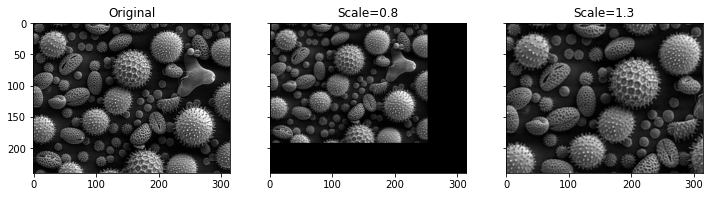

In [31]:
cells_scale_str = b'iVBORw0KGgoAAAANSUhEUgAAATsAAADwCAAAAABa75zYAAAAB3RJTUUH5AYIERgF5GCL6gAAIABJREFUeJxMumeQJWd2HXg/kz5fPlvvvXrlq7qqurraog2AxnQDGJgxmBlyDIekaLUSl6S4sstYowhpV+v0Y3e5uwyZoMgIiqREJ45oxmAGM8AMBkDDNhrtu8tXvXr1vE+fn9kfjSH1ZWRERv48ce537z3noDJRfBGLwp6WA97SGcOKFAAIhCDlBbGPlwIF8XwLcuJ8slFucOh9ZrPqPZRpjY2HWtmxNM3AeqbxBsRGLBTcSvUK5w/OhEFxZ/v846xAPm18+ueH/+onfpb9Re+z6esfPPnal+pqK1GG30kUO4wRAhCcCyGRiDgypprHSwc5mLnyww+LTuvEHriz0E+mhzQSX0z9cW7Kp+ryh1/4f771kj8eH5ZSE35FVsoR4X+6O3sKe9yOnIGl5javaTJbRCNtIhRaTm7vcRJo5fva5ztvlMyxr6oCpJRSShBCCJBSEp+sdRV9uJBjPAVI6I2k7Oam79IVDxrv5eZvqn4Q61ZXoZBwwMASSdJeSCHUP+u2XkjdIenERjHHWDCBVR4jxHLF0KVK1M/oWjHouo6YTiJjd7aWyDiIhZVlkiXReOiWh0OuAmcdm2nPzaiFqcqB+O8vlC84Wxnt/zz13GP532i82Tr1n/fIwsuTZVEsKCc69YzXyTOEQEoARqiU1rFTAKs395bFw63bE86uXrOGDHwHIlX1wtLKa72pp/rzR2+19G2+FfWVDLQpZREXSBGbTiYY0j4aUk9GdlNhEbEN/1AP1TxUu5pQ4liq3j2iiEhSLOHjI6WUgAAkKWTd2IS8WeNpixK9TXVyFm6t33hncrJ3cymp6lwqbYf7iUYirhIEJKNgpXAy0U88Vv4oTLwrHQmYYoSIYDhbUlw+myU5izvLJB7vd5JF4zXlU6XXM1NVlDDApsNlEsW+FxXiJiCRCNXs4WnXSfaq9j+qhP/Hb75qib96uv/K7jK9nvvbL7PnC5WVzH7gHUSi9pAodiKkBCkF6DJJOPe7zacG8KuZurCnnPrU002/pE1iooeDhmr4dtsfZdNu1x7pX6gdZkKkp9MQKjqO2IR5Q51ucN3VeQpQyriTYOBKoZTvzs8EO9VIRTaKdOhhXSaCEAB4hJ4EKQEhACSoO0gmCB41aEsEjR6ek81eo7x5FF4fHG/ezTSpAOTr3JKj0NDcJBHEYEFffnp+qmv0iksT69Y90FTgSNMToRWywVFjshALppzqRgZPZGr8HVN/+0Z2j3cwgBRYo4gBRVgdQ4MmESNiiNfCUaYnrJ98959dL60I5+Gmwl7/oD63RN45+fjvajfSjW+8fO3Oe6X5o2CIeohxxpkQMuFERYGr1zawu5vChnZP+7nBVuC+eKF25BqfmhYwbAktKk48OCP2tz6TuutJZ0oDxO3IB8gmN4L5poUpNX2bTLdvawYa9QIBVnL7h1VqCgixUKVXBCEVBSEk0V8TDyGMEA6jMYNUPz6wrbvI6/Yz7MP+9rgcNs81ouLioKFGWHBnlHh4diIYCE13SJkvHI/MXrfY76w6ztSHIQEQApEYq8gb9IaU9LYO+rh4eyzaAUt/zyfzcDNb3wIQLImxyYVUdAzEF03EuEQsIWfiXKpsZt//He9wU1Vu+Mor8u/+c6V0dS1ttNJe4+tvDqXliwvjHwpVKIkQQggJEVGASd30xhfRrVURiSlmxt9lZfaL/Ved0P/lqWtB+WRTXRz+oL78g7f8Q/Yw0aN8MECK1ujaJhnfcDWTcpGIbiobbI5NwQR3G/tH2y1tgrqBNlAkSgmBgChY/Ag5BACAEAKQiIIhWIcFk7wz1a/0JuB2jM8N+9uWGh5mM9sEIYaU0FleSZfXK9AHTNCo+OTyPDTOovrDRnA0qUHAKUWSI8wCP5Gr7n7Xlfjgw+pWNSkvH3WX6jdYl1EOnAlpZMYSCElClhp1GSaCKZBksXE0WUzGV/Uwt6ENwukvreXLq5fGqztf+NLc2slPnuWAkuLjy9tc6pgqhFJCKSGSScnCM8+6HzmZj9TPJe3ezpJeM/jX76dYP67f09ELR0gbG+XuSsN0PwAHtQwTI5fmdK6k+nfFeCHEPjArX3r/QOUMGQYBElomBGOU9oXtjRVNAqZYSgkYEEKAAH2MIFcJEQlKElPWnOzOQsO1+yFcbj7IuxjnkZb0LMGVwcRs6KvEFcUjxInJ6q5kcee9u8srJHfULgauwCCAMgZIV/hEf0zFRP4jVUU0m9/aEK2IksiOMZZAACuaAiCZUEiVMQWECBRWVIJaeLBc6X7myUsrf/fU1X/iHa/94fTNX3vm/3a++frz150njv/al3/hosN2h+nMwKAYIUAgpSSWBbGI3rUvBc7EYE/JhVG/6NejhfH84zs12+55RzqKPx2+9njnVixVL5CpUox9Ome4trVTw4CEglQjjXt3QyQJERHDKugyxgrEE7lylkTCwAQJwEiQR6ChH7GP0xBHWFEYdhMS+LE3aEWqmlSZOdB1xzNzNQkI+LSXTjGwRTPv2MQ5d+J04UEbPe96g2YGIBz5nMUCc04oAGfuGPQkt7jBgVnpwjWkAfUg0zcFkhjHSbSoCiaRnm7UTImZwEiinIuWHHiPOdX5u2HxNyfQ/1i//I3v/ww666TP/NbtZ/WgVvFemRs+fC9hbjoWjCVJkoCq8CAC1avDwrGtTo5VUGfJZ5ZFsdM6e/q1SFjnb7ay6x/o1zeP0oNEJRyRZl4NHPC72pR302e53RRJK86wdU2YnCHJiYYSEjAdkvkXl6bmnzod9AxCpMAK5uRvqlYCACAlcpAax0YAtuunesyisT2xRwtuhmJiqBm3S0hUtgkCqgCoPpdETS/nr18KO9O1rDz0xquZA3AtwpEeKIgjpjKFC5k+8lWGhNfAEcKS4JhKCQgEksy30jRVhr065UgCyBiAT9rD0THy9qn3X3+i3/ulBsrqX3SJtnSn0D2d8VcOf/vKN5p0C6oHQuGKH2tzx6cdk3VzCUZYcifu3ddFL+TGhr4gxjQnarDS3othSqvOpU/dPHz85cbUyBcBogFH0+p0wXPjgweeZ7Kk1zns3d9rIS3BHCWRIgMNMS3wnihGiX+0lXqqdUQRSEBCgIYDplIR64QAaIJyCAFhBAxJnhoTSWLBNK/AQRCNagr1Yh5kK9FEDCRWUzRoV0n2wfWDk71e96gzmyXFXr8P/VD6hSHovhqmAWIwhYj6UmIioxAMjhAChDAHQAgR4nlMJINq3SAYeJywHMTCsf2jYN4abs3mXmm4/2bwqcEfHT/1/h+e/NYbt754tvH1qNfYuFqF2zWMUN0sL08qKDMjYg4YkDRZki6po6FetfoXstugHY4MGu/lMqbGsKY9qD68cOHN7RSSEiHOsIziwBv2Wn3pJKEVAYKA6JqPGZgRTSInFJE0KhUWxiUnbGTmGz7GAAiQNowzxnCEDDXgWhxZsQCMkRRCiwlf40yDWNNN4VGkmhpiUXp0pBFZioCmKKc6jBSbaOnITtXl6ZWdg4No1g2IHjPJND9ROeFxxKhQQiJkGnAiVcnlI+gQFoAAYYT1qN/t9hKdCQmIUjpOgA8RFR4w89hUsB1fqY31zd33pruHn1psjv9o/0SzsR4Pg9fqDzEZqMmcg0fdkTcqRW1FABFRiEC06RQ/jchytZDcyqecXNDzc17R6G5Z1yaG9fUgQF1NAABwt9YaRJEvjFDlPMUciXQjpCLNjSBxDC4E1kWyaCSRhvR8a3Qu3McYgQQIDNEampbwwMARUTkgTLDggms24UXeW1aHzpBaiaIaGqapbM47sFA8rw8BkkRRYYyAED+evjR3f7cWPzV7UO0e61WjEbFHGRabgZ2ICc1PwIo0TyKBLZoIAggAMHrU2AFUJikFRAmIJGGCg5ZCIS0XU5GbMa8lF1Kz/vD0YR6d79aOHjs8G9xQXuysdm89fqGzb1o+UxYp50ZGl6ps0hgThogVxlH5xO7x8GHPpcQpe/bqvqIaZsqNR8k9a+rtB2OOsgEIAVRERAgWBqDqI4PHIXW56bEc6YeBoY6p6qeHthjP8zjRR3ISV0v6fQQAUnDNTSrnzizO4Y5ihrrpawhjyQRmxqXcjOfEWccqNyxL5U7eFDEXvNHVWJRJCSkUQ+FxOmiTvPPSXKY5XJ3a7/f4ArWQ74aaPqKEkzi92J8u9+jjE428C5TImCsmRxgBIIQwwgghHBJd14hMCGBCMUZ6EHIIk5GqNH2xmcsc3n9mVrvXMKYf+OaF9Wv+FZa/UNuu5Y7eHnDJ2eIIqwQhhEPLFz6liYJQbHI8Pkz9UDDXjmcDNlzoYaOOHmzMnhhHd3QjTgCPgQCXhCBTJ4whIqlvxBrlmXBZ98KIP3PwY9ClPo1pKMR6MIbQwJ4Rk+xdIQDJhLVPvnDSJJnJ4+Mhs4hnIQDggurYTrfCwXTeMzLDNsFpSkXEsEprDV1lMjFVLjXqj8VK54goPr51GzdNpa3HcbFZn5ioIxJRj5s+FFfuDWer6DTUs/akH1IhFYkIRh8fjDHGlMo4oaoSI4yR5JwmoGDEosDyoZydqHfUjVvG+kRmJv7E3B9c/ZylK785UGaeq38jXKIhj+dtHbOYIxI5aBxTEDEwpshx39mmC7RwbWV7p3joB8Ppw/1B1qdqYTRgY1sBKghwgTAKEBLEUCGwklgBNyUuTN1iT0zP3nnmo+xSvdh+vsqNxXCUigzWIxRNfyglklzAheN6fawOb6fntF1V62QSIaWQqnVyiUlZSOtx2ul55hCVMcOWTaLuWPMC4cockYJHxmR40CZK0BjNPj7ym8ma1Rw/HPaimmBMn+xrkXkR/PSEsHRuo6mJXb6UQ5CohGCMMJYIgZRCcKCaAlxoiEUhE8ApcCESYRgTujcUhh0mFU+stLy11kN+5/a+ud1pP8Zfe9+nfpsaSh57owghAElEQ0JMhC4UhqUuGDrh78YJ3u5lD2v+6iiVLm7flfGOT8H22gpICQASCEUIZBKhFJus40o9dk68W/5q7v3e7F6+pJwk5+8qiQauqfiJEVopeQcI4QnSL/ebXPST0vZUpdazOEghEWdEs3WvUBSNllJxUmv+0VhDloGGexuCJ9wwmG9pFOuGpt9oRsSMC+Pl94aZY/dbkVpsREGfqoyET9Q5V79UffpTq5fOW8vPskptJ3M5PcaGIBghwFgCSM7ixBCAIQEFuMCpytJyZpLECuVo3EzrgXfIpmpqr1K97r+/RcewfWR1B6VU/bVbsUhFVO/zLGArq8ZBrAXsEItI49KjjMQ0TAd6b2R0Mtmj414Kv3H43IMb2WG9qgtTdqmFGZeIgBCIMYSBaKFIfXLn3K806sZPX+vnVyv5F0806uunzPbtzCjOuEz3lWxnuvRRkygoYYqZ82JqW9KdaKRlVTEiKgFYjMjMsMGn6sZ8zznqp+96Wqc3qO40Is1z9IUzM5lwD1Fsib3bPaGT0OirByNsvlbOdILBmKmc0qdrEJWPnvvEW888g9TppfT7F9u9l5a75f4UcrHGVRblXTWJldJsMSVd1eBgccDIOpuSHRjhFAWIVd4aGbPTksasnDRYBSVL29qxcmW0kGre72BFRIQGXJdUJSFTFc4Uv4UiVQQFl9JAk5oLAx/i1PJ9nQw7LBEQdkI1NjhmUkVSIoSkRJhSRjQvUIOYrReWh1Pl1ovpf/irNx77x2fr/81LMziVfFC/lHoqWEkSZIariw/uqkL3FTQ6zhFDyEyHfWFN7g00JciMaJDkHsuOL3kb/Mmz7dC2YFYfGsAVgyCytjBvJ0n6JN4YNYZ3hlQhiHy6d/bwwkDvMg37oR+muSHw8dSo9JWffPbYHs+k427wWnXtYrFwYcYdZzY852C2PqU1rWF6YWmmMrOQK2OfmiC0AC0ZYy+FOWCERUQRjvvjwIssPSGFHMnMQ2+Ckb7Xe7gxQhhRkEhyKaYDlhAXafGw7kkaJeACQ4UhxERLJJKqP+BixFAo+DBWkdATkCABJPp4oyJchiiXb51BoVsU2z//6/n+1HCt0nvv7iml/Bu/9DNR7YUTIj+xsZiylmduvm0jQWIsWUlFAZfSzGbHav67edIkPOLEsanvj2N7fNStLZ0aRuq4D0CIkLozCUGChUQzbS8NIhMTBOSZK+mjp5LtNOG+i9WEh1L9ojn5956bQy3v3LNpI1tMBxePpZby9PFlaF2n+rmtmQHXdShPprjvBfmJuC80gWOtUO5TCSxkgKgMESGxCBHjKdHy0XCvuluCe97UZqNRC6nCmc44IMFZmE51mAk7/Z6rKJXZymqOzPBAsyQDlKExHkqaJJQINY6oJgSR8EhuQwgAgYR4dqwS+ulR8r+Z9NPng2Wr/ZePh/WzohKp7WPOmn3iHxjb8Zn/2Awwb7y3oUrKICHAnIIeY8UPoSnLDzoCS+LpIhkpZWbGzqdwu26F4igVP2zrmCAGdp5HAcecoaLdSDhWYx1j8umS/9OToOfrqpkkWOBUyAAyIr/tz7wDlabRU7R0aa0+0ZdN9Dnt6CevDBuJysEt6hAzkYRgqKIPiMT6tNLRtRAEQoCZRwAkOErY7vYSjYKZxs4BwR/VR7FUNRYhzARGABAEvhYNWnxsL10slhXBTTnJM6vFslDdkFuU2YpQFMBWQgwkkKAYY/TxnAQAEPZzAzY3rQ+rL37xgZ2/Ybzfyp4ddCYmznyNFAqz26mRlz3/vVfofrBbT+xCgjkILBOikxEzBUc6KN8eeKpweeTbYZBRJ9WqsrV0NhiKYAYaZgJIcmQ6fUUFwQSwpaRqEGZgQOR/JwdJmF4YSj9GuirVYWnk5MKL3lvj8HpzeRDxbbbx/XNKVCurQbCvTb77F9pxyWIjhxKuWKaOUTazL7RY96dwnKhCpRoCFI81hEGxaWiwgPu1VkseVTux75oJRpLHYDHABCRgHg5Zk8HchUo2zUyCYzQj1TPCL6TP0IHIBKrCQAdGEq4QhlVBEEIIAZIAgKSUWa2rqrxcf4K+qT0Wci6nnoHB9w6W91qvaLO7U07yO9//5OmVzM7f+V9XemYwyglAhAjGnVQcSIaxr77VufLJuf9qwXw8vUEuCzcZxF1vefn23Gwv9OtjKhECrGkoo8aCylgY+UNVIDUBSaatieFdN6iIZqAToU91zF/78sVMeHS6PD7F8nii0Ga3xkWka71S6ff+vNTv4qdPXCOBklEISEBID6m+iahH+JwXq3rAEZagCg8TLMC0qG6qqqEpTor7qTDUGSYCKAYsCUFCSMQ0DnymUuaGHvdGXpyxIJ/zs6Z0i6lULyaKYEQFULiigaD0r+VeAIRAgvTGhg9n8ufXZ85+yzuRPH/g+hWkLNrl3Fxx3mKD/y/8lTntveMz6+KND5QpZaAjTEBKpmc1IiMRdjr8xCcEtg0dpaDeHj+FlMshffBerkRBNQYdXQICpFANu2OsAedN+8iLFJ8AJsoPwy8xJ6gFgQU9MbmsvjjanOfSyqCgohtShjjAl4Rnl5RhiuqPfzF3f+UvmilJLUXBmOpaApxvEy4YLfEww1gCCBSdjzBCnGRscFXMiKYpujpIZqOIg4KIRiUnCKQAkFpoHT+pW1lpi91uPDG3sNDKmu/NuDrzeuXOsCARoUhRsaJiTOFj2iGEHhk0EuhVY0bPLpGJHvMYlXsv7k9m+Ppg8PK6ZnWS1b546tSw+sTEgPzG9RIbU11KAUyQpBVECubSdbc+99zu9tM3Plq/kf8VcdNQ3JzdsXS9175vR+NejARIzqkWB67AXGj9YrCNDFsLAZHjJx7c3PGXiOg0Os7ZXPvSc9mvbZycTJrrzz+QGdTgOZgtSrX2RiHTv2dM44vKwyVjPxuUqeQCAUM5lBySWMNuajIR3QmsUqxoftuSjOtp6GONYJUSLbOVMho4JYUGsZCgCCkEYCRjZVlbsayjQs7Rzpy5sLZtsP787LLXvDw/OEnbDBMFuKpxEAwrUmiAMcYYIQEISSml+nzl9MrVSkQ2osfOqht3Et3t9MlSIxQnd3Z2Tc1gqlm48xtrl9+uh8MkkkgwEQsa80GXx+64Ub9Mg3u0MpMUj1/4KPtjoygo3qGF6QgXRf7G3bHGhRQxU4yYUwOGLN3+auPezKy9+IAL8oZTU/D4IHCKvk8/08pe4Tszn21s4963jaZgd84M0/KgpR/9VX7ynbvfyi2TnaD53Bu7RphGCVNxwtPDie4h1iJgOJ/pRUgFBpoYjHSuiCSbjVVMNELt9MDloKBQx0AUJEGGVhKrJMQnn22Wk+3JQuFYPmVmM688sJ8g8/t320+yb00liw8EQRKI5AQwQQJhgRCAFEIQnnCMpJhxHx4cosqCOlfEqn8k06cG/nWh8uMozNIPZGNPf7AO3xY/p3/ubuOZNa1LMcEUcaJacavd6cWfydYvesXJzhIMlH+dT7Xvd5bkcMFrl9ObSblBRUAQxsowpQeJ/PyNzOH42euHVnGiR9kp0vlw/5nH38DuzWATjfsz+elxrBQqqeujgz7JJDOnL3Y6U3Fnwszqk235Fd36wXvzv39qhIZR2oqYSsW4CLtjXQSqjCItp466sZZiraEqQEExmE5MRIItXVYjwiURKoCUCCPQEkRZIsWlcDaC4xU4fvPVk/j6OXK6q38rudLaXvVGxza1nZoNgAAh9PEK9sjZAoCxalIpkijKoqlCe59S27u9H6izfFTcqttq9OG1dN94IouePpPsN85+Svm6sfvU5xdvDfAj6CWTSKpS5IK5cWZtFN14/Y21iQOr8q7ogt71YVfTdrZbgU2cOBIhTbhnDMLK/Lvx08nYe35ZQTOLT5BWx+sND53T9drSc5PNhp9pZ6z791TiLU2L8cC7P+FK3dStit0SJ1YUtDhx6erX5HArG6UUTkgSTVZ2HyAqCVf5wFctvZi1WKsRKkIC5iFKmSlTNc2416RqgglTMEhASEoemaqvrZ9IDCAz0+bXJ8X2aua3q1Mr/2F+6feWX0zL8oSama0PqAQJCIH4EXIfG9JqklCUKNkcWfyEw0Wn+ybMpE9Udsf3KcosTZY61Vmj798alD58vc5S5BYk/aPgT66rUgrBhZRSEKYIsRI4m7L7B6PMyV0zXbYXT1PjPlNFVrwtAlfR43GY6DTMSm91Aprnp4797dOj079VwE98+izvkK+uDbf37ZGycHDn+uhLX5h28n1frbZnFxJFivG9o/291LCrjKVlIUP0zSRjeLXvnps6JFGcnsmlJpzRddeJkMoQEuNuRH2/tdtBCgPBkBr7YYqouhI2j7BCEoxDIiQCEBIQwhG35yrG5GBC7zhodXre/sTZh69cXlXXniL/9szeXeVOxb3TpVLC3zwgH/FOgop4kiSRt07KZi+9QPihY3Sc7MgqZi6HDxtKno5n7P5Rr9zfPPvSd/+s8FL+cun2nzvwsaUJCkcRcHrqmdHe48eyhWLXSS/lMnsfOafvHlC3k3QixjUc2oiSkJ+q1M6uh5dTYWFuwTrW/O2Lc3q/F5GzmY3j52n4sL8Y0rbI/MBpK+x9NvGgR1g/yFlscmPlC6yb65myTCzDZ1amc1BKj7eMJMQ6D5K9zUbeDGmsxEKjfqfVbHc8rEOEMQIi4yDqebHb6sa6kAngmMcSJBcIY+yLxUWT6F5p6mHVvPz1aO53v/nsqbHT3v5aHn3zyvCV+WHvwb4uP7YBpXxk4z9CD2TfoFH2iSsnixeWQiR8zXvqlN/e2MzWmVitjHt8+uzI5ZmJzObqujnMXbJkeLMxTw4LAQIhpQDEZSKFOVvNn0q7mfTa4d9aeOX35yvfaz2GGt24y2wpGZahSZKQmqcnRjdPPfdSqXLirfhY21jr2sODc0+TeLs9dI482ewOp048r7R7M4fNxQU0+YKyu5zadyqVxHtSu1+m9du3Jks1Y2n/rffd83f2T9Y13u+0atXWyEp5QosxloJolBtSSalhooCiygRrNBqP/dFQ2jzCCbNJSBEICRj7SKTXprNTWqqYY8VjvVdm/B9mzO5j2vVa66JZrD5L0ubU/P2eDo8kagF/TTwppZSWjGO354HvUpEpTWQ0/6Cd9OKlkwebrwIocaekHQWTkXpxjy/tjo/b1r/6aNZpLyptDEIIIRlwLCGj3Etr//n65r699oO/OnymkL6IixrfcxyICZGKmvg+EzQyivMv7eTiSc/7MFyebPong3p2HpMvKcXWyGdLrlG4o19wwc2BEw+U419QNyM0kWqN5Ps3mnvRpGk1HCUpqsrvd1+qdde0TSoFFoIg6kS+CphTzBgxrERizJhiiYTQGJtIQVJwUJQYpxM2lerNKFJgiiSw1EIGrFJC99+cSJLRg+PLZ7707r+d4jXzs833LrEPlqlwNx46Qn4cWPqYdR+/IAKcpsNW62xtdDDEvOrfqpFcBgcD1wjcdrZ2Y4/x4kLtQdF6KKazHXEgv/hk8I0S3haccymBU58mZNLNZtPREJHK3q7eebLxfeUzte3SIOKBpkSJRBpyjhEWZU89qT9evPaD02Q1lx2brQX3j57TGyTv76yYPgBbmp191k7bx+OuHcvOB2/cMVRPP6KJqHhKaTxpopNm5P/e6+TEysX7+5OjfpJYdhzrKsORro9VkUgNByMfdCVBBgnUEWiCUB8oxVSFCJvFMFx0Dk/iWBAimJYULk2aebt6qHzrsduv/ZPN78+xd+vq/PRosP5a9dD+8M7byL+mMSmklEIIDH/TaAEkICsZ2RdP56eO5boVea/qfuqsR4wRD7PR+lj9PA4spV1DsD+0Eu+OXf1/x1cWRt9ms/UNxriQgEAZ4lCd7c8S5+Lo6rnp5ObxyieM79an377zVPZwkJOI29SX7NjVyeLKuSnIh4P4Bac+t3R72l5KdgInPSaZLO4KSMauVvIjye2eC4HLTNeFXuzXUubIovlc/fad+Ye1ifw7ofWUELnGNa/WwyiKVEMkFBERI4648KKJMkiSYMSRiLHyqDiRlBjXKZM1AAAgAElEQVSzCHy4OMcLJ8U8m8QNFcfyqixxdM27WFi9Ut2dTteffFkZ6w19aWUYtS6t9dj5xa0mUTgIKRHGP2oZH7NQyjimbjNVimJvfThOhyVyXtucPxMm2V8+7GPeL+SM9n5ULOFcJSXfWUo9sabHav+jd3zHNYmrdURfVTxjdS3uva5c7f6g9vzz6eN7z86XZhYaNz/RrhpUMHVsJKJn55xP9dE7RoovCcVp7r3r0Q/YxclJ85DMzkfNldRtFJFUo57K3Lo3jHM8U5sw00P6yWfkRqFFSNfDWgZuf5guFieogVL56ltHIAGBFBIwQlJKCMbpx86Up07fF9LQZRxSzLyIEIwSavGBOmOIdBl3tRNks1gfl0comi9pc1ZTKjuN3vb8zfaFoj373tUL7Nvo1ualtbYLUdLeGeEEP4rHfQybkI/SehKEpNnc1LH8STWG6uVwRRzcuknsnx7dOmwdhfa1rNs19exipMnbh/MnK45pNq/VnlO+r203rXAg2ZKZc0eqwYYO9BuT/wE3Xim7/8t723TpHTP91unBFpJD200Ns4qfmJPzER3ldTPZv86ykf1s9CDsZz0rJhe/k57cDpIj1to1zhuDtjXkTnr6UEPU1V962hvZRopZU6nCkR67WTMlFWkXP/xmYqmUfOy2IJACJKydzPIghpVOm4ph6nzl2Hye+jzNFRQyVUlWTqUPsieC62ap0imEDS1eny4lrd3i0vidunWmsfpu8+2VF+pvnUiO1bZT3lvJVNTY6WD6o+vuY8aBRI9QBA4RmTo1PboPMZhJ2IkHzbS9/ed3DHQn/OqEp2Q+Xw2yY78k7rj0EOv42Xfe/vLE1Lb/E+vbnjHzhUL5WB57Mk3T76GTy3lG+87xZ8fu9f3N/sXzmjY+1GwEvVxpqvTYhUl1qJwpdlqt5Agz2+7lT5VKfJzyiDyMwkZrQFg+UY9hJOz4qnWznh7xkI2H2+/3ORORTsYy52WmxEAfqmdk5v0/cQQLIy4lVTkCIaQA+0yu1hLJOJu3W+HiNJFUz5muR7EqI6mywYGieBMoLIuyPXDaJBdWpvm9diA/erIQVbS8NajGR+HtI292UJtQOkc8PzhoCA0Qf4SeAPko7fWocEHqUk31Nz21vZAj8LDX7RQKZZHsp/SiPXp+8mYNnqz6igM+68+btxpkk1zRxR9WJ5R332jTtcvhtloTxtDI71yx1qw3L7H9Z07+iycz2eN6OJqdftgoVQMyItoZYzx7qv+a8jh282VzlL64Thr+9nRpe+fVaatPuvlhWzKuJYVPXBYPReB/eaKquMF0HFnjextHvqdJgJ6XKnTD9LQR3r17mz5x4+UiV6TEGAkGIKUQEp3BLT9lEnOYz3fhmBXiICD5vOgYCTbAV8qZC3ODcS19buNtPQxkvMfsbBXKRRh9lD4/fFvvb5gzxTt25p5ZbS2FeyC9RoupkCD5o6CXBEAII/Ex71yqpqdWK35Gl0cbC/yL/x00Wdh76vDHP//tzrU3NXnrNTJufKUwVEzTOmEs2BuZYxu1G/Pj/W1zweruhdCJwHOWSw3u7my5n1xYxAtXq++u/nz6ROrfKZ3pXEtmOqjtKGdHxOre2y7ceIgf1/dbq4+JdNSXA+BpnWgRV2NIu1rvsDu+75ZE98P+nYp914w1LIr5eOqfWjuTJCkOtaP2+kRnLy4P3vHlFhMSAcIyIQBSSISOh55EcYKUhDLVRgWa0mJUSQ0YkgnJThan7z+Y/aTfuLOYE+myr3VE2aibGw+9tetCvo4dNl24P2VsQ3mpgvJ6nHceDiKqc4YxwviR5gQIEAL+Me+Y5ndrbkbNU283IrHS+qg+GB9PjV67yaYyPeRMMWu8RVv3p08cPrgoWa71x93yZfz2vXuRMuvtaf7Y7NXcHp8e3tguPpHst79xGEXBqavfnM5m3iyYd5WHY676Ye74crAwpazN1Pr9w9qR2j3yqvs7TXvKqKdnScYHRRO+Gjus99gJyaHXjUflGMfETyhJ6stf3n2HOPkOshrNdCKyUzPey4OfPH04UEmSKLoiEAJAGGugsWFC2cjMDuhs0u8lqtvSHFbX5BgVcyhaKx7t9M9x9eLNpraJMm09r2YjeyGMxGwUsJNBreFk+RKuNup9x4w2RglRpPxRshAk+lG7eEQ7WejLJ85Y6dk7Cg3WtfTD930IL/7L6uY8UpTp6jOzO8sBNdrcHU+7+9qdHwTZSVxZWvpOtn0406gVWkya/TjP6/uFob6or959uzw64Ge0f/n66z9kxfGqmNuKootnPjXpLMSOCV6SzKuFylqx9nDLSU85vJRFISFqmA9DQxANHZ8roATTQU6USNtU8omiDhLl4Vvfj6rzP7Ux7KOy3VWtHLJXxvfLl+zVIg8lcMAAABgf46ohsSodVwRUGRAjNMyAav4e1tVohLNS7faAru/fDfwu0H0+poVBs5S/z2d7mZm085GhqbGb3e10m05rtz1qICA8BsoeISYkeWSlix8tZUOFdnajPCSpSowu7HmlwFGar2963SAX95WxiEENcU7ne2OrIBvDT2ra+pmt5qjFQ1zSuRUDEWEnTsv54uTUy72/ldmyrXX5Z/KcZVTQLjqeuRuTQzYU1YdOcLN6V14azK7t7bbUbEVOxgptniptHBAdh4gyhLCojLslG7cq8d6ZVW2UFF0a2WkjiWXO1y5890Hl0x85i3uJncITf3BtEM+mTz21fNvAFCGMQIoVsxvPKcEMUbQDKzIjxnOBQGm/rSaa6y7MHoyChR+7s+FZ/QvTD0/k73OGJ4ciAsTmjvaN9tF+LluNk7rAdqnrBa5IB0IVCkmEHiGaOKHuAuYKAwlISgmIxHB6wW5PFUZOv7c1Js5Q/Zkb76YGL0zVBp9ef5dxd3qYeu7tlyo9uExKdpGSOHj1Xz/x9OJmg2gGqNQfdBKG1kSrn2of1Z6xql9+s/PlNnYOrpRep7VXp4dJOFQuzHGtO8pU/Nv+SuU9Hi/76SV+OE4/qOCeTnQhEQJA8fPuUJ1SO4SPX/xso9OBSHczIm45tkySnj9u+59E0dGxk+rGOrt3KTdqhg12ev11piIEUnChQ78FmghGBXfnGO8XQLfGPKNut3UZG5U8h8su3Ral5XN3IN1ojF1I+BLHfeIc1EcNWupNBjVfDZKs2Rv0mNCQTx0POFMxZppHxsjLEIk9Z0xBSiEBsBqn9N6L6ka9nzRJBgIc9bZPCvZrxuv9v/+JP0l3n/+l78YHh74dvXLh9K28v0xav33ppZ/6j9/rkFRnX3Y7o4UXnjylXht4NZgcuzfOzmNnefi9peWfS7wTL7xXLbVG6tXo7JIyp6Wmvf4Mfue60b985nbQ/9nBuMdfETxLTAkYAHDSPOzhZzZjD7H0+J2WpxyfGRi+W4kY5njcYcOYk6/3fXlttfegttJ2GeaH4VX74SPpGyTL5cGLMUrzjZ1jSjvsWel+X1W6I0W4mumxUtR84IV9GW41PBGALkI1mqrKWGQjZyLihOKAGESLNpQhT8VMqMpYsSiOOUmSDGDDcMHXwiTNEZISEA6lyCaD2evJtLt2nug/1wwm360gMfh3e9D99u8b0d5BqzpWAxJ/WNzfTUsXJunpxd7ExAEgQbVgrPwP/+3nX/rqTz+3XUtdydwxx9T5vc705OqlqT/9/tzy7ZE3HaCLZ8cL6KBKU81gbhLqsZncqfb6SaeZsH4lxYCYQiIkATHBVI8rh1S1t24PA7v167l7/fwwKYSaTidsP23j60zOtD7oaLH57wNQdpQy33/6dhchkBihGuSySaCl07cPfT2TGagsBsts3UozLNCgNz3azHsX55vx7RMCLcmbA5KojdwoLTqWL1K9g8hXYojG7AiUEAQgx/97737586/Hjrbyi2+efO6BdDMGaJbCMAYAhLGqZkv+5Jhn2fyF+N5OrXlITvYWP3OUXnisYaagaI+qk72l9DzLF8tUzOrffjm7Xvmr3mWzJvuZ4uHsTyzvHLZ2M6e+9B54o+Wd/PobmLR0vP2ne+Nx688np9l4iB7Ola9HTbfqv3D8tY6ZCzJRe9q+3WD+j+1N6DEjhgQMUiKigp2x6dYE4lJPSyVX/vaNtnPpWF3EGHRVIM2sTk4/E585flsWzzenfEDTM9fXkwcES4lAIo85+YmsdndTp2Nj2mFgzzqsF1GmEOKLY3QhH8T6IDlz7nBE46OU64xhMBGnnHroBg54VtiDYOhL0zMTYUfRmRH5ZBA0lfFj1F0/3CUWbtvRAGsCHo0r4AWNDnhnUF9598ZYjPTwLxd+a3p76DtuThWNv1+6d0a/++x//bX6V3oG+2hida/klYf//J37bk3z3IH7xMpWNesPtGqz9MfN4//Tr/+DT3zLrwTtK+8fzSpr7Q0z59a6ne7ZDGQISpXk5t5UojrwizCOl1KM8cIupDLEEBIhIQD7Iv1UsVrQp+p6Cmzf++CglNE+F7+iWCk5HCypQ5mH7HRvcfx/3bhwVJtVs0Yq6SraLYUwBoJTv1PvuvV7e0gLWTCiBV3ld29UlQRLDhIEyrttdtPsadHIC+1oJJWYJtEAKaDHdmqoMOn5UgDmv7zla35F/eT2QhjPvA/ZirfKh9UvnLybldmVQ52jR4MyJzTRBpPTfr5St1W81nO23uQHu9r8YPsh0qNX79jGrWFn0N9S2LAjEiv9+M7rn/j8v2ctK5ZBMDm9RWg4IiWnuPXyb3/hzs49+Rnjh1a7dPXJ4eQTGlnZfnf9ojh2RioiWn1s8FY9N14/f6P/C7mPZBzPwKYzLbpdYgiJgEtIcsGT5IfKVHapGzAghJpp1kvNvNk0nixUI/RUqpmT03eU6M+U2+Z7reyhU6Xridd39ykkHCGpW8QbDjsdarHQiA/8o3sf7DYUqiU0Fozh7mFDpadketiPjRsdhkdarCaal4wa1HVpvev7nEtBZMEVl2/xZ27PZYRji+3lvdOFw2O3ODesD2bax0526iYmGCOEmEJx2i41aYOpnrZyomt9rW7lO//zP/5PFP2ntTenS06/UML7WuWwd2kVLdxOyUxz5+S9jaI5BqotOoYmnYlBMz117QX71dq9ndsfPBl2vlD/KLk09S11Pr0dMnFxcXtztaplO7v50mH+aNAKfvc7sPjmP7zyamb8z0bVETGERFIIIC413vDGYjkZhqqy6zisU0Luzfqs/0L0da1w+hY0tOH9vdNNsrKxknCrqyXK1Epup0YgEYSgPsaaSbBNCFU1hSl9IlXIyEQlsS4Sm6O8VT9Y/bA2sBbu6wNXSZRIjUwG2igQoygVkYRIPaEvXvzuut39samFxaBw/6evPPF3PvXhk786fT7+knatcenqWy89focSghBCphdKfiXdJUubfgXutoO9M3lbotzL97X2mXsfpmoxBWTljaRC9rvtY1W2RsgPPnx6+u5AZ5HuHJNNEfXThUQeBq83gqWtPL7xgjl48F4/eXOTu6+mtOJ79z56slLrmQf3BeurbHzXUSzDTCvvfKeD7/TaNULs/gQPLR/4dHhkEBbJDhA3o+pNMzeADFYGjO5byIyjMJXpP+XEy9W1zo3HOBdmVu0y/zWfR+PI7urE9AyMwEBIgpQ6olgjGgckBRFAYiSTRi9oskjgehKqakQkAZwAMAUhlccq5hjPPFm9dfzk+7+0cufHBzeXNPjS1Vvv3JLKyF5Hu8di++zOJa25RU3E061copL4sn3r1PyWf+GxGvLITKPy+Q8yH9w2LPPrNyth68vPf6cyVlrm5HDQrs/O9yU7/Mt3H/o9M/QRcTJdLY5NGUj/zX1M9G624t8+/eoPuHWBH6TX32zPZ9vOCUPLDKx04pbx4cRsgGZPP8hGW5CET/HRlnTnSYn7AhLFCI9VaqygndEmkKbP5MZiCBYwotv+wDfLnQ+1SR5MqfTB+8Pc9bFMj61Mvz1uVqv5/Kpi7HOsciXKD1OM4Ech7kdx5EefgBDCRAoEcQS+JyRnKvvYrwIhpQTgBBdFu3g8qp74Kn3pd5IvXH3c3WrxxTPOEZY/jDLffekrT+qFgWi5Y7OR6s90KQTUf9i4a2ZppXGvkqyfvcU+6il6kY+4s27X/NKXrtW+ul+rPH5YROf7+ZvfP2Y3oqORGQRmuZTV9FCm0BCXettHpupKLpotp75bWJrdFAE/u0Qfep2d9tkpzdwbndQN4xcW72ktcfrKTTlnVF+abNjaOEuwyjQUTR3PTAcVW3868rdTdrp8xOy+yFE/CTU7L/hQRivphuNei7fn7173rKZvVvH93MUt9C+e6g1+9sqLx/NBbR7cfKTi/+L8l7FuhCSA4NLkQlEEIgrBH/+nSICCmCj9xDsHxlw8vPxX/k85leu3+uSDA9qd+rPlH8+sbraPD/G5/HdCfLtUm+MwsiMlsTrxhIGgtLmdHcy/9F0ihGfNbeGvyoHYk/bmjW3nxNF2mDdspk524fn6Q3PRHmojlM9ofGRqymicTo9uqprduee796tyLrd0zvWLG2dXj5KtYZL2C5qfC3pEb7it5O51fO7lTP/Vf/qPfid1bav7C1bLI4qGBab2JEcPC1Y78/KwdZQjTdyVxSz0e/oEiXFgdQoZdx5bb7nT3Qm1rgjsjjJQulQuH2sn2aBwl6RPPX/6cGe1lVeAEIwxwR8LII/SmQgjIRFFEqmMokQokIAQACCFlEgAqHyh36OfvTM699XNt6w3v/LCB1uNiSv6eKCkJidzkfXa2rk7d4m/ZP4+7l/8OXOTYEQijSsXZ2rzfZjOdPx7D/FYJf8mvmucf9iP7Alt8jCjvaqXxDBMyO2lwwzfOvzWTleIOJ1nbjAq5jPMWjU3jiZLxbWrz5w5z3LnPiLX77izVxevD2jXcxxPpU7i6qSmJur21gRBMwf71t6tDW1O9y5sd4tkwhd+6YThdE6k7gu/kwN/vulOhllxCg9TlflKs93K6QHPTBu1Nz9gk8e+3Q2RB+pzxr3zJ/6CXP5aN2cVzoV9ZJWfKb5jB5hghDDGBAB9rFQ+0iy5xBgEoowQhAkGAYAJBlCEBEiXM+dm1++yF3/u9MtbxrzfPmutPnEr/USoPf+dn7r39v1vtk+cvpL5zq3V9dnXP3vpVij40BIJs+zQd8IoV8hHNJyMfH5S/S0nvbmLV+xdFZKSaZpKwUpwoxWdv5k8mMvcm4xDlLWjUMpqE3JK88N3/RiaruaybGZy8O3sg2JsV3fu+ZlMfpBcOtZLR90UWzjbVuSMY98JQclXt2da5XH3h0e9CeKMlDgzj8zeqC1XZK+WqwDBRzZs5gYjXUW9REVnevywEm6Pb1i9h1EVrKGxtHRyNp0qxgf/P1PvFWxZet33fWnnfXK+OcfO3TM9PRmYPBgAxAAgCAgWSBukWZalkqly2eUHF12y9eAybcq2ZKmKIgsWacIEQGAQBzMYABM65+57++aczj057PwlP9zbQ++X87Cf9jpfWmv9/78v8Wo2yx79+8uhcubG3jPROjHF8RwFEBxlT491EAhCKSTQOVClz1QMAQCCA4lUIJXe8av8iTP7F5uH7Mn/SkltbrITlR+NjBgv7f98Ru+OWFmvzT+8/EqwNH2p5gS1y27cR4YvWU17bqWPLQc7LixdiEL+H3ONbo3n/uSebzQSb21U3EzonujuX4wVlGr+5qncso80DTApmKisL957UNVkYPoH24uNTavzI2+sAsdSv2j1lgGmxtbKgphthcnuJJxvxpydmJ84tyuysUpmW08lc06ELappWAZOoWJp++snhvfCXMPbX7VcQ000tnWF6DGjDdultb3e9SAJOsmmNzB8sJebS65EL2eb9sIHfzNv/POzvOo+9f6l3ntN62jAwSNVMAAIHjujMRIAQS4YjRjAmDIhJEIQYM5BFBmTzsH+PwU/4+fP13ltsblyFcwZF1euLUZTLynKPyo+XLEap/8gXvaSNOh+tXn27BwxJQVK7HrUTaacXid7orwUUyz5ORUC4/QPi6wePevXs7Pl5REvMZq4vviDxc1H8wnBbBwKQEVoG0hVIBB1z05nC3ps9YE/BtMl4b+Udvv15gFvqwLEMjEeNjedbP/dIVn/P9S7qf90ldPpaH9qwItjKxBDA5mCBFsnKqmxhro/ETugnmGOzz2Q1bpdr+PRpeph4uT63BOjD7FC26nkySAx+HpQy023Ef3fH2zAF/50/v82zr67MnL7i/cD8qmLHBw7z477DBhISKBgtkL1/pLRkVBP5gqFjHBATLi11tunfwS+Yv9wKrXx4f2SQLLzlalbv1nfd0pW799BHOnTqWf3Ci+cOPnibtbPxrsNylSiyn1WjHdOZw4TorsdWs9o+yy2nWK/Md+4bdpLghy2kGEOs5/XkGEcKsyqKd0kCQGCOsYeN4k0sOI2Fpbphvug0be7NlC5SXlqsA1clnd9aDZ4Ybu/qSrJiL6xTZof1dwbu9Er/90NhwYHCawZ/p4yUD9Axk4X28tdUxwUy8x+7dEabeWd9p6srNyod3sdly4mthVHaGZ/MGBsZRIZRe+99tfhy6f/6bO7Z56wwxf6MjFGdiWUACuAc4BFpGgcOzqKJNWZ5VqcM4JFR//8m2eemDS3z0xC3dazZuBoPWRstTPIo85nDvP33ZHpEV3//GvXdzAM0Eb244cvgZH+X7uTP9+tNFv/9sOzi7fUaxWQKlOratB+6CUPWmnfiYXt2mGw2yJ0uptBO+fXqtOBHvRo3afXreo55WcYt03Asc0xoopQgKICqUDFjRerstHcAwQmwnKvn1LWH7q+Wpj3FR5a8OB8tNFjdQ6U9RZdPNAQ6oqk+/dKu6EruK/jnZnYbdm5bD2fmxdPUgNyRCz7mg7VS+46GkaornC1e6/tdtpcknjO3bF7A3xjhBg/vIn+3al7h6WfPhTjH/6Y6DcDreJAKCEEEjEBEQy7SI0cSw+4pFRyCCFlsa/MbHueUSjKPRX5FSXOHHDmVYtP5Paud/Iv3e4Mnj+tr/dtnlwu938mptoyyJ8RgfzJHw3/Ctx1l5TBX6QT1/eS+mGqIzQwIR50D734fmFjMlXF9dFRHEsby916aa87OY4XZWFtBdbAwkK3UfcBA1yYUgJBjsTeCKHIoDDV0hhGQotLCseE1jV6I7LiIaSMT5gk6yhezTtxQHoNEFeVgRfqyzctLfwjYxmLKOOESZ7c3m0U8k3bimy9izrNLRan4XClro5x1lZCehjpyIdIiV8U6dBMTfF8gu69/+a/ubWu4YkzlZ/Wfqf4QUapvvk9gBCQEEDBEAqpYgigaQHXhUFjkkARUvjqgCurUB880b0LMTRjjtdb3ijWxqxrVUzuPjNRxHTpxyczNy8k9u0zJxs79tdnPrjW/E1SnH3BHewsPvdCjWV+q4mwa5ieC6ImG4GWmcKK6UgcvNHcdr1mNAw8Z7jhl9pKNigM7K/Vm7BYF7ZDImgBCYGCEEQIKwphloS9XRcJznwMFRvuY081VhoOIpQDdzWFd+IkXwPW0mhxJx5bP5dcNzIXDtbeRDu4mGqW1MOpvoPeZ1buD/Tco4pwoEBECQFr1glXWl2XcOFbREAOkXKvf7B66lrjRLA71fv8oN+fOUd+OvbKKCkWnhuQQYLvYQSEhBJEEnEBoQQuBiH2kGt4QBDIZp/c209HMupyuB3pqKmeHx89/dl8eL6xWRoYKKRHn81/55VXMw8ruQt+9cNHsPDcCN0N1qRqiv4HSycimC1d6zt5GdWfKTdjvV4HlRrxiYUqKbo7ujloL/pZRYxMrZvx8fuBQQ1/kjR1nhMLuMzVSIPCBhABFQuEICYEKTBGtKF1RDTBO22fcd8iOKxyIDgEXjtKp9V0VIifbVhuE3bq9s5cFDcc2vdzp4zjGwot1yqx7Q7somTKL5m1Wi3wEfRN3KaG12r5jCACOacKLST5TH9lb1KN2PoFQDtXP1S2/gx0/n57NLv2U9Pxyc11SqAUQErkcwwk9ZyZnNINSjGh6D5kCkBveJQ00k0xP58Ifdsx9jeqWmXHmu1+rIxP2u5SeHv3oXq4XFGC0cHRNDg9Wvl364l0Xg03zNv/+suvf1Kt907uzBTa33xpTrI6SXbURlSvJRvtotNJjn0c02Ou01NY72Eda1j4vQfL7ejW5ZG9aochLjkTJoAIKIAiKCGBUudxhHsrjsCqFIC7LbfcrFQ4BwCoSEBUOZCg23bT66RMuXoyD3C/s1/RtN6JALMRR7rgXDNG5kZPPqzoobPTBiY0XQMxRQqNI4IRkIAZCNLpgkRa31hnlC6+FpZuN6z69Gy6pzf31qP/9cnBD2gf6yypCAgApBBQoR1YHKrlx+O3Ei/N12OM2AwEaNJvYgR83GymD2um1yGpzZ3PZH6ak/lT3A7vrcyt2plHtLK4W2m0qs9O0+WPW69h9w/795x2o/ezqZN78eK7N+JQbf35bjYeWNxDltuZSS+1x5o87jYPgZ604cFcOleOq4bCN/Sb906v3e9kPBtR7HFhAgAFEkghEKsYQAXJRFTcY5wCohIoFC4AMISEkAsAJIjUyE7UF2JVPNAZePojz29EiRHU8UUZF1yERCKViJ6lIvKLw22duBbjPtJ9qiNmqyohUnABEAttW4s9RK19ky2d2Fs81TM/+Z/cN0/cPOgtrRuJmWU6PPRRQ4NSQAQEwyiIsidmzxYy47Hnnvu1U9rDBiOSwsyBn28IwQ1ltQ0lfe3J4skXvfTzpl6csPZ3REH6k45/W+ckrN+ubT7coGdfcS+v2eVD/bW3vTs9Z84V0etpY+/u+O8u1LINvxC6oJC4KROIkWizlI43XOy0SDwlDlvN9Ny9/MRDnKKoFQofEq5HNkBIIKEoCCCCBNCpYvEiiKSEQkoKkMAKRBRgILGCCbEL3W4aykwvlwm+vdrX48ZOmc1EOULYULsmc5MV6HWkpwXKBla2kBMjwGcGQCACLJICSmSEFAx1lLqBcfgAACAASURBVDFVOWcmL7N/HI2X08kXf/iLxYGhJ6xqNoI6zG6JT0wAhIQYCOh7MDtW4MknQ3uEdv1XLm5z4BFEsZkWHdEVNUCrJBBnrI31bk81eSJz+/tqYyE8e6abfXlncTSRrYPpmd2l5a22Wnyyb+mB1f7i+fL2Hbdizj/6hD9ZGby0Ms/8FMBtw3R3LDPeHK1WgzClbrdsyFLGde723Z6oa78t7u2BDpUZFugiwiyGMJZICgSoQCIihBs8SweuU8U4EmxYIUcRJEBARLlkYa6IU7LoUcTrVW3mMF8JX2is8cEI4CTHnKj1Vndm3Zh9kOJzey2GuZWV8ZgVBnEFQAQJgVwgputiYGUYTK1+v/X1XfvRr9p8s1TZHztY+cFJvF27OPZA/sKXUkIoWcQQNflT51PW8gJaIWulS/TyHELMjJSgIL2oYkddrVEnqno30jrcqz1coQZO1Lrq9N6jl3oqfvxCKWy8MHG3myBhoJXf+3L/xNPqv6w1Wutr1z9ZjJt3D1o/uzmidyJJFUkFYtz1N1APXvEqKlkvr4Chq7vre9uHeFF/RNNVwknEJQOECRlzmeERnVMBAVJVaGgGisfIHlc9I9QB4ghBjATEGCAIAHRr2yx0c0KhzFIhXHdKO2tpNHaQxTEhJJRCBsZaAJZ5u5Fw1FHXHAntLEq0PD+GoRQcwIDFh2Ax1+7ruf5r+9v73P5gOLjtzTz3Ol5aSsRPL0u0mvulsLEAEEgppKN5scLBev310pwczS3U2r/S84y4kXCZrXPu1lVvn+C2kW9uJ4r7h+lwe9GfSd/Kw+X0pdrV2CzYdnqeyLYsTUVbfTfFZ2LB/r/pf6mbrNmtl17cXezLhfKcbWxZHEAJJIQCSC5h4PjG5EKb+p2NQi0KtGpvtZMIw0QomaKrGEopgAkB5lhKSDRNVxFWNIIxmLwvo2yg+RgeJ0XHxB4sGBBqvaGzGnhKua+pualOJVfwH+E0jsujtEnyls9aYdduJ7zUqcpQTzScUJrpfAgJggARKxgfiGe1pL39AXiD/CZx5mmKBg5L1x4Ms0z6UdsKryTX7tsOQABKKYQ0fHJxaGa6Ot8JSjE6l06ee669ACwTMZZUeEwYutuNZ/R4h7uDgzQ3Qw4OmvkX81vaH/yTbMvpVFrr+tnS7Wvx12pQG4ufX75/bSv+7e7Bt9Ry5qXp9foMuKnNLy6kO+QYJSYAFCyiVLixdaW3yfy8DT/XP2C9hYxDBENLA6FHOYSQGaaECGKsaKqqEE3VTUNTlUE031/lFj2mlzxmHUEogITcjaqKHgEIk45bDIXWOVCHGE4eFSCRThmRHEiqDAyAtu27jR4lGMvPIQEJgRJ0Besk9jvFrV8p/aOLZ9Z35YU7zd9LvSPO7Fe6h8bLqF74IB33LAGAlFwI5sQH1jZ2t7r+xPUHInOmzH9wLwUih8uUctgMnc4hUg5q3qHooGfsheTk/qb52pO5Z+3UwgeHSWUvF4ba6GRQL9DowfCbhdUrc+0En85+byb1YKAyeFFUZv17B21NRceWAQAlRoJJqbIDwIyOMtIDuhvGIOhmXx7cbg/6UCI9ZiFBqJYQUpOGohCMENKxZhiarnc/07mXE36co2NrMzwOHcYcMZkvZrnfEKnDfBBx3aO5WNLB8WNGEY5UNVIkZizIEZEQk0EnrmYO1rOSQyi4EPEkG/L71HeQGvtCpjja972hV2fd7w2CwpmhMyW4OJz42NOxRugRvUIymTo5Tp2vt0+9PW+c3FgiZK1qQKx3lJNwL6zUW2E8HsDZJ8OhqTGYPeFWNTXx8IN5DA+q1YNpm5aGnp2RobO2Hfivzqw8TIpaczh85tn3B7asVLr5iZjsaxRPr+xZR4oyAKBAWEgokAAW7WrnHPfUyRO4iJ2Azjy9smkrGMnID7kaobgQmtQxRpioKoKIIKyoWmzi0V4e+uSo1g0QOOoVAIi5IkHyEC1zZ4mWc4MBMoXe+4S3hW0JgJQQSElIoAgYS8D20KWWO5OppXUYjiHAAJISUWNMVYzSFeSOv7HIfzg3Tn6w7m6ZbT8ftfa1xd3w3lySojCCUgrJhUTdZEJ2ynJ398HO65+/g8ult9Jl6UYqGGYNC+DenE9xu219yeMDcqPSeIim4MOZR6t3NvZYb1GODeOnhh6sah3Vm5ohq6h41nEP4o+ujSvzj87+8v+aI2BBgZnN0dYxeBIADpGEUAiCA52dGLZ7Z+89AxNeYRw8LPbuuQCrCkRGIoqAhbkGEcJE1U0LEpUgqKp2V3nt7m4cPm4TPP4lERIa4H7k82xXPdveYXeEX99srd9sYfuIoAcBZkqkCtB9sX+YuLy8nNTjTmqa74cMIwCJ1Ib1qFC/6uE3CrdmDrrTSrHZeuqlvTPpD5ZX+mT6xoOiNJFLoARSSCkjMgmXvditmqyqtdv3n0h8+N79OmM26yqiBWy1zd1YvBXWcKdbE6aVz6ymPDLdbLdEu/Q/TC4+qv/so9WlaHAQpMaC9O6yeY60fPXmwPOTQ+kZv+eb/fbdKqpeKB36ny7sCHCEOAFSKinLOx820ifJ1svtO7QYmz231PQDqGEWYEQtHehYUTVN1TQVqIaKkG50UmHqM5fdLEVH4+0oegAgZkZIAm57krrF2N2R6l6uozcTrUP2eM5CSXxCCZdwoRfcDdoniwv8QmVtuHbP4QQyAX1sQZC53sbk5Mqjwtlo5uMOPuM1TrlbJK+DzPuHA4ABD+Fj241khOHhweHDt1LlsNrJ4pgx104LEoFQz3ldK9KFYZfD8VzXlF1Za09ix9x7vr5bjSeza+2frS3d8DfW9KQWO9l842xlu2aaN2hy8mSCspEJUtoae3oSDTzCtz9x0bH9/YjuirkQEMXPgcTZoeK151+r/N1fTJoDpfL4+Ffy3Q7QCIRKZNpAJ5puaAQhKIiqQKQaarUXpD53e9V+zGKEEEIgAeTpkApLUKSHyF0j7SoYXk3synKD4gQEUkohpFAEYozHppk65LFvN3eMRmqs7U20a0YsciUdjOux8AGFz0SDNVoE6fPl+MSjnduZbCJTZ9cP4phIrhDOhQAACKG1ctPdewvg7Y/U0zUXHG5PT9cObcXVuCQx4RmezAS7qUHkt/V0zt9KPIX3+3J+DQwMiWqQLO+BkBVm/vud9xcbHnASvrvfrva95n1//d7K5V8fZvYq1fZbmz86CHRw7EtkiApdhkiq8WhwkqP1p2K71pfed37vRF/M/ASvNz/34uWKqkACsBfLRESJNJMjQ+hWzNRUBZopLaTjr+UuM2TqkAuAIJcIQQ16mEBOjqy7CDKk1fl+2Ikgx7FP3fdHzgXFG+kplQ/n90b/4E6QNlOVuF6vERuz0ojIr2xqrw+2x3bbeL527rQm613PEEt1t7Ge0XxPEiCOK+1S+iysdWyb/sj7YmEzF+3j6kadU6bgwGdYV2GvjNpu1FkLcLw+cLofK/Vv/hfhgyiWF230ZGEVwl61Bm6vL++u3/zFyKXyBiTBW9ZvcveXDvXynXDxw3d2N0X+2eGHWEoJgIQSSQCZVI1SI3oCxgZZX3FiK/OF//nMD//Rr+9+buqsLH30r8SVuFAB56bBSSJimkkAzidTcVM3DNJCOdi2z30rvNfEONbHpFQ0yAWQCAMJMThe/wAAkjGAIYQ4Bo6+FgIpBZCwS0pbt8RQqxWo2+auV/jeZstMEbcbAubmu42BoTBefyJd2KnfX2/ZwyU1vSkKC7sMhoptQAaxhEeeFR1Va4XTZCWvOrf0yfqpndVdiRggoYK8bsRptdIIAfIldfpJcmHPu8zB9butgzZv1ck4f2hOJ9fgoLFRraktTWs8m/VOjJ80HpbONdHpV8UqPtEv2MZeYWlNO3abSQSkZMjW6kEy0R66Mgsy0hwaW/v3L7LcPTLwt3Ci03xr4c4ghwAaCaDo8Zhu6HYWaiqGQHKNRtRrOox/4WvWZqN+oJiGpEhBEmIEJfqUU4AgkAJgAiDC9vGwk1IIKSVQ/Y5if2VkY5RcHh5q97VnwyZCDo1FPT0F2tP38tyj07/d6tipuFo5ZCAMensrdyopRTVQ0GYGCvCR/Ua63cTZvp2dxHPV+dpEdqGwWw+JJErANIX6fuB2mIBE4HiqZ6CR3sC9abq0mEp2CvtYmerzysLyA206Mx8vxptmufq5M44z/yC+3/3KvaGBUuxgfAw1Jh5uVxYNLqWQUkoBJZBcTUtLOzW5QUqNqb/i5g/2pz85S9u/n4u9n99Yev4n31x+pHIOUUJC26J+LAWDBDnKOYHiu5oRda1K6hvfPp3K71badsKncYAghPg4dABCDCGACCMAAY4d4W0eYx9AYA+PVZbvr/1hpnY2sT9875qrIEFg5NIkOEjIvfR+b+JuQsmcGAoKxc1VL7N8p61jH7WlZhImEJBCCilEHIfVtR1zdG3Zsrf8sNvwEGEAMhIFSCecWjoGEMYHSAzwM42oH90MwX7hrAZjxmlvK/S1MM2fr7hmLq1vRqO76v7dBX3wykcjdCmB1TmzdKgUvldeivnwKHRAAAmlMHJt6DAZt8he9+JOj+1mnjn5N1cH/9VQLCitF+qnh74XA0xGaaR6imIkdbsoAOdIBZxIqigOzbXC+qY3/Tvf+JPP649qPclqDAOAFXzUtHqsD0FQAnA0ZyU4UuNLICT0eVPlReXuGtjynL6HB7oWhBAwszWipVLsk1x/zT7dI4KVaqJ0p9bnbP/W7/cqnNFAmsjj5vEMki4E3Ugh9aWgxNYaq5vABaoMpM6YJJAhI5ISKRCIddNIJjaa/S0nj7pvf3VXHTr7Yrul2TW2Mzi2GdS1mMWDglO+spQbfrr1w7ec8lc7DxvZ4kOR/Y6WSh7q4LFBVCDJjbzagdIr6fWqB67H33/u8kelJfLkx3QmSpLDO6WKUoUcBkXNsLCV09zI8FkYCiCiiDMgO52o3hWyub5Vdcff/ib8uDxGEYSfikPQEY8bIcAxhDgOj/z3QkohOOOAui2UyGx44+N3eUm9RcMAIk6FEGczfhtYm0PrW6X9dpTrpMXW08X3tkbxjj7cN/6U3a4zSwmVo8MW1NpK2qWjLwyc++zg6bMrgSAEKwDoVNEgpUSXCCNO/Y7ytN0sj42n1jthT5I2brfra7/8iar1qD3Fb+WafkzW13h8eHpj/dDZKl6svzjeGemhrcwJ3eTXIzWICXAMYxASS25km4hnZx+uP8Vf3dx8/im7/e7JZ+j4Xs9k39YpkDZaz82lsn3xs8X8U9lcKR2TNUKwEAjBJqAhMWUzqSiE+54rV/cKX/x28GMDKwjAI4UIgggBBCTCEGCEjvZZKSWVQnDKGAcgX+buNpYHDJT3dcfQJIdQygAqS41GKVZ1nwBFEdWXaFGb/2HGPhS9E6cvTYy+fElpQw2gY0RYpCkN/tybA4N4fMf9YmHoQVZjugmlBjkwbByqEvJIT8e/pK2axkm67oV4tHHdpxtuez79xyp7kr38meGN7SBSzfqzF/Ye9I9GYnX6/Fze++5m3Pbf5fnys/Ydrh2DsSGSEkumpVkIlNnsaMPamR5l72efGCiT/torjRsHNaSd2n7uf7rRCWAz3mnNx4bpRpSJVTGKQi6lwcPA96ls2np91yMAWK0HcuzpU+9oOmQSHe+zCCEEBCIIIIiwjgUUUHMA6CIXDs0O/vHAS9+IvTAxvZ1apV6XKkQwSJAAeN87E5PZIFZU6s2C2JrNL94pG1TSHLFl0PXrxsvFa0nG5RFMQQ0jNvs1dx+t1Ee6hvdU/mE3KQVTBSIYcoCpRhFITNsrm4PP8IVtFqtkgm5pprHPOuP/eqx7dWWrcu0vzFJNQ7Firu9B82Ss6vLt3mfvLKeMgWl0RQ31udnxDYaPEgCEGFI40zXoEb4M5Ka1vZ38ZWBfT2WuvJf1l+GtzK3Od8PxjbLS2ceaxWLPrj9iza2RhhBARJ7rRQBRLwQW8BwKRIhCw4x2vJcn/iaudxJCyMfZLQBQCokwgjgfMY1UIsg9/fXZl158Krjx9oE3Gr1hnXn20vf9gbaCVQVwSaQtuEH8TnUHyGrdUcadR8tdjGFo9BqaR1WDuiBHtz7FcGAuhs/vH3Ln2Z90Uzvx7/5e7jbmUAvxMQdcco5p53BfZOnSVktkYGwXsLH4lqupDr96o/aI3dnVtpU/lyjbfe2Vj9qJOK8ro1ed0vvtk593v/O5r4/e/iV73VlSj9JZiblEUgA56oVYUUGU0Xg6mQ8fWLlr9SnvyuvJzgJOJPeu7pOEJjMKPLU0j9Os1kVSQISADJiEQDAqopArsbipRh61dAaeRn+XSnc8kx8ra46qhRAiCLEwFUeHais//pay8tRcp5QXv7yw+c7sXKp+9svoSi/lAgCkWpQwjyq2OaVmfJoDYn61qtgEYDfdo5g+M7sqiFLgQ1sce5a6NvpK/0Z/5HeeyOQN/aWNhHW3H7g2P2JgAZUpWCXK8JhV8QbbzlgSHkbpwfq2mk9uQVaum6YDUDDw6uX55vLQ1Cav+vvgjNQ2Mh/xzu3tq/D9TXTv5vWKh4QQXHAJhZQIiQBYFkqW1CCOkSr6B+hQHJ0uFddzhexgIQPnW5qkUh+Hhl5Ou3uR4huMSyg5JSyMqMCKEFCLx1QQSRnxwIHmaw+WFKwj9mnowONUF6cjikgZ9/5nY4urfS+80xjm+uHscCoh+t2scuHjtq0giYgMYABV39FTaw6WitLYrIaqIT2uBblklNCgGochKQw/qKlASAAk6F15kb/32aDU950c+ctV+1ctZ3prDyQayjEXmUbI5RAOKltreLLmFnP7A8Vz6q4TaWq5d6BRTaI4PsD2lcvz5ahbzu509P3s8NgvX547KBYeKad26PtjX+vckQl+XEahEkhEIJOFBCDC8bNXaX5+SQm20wPbvxwxdsKFpp6PHpYjGchEqtNPH2YzGVOPCyml4FwQIQSXRFN1K2EIzwkFCGgUWVY69V3DbPPHxWRxVO+EEgCsq8IDqbPj94rGxbvyqbWRfyn/21/94Ilf6DfTn3Tsp+6VEYo4BpFKjVjU7DSADLTG3UMnSSCAGFCWj7U1DUIZStvNVRaMYzbChvmyv1F6753zU4mSNnXOTc4uxfYgVI7gMFJiTQ8hcNvlQ+7Z8X5zqZI/kdlo1aEHUK+yL0HRFEY8D7qg4W4dPtvfrNtFHjaGa2Hh+YHDqZHW8+/X8l9Y8R6vdxQjASCEnWqZgTobhlqmtlPMP7J2bs7p7NZu8uODory16iZtF/bh1tBoqlBLTOW0JoSSCUS6UFMhE9LGmiZcNwRhQDWVZM83Tvy0nAwV+em4g+iosAyxtAM/9WLfIhq++WG5pG49O+TFlxfPVU9ReMIEI+01HUUUqpoEQEhVNLvO9kHNT9sOJJgQEbJsps0o5w5SlfVwf1WXQgrBOfla6D8dPdNHzUdwRv4mb+3XMrzVygfHdRZPRJFqMJ8xYhulTEOMuDONg5LqSA4yRtt3LaeOEgP8TmHQBB4vTg2T1hcP095O8qK6sau26KP3a8v1Bj0C7QgJEZRCAhQDrutX6zXcFOnh+n7qjKNceH6rdqJsnUvf+S1MOaoTJNRTr9x+sHCw9/GDmMM5YwIiHyEZUqggxkXgShUQnUBmTRTenV6+nCKY/gN2Dx45NxHuOfSfzKqV/ZPt53oSqWjkw1Px5W+eLr/ZiEZ4s3y2ccMJtJjsNBXEIyWmK9gkwE7zVlpF1POlGpoZLiLBM6jrG8q9qi4kkILxXkI/jm3fG+I/WZ197yepuPqX47GNcrymHDMTQgVAPzQoEkqRcac5qK3U98o81dGkXbScmsUZ5bHRXSdhtiqyo7/xYD3an15abJln5c2eoWs5rVrBexqTQnAhhMBHSwXqYsigJvyylsVJzwEy6lbC1FhlN5Z4sEitEFbC1KsXL+6+p2mpdFEPpRASAMEwYFEkNZNHAgmGDaTGVM5yFxp/akT3ldrjZVwez12AIMQMDL4Y2v2n7tzKGIV8/e8WreZHu5WRq/Od1V3RU0leE31vffWJQnpD1VQSRkRzTYVIry+MhG6pEDCYUVUBhGdETqJ1pUglAJJznoyG1T55d3BmLjvb89kTyOrfiux2YItjB/Glk+N9ftsSMDOQa5Jkv7XSfRRztgYNI3Guv9PRAhpqhpMzG9UyYBOlTnb7XQJTSTG2tNrfiQ9TmFtwNQvzT+XglGMEAJICGyhClug0lqvWVHF1ELYboCAz3sFtlg0D57l/8Y18OfZJp2DGHWgYGCGiYMG4gIQgBBSBDcwBNkKuWFbPqd9c//rSLwoQiSPLM4DHuSsAAMPsk0zcI/Tq4MR/XPnotZkOeLJ9qbX5+gvJfK0zntuuXxw3Dxsjk6UFnvEFAVggJFSsSKTCQGKOqSyZHVe3PJYGKw7nqmwj3JLPZ3am3OxrjfLLzz7Y6P3e/RQcGzLWIxghiKhXemmaOaCYc9rkRN++FU9Qsa5h2qcHmcA8Y2nxZH8rnTYz+bArZCw1I+c6nUOUt06Ox8xx/ez9BwNGJlZi+0mNwuPeDAICEQyAgmgoCeKYQ+9gYd7rMho0Hz6gh2sZ1lKM/2bAOLyxv16BEQuglIIyzhkXEkQUACakDIGGBcCIKJGeSI38v40v/eRhSngAHdnuOMJAAiC5EmH+wrt+8nJfb2own1j3R71XNTjamv+q/YMDNjy+cfd3bnaqW23F6wwmy4exZF2XOjQQVZuIYwwQ4NDxlUzOgr4Vj3Z2uc05QCoHvU9Wt9jdR5N/vxDfeqecUz77q120weCjHOAyAsOz8dVyK+QcmXXPxvVyqrRZSAeEur3dmjZ056/WpiJPSRSmho1RoJaeIYtBetFBh7XYwZXWiYEqkh/c+ni7P7ZX99Ex8EioKmCShohxoiIWKMe136DbKDe7Hu0tU+JO/O63/58PPl7ab3S7OpCCc0YxOOLfqEAKDhAkZtLkTDERhYoBzfFTj7I/rxCExBGyAAouEBKA6IThN/uyo5u58bns7Z2L1j979P0U/whVvuL8WdqezbaH0N1tlBcwBeLW6HZdCUQB7ysIEGmrQAoOCTKA1+hIgrLY3d2hGiOhQKIjB9f3hoKLMyreHxjN9A0YbGp80SnSQ4dQyLSJzJYTUhZ4nARtA5XrltIS0g429RkdP7qzaYFNPES2+PnwV2mpdO215qTbIEYfEPqPnIXE1YWTezdcb27OyAl2RBAAoRsR6QFbERJCLhE5TqEwZAIQRSGO1s39MfsXu4WJJNZMmwshAZCcAAShYAxDyQFBghiGDBkARHAqUHaU0hf/NzUKNXZciCcCYMg5jHiInxcAGk8trbywtTMa/6uTitmf5a/uf/Kl7Dl4eyHC5QfpQZ1JYopGcYMm6v39O6N7tL9sgAhggJD0dUN065Wyu7JeieKmiyMhmQt79X4uUu90L8wG3f78jY93+pLJW9WpLcQBFYmUux0DknpOwLDbrnvA3U5vsVILXSrt0V1eGGCVE+ecG42x7Z/uVeOncuXA3wmzg2PaThAfbmydqP/tJd7SDYidEB+feRJEUAYA4xwizrEhjrusqoSqioRMGA305MP3g95BXBca97CUmBCMEABA8ChqhaFPBXXjRIQcMDciMPCBrccnfv0XdkJS+RhGBYEEEAqiYyza76r5TsuK94j0g7uDYwcVO3/r/gUc+9VHqXS711tKUR56qpOKVXZGElMwq852ijOhz5hiKpBHuhSYCM+pdaBNkKCAQwGl3lPihrvFi2ydvvuRQvnZcFuziLoUYdIRJdy2vDCilEsgQsYNLkQe67KaGVtbE2GMNTrGK3itIkkDUzf95v4dVvPg2b41p13PmKqYzPj07eWaooIwyY/rQG0YRbBgOkxCjBCS8ih0SFCJEYu47iIzW546vCAOwwSihgAQYQwl5UIKzrilE6xZhqorkHMooq5ECnUAP9n+YiYKkY+OtgoZIciAqsgIKrjAteGHC5Pqu86ZO6Nn/YcKS3cbv9tdWBvPpnPZ8N3IilQYmdSVV+ZGRi71w/7s5EUWF0lMMOcQ2owCTIx4Qo9ZiHKMIORSoMzhQmrTf1lR3xuZHJi40Guu39udyjZ4g2uh1kvbcZ8xCYSQDCJg+dogSxuCEVC2csKrA+7EV7eYrNXVA5EcWHYzgTUzvnO7mZ5JHmxd6v55gJQ9Fkibe8fjTkBqDIzn0/2GDUKhIX5cpYQEYoQRIQnYEdrKxPAm0QjmQpUQQCkYZ+Jo9orAdUPGOFEwCyKJRRgYwo8n2v/LlYGwAQAQQkogBMCQCyk47gI8mp5yW10tvjF6UKp3UZ6Ym9qpPz2h/HXPycZ/wOE9RRDCmdTHbme73ugtmesVmf6tTCyiDDBJlDa2DCylRMILMMYGEEBwHxbD3uSJmRu3ct9sFM/eXXDi8dTzu7v5ZlWoApkwCLCQklMmWFfySFp2haVjkZ7CVE8MSGakKp6BZNutF3FjzjjfWyoPWbdEODJ+a/3z0Z9jsuEcRoh3RCqQx2cHbuXhYQunUnoQYuWopgcRlBAIgSC0PW6R1Ml9oLOAxNUIIQwllxJKIaQEQDJBFIwJ4jSKmJAEBVKo6ejDvy6sW6pKgRASSCEgFUT4Qj/fIHhkvQmG0KA2bikCRTE7TLGfvN6gT51Vrk5eVP7P9KiHI6BH9vpD95+VsjO1taQ/j6zJ/LtNoSsQMI1QlxLCA1vHCo+QjAACoTE+QaOPTHXp5O0P6uDq7k7UH23VYVU5NHDk8bjheQFlXECidiWQ8YGgE41Et43UnbqkfjU5EM9nh+MmiymJ/EBnKvwYOG5/t4RnN1eSxfK9QitZRhCoChLREdsN+oO9YVc3w1oiJQOJJIAQIIigUIgECHA6U2/1PhUeIB8kNSdQESEIQIQVCKQEUgYUmzqS0Ag9RhCPWBJFMibvfmcQqdglPjqOXdBhJgyU/NkViDuzrZ1Qba2qS90GMg+0qZJAIQAAIABJREFURGNwevGzm+8NTN1797kft5SUysKAqaK9stXSNpJ4cwfPJhbyzeHzaxxL7EkhCYGQYCYgQFhwIqgSqDNza7Pl6qXs+LaHT5/XpwbfaYEnq40KYwABKClVkIgEAtSBHEusbEepTWEQIUU1FFrWaE7DzTA91rUSKRd/ZvHqXiKNRqhDZhN7wf6KDfnRfZQIQikgRiLSUwjYiGqW40+UmYAEkyMqw1GhXEFNEcV//xcUE02REiOOEJAAYREyjAXSmWIaMhJYRZJSKQVqgmL68LdXMwDCEHBFARFXAwh+P+U0NMv5o+9W38KzbV4kICaoUIf1RON+/4fLn/u3tdhG8r1zFx48avNDXMibEKGd9LT9qP9ydfZt5ypOVxqZu9VQMEwkhFIKLiSQAAghkGQc+zyH9tQzDbzsPp3sK+/282j4InqgZOCegjjlSNEYkAAiyT0GsKAyyMUs+6AsCnqt+7yW2G7l5gVdiBKdzE5TBOVuH3AvLH54WOy5XBWptqdiJj99IAJSqikT8AgnpU9ybk17rASDEEEIIEZuQrfy2XrVRggKgQjBCEKEcYiRwBqtE0hAFGLdIIpmmLpqJo3qjdvdHOEBBRjJgDOthlnp/HO5BwPKyX8cegBnjLCDvJUdf1SJVrVUcqShii/afRf0DxL2TyLVYuXNrgG3bpbfnJr95oH5X15eyGjLL8T7ve8A1RUqFfJoYZEQAgiEhIwKFIn4QLqTMPXlFdqw/atr67H+39zVkibcxQBIxqACEJSShwEFAEEZAtSKuANpgtQHxuCeNB6uBo2mp8UL2x3/vp8sdmrB7QHgOz93+ITYQj5+DK+UEiIgZCqp84hjTdVNwzlM+fhIV4KOBRJI0oKtcagBjKBEiqIiCCAAUucCei3Sk4wcYSdNpeoHfhh6Tnfj0UaTSsaZgIhHgTCA/41WraPhQefKs2qu/+TzuNRoaOpOeGGmzsROOl8mL8HELxo/KY+96D3ciCt1ZljB5lpLkY/o5WCVR+W91T/x3llUtbGxMtDqmMvHKi55pB5jUiIOkqFi7dmoH4wdbE0njUTPO8q5M9drzS6USJE04lJwxmgUAiwFFgCKKApgqtbEtFTf2k2hbMxyTB4b2TfyJZadjqozSTnRzth3VbUPVjXyuF96rEMQuqmEXMVhKWolg6YakcexOz6Uqc2ptI/8wTbGCGGFYAAhECzqYhSpWb3TTowUg9UH85vbW5ubm2srO7vNSEKIPIERp4LAmtbN/84VKHJXLqV7i9H+SQNbzVS+Eg6bG00LXuS/2Rj52dUzMxuz2br3s60MhWocUKnpkKqpWPbXbueKenFn/vZL5w937lxzXYKxgEBKzo8uY5RCSomElCiW2xjevrUyYx9uNfLZ07o3O9nccgoNBrjEkEnqRVFEORdAkVJoAAigAmK1k5ZaC5sDUQWjkp4dGEBbRYm5W9pxi8nd97b77J2ue1hus6OgwKPgSClk2zQZ1ZQg16iOuC3fOHrz2DUugYvHelux0GhhjBFGUEKEkRSCAaxhqWdy6HD+/laoKQQChBCEmolpCAgUjHOBVWYxdSkzcy+2D5dfO/G1nylfVHHLqO50dfVhYTh1HbnuaKGn1N4dTaDpDw6LdohNB6uYMmyePd+dkBdfaD7zzR/2n59XOieqiylEGYUAIkQIORKiASkEYhwIkoXFTH8x6Ozpz3dvdW571nxX73WrIeb8KC8UnHIuAAAGBQYUOY9hXfOHgeeDUdur7Wf4LuLzc1AstZEcQ6lqbXNPcceartbiJsFMHCVj6HjUR3qSBBzKoCevzjGui8fX8kKIERDcOyEyTj4TeIqCIIJSIoIxhDipAY50y1hZXayShMbx0StkSCoVVYYGExgzz4Vd7IHquLV14fcT3/9dr/2LUwT/129c/Odf1zRTux0fBKOvqJ3dC9XrJw47V5vjZj1n+kTBQEBFba9/TaxNF+da39e+WbgO2cLn9IUE7hQCAIAUXESMCc4Y4xGgEtKI2zfWBtPN4YNuoVIx8MnNlua1UdBRpDzaHjGQABAMQM5gCkBjyJU6bEcwUGs9Sw6M512aN4Px8VhooEz9jlfzIhhVs+t1LZJStokURzmSkAAAiABTY1BgRZaSq0smhPIInw+PeA6UatNdSy+SiBkahAhBrBAoJCJ+DIWZgfJPtlyiUC9ggHMmoeRNqWDGsEYlIZLrycEXl3D2kOF/8rtx5XNhO5Eds/F5oUzsdf7wG7XK9nT+ykLf1WbJ6svsH9K0E0/DigYFR5oi/Kheidj1RV+A9gfz7FXzx9ci1o4yBwYQ1He7nSgIozAMQkAFQ5jx5LASVy5vWNN6smc0l4LBJANGdsngCEMIJJcAAmLF46Hsj4cAaJFOuWq2aU+u63fq3SxfxDONvYNmsrxZKc/uzpVxWt8HmfsoMJBk8Qg+VshJKQFESG2H+TjWjN6N7VXV9Mmx2BpSAYBgUTSc0BLF5IrUdAIAQlAlWDAGYFQ3JoJf3k9CBSGiEgwwhAgDYRPBIQaMY8x8ferSnYFXl98+2Rc+k1hx+JQxc65xiM/0VC6fZukPrM8+MgLfTNkDZrt7o8V0pAHpMYkhAkIAFOQg2GeDPv/yM7ffDG/y3DVHiZgBoC+aycTY7Mkzp741IF7/6nh63GwgBnJta8gbwz1OpyyVX+4VM5We7ZYfdSwfGB6PB4AwIEjRSMNWxjt/SgE+TgxGjRh0O4ghlgi6qH9jUzTWjZ2O2ncjwmIwV2tjlemMQj3icV+TWPMNLiBBAmmCy60o5ckb+3WsUCSFkBJCCEiEuIAhmeKlDLhvIyAoJ7qCsBGEttJxUD726GM3EUApuRASAgkhkhLyo6OwFJmqrjo1+MKPJp/beTL/+f5as9I1127AYg3/5xO0N9tqXkx97fDvY6+sNy9E1V0vUiFCEmLGjnDWQMrUPjKLhXa2oVwms+29eiXXiTRry2l62sX4Z7/2Rt/+za+l9ddD58WLuSdDn1Vn5jWO+6pauaICN5m7uSY1o1JXfMgJZkxAkNU0R1P0qclOszeKUp1iH8eqUIDAQQim9ZZj2DVGRmN1oZoNFQdhq8bV0HZkSmlGqaqKGYcKMwBjADMXpj3R2mqtq1xiCP5/l5ELLISUsaFGMvsAAx8BCLFCkFVV451Q98bU+XkC3Pg/9BAfE9CPHtJMdKNU59A939yeKN25GvxZ5iyOod6rfQRfun3udrXHfB+1BooLsWJqf2O7DhGiaV0hiEUSAgmgBKCtX8jjDv9CeNXQr8ZLHWtOs/1q6sUvffmz4ynzzt82XvvCtb8pqFfc9MZfPneaa65/KVnZ3DD7qDIYK2bCif4YkrVAKGbEVSq0qcOep916T9CjGcq4vJfW/ZzZoBosIYYYtqeWXakPN7vgJKviqOFQnbldrmHuEdp1idLJwhATjmAd6SoEAHYpzoEwkaAAEQSBROAxKRRzIXA+Ec206igWKQRDIDj3kRCEgRKdWxdIVcNPZctHQNt/QESIMOM7097+Hm32TG2XPjM0Wru2ZARzB2mcGa7jqcWV1/Yb9751f+3m1k5LqBqGMGZoSAQRBMftDaJvtUqqG9zMTJpNYV8X2fW2NfP2rNq78/Pkl+4mv/Xd78YHC88Yy9WvpFKd3SfqG5mambqgNEazB3cz5GrZ3fNRiCRWmeQSMXc6MNOXktOJ9+xLStsyhQU6XiDjJRYoVgapy4i3nLbQ3HKHQM9GTIGSEI44SA4PJxkjIIYgoSQmPceH8XxvR/FQpuvphBCC/kGnDgEUgKEi69fKlDGIIAKcMu4muEMIil9ZlUkAiaccR+z4WIgeDz2uq/Ll/OGE8dKTX81X+opB6uwuH9K1oZEc7umdD5oHn7ulp08lOj9QfKQSHHIGgIpZGHBFHP99HaXdge0yzm4PPJrvf+A29sZeP//l3/6HvpP/o1LEWcMeH3x1cPdG/xcx3MOw+pS7V+V9sOvdXOz8f0y9Z5Cl2XkedtKXb873dt/OcaanJ+cNszkAiwwKFEGUJLqkkkWTlC3RLluuskuyi7bKRdqURMlFW7RLogGTBgEQS2J3gcWG2ZnZnTzT093TOd3um9OXv+8E/+hegH/uv3vr1lPnvO855wnvcG+HjakxLx7u+CgIJRxqCSdMUM2NxMfckWgY9qRMVmdcjsUQ8als5EKLy7peh0jq+ELDNEE9BXLCQyGmRkhsZgBvgIGAxjxZmGDk4vmTx06fmOi1FD0XEIIQguAX2AkhcIAGioN3xnejpuZxAQQHSA0It2Po/maMu1rQi4pfLryjDOqji4uPeuqVyY3Rb/h8KCm571dWT002J7fe6yAca4yzlDLQu14Jvv/mvd0yJCESOgCSjgPPY4Qf/aDm6r4EDgbEyt7Ihtl26Je+/Wm6sXZpovrNN0buvv1BIxY3/uDB2vkPfqSlf7/96kJN2ixlDxbn8+VUVEvEeS9Kvd0AqoIJwZNDIYIvDK61Z/bogNbf0vLWMRcmlYFiLQIBFxnFwE6k7JCQKIqKKACuBgOOIZDKpq3zZuwq7/VhBHjRlj4ym6f1/Y10+mRqzYMAIyAgEPjo2gEFF9jH45N7C8fbQRwyAYCglAnhBRG89UDHUHBI+OfQ8b9Z7AAAhtpVuve0ZCmz/FFDP+iPEWuzI7zoV7MyXn8xstV9869O/Z3S6HPRyVsQExHV0pIkK9Txw8OAYQgAYEwFoUmNfd+mjvBOXJm+Hj9x8zcu/eT/Hdm8cTAzzI//D/kJ+bk83nRfGB/KPRp69kOX9OY78d7GAexQeREj1pKxpwMK5FjSEF8+28iMFRqrURHCUpBwKUPI0PppSZJBUo1jW6VWACIeB0xEuY4ZIFzocUuLIaFF+Hl/RTFMhQVDI1LPwnrcfKoPezZAGHJxKDE8vO9CwKGjzfkVSEQ14hDGAQ8D6hEXGzuLSOsqEVcyLOloNiY/lDv9AjtP+4qxnmDdTXEw8uT6ZFgrrN+tGDGm5BfxzCW8F/V/lPqrg8ZnscjdhoZD5EmBEMKxKISEH/4FwaINFTmJqgs4dMMrMlHqZ/nc8tYDOjf48Ruy+bz28+J5beDHp8/HLLW2kRt4yHaQiHee5gtyygI475i4w6jmYGbkhAt+RW3HNe4Ig83n7iaAuZozO7IfxKAw0qpmeVpkTBiMCRkgILSuEjBFcsJYhhBEVBkEyYFa6HiljchgyrMwCR1kuLnMel8hkAOEwJFMBQgEuHCNU7tTKeSTrhb4DEIugNxOFrYf+vFQDzw9sOPs8w17qFD8BXjY2n3pWRh9eZiPX5KS+URxe7TgTJsH79W2cdX5k/p98MVRlHK6/Rz8VGUgRAJD4AccAMBCmXHkCoBCHIYRSiQq+fzlL35QvlB69INjn7xYPmdOvPm2e7H2SWQ7Xf73d3dLj75rfDb7UKaRJZZWqZRZ6uoibHuB12Uccd0jxvjw9ovevnQ/NNLRiEp1IxLLYJjNUDrheUlDmwwJe3hihaJ9RUCEiEwlhjVBIZ32dIeoMhKpdHhPBEpL1adYJwlqEtektDVo7ahCQAgEZAqgCDDU9KjJ0+wsaGSDfaRigg/Dgvq56Mo9mqCCI8wRYYcDJX5Z5zDnCHIBGLMfKqeK3WjO646mS+2gX3pjuMJszyrhvX4Yvx3C60MHpZdvbZbfVw6bDeCMcSCAcHEoZAUDxTUM0lesIGrzM2hn0vh44cnA/K32MfVPPpie9GPh5jHnr+XsDiv89Rdj2fhoJyIt2Q4NErAdUWu+HKGOwxDGLhiYoXX5uM9KdTnf6yLurh8z+wNFSWTl1QAmt1rY13Md4+JAs8kAPtJrAUQ9gFjCYSgKBcE47i0xpoedYtSEiCi6DLCME7Vd6XAojSC+L6vM43MvnmZ5Wj3dW9xLsZ5mypQyGrhOJr1xH8f8Xxa2zwPjj84nQgAImIBQg+HGZsRoN+IOb7xL5fzTO5OlbXTimRrWk/3xKzPrD2vvg8bwqYG1BsYQAAAoY0IAIKIKowDanmtbpoKZJgtYEuHl2lIt8fyz+43V2Ps42B3ZuXm57oKVyCX1RY+X6sOLSy3JWaQ0RESHMiIxbvX7DABBk55tBJm5qJ5r2+mRkRC0LEFRLXFsPdK3j8/IgQrSBpGKU61Ud0GK+uQofRADJgmaVFwmcUGkSC5YN/0U6pa1jhoSHcse4lK8s0aORvpAiojrpSaeD5PxwUwXqtPt0HBiuiepBCA9EVtaCyHAHP4CusMy94v2DBDkDOKz+aQOJ58rOakJGFprZy+t5ujDZofqIx2MzgfrTS/yxujpF25/kMis7EgSEgIIzjmAAAA7oDIQHaHF4qGFXUKdEaQNkvba2XPFT65ncs/5/djo6nvb44nbV7+1Vx9e0uerO14jIuLdHQ3QsB14jhnyasMRUMYMeAC0neFsNZo43q7pjRJS0rQ12alsxuF+ZiBc90pKRI4HVnPQvHPycudAP2qXXELYo4msGyrRmC7FUg8eabRtSpGUSSjnDLnEVVK9BQV8PhoJU0ceHlt56jMrs1f/NKdrsO11Nd9ygR7Rl5f8JKfS32yqv8DuCEvBBVZECNnwaf9JpPbOnkdS6b3mp4nOzcnYvfsAz5Zy5kL8ZLcNNl45v3YweFeWoDiy8wIIgEIg7SVPfOdc+RtDl78Q7nlk5CR+cDz37aJfuXfJx/pz2+CLu9FMLHU+8/Nc4Y8OZhcineUtnpUr+7qEEGj3qdlqewJgAgEUIDoozT8TbD4uhEm81lxgcu5mpGQAV6JoaXtufxpp8W4afrgTiyj8FjtTO5SoAoYF8hlRM5D2WFRTF6Jnnp0fhweswDjiHuZActR0a/EIO4E4D0kp45By/8CabMXclWS5EmQx9WEiiysL6ynSM1QX/RK5Iw/eL4AUggNJNQCrZVJrdCRSeD3nq/bOThRlJ9q+aPn4NyrB7Phw6qcLfuJBdKcc/0yRAPj8TiO4oD0+fvoCDW7gsZ8dj5W/01u/NmRK7KPe7vIFU0ZnPwvOaezT3oD+Nlv7f2CTvuE+3bjemJyhoNKVlJihQh4wSDiGnDHG4Zlrb+h+o5cr7u89IvkgK8kvXFP6YU5XSwdyppc32yTvd9Mnk8nhrOlNPQ7AERWPfYwl28tEIqGcYu1gKNH2c+nErqxThXMllAWTIzt70tG64xB4aDBtB3ZQqFuVZroWaq7h27oek6zKVkvFAgiI+C+xOtq3Rw0aHTIhaBAFwVBanIaPAoPLQj4hXdXugLQv/cYsnurUsXs/f3pnfvpHz7R47raEwKHQ/5C7EVMXRmxiFpx0IjzrmuR3pjeuHx/N7qLI3VfJ/WT80ftBL7O/9tXue6l840IpE7yns/GXjpMQdaGq6kzo0AEGpgIgTLAQB7vra10nrWgpVyr3U4Cs9Ar3mpnnBp/mdvuTHKjxiLNzn+ajMWlg8ifXA3TYNwVHLheSxSyUz+j+QXO43sJg3T5d288CSAlnxCaCLjn4CLuQQ4oKka7Y5fJj67XTCKSbHUXEHbe++rTBE8kaTHqBQj9feAiAw4eXw7dUATlAkDOGMrHxuZTiHLBJu17fc2/8Naq/9g+W6cC35nCxaEThTpF/NDFy0Rh4yfkEQwAhEEgIIARnTPX3N/FW/8yd9thDL7+eHdU+iXe7k2FmhyA4jB8U9g6K83M7U5H4nCb3ukvjysi56oKx3N6Hmq6YMcoACXyF4lg2F0FMj8fHZieuQtlz6zkkoSCoLWdbm0u+15ud6SbaGpee7k2cuHFJ8CB8v5oNj3yRFna9QFApOGjUVpesQQ8RN+w6mn6/jP1AcQDoqdRexJ9zQNAOpVTBebBNOL/48te1oPhC7v5GY6u+3w40DXu9OPAM4uC/uUcBhJAf9lgAOcCAUWqNUt45sH6ilpSnntt40jw3UXWaC96TP/kJ/iq7aR0viOHXpA82E8Fd/amFQoAtmVEm8QaQrvknXjkz/K0r83epcZsw0P/x3x37XrtWPGHVw1NobWCuNaB9ujf3l4vPmu9kgk+wm81td+IZp3wXpoQGJScmajJEQXIgr2qpuFLvkmdDjVTXYhGU8iwAs9I2yfthS+9Ont12dU7FPBomo5t+4U9vvxrZ0noxHwsKRGx6uDCZ2kU6a/kAjfUYl1MjaWuc3j5mAFshUM9srTABuQRTNUd2AuZ1c49jv/r33vzCWaSvPizsfGB5eoBVTUGCMhUBGhJVcMy5InEuYUqkQEAGgOAAQifRDyDPzQvh+sExQ5+MPUHJUP4H/+bkA7r9ACBOHYzqpwu17vZK7cTixtANRSz5mEMYYqjYfbM888LZiUx5y5v9uP3bH3pTp8D43PT4B9v6zsDHeC62sNa8UxrJJePLHuYOQb2n+PjBfnnjvm7fMnaQApDrRDzSFSErTxKfIR4KxblaAvH1WvXC+fEq86HOwk4+qstqYC6FtWxkP9bPlbt7ybuf0WOZ1TEFepgpvkcmh8eLqcGZMxVLN6JeKaoILaf2g+gAudsA5SRTtP62aaVH+q1Ov64pbSqyJ05c+c6vn1ToyrrsrMLMunmmLCcgEoJDPUkB0hQRcqrrIECqRrECTKEFR7QuiPbYwMTEuB4Na6kXelsj5d1wpKEmvDs/WYrjYnRGM+L4dJXsrM7mPzMzk6ea67+Sep8hIQRDLablvvFVvV+iHxqzxY0yZd/69HHF3SEza5cPOiMpa50W7QOcTj95uzGbG8RhtdLM7Zupq0EkUY4CaTuIq0IADYaRBoXStKOkDNPMnVWMue7KSr+Q6xzsbj73zakH7eQfVdo82yJGDAzX+6P1GwcpQ+Otmenj87cdXHUAk2ySh55p+77Qcg1Xke15pRvF9a4iWYQ88Ghje9Nd2oi+sNE5/3jut0+1J7/ylf/y21/6ysh2Ut790IytB0o/gmj/MRmLNACWAAVYoZwgBlWt3w84D3rQRpjKOCCfn46dzKm4cBeNgcsRppTbmdlptBsHO48d0InQvawXADybT2kHwSQ6pjDPOhPZuA2x4ELwqHpiZGJrMb798NzB0vk/7nyzvfLfuUp/JMZOevhudn8M7zZzKaGFYwYYP7he11gsmOKxyJrZLkk/96MVXRUICOxrqMrldEb2PSECtxczQiO9P2BF+9amROlOM8xd6ywqBzgVv/3pYC+4ZjFlsNVMFfuaQn7+/V2LSwGzk2VAOJJ4COfNDQTYpAQsWzEAlySxrrGm8MkrleZbBfXLxZHnRv72uUH51pmD957cqQqj9zTvbRvDqH2zxtoPe4f+HB4QSjljAEhO8vSFuZkZBCnVJF864vuAGRlONPbM7tpQbnfpcctQ1h48NKkIcP63Xhvw1IPAFbhUXYkfk3mq/TN2Mru/nLopQ8EYCOGXzu6vFWJjiUyvk5Muy2a3Y89Of21gxgwOjD8z0cFkEUdkdbSxXfQXeLFYb8/HdGX0YNUVpFcTC3nD87DwTEWu9pWgqCmOyWTRWJvW9lu69GZ6KxM6g8s/3w/R1jv1dvvlLz+JmS+K2kE7rq8XmzeUIfjRu4p0J2urkkdpSmnKKmAUKwl1RRUwqnaZFFEh59HGGkGy1o1OTxUb5eGNUefnH010ru9+vF4oPlFLleYJRz2Jbz3IF4OVdlrxMeE+0BRAZQVhBdFm5tggpoCMlmEVSXaMHvYNzia1Vo/GBzWzlkhMjRQX6hnbGLiI+3BjF5gmEqHAFxXclTpPcsrA4PpubQbe0gTnDLmz4KFeZe/sZn8wK4L/i4if8LN/9IT+IN1oPh7depiMpmot0H66tqp1TDOBK9ExRj/dbhazE4loJVfadtSYRFggSdjdRIabjO9DFVgmVx4Eg6GWUPe7LX+wH0/GZIi2zaG9L155Zyv3qmppB1rUHYjikqSp8a1o8WlMsBAqOYcQDHAkimh8FXgAxjvpiGMrqsBPKlHkY6AfV8fGwxUM0x/z+egHdYha+5Fi1d9L69cPTpgL6c8Kb+Ut36AYIQRZEGLgU4ShfDpX2W53WjSrbXuGjw8pIs70KdqVWbef2IcDwXhyezkRd197NX13PzgwH5DuatF18QCOYDmws8nwUf1KDq2sGZRzji2J7YStaEBw2tw42zF6K6XJaO04btyrzW23TG+34WrWKh1IKDEtSbeC9HZ8hMVNKteQvtJYb0d6qqRxqoN230OaK0e5b9meazu8Px2Pw5Unjv7C8QWeaSl2ppun5o8/6fT6e3HaKzM8prbisR1VmpB2jn3rjkkJJEU/6gkCVCXQgiVHMC7yIUwoLins71EZs/zLmry51miTqJhYZ7V6tySrZJ1MRRbiSF/cTeUikYef7M2gZVNmSAUO19LJZAQHrh/NdrZxDKsbQbTXVWkIBYAIMK7nAxfafZcOaBx9ciMb1Vzaee/tPfe50aayff9M3AtwrtEcCe5go7hQmr7D0MeuHgLBkTWTSriycmZmPy+n8Xjs3ZcG/u1Q7tb3Tnm5W/n8Dx4rUqvKRqYMu53+MHwxigY26tl4YSiz+tAvwXU7GYReT9ZwsGEGGpUpUojrIQKgkohenPGf2jn9+ZObtqspQWnzVwe39awVJ6baD/ZPz39yM3kie/sz/Vih8RefbYAe0rygxFkYi9qhoWoH62GCulVMFEB0Wr0uRXpQdIHRdbq9DUQ3cS9Oq5J/8UkY9vfOnKon1oOJVfTCwYJXubeqxpFLSeglJi7MnpnPhT13MkNx1q3QdCdO9zkEUAgABeOGYfdsZe5qPGjas7kUNlqJmS2RMRI7rPXGw60LyAnxbG50Nzoa1ZsTqc0MR4tRygUEPmxryigD9Z/H71jho158EDcfg/RY9Mn57ZOdu9uJim1OqlF2ZzAbDsdsBTpj3U1iPW1MjFi3t5EUAMhot9bsCFUN4g60RV4I3wLDZxWduXurWeZ2frwp91oOWEn8j1M/KWI9wlMHdrliw22/TcPgWHLx0v99M71vKiyUXHe2B7BCXJFIfl/GvWg3stMptV3eAAAgAElEQVTpceZXH2jEp9DI6n49nI4mCl7hoJ0B8T3t1YOdSCu+kVlEk1UbdeXaCkuEquKHMsUMXitWe0usMHJPem5HyiVSAcKERq3QUUnIpZBrrmIAG+H6Sm2/FsnmErx6+VJrw2CqEXSwJ5/JbwENl+q52tNEoVG9LzLx/PLjCGOcM0pDDBe6RZvEjCRzqe1Z0YmRn9ybGav9dLreWYkPFye0GOQT0hZMi83FCuXNgFArCFpNGyAAsUAQQYwQpCGTEHXdABMYdLYvJWqfRsZVnHJwvR39ykvL0driDcdUnR5NAJdobiM37PBUihqPb57pBAJLDOCA4cFQqMzVSz/mauD4jNHAqYK1gyEfEWK1mnJ57q2WeQHfKVqDqapFxMoruWDLnVpsmscyn+pKEEKvo8cDTJjeDU9mViF2GlDMKwptu6xGpBol5UWa7TAoy0BwGkRlP4ChZfpAG1Abi3Ji+2Y75aOqktzvXvyNiw+Fi/1WnknaQW8uWWt3zPtZKrgAnHNXGrJaDhPc6FrDxYPPyn+97ZTLKyula9WL/5rFk27a3pXcnXjNlKBvjE57SjyucKvVsjjBAmBxqFlFCkBAAoA5lAeUOe7D5WIeuyax/TjMSvLqEhpufV8U3SCV3ps6tZMrqHY429g4E2nP3w0uVTsEcyBxz2O5PIVpuLkRqbKB4ctnZot+P0hRICHOoXLsir7aX9je7MRwpTT/lKGArRf8KLJOb0cWmljWElskjnnoANnRfbXcorwVOP2G9mRtenq5C3gnMbePdn1BJQzDgAnJV2TfxRKdmrv6SvRJLR5wW8nkA+6+UtqJDTavr/oYk1DrK2AFGilvDj/ekwU/9CFyC0wWxUi3rVYDrybD4WEixbe5H7H3andxPQi4jzJefyDe8rVUqvrxMA18u9vpcY4J5AAeea8g5UC2GFcY89yAISgiZZ3FosxB+7mx5YWdXFAxxkIlLVWhfTA/cyuyYQyH92zvIgBWH0kbBDNOEAs7PRf4Bxt7uucfn9NjRmlmdnhNjUJAaKiXyukn1UaY2YqMBBXlte10T81vrDnZJ1xz5SErxPrS1mYs0QzjhAE/yBiNCHJBQmhuz0ajK6ODT8yXZpetPqEaESAQmBEqJBwCFNpo73ErU5YkpOkdwNq/MbS57Kx8vEkgxr6Id/spziKfuIOb63lAuRCcMRHxO1DdbTXHdDjlV6ZKm7X8WjgeyVQGjLeBK/cCszPerp+r1qWS9aQuZez9nWqzRyVylI30eZgI4CJtSVzhTEiCcWwUmpHR/gHEGf63RrbwcGUEsuRb8c0ib+Rb4dX1+LY9kpWGdm4NGn+wcnc3RiGnAkIArXaz3vIJ7o3PK52OsGjqGFzmUZ8gxNtbq0kDwMvEjZFAKta1rjbSRVKuyeCBOf5w72R0p9/z/b6EHaaYIR4qrLaysbMn7K5TySZu5YZr5unmZq8hJA+7MoRyyIVHDBhSykjXVmOiqaREv6USX//B3VRCjWjj3MSXz+aMtOoMR8yh3T0CbBkdMuOWIbdKqf65thkgS9fuwZF+rLwK9Y3Sra0QZL3AD9p7HtziQvKo1NsL2iEHACtAcCbAkcwXQqBQqNqQBfgwfFnNQHxtcKcbobEg/7Cu7kXSbAv+vvS2qye7gbusONVU8aF1sqFUs/c6xyoKAoIziCCOyj5IRCAAE7JtSCnYaZqX95pAC5lEu3gwmhpdb62uv7mE1U/2991Ovd0op9pq18l2ZplDH/oy6hLcCYhPSBg/t5Ana/rA2/D05qvKRm4w3hq01nYHu4GEnTjvY4hJGAAhtOS0W9eTTMqeTHU584PITYE6Wwh5muPhbw13cNx1R/VB8CA0wog4EjmrislIvCccNrBXK/vuEG+xyG7z+PwPqmGedWWsaCaIVOR2v1GzHI9YAhACWHD0UokOnUpAhIHeBjwXQAA4F4o24fW6Bwm1+zrbeHyP69q3s+0OWfhuFtfOup3RThgvApRMW2K8svmmtpiQAYMIYCywg/NRy5GdQr6PIj0rKqmNLNlQcBgiKA2d5NBbjo2aij42tWjIw8R0h/ve8/vtOG88c7BwubQCJSQjEeGOEs27w8FBgxemO+ujr/DVoWtKB+XQMv2HpqGG8Hi0BQkBOHQYwNrK5DjqhLrgj6twt/Bcbj8Fy699CW87AcY3rj/FnXhieWvhvqb09DDkglHKuM/DWM2ckZzKlC+lFuLl7l4aR09UftyAuA9Uj4a+gh3JJRwBGYUQyyhkREKUSFAICMVRLhTEw00tea24iiETWHjbbTsoRrfL6cV+YtKsXxFvb8UyPzIMF67YWaKLqYZOlmMZ1cgtVn5lw6GQIRkTLHhc6dqq6nmzSh0BV3PtuG6O3gA2wYL7Zq1lu1HVlkeaydQe0mIezKxFLEmtMolvnA1u5if2RNyi2JFU17tKJbwizUupZ/+j+eqDip5zFoxweXXst+rlJzT6crkjWOhFccA9qxV0l2tqxnAqtWPx9089811td/Y7RrMPYsLHsmD15uZas+NLnOKQC8G5ABAIJAfM3a/nB4HdUyYci5eyuvtwwY4qkqcAfaBj5NoSAABBBACGUAiEAIRUQb6q+EoYC4Po+dmnQP9Woy6mMw8wy2m2EgkIx7GNnH03QIjFjPvLZoZZg0UPonQggdXwpd1oCxrEWPkee3Sz60POMaQCUBhwXfI9iAeZJYUeMhTbiq5sQiQgCzCradKx3uPyZL0hn1prmwPZVo+MdW9XE6zf3F6O1R5Fi1tW3KVfqdfjdr49c+phb2YVj5cnTk8Pna2Qr6FIa+ur7q54CgfL5Xse0JVOzMEJN4Js46WTfsfS04GyqT10aK757gfXd72oa2MJAIggEOhwntgvWSMEhQAI1hwEUUzqZxKGu7lcZ8gnZ3FqlKRjBmpDqn0umkFH2RdGEEaYqwXYlfUTr202hf18+XZk2l80vK9NPPrShifp06ifrMeKcUs5acUlTFzmfjmynMVYayC5eaxnZchPD9iHVqLOCyYAMPSgTCgRLlVU4ukqE1GpzgUx4HaFcCag8LmOQA1jluORPaVPTX14GwLJcGJF3qWZJN8CvR050U71Rn/9XTeqD7QuqE+Of2E7+nvPNWe/3PrR5Te+kPmn56x4t7pRPKPea1mm6mqAwL7sh7ikbnSLadUdaRYSgw8KbhjHudWdaS2B5aOyjg6h+zzaFx5GbQERWFanabYP2ptPV+oB1HJFsx/NJ3R7LErBMeaQw/ltR58I+hEhBJKcS+oB6IynG9VBw0tdtKup/BvFn2R8ML/1avn2RB57WHNKVx5ySsY7av7XpU22OXiiVhis+0YwE55unk4+Vcfs3YzgEEOZcIRVnfddKGA21uV6UEAe6m4EEkEhI8zyfLctsaox83gb94NEv0q3nYHxpW6GPW2TQqKJpNCTXCyWro0s28ww9079VycGq3ee4ZaV/9naP0t7AzwAl5PtO7MzcvDh9MRuwvRhBMYsJaOowdNG3E/F3E5BaQDntcxyeRzvdz2sHirVDqH7pWTvkItHQEQ4dZnj+MKiUCc0NKNDmSYsNc4EbORYf5koGB19F0EEIQoVHiDPT2nXtnu6k/snk7/Z3PsX19znn3+t183lV4ekAf5j6+UdknS0DpAWSZB7peK6C//HgN0cO74buM2tEhXwu3u7k/pG1Yhy7AEVU9eB3bYvRxXgdtVU0KegEXK5WcEUSEGfy7IcBsRxHefcAom55Ex/SfMgpLZby7bcIJ5pOWGSw2I1gh+8rrSK6Zeb7sukFCw+k44q63f2nzW0nfjHK9+YvfI7Rpr9sPibf4audvK+x0KN9azqQWpklSc2kfZcQLyh3E3cgYU4drB6xIPjw9gP8TnfBgSAGAGAGNYIwYgjKEKqJ6OuMpyyAqZ3EdUrHUU6RA6Bo8wVAlVv6HV1/YIH9JdK/atzC9IJQc9C53p37PnG1bPb8nUZPNjMBMEscpqS4RnSikiTKEtoQehCGE/mItbC7e3OwzrNYosRT0DPkeOliYGw5XBOXD+SV0OEkrK72YwgGykys1ymABEQGKawHlBecqXBHldXHax0PcpDeBAQJuxXTpFNx/7Vr56/eiH7ZxOl/rv35oZZ9Kcv/+qI7Kef/iQ5rmiR7u797W/+bOcL7qrDsQBCJBztxDBUonnUnGit1GJ+p5Vg4/k2A1iBhzsWosOsoV+ylYd7OWAcQMYgRkgIrTScJi1nLpF8/ZPJk0yamDSq8GivH4osAbRlDz47s7sY+87fmdTAe1fG84PZUHB54UwODuOnvGfi/mi6LcFZCbpxM5D3ZcMKxRgC0BeeHteUlm/N5/ogDrjPFSoI8+OzJ6ZPXLmY8zwFG54pqXIiw6vbHUWnhWab+SEhru4BEqQ4M6qORS0tugSH1pv+mO/4TJCuzkO5+Cj5Bbdb99PKbOPg8ozwzl7I8QPx3WenbsrR4CfurwwEsvhD+2ulxeVXr/6fMJyJ2pF+tCWfD592uzENtbJbflJpw8HquZOPG1jHyue785DWFZ9nokGEgBAAqjLkgAMpFIiAoLOblKdaS5VOrdew1J36g2UEDunTz2O8Jamvd++NfXH+P1UsxnvLMlq7PwGjrQ//60JOeCRPdnfBSxc2Tsa6tC84NKaow10XgtMH7QnV3+mWQL3pvrF68cL6zojDkp5QsKeMjem7G9XodM7cxhLtdnpesLJWtyNxy+76oyeGx9ImQ6EcCp2DxKasmx1nzymEbQHNaR5yKdJHUuj9ClmZEurLd1rNZEkZXQ8Hg5WwP9356PjIHtYX/rezr3oa+N3q/3ws1S+f+kv/1Znhrbqs2xl40KaR5EnaVbAMKMz2Kix7+xHjAssQAgEROtT+fK5oOdTdcg6gjyCSIMAIcsaVbLk9mm2cHqgozwo2aRYqu8qhnUugo4ws8XpNm4Mxa9ZrN6tD/KS1s3P/7M36nxol85T381lIssUT+JF16uaSG0vr4HJ1fcAHI5jP1jZzNFMoqavfi27tXP3h8Wcedg21rQuFmnpZLBVyfJcNinUjkOLIbu6JICKYZ6bmT1+QW4NniumKYEAz2YBYTQ9sNx1uJ3gysFnNFh41TPH3Xlj49C11UU68Wp59WjmWXS0new+XJoZrH94tTEWE7O89kyd7zsUBKZU7c+unK3+73H76tOhgHPjUJjls7URk30kFC71BatXwF/qEYcOJOQKoLjWEJwMqU0JMlXMEORVYgoIcWj8EwDyU8oVYt9PsPQ822Rm4lJZR8Zhak3SbyzIUPG73k47jXoT0+an7fzEJWU6dATGN6lF5ylHSn/jfX5knemlpq1cJPm5FM+pqJes2G2ZunlT1XZ5RK8nup4ODe72ItYxbb9AFEOgu8r2oWlof4F4Q8fmJ2w6GFMiKIuEQc2fiNUUkG2j8nvnsMW47ELGhTZMNbDEe4FivI9uaBRwp2gboSaTsP8pfds9IVDr18ztXnXuj9V4knyu78+dNa2n12rOTbdDLpJyHJ5pONPnt8q311XgtFqIQM2Vugmzsw7RdcFrF5ICma8djfWFhxegokY5BCXJU4XlJ6vmJnkEC9HmvPapjTGBMe83mQI56G5vP0J/vqkr8+uN13yOCyCFXKOnpyW6uvDcy8cyZRMHNlWNiYfk5RIwLhhR7PaLOJm7Al4p6aTaxsQ5yE6nSzlp9MRS9CMwFweZQGI0tir9aJ3pNaLksWz33dC3rQw5k1xtQqc1UvWtHR/IPMQQQQQBhIuCvX3rk6jCpPVTPNpzJuCn3IRhpW3FmS1BodoBcQiKhzMKBrtcRw2pz/exbOo/s1vLlzPfjrxfT2ffFK3NG4k45Eo3+KOWWdfp7X8qE2VHb/6G5BteG/RAKFVn96kqHdaITSewq88k9mT25VSEaVoBmyqoX44HCevMDT5ERsUp1qPDDyBWI4VHQFxeQcSk+MEXsDnrW6U+cfHjCvp10MLCRFGCTxPyQ+PBlDQRrvpBO+dlN5r5dMu14bed+IxWIhfqFxPZ2rLWUGd1n8x3J21Byvgwn6xv9+8tJ9JebpXbqdroi9bmQ5aYzKh4IIECIPX7cJQEBshVQX36AIYAYAu5bcGAslX7/5jR9OHHsoxt2dCbc9zQzt09hvC0Djp0QBZj6sq0FXSlVt5n+9fp7kkR4/8ol4j1YUzprvr4iM1r7D1+N7//x4tc7GP1P+teBevO//dl59Q817exbD1xgMiyo7+mJi91tqb+lBvtLQmOwkirjQhVJXVWt4biFXx6QTru0OtrRujEOEYYC4KNkWkGEEEhLp8P2Dr3Qv64LPrVvz8oLOlAYQxwooaXYxnTlVrw3s08yrZ8WOmHrSY7oprDDh03lbuPTwXNGNnLz34l5HtjVdljhsGtIbnklsl8xX12q2FbvYksNuZ9QeAQqyfHbnThnjEE81HdVTJUE4VgsQQAAAgJBPDPfXI+fvKnOhCh28sK50b9w31zwpY4VdzXmYwF9QDhCQkSZuMr3JRE5Hmf/+ek7O3MDxNl9EOwn5uLNTMZcWrj/9Au4XziXLNz9vXv/JI0+/sa3/gAUI1cmc/97JTNHAyJBwYbPtmh+gRTRipwDSFbHE3FMBPmm2Hoh27KNsWfqbuFB7Y1zd8isiQHECMAjqb0AXMICYq+5O5Bk80Hl1eTHW1n3HZixPV0OoaByCNUePz4bDkaujarx5p6ZThiD2Viu1C2qU6PHDXmtSADWRmKv6+p0K5LebRcUGwO/7pw7AAbbRlK3RV0vHVBdBkm1P6s+UAinABBPiTaxJCO1LQ+21w+zEbi8y06U9uu4KD+MuVRsbNw+Nr6Wy2wolqwwn4YSRAIRAJiWrivn9bnRpHb+i9GnPyITe/fm4V40N3asDPNW/bzqi4OOM2Sk8D0w5eHnE/WZ86/7ifLKHfn+7D8dsJyAECYw3Y3ur/iRJHCGUxbreSkygGGic+7ijvVW6h4rGGruyW7yv/h4Of/6JhKC4MMYaQQhgAJDBoAX5M9x09pF2l7x+Z14e8mXwtDmMkN+oIWy17mazV7pLL3jJfLJIBLw4U6nQyaPMRiODg+NM2WPNr5YbceeSrPvbGYDJ+O40MZB2/T3PZ8TXrF4CeFQUMmRLtxeKtSxFCLYE5O+4MgM3bLxWR8JLoBgnYmUyGRiRcSqp4vi7mb2yzvpc+NzW7uRaM/w/TgjECGIgGr2E7Yo7Fjg9OyWNfhRYqL88bvxF5vvRKf13c7K8gstkBAvpLA01rx1Wjt7EQYZUP6XkwmeNhNnpm9+/LTLCRQkUnu5U8FiyLfjaiUsh9GuNI5TvdAuDyxFLuSD5NypiTdKKl+ofEXiDmVYghAfpvoeHt4gkqTJuw8Gi2FBc6z8zlOZSCzh9AdTHShz0ymQei3YR2CokGPj0y8YNXnyrd773X30oR2PW55Otd1/OzHhzN7605G7j0dPmW0NJGyDHnCJ5mjccBSs9GNSFOnCIGXvZlsxoRQiHgaGKlOfxvKDO6sMAiEAZzSAY8r7Wxe+q/q4VJS/ka2//+HS0ydz6wx5MgJaQAAQggDN15BxoiplzHt6uqN/49TeIiY8N2UlN5psZbFdVUcbnwxecg8e/5B8oR2VI1rd/MPpsSC28NBefT/Z35Alzihl8Y2KipOiVwqQiE9ZrGgzbINXJm5d/fvswe/8+qB57eTYxb+a+RKKdsa3AkrI4Zo7fF8RRIMeJZtBPtURirVd+m6kUYu36bjgl7Orrjcsw7alNlVwMCN4OvN44/v94LG1su2pD/Yn2p/duHJ35RhNFJI9zsLLF6kXedKOOBxojkj3cjZXzBDKLJSqjq4lWbKYeNtWnaQnCOdSrxqLpFk0pdTfdWUEuACCB1PHNj8efaE7rNmJx+65nzYymZNXtft7Ays8bkvIgoQLzgmwEtyh35jt3HrxxFy2uLdei3WU4eH67m9KS4XB/tCJrK5efq7mVp2bj7+tMUqw+97bI7+2Gq/89ujMLV67m4gIDxBO+5muwpkuLn3UiwexvmMs2viZA/8td7Sw+fi0/MGNN6TKezde/Mp4Wl4QSASybVAZA44ICGUMmcAEahy2931ro5aoN5K+x73jo0ml4KPnC5vdXBy++NWBGWbt3+3RBgtCUdkMix0jmqSO/jRWXW+AKWx9+O/SE9uwG4z4LRaHISZUDWVMCcIcYih5dS8yJPbe85ggFHJb9rwY395bipTX9m/pmFEmAKfMHD5+cG3o7md88MDTtb+6O3tczyxPX31vbjliGbCf5Yzq1I860Aqk4ObIyOhJHbO12gOcGJ3Le+7yYsdQruScKEB0LfNwMB6y0SSGbG/zn49eLOeT8fSJM8fvNcWpL0VXEABQQ7aGfFce3t6JMHcZ6rydx1dLb/z4jWEj+kqvfjAb13628rulcGJi7qx/7dvvHL9yJ0kBgAgf3vchRIgLSENILdTStB4aPdsdGCqg1Llhhm9m/tFMO2f1PmuNoh6MJRhLaSKhwa8NdWKd0XAQOzcmlLVSoXry+ejIRwtFfxMZ/qHBGhy5JSGASEJOfXt9XYcQAs45BDK3JcmVKwutek74WHDOGGOBFZUGHfMNBfU3z2Avf+6z/ebtpYEXz9NlI5D0bqggXyCtX/7ti46wa1YcD6PgxBgcj7KNitdoLQmy9C7dmD79sMU+2Tkb2FNDXVSo3f9Xb33bLELp8Y25jKgrc0MPfhwlrVRAkQBACAx2RvX+fsRkzRLD/9mzz/i3Xo7j+N3KNwfZ4++/dpym/z2diiRu3y2/cksNECGfp7QcfkiQI8R40oli1a3PX5QrgYbw9mZkLP+gip6oqWYvdFNJaBafKXXREG2+8uwDd6x6OeOX6SAKhgrzKbz1sP/65g+achjE2OcmuMNHQBRKEhBI1jAEAAguBPckuROUHKbkQtocooeR/YIWKtIeu3b7OnuheTD4eiG4e2xI5QqrT3zoqDSUJIhBxJeA/4Qcy795jT+98ZGI7fsnJ1f2PA3UdWnI9SQ7v5xM2tWlNkyx6EDYw0CRv6D+dBRp//2ZKS3y571+4viNil5grgKBAAgxm0+4O2q5beLpO/gfKZ9OvBZbdpYeH3yjl+knCsPd/+XT70Q//Rf5Z+uPboQBgVAILg6JQwEgUKBQCJQRQU1Jc4KhelX4Tt23x+DDhXp44qKTPJ/iGpNbL37T2cae3f3RAwL8qjsjb+fT6t6PPklD7cM/ealXMU67ImofWbfgEXRQJhCrmvT5S6JQTSXsX/z6yHPZ4GAobx8BzUWQOyNf1yaGr4ysL3fgw+XdtfLAiWeVj98tmrU44nLAoE18FPDOSm1/+7FyrLRVyCy3H3/qJrlNopnk6IsOTIP12y2h41JS8HrqOHHi8XGcOhn5QfFrQwoMzlvFod29/0TcVQECEAiEuRcN+70ydvwp7R6+nnvwYXGpYdWbchAAKa3XC0+OpYyJ1skvu9/DF86sAgEhRIeePAgBwAJgCIgLopCdfy1ebZ06vhPsBdaTCoiGzSFVmkfrrkBSq3Prx262G0aInZEq4EbfbBhLltce8NzJgfOXa/uktFvxNXbok/7cT4MwFACI0JOPzCJ1OdRPj0M5MjVnrrIoDgSAgHPOriSbw2c+uxmz+YxVGFdOX0m1PnWIaG7NbtgItgiSba4pPhno9oi5M30mmT0VTxbu7k9ferZgKRLzs2/y9l5xmBEyNKK5vLVCVQ8LL73zcGwOyUzA/s9ukPeszGdPUn6MUiiYgED4bejTRqgUHvbw301bSBrPkfzM2dgAkWAy6qWGhmx0PqUer8++8DGTiIQhROJwfB5CACMBEIgQJrW2RXjMv3V7bnpp6MT2+OD+uctwjZk39xSLB6S5Z6TMdkJLao1aSaJa3MDZvCvOJasNo/TBvVNTdx4nJfdoct8vwHORTCCUdSoAhIDzuH/6daNqu441cOapq/TIkdnLzdKp8ca6ehYllKo/5rVObDy5Gx2ZLbfPbYSyl9ebLElpqFl2ptAJz5yI7vgHdXONTCEz3n/gRYPt9VPadS1vZ+ZsLqPAMm9s5UJvgmFIzVQjCrZufvbkjR8C/+O6JrM+Z0JwzgEOAFRNEOLp+wr+6kjGHIlY1ajcMYSnANmhmXcns618FO+6ucXRDSEgEgKIw6d5iKlEAqhwO3RVlcdKvbWXsndXEntP5WY3NtS7x4GRYGZ0CAlXM+r8ggUXkr81tNcdZ3KUhKaWtP3V++sg++TWo1texAzR0bI7ghBCgngYssOUJM5o/VR2qx6IKK8Go/1VSWOHkyJ4YI7WzYnM1zb+ozzXekKb6/iD8NSJrcWkB7eqaiedravlNvRQqROMlpKX8lui+7FTCnKS1v7gFhotrrrq91aQwlz0teEFM0LlvgKzkR1+Yp/O5MPuZ//s3UvZ8888EnxouYd4lAMhoBCASJjDMOZz2hT4ixC9rK6rLz1dfoAj29FNtfDgX06Mrkk/bB788fqZR4t7lsuAAJAfVXTmEOxANYyyhGNdPbPb9OObCTqEOoPLw+eXl/MzA2rPevbabasTK5je6/9Yvc0S35n4/zzjS+fuwQKBygTtD0w9f/LxjZQwISb8yMIljp76JR5wJB06RgQPqVxQPW4QK5TsXukx9Xjoup4fUmFUYpmfLqZ64R59zrgzc2YWnrnU+EFrjPLExhloHc+NRQ9OGC0bvf4m5pcDI5LIDZyccTxf9uKlyhM3f4fKUWfBXFrY8ur+P4xWB/b2i4/fKYr9tfrbT37wjX8+Us7SR5V4Rx30iSuIEBhygKgvO0mLSS2u4/+m/6g2SMzE8xsc5OJvb59uYHcq1/39xV8zP/ry653/NV2eoNSLsqOMICAIp7IESIgCBuo1vRx54s6zVQsaSmW7GuSU4gH81fCTXvfCs+1NFXtv9wbu3/shlxfmZq9XhAoeRY5b8fE//CyBnnQhS2XoRC0CApkCpkIIfQxtmcvMjnkh8SMugDDttjwrtmsAACAASURBVBDrB7aZCistm/R8Lz5lUqYKmMntyPEL9exYRvtzpbM1gXb+9JmZxNjM+mZ0OsyOBnTeuB+oXhK6uaBdSzUII43rvXQrqW/vG2k7NYAj+t1pdVMzt4je353b7ygMGe69v3j69WF1Pi2txZyERZJnZ6NLQGYIAoCQEESQECIBMcO7tPHprrf4w3VF6vX6drObSG7jAtucme4Oj/FLI/Ri9i6d2NAFhEAADgDGBEPGhJCI3/OEeu8S/LSH4gdN02r4bOvydjPlLNcOXjrTXk6iTz/sES9cJ2GDf/ao60nB09peke7WNuSlxLqd1uPFQlY63Up1DAMLD0CmOSTS5N/Y2z0TY722iDgiR1yIKBPNlLnWCnqRU38/e/zLE8V9cG4Mg1YrOY1n/zV846CU+JO9t4olrfLXnyW6Xhn1G3rK0k6dzCvWPrEePTrDOpqycvWtF4YjzdTXShGEVef0PyYjqJjPqM09t8UbfysZKyU15Ei/djmSFQO7by+0Vp6gD7//3nqQCT/PAz+UwUMgAMDPuE21SMwADsF8oleapHLiXNEgz+aqpcsFHh24u/QfovoBjDN0WJQQRBAIAVTGmcXlXH9irTtuk3wvEUlGO/RYrO7CdSem7C7ertpBJtFPurHxMII1Oar2L17aN8d21Sl0Nvnknd4wyoSeQvIorrcdmwFkQAvLcLgYHdsNvvRg43gh5D5NylRWiMSzSj2o0mdOjow2wcjWsfretUJqfmwTGg/jrTMX9qvjg28OAb+dL1bSdE9L2aEh9g7SelDUxW7uxK9NaxHd6Jhd01r0w9KvvbS/m3At7dMt1wIWVkgvFamcmlhWDaSk5/exkxpzpXMjs8pHrZnXT8k9bpO/Qb4exYDgayevDPpB4biMgivnArUUp3e3q8W2M2R1rz/xtczeZ9984z4p1uWjs/FRuyGUMoC0oZF4rxUQ1D0wSKfjeeW37gKlEE1RiIMgLQul/vLvgieKHwGhgdytehbx0f6fk/+fq/d+0iy7z/tOuvneN6fOuSfHnbA7G7ELYIEFQCRCBGlQpBlMuWixXJYl2UX7J1slyyybZrkoUVWWLEEiKRIgRAJYEAtg8+7MYmd38kz3dJjO/eZ0870n+YfuAVH+D946dc97vuF5Ps+T/e+MLJwxhrXUL+/mFEPNdzSdSIUlmX6/dK6yWTxW9rJnN7dSLWYpk2nMd/pp0rZeGR2N/lQ5YX6gVDejiavNiZnR/6347LnSzu2fVsr23ft/2glnPIWG2CJ4oz6Rtve95qbW+qSytrQULX/E3okf7d7Ktt5d+fBWx0wevDscim8cX0mVajYJN+/X9nfHL3iunRyP7k3zOIu5/a6nrdx2ETp0XfydJx4AgCfPP1eOKAiR2xlK6LkBjm7Dihn00Z9ePT1lLPk4facZBLnkIAYMCAghkBD4EDCauvv9ARjd807QZjNNw5Jza6TpGlHkK+wE8Gwlco+f+9EwKQ2T2lPmttEzmcL6hET2A7F491428J/HO2J2RR8ZEMkiRrJzJwIPE3vU2j461bhmT7mCMgX6PjOUemie+Zp/S5z6H1sbn3zfOfWT0XsqyuzGv3z1b5IZ7a0N4/Je1izPaGOzHKYdPl3g+VBW00fybJEMsyLMK4kWHRkGOUPN3F11xzp+oawi9A+LV1UAhQloEPEPACiffDTduPmfv9tYG89/a3h0p7j8IElc5TEgExx66oWU+HMbb9zoc4Bk6N3b0XkasXF6LKhOb9XKR8++883G+GvfHeb5yBYRQggppcQYSc64oWEBQBzip7ayeMca5nkgSvPj+W1+dqSj5NLnzCQOhWHdf/P2iJPEMfhl6618Bd/IT+0/Lf9DaWyldXLTP9/4mE7n921FiXddjClN06J1JLeibmcjTYFzF5WepEBHlIFGGly6sCSPFKYK+L03vsGGU2/2z3gsHM8YcGl1fu5e2/3Cx94Xx/uBWFndbin9jdZmnTVuWa3h2ngK8g85x45/VhVIlV3Vyioq1NLFjuzuX2tEkeKJJDcS7ww3EKUPnFH88Jc+8dP/9Z0HhdY55XY/4zAgpBQHfK5DuQ5CeDQe+lYepWmScVQDJFncbtFoZXW8rsHM1r25DJ2vd2tthx1AKSUAPE0YQL3+MEw4xMYSD3rjvSEEEWBbq7vD2szKQ5jRij/eNzlgHg7He0mI3Tizv6Nzt9krLW7T2fVx+K1CvJsUzy7PjN84y5kxCEwtpqmr7EWVfHZ1MNylzFn9ic84Y2FMQ5HOf8J5+9bu2eei8IXVh59bfDvUp340+eK9t+Wnz1/K3iwPG89Y729Er+1FD3q9sefa8mTWm87l3DO1/ep5Z7swIWiofSLZTSZPdUS5X2gXw+xCtMY/iHOxFutupusQf0SZTB/eulnV4Tl3Xz73LN5556NtoxtqGvt5sQkAECOET4oEgN5QVZmeUzQ9JDPGi135FtIriJva6P77p87N7vYIBI9NujwKIqHqs4ZqKJTDhFLsIxaEoQopycflY7n2OB44DwJLYsGOTvV282fOb4ikswmAytPZYCohU9/7aLH4Q+PvfZg7490jpEcThzcTyqbOn9aNnhvvHHuimbEeyGiPYKLSRIoUvpy8+alfMjKf+N7m8RH123dO/IEs3MrOQgWMrqg7f37+wrX+5eiWcgYMLp5IV8q8z0ajerYh5O29K8VyUsvu3lSMJ537Dfw/TLyhe4P9f/hP7rkfZUpoMuM9/cL78e9+/Xp+ONqZ7FfM7sksKAOROfGVwjfd8fInPtMbKIHyM77UQa3GhMCXM7mqX5rLtrT0N1/egLG7Fb+Yv191pt1yjfCi/Qr+P7bajmCcpMBisdXNaCeemHrq69O12U//9sm50nmm5HsRACrDWiqsWsPtWdW0hLs5gcMB+d30hk5+o/ROXIaTQi0MqxNrPzkX3L3e2OHjvohb9+UrauoOR9woijXYjIvpsGk7O1W7k89VSHk+m+9FGpJs9rfKS5dvDV+kzPmDzYVLv/YsXghHPnjpwodTZ9T3gvOLY7y79hl19KI7dWXXrfWjZpy97dqb8b7z9yZzba3SbNQ5MegbnuTD13byaFRp7n/saSTWNbDrNsK98UV3eaGXw/tnLvlkjjm0eucHE82/kBvDe9/b1hDF8kAKTCUA8OCPDz9BhvX43z39UTe75Fx8sFpCD9c3ezVsG6//gNq6IXX+XiM3iMupVJgL5f5U5dK5MR3cUZPR/b98wd4++t9PaNkZs8EMKgmQHQ0O03D/2GrozZTidu3cX8d6Et3acZSRplrZ7x9ZG1CWXv9Cq1XqyR3yO108slm6GLfj/QiIMPA7WozOjgRba48Stw0HD8JlFcdczj7R43//wduXJ/5x43N/9Oof79Re/YPTlRW5md3aUt9onErXNybLH9a8wYd78c5D8yYy68973ZFxVDx5bKJVl8ZyNEnoqBP4wrBupuWesSd6r5vYTgIQEhZ790sf3Ok3u3ysnn7YNirvZ14Ud75uXKqU/k373iZx0hAJzoUQUhxS3oAEAJ+NCfaO7L0busP9W7ezQaGtiI6FWpHunbS7XsV4Q/3151dlCjVfZjz41FPuBAvbS4P8zOqjuQnGstdXppynTvklPFDtgMqZk9EMXzBZJXO0GRTJ9zp5xvs7SOSfXo60zbBo5lVi7QwuUGZe0HtqtNXZGc059jt9KVNSGcvrkJvtQXJkpOd3kmRtgBAT+suvgNduXfjs2elLO279yG/cCH7hevPuM7f3AgBXj9tHpz9eBpPwtrKwGKSF3TPRI4oM1UM6G3r84asP3WhOrbSAnwF+Jt8XR/o4xV+re0YxpTmFx+qvpYCeTIbVotqa+AzF3845O9/aH324XVhzen/Vype5LzXMpDiYfh5iMgWQ+AySafRXP+FAG24LvRr3srBoJWacr/DT2AKbUWe1ri4PEAEBlfHYi5oe5svOmSc+nD3+Un4rbraW5qfDeufMZDE/6Kh5p7BhZK4et2SoH+fDRFMyWZ4xDDMan34oZJq37e23p27/dPOhSFHQRn772IXNXa/nxkMiqVat5a3A74eCzyyslo2hwwMlEcb83p47QlqnVr8pf/OJL/8J+ReZypeeH790q376rmKmY7h17KXJUDuN0+H89P4j3pSdCNS52dunRikcKKF3XFv95NFx093vDUpjG0Zu97/5kvXxKXf7j3/9B0rr7G+euvpUvzBmhfXdRBl/fiLVemD0uko71x7kP5eJtyJTYfxgiHRIGAUQCgDwyexOy0oNA1ad6gTJWpuTMCljaZHEr/WV7r/zL1nvXo8Nn3s2c595bncl/6H46N7ka51se+0HZXYle+bE9tpO8cwHwUtH/KQbtFz1jtzZTYLl25umNUBjfooJoRCs7ZWxPqaXdwgaHeIhL2p4OHq2bhj9itLXn1glgMfDTtPqYP1yqdWsbyzYAwsBysArX32486lngmNXvnf1wU9S54+/vzP/R4Oa8yOl1++73rPp65F9/71So5Speg+/P1OJ5hui5qhWFqUsTTTkg5qF59fX3Y4feM7ir3U2+xP/871/swmyg8+88zcZsF16e5V2uGjbIRTrbHhmaj05fSW//YQ6+bXmd2uf+ULVjaDAAB64Jw7dIxIAPJ7ox9iI5Y1fjN3OfhxGyi/aK6rmjl42ekrMCs81NrVggE2kpm5uof4XT/TmZoOxmSh76tWt5/pXK3PJW5lPFqxrhaQq/AwGSoLVlM0AvZJJHS7OmztBasHU9uqkZNv2/ltL1XYueJQLWUaa6Z70dtic31+6oVIOaMSVIVDbYG+PxUzse0nf9uBszpgb5/I3b137xgugffPUP6+e2P6zD9H6HxayOziwVezs8YWd8VyY0GQ412+f2L+GCGnwVDo1dXuQmkfxdm52uD7wdKjO/7d/sz4A0bf/dTiZcP/1708kUfy3+0GPdBYGvilYkb71UTktB6Q9FqvL5h9+9/pPe0W44Y1E4FApdthYCAhwJXh5cTnqDr/6C69tnSh6TqP9jHIPZ7beL/O1YzhKn3jwbunz3r38UOnZz5W8ObB83M2x7eyoBZ84v3cy6Af/QR15dL9+ZrSzVziRr0O7m9SO47N1awTWWuDUoAvVsRhncBZr0/3h1sNe+8Kt+yVPAnUln/X1wmzUL1TuKIJKhNTKhHpcb/V9PFGLesPIDVi8eP72q3D/A/Hk3aXp8tPjR8rNq+4nZur65xk96SwJf3swupBJ+L7ZafjNVrZzD74B8t5wQh9EfoK6Ym4x7Y6O3CkDxPTUMd58x3OIguOcqw8JcWAlyTrWQkvAf3zqR2pVtysdnhzZHJ/o2lPwj999srbZvXdzK0UhkhKAgzCzn/VkM+ZXb9zL44iuf79KXXVoejc3SnF30+kGr9VLT7e+mZ+68V6v0lcoVdl2PG3Nbr8xdy8/MxBT0Q/PTf9YqZ178t2ZF/Ize9+3xu54443WSHA8c313pZh7r5ihHzYiUzVWpIL5Kjn6xhqrxp3BEIXI8gfVSnTubjlGwSPSNjhSYJpCvKztipEpv+9sW1NRgJPqM1PKvLL01cU/Of0bb36XLUxz/BdLl49vvn/s/Pn1tQ5z0mhVte9XWiit2wPWNk6/icweTUjHHY0bofLpys7eYnFlIx7NEYMXelfHhAdPnmjHWQAzYOP/qV7Ns/zOyFZ04twHJGsPdu2Fp5feLWZWX5LXppWtxa+UU6qaGuHy5xSKQAIJAT4N378mORTbyyWHBrFAA6WQRjALRtaKkzc2M+nNeCsUWhcHNitrE0vqeiZnB27ug9un1t9NxH5r6zPNb3cNcK/0GdvIkvHxJUgaO2mC9y2cpnqSX8iMdvol3NeYcnv1aKcg6UCoWDBCkm7SzETbmdZ+nHAIOJci6IIYW2AvMMUOQ5WmCi7KHxZfnj133v2PS7Obbz/6yb9eu/Ls1d4Tl6fHVoM/H8SxhEANBmY6FddntsshLN1tC4Ek8lLZiyDnqw+jJ5xtayrfze+6p0b70FiIUX+NC/jkZ5rrmZ1rtDQgv/89I+qe+zFZyRyt59Od06T29neoVptczZp/OwfXieqpEh6AU34GdJQAX/LSaqT5hapioGCYf2Het/kiDcab1SwY3+9lP+n+ZZEM0ywAMT4BNoNh58rtiy1uNN0M60zNtJ3zN9VapvS3DxLl/bEV4CWjd4XjCTU5Xr3vDlEmiJzYt9X1we6d+eO3e0ceuQlAgHMIBKNx6PcGXpikmAh5QBfPGgpgqQA0P+w1zfhlrWNmyRubeMJWr5yfpiPHHrBnnn5m6fZU8i93rGYsiOQsDYZdoqdhNxv0PxoSIrjEj++WMnvZ+nAjd8IfZrf2ShsRHc1ul+ud0cj9HeMDtQlhvGfSeoxq0XtZsJZeGF0mH8nP30AXf1wvOdv1B7ffWrWxjzX6d6OAx70ZrjIz0dCXT9ynOJGo8lL8Piq/ePfOsSONrIpQzXpt4vh6u0KiFIQUMOMUoE7WDtWF+/lSbkzbGq2U/6Q213+2OjpaIsWolm486w6BkkFyhu8Qfa5064G7tA/NgZPZgdmNbmUtkRAIAYQEEgjOOIpMLdYxOyAJQZDSOACENlRMEf5C+bsXn3/p3vv1pHj84urpo5NPPef84u8/LL32ndvGPpy95zqJkFKyNGny7nYvbLSlhExizB67HYqlRz8NSxyZk9sFwrI9ZX/Hvf/Z6u1s8om337QG9uqoAeC6lvj5CApNXRk/e6s3SCcaxcrIzN9IcjvOTBguUnpYip87OQAghLjqSE9pvdK+R9QAyk681YIttdnTzy1TJ7XCt04uFZVGqBCFJdPYMrbV2rr5Yb66szgCd2P06Bioz5dq8Ye5hc3NhbeszM6Rm7Sh0zRUtrZpnIy6fb+UyTWj4QRoDu4k9poCgOQSIQkRwoRgoUiFUMbR4Z9JQpM4AdgHPpA8+3k4h96b0sQTl3K/v3L9Hp12r1/Iv/fe7KVgfeG0lmc7hAKEFYwhj3wGAgo0wuVh6DcAAICg4YLCWLDyQhoAJxNiC4YA/ddjvdaI/jG0oa599VduApvk0YPPnv1r96zXQ63pifYYoKNH62tvI5jAbk/BMpuAnzu4w7diUSOTYereEApJAes2EwPCTsKZnW+76qS32pr98x3NbhiRHp2zQ75riWasDdh236NFmFduvjExdi159OEWj14bTNbW0PxyeTcgAKspyoHESLeJMLLLXY9NNv2a2SuCg6AToMDDHFqgJFJlyuPluSKwBFLEBmXCvvTmqPLBw/7lzOSA11T1I7P+L19/UPD3+cXyvGW1f/iQHWRlASGQkMChwIw5JFJI8rM7S7g27++dG+t1kqyLNbPYif4v6y9d6rh7BtBBPP6l19YR08DQPrUm7Xm+HFS8Zfqy852t1p3L9VtMNVXJOX8MtPwZ9xgAPKI8FbhqN3AkVKg55XCFTroqt4MJ7/YjCzXf/Rjku5HDBtl2yWrDOa0HrOO9tdO+9aDAHk4bwYnVt88dJ+HssWeV8RWtdn3KXvdtBN0MC/S0E8ZOf2gMCmrnoci30oyLBMAESUGkkAAiYHCSMhUq4jCjlEAEBOSSQkBeLL4rj7WsBFSu/fn0LyQ9Y+TZSO0ce7n7xR+Mffq9q9qGn/OQFAeGSQAA0giHQgoifu4bYeYIxnCn331kaPfzXhYYhvGjd3KFejRoCwzjzcr+Lvr00z8+HWw6aCJuFNGxVi/F7oPlsfNvnrmw4auwYxS66uOElp+fG2dGbg+TrK4TCLuV88O4GO32niT8GhiNRiu6quzPdW2MU1u4NOe4savZuFMQZbPUUeQ1OF/vfYE1pm+Ok/9T0e/gz7X26c6ew4YMKYJrTsQRoVBw4Wssk1JVFQAcBJoAKREmEFLKHR4ZiTwI/AEccECExBALa16Wo/Ni9htvrW05bxSfu71rv/AwjFH6XPjGdvdtqj1MIOAHQcRQKrqOshovK5wDBfyMCSjs1GWh0EuNiYI9kk49+SDAb2oTKg3JaNGJuLW50w3oS598I5hqPtj9FO5lMgPwjKMszpibzoV/n//7+9u6KfiB5OjnuNEIAnxGv+pIa7K6BFnUWTj/EU3DqHpmOcST060n7307vJQu5TUPMhKUms0Jiw0HueqWtxjfa45Qris8Xh0UfzrzxO6Eo1QCw/jdXWv+npMZdZibVV1dJUbsaB6BGkLELXHfRBgKLrEqAUBQMioJXDSiUR4/9sgTDhUKNCqBnZzx9FOryyev068VeaCm31h890r1awu/N6CPFtutyeV2NjlcoggBpJrnGpAgnxMR/1kpAcwAndIbmjbF9/MxNZWtRxYr8zBJKq2ZU8hXYtUHld5Quwl4qtXqc68VK5EVj6m9v1Sf+Gvr5R99xGGqscBm/7+AAQwAnjOHTXrm9IcW1mYh2NtUFS2pzQTuyVVyY9C5OhhEehpBCbmSStby6CRvD4p2p+Nak3FxHOcG5dnOMw/31cZ8JrPnn8W3evWGBCJbVpoOlkICJRGqTBGUYWaoG96BZRJDqeCEwKSw6BdmZydq7bzRs1Qem0AAwBFkAIDnBRk37p/MysteujuwT0Hvm93qbtO9P/HMh/L8qZXbhMTKQdKSBLBgMyxQFgOS6UEBtbwNBMEcoMpwB2Tn8IZtqzbdJXaAGNHWHKKYz1/dg3jsJG5Pq++MQGRqBmGFjVPBbmn4sd94a7z/PWTcQkBG1Ei5SCSiqQIA4himWmIxfAb5I7P9TRmzT212jOXTs53UQomo0HaXtUZdPQgTgTBCAAIhaNDDWEkTRSfHVX8rHTbbJ5JgmXVNJ6jdf1f59bk/a2YfeIoxILpFQSgh4UhKIJAxzGuJNUxLAmMIgJQIIAAYGR+dmMoO3dKkHRE5ABOxBAdNt0ak4dvfffQow9482Vk5c+HU21MfbBqj3+8tVofFfM7tbQ81fghNBxKYJgYKRggGRGeBVZjIZorVnIy5EGlqFCpeZtCbnN7NG1GxF4zgGtVF7eQ701JdPHozOpEN9hWUx6a+81mI1O/QY+v46O2PEVtt1HoDGcbS16SQEEAY2rHkzHIZwfjR1GSrz4f1njO3grzBU8Pb/qjZib0kL+dXzwbbSCKEgBRcCokhS4ZOQfRdoXQDCrPS0Dt9Q58A6fDDh3f7+/W1LRI+UJREikzeG0oiCeRcaiyOYBCxDCKcAnkAYWCIU2qMezIVKQaJkiddM2audrgSSJkxro4PLGM0uTqZiyrd97q14QA/FV0dmfr33gv7f31znwmB7fRwqmFrEKhYSkWYBupO5lASMyQllkxygQm6346GY6Oh32JZl0wAiCyWuB9nw6Q2+1YEWs3eFSI4EK2t7H6Nb1v03qs6refjYu5ELj8n/bw8sLkKJZKa5BBZCOFxOBK1UsOytNYwLzNz7SEtVBAItOQWva0OWwZCEAghJOcSYqKGAhk4TTiAQgjX0oi0Rbq7uaMJdUqn2jH+YWLJwUhqW/WuTRiEAFKcYM1AE0Yz1X0VIoggAJIjDjOliuMOU1bSe4re3AfCyMcH8U8SQO140D0ZnGzuTTZGTm9cGzboseWxwu5ATJwh7VUVABUwmR6IAiVQFSgxEBCYKo75CA0SSiOqF6MIYykCL6CQaQ3vgT2uwPKYsdHXkdcpJmVVoJ1plzvgNNzcJPpweYZVrlwfnk2XQVZSZVqfpuTMDGsjrCKOMDeH+ZRmQgO4FD95p5VkpXNmZHcLoQzlGznDsfv7iXrvVoM1Isy44EJCJCGQjAqoeX1YLqtJhnPKelFd9NMw1mpHZudnR8szprW9nMHSsCG2e26GUZUjNcJidAbUSnZrBgCdYIQgAAgQpo9XDBXMOF1pRjTUZ3yImtphGaCIRA/uVjdBdsWQSyvZ7QUPXFlIy1umjcev78x94FHKsSYOotclkBoBQEiFklTtazhKsK5KLmAaIAwRozgXaOp+RDLFdCPOeNt7JGElc13Axv3OfJDRiWasbJdHYt0Ld9dvxfMz8EHAtXN7aoeCQWW6OxQqooAIoSgeN0Wcijk86PUa09EgQ/3+Ucn1B2SmXI53Ho12RCYqBEgCAIQQADAJEeBcAkx9bumgn2QxwqZiYicjDGJwIQJpbu5t6AoiEz0TlNhQDaAhEyAnrIw0Z0I0cmKNcCEkQggjgSKZU6I6XaDtoYF0M4LtMDUhkBBAAKgEwzmAs+TovBe74tzTH5w/toRoY/nC4tWPuPYmxCqSRFIoDwyUwlAhEEhDsTQ8LVUEAgIAFpmhBABJwgA7F+QMUwOVDTHXL1UL3HiyyahT5tkyI76YGd8tavZ0xVT7y04AM1PltUptW/ckEoOkUFuPAaaAcIgGTnbAVVT8NOYcqBNb9XQL5ktuktss+tudW+2dsZgVd0MMMIBAMMaYZBwhCFFqqMnQS1hF5AaJncnihGNPiZgXp55Z2+4wW9gmDhW1xupQ6BxEmMwpJFBKWM2iGwoCAGKMkUhJSk0NGUlyV4P58scmY5YfOYf52ZJgzMergQ3emMm/fvyJh016kxo/UOZH6euw2loHAkgBAZMH4jMJgKECKSFRkkIQmJIgIhnQFKj7UgooCZczBVrp7fiu1ddy3SoJ0pbhZR2pg3HubwYlUkiKzRrzSnGkmHvLN/52ut/IxwSY9WRMerbrMYVBnMI4jyq5zhSVCxhIzMzsaH1j98IHD7INSNa3Zae8L+1rPUmsrhEwwRjjQk0TDoEEhAoFBW6w0Nc8M9fZKHjM5jnKc0GhOvxgqTDeIxVtsxRnS96GoutDgXLCicu1zkZgT+QbflUlCEEpWGoqsFAdURN//TROhAqcsF7PuUgIIaWQXAjgakHTaqwfqSzc2O538dwA8EE5GZ59sKkyjLmAXKriQForgYEFkBIhML4eZGAcKwpjkqdoKIFEAoP81PWT2l2qqtIoAZSjYWW7PoWL4YPtSQIfFY98Wy3stJ7/03Z3y80nlW0mNtwKyDQdyk5SVgAAIABJREFUDC0iM5bopYoEMA7I83eyryyP8CbGWEjTH7DxDt5sZkG9MHbTrK1w2mupEspUYdxResi88nyhnJc9WPAIlAASwOoxGXM41jOpllObZCZU+0vLXeDWLNAdGAKe3lwTGCRA2mMaI4TS2pGtycaV3MmNNNNDBU8hIkgsy42b+MTl7Z0EDseDYjg0MSNTFbOcAZABJouTWMzt+pzPnVGt6Ww7HFi884YrOeYAAIkUhgpUqlQCwBEmCqY6Wx2qBvBNlkiCkILDGCKkCOjtKHurDJr5MrzvKfjBLokW9nek1shehF0NqPSIiIZjtz9+/mP+4rcA902q5uUwQ3VMIZKq8kgyhHu5E002vgKeH69M1bDCgaRxGMAwBZXSkPaalrOHEv0xFJ5Kn1fny7GdKmUl5AaCCGEEEXBb9WZq5Q1FhtIQzfW9vb7UMKsjiw/Y2PGN5oAjwEUUFqdaQdrmdkmJWWjefxTZOo2lgaRAmoKlblu0wY8SFwxbHRwntZkqpDjVMaAyCQcDOFFvBdMrjYu7d49Wh4U3txoAqhgIoKgYSFykFZCp9A2cRhxKYreiiAMVI4UgHlOkspBjKQEnEgIqgJnPHVmp+/UYeONFM4isCmJYA6i4szt749rQAY8CsV6bfodQlHJCgLRcF+sQYnEbGlGip5e1+5cSxamduaJgfEDMjwFH2Tl7r+UKDPuY6uLgvYNKkpRq1dS3hFVWotCQ6MCpAqSComHj0Vpz79FWY28n9KnAimSSk9LsKNvbHKQQCs6LQdvOQvWK87Cr2M4GNnK0A0zAPJoITJniVvijdeiFYBjIvSibivFM1AlBLLngQsSBR9zYZKWNBAw7e9v1TaFSIDlkCueMg/wYhRWMTJH3BZA0cAdBKqQEWI0Yl0hRlWEk8YFUGAIOM0Vf53eFY4hcXE2WaXa0qYum6AUG2yvfrmfIqBcXmcgLfSAkVDSY6FxVUqGAW7jiRtL060dPXjg3om9kUwcjBAFWoMBcxvGgBxFnCTUZPjw6qAfmEZ329IgQKQw/xocJVAQqiHMuRCIxYEiXuo4ll0ikw+GwtbvNBMaSczkEyuhUrx7s5p/ebmQlAWUnDigkigYADHmmkBdNYzrqZDKxM4wVOlKIejFESUgFAABBa3aVonDFS3frqSST5z7xfDKkQBFIAFXDkCsmVQWvoY6uSo4EAxBjwQFGEqiWmrpegrAEBHIAAcS6ntSWAlWvehatxmujSuO+Ue40V12cHYZ1kM3PpzxrO83ZBFAmJdFJjI00MklzN/EmvqT2GFCO9tVRMjXywSxWoeQACoEQFqEnNKJwijSKDr08kCaV0ZgmeRfRSBS7A/WxFEhAAHRLVbnQdCSgVIlkEiu6gmkQIVMoWDIBkD11yq+7C72SC90uisf0h2sMc4B6LIpTSTWxQ8WIbAJuP6KMSZRXParIJDxcv8vS6YKKsnzkuCzWMpOVkJx+sIMwBxxg1cwauCCgyvVsNIpjhjFREEJIciGLGGEZdF0hMeYASigBkCINpbOlUJ3LiYGadOfj1QFZSDfbplO3G93Unyise8FaDrojNvUFT3WLpwnX7GBdHRn21MlT5ydyRnfroqsufYAwFlxCCIHEuqkgJFINIywFOjA8AMjwOPQNKBTGEMvVQxU+NsGrWAAWYl0HHCCIJGVIRYIxYDoKC1UCuYAIxU6BlaPRpGp0s8qzfOvo3lagasJXsqW8JVM3FePIVCNTkEdDhQhs6yFHMSUSSM4kAN7eeM42KtWCmJ6rzE0U0gvv7+iASgCkUCxTB+5R0DRSPdPoSo2xQ6KVFEnKosGQAiwJ4hIyKAHCiHPakYQf2dez+2LYtYDT4aPJuizlH064vpEY+/cptby8kQOSUS4oK3NsK243YS4gOzvGjK5Ckq+k15Qnp4mUUIEAEkg9AJApqAAYMQU8ZnMr3Eq4JInKddwTGB1yZyCmlFLdUF2LcAoVAiQDmAhOiAJjpmYDACCGkqeDZcUJt71eDh299SbA9ya0jcgT+QumwQJva8Utxa3michdRFYKgQw0K2JYIUpHciEBgHj4aMYmqo1n+v5RFH4qPKXhWFrYI6YN/SFyEtWQUtd3hSWgBmCKIYdEChdgIQFWhARCoIMUGIQwV0MIAAgjN3IoDLgGolYSacHQagFR9XZgquaeuTM8teEU0gSxOHYATOM2tY9ooNV+1qpf2koK1fXTX9w66WFdIgIYhwIqJkIkMSSVCiTssdhMBuNSSsWI1Sxr1vo9cqChAgKqKlZhkktCbBEpJCYIQIQxoxIhICUGAGOZkvK408md3Hshs7vvKU/JgVxvZDh5Io38IS9l6CDtD92xFb/bpSgVhKq6Hyk88g5TdxDPNbYHM+Y0jU3aGa6+2Wz/WYwkDBGHGuD2OE1iHeRm+/bxibBPlAipWEgMgYYBxEgwxCEQGEsMgeBCyBQbiIaIcWAO9FpnV6qltEk8Yq/CwBL9qTNhCvm+kxr5YCdVAelG3X4oJFAnKpWpE6s0GFPojd0hDFe7WIVAIII4VmDCsYS6p2CJKSYk0QGzwpTQqvAyCXQ6mwvmJlUwAgBghUMpEAREEgUJgDEnKDIFkkTxc1ToAgMJoQQYMqMawzYc7MtnFNdQvZtetcOPo42ED7mFS+vM4bhFqEJ1GGt6RDhiEVYkEjgGGpcgRTy5K5Y/1jrQOXv+TPhH/j9ZCZiOmf6p7Ko9JfYziRgOQbi76QOaYggkEFwiJgEA4CAPHAEBqYAYComAZBwzgQhwhRIkFIt6GwngdiV1iGIFpui78vzumLmlj/QiPQbA4ERhWvehf2x/s1RZuxXqGxfts8vuI/x4KYITilXEOBR54Kl6kmoIJByFdpzmdCG9bCMaGd1fIo/ln4fQrZ9lP2IYOJwkdqpQrinygG8BAPATZFKdh8dbZCQc+CUTUcrs8dxirepYulBoyAFGRFHTSMlzF0VUdUgYSmpnU8oBRAIAAVot9/j2extr2f3/G4r51RiwM+0vaHv1tDGUZy3XaqmLnZ1YwURPpRAAoAMf0kG3BiAAAB9MpeXjGCgBAACCC3joJ1K5SHBW9Fp4KgCXgp1cLXoQWFjYui8dH/yKTmvZeYwGMp+pZZIu+Ip/FmsQIQQRyQCgYiZVFaWxiX1DIq4oSFUjyrBM9ZKjO7K57Vni8NwOTBqHuDwEoeSYGZGUsWYlRMSmODw7C+CMXjKIndiDeKwTDJMgxvkCw24cxlEA8qKtKQAqXhEFQOIqTn2m6ZrCM9k0RJIggYGSiYnRdJos/UnSj8mLkx9bdFYvxcNo3p+n+uDRMaNVUFVKCQgIkAAhIB+zvR5ntSEgAcRQPk7QEghDziV6HK3FAanlU2pT9aLoJO5Yn5WzbRfLOLIUT9eXLsqcdDuETtTcNNdt7DU5w5oEEEqE+xQBmkJFSEZTmCZGGHOUJBgg7gWpXog0vrFKHcjBYznGwTssDy2IVMEUA0GRr3NJBDq0UAEWhIEro7jvqHvq3Potz6OMF/JtvxOEDCTSEXsmlkLoPM0cOTpRqmVYP4DcjaM4EFgIAYAsaEnx2fVa1/jtD0vTHXEcfyxF8ZjfbMS9brZeyGyb44P7sYgTAIUGJUQQiJ+7HUAelFSHcCYJAIQIYHTAJT3sn7AAKA6tidP7bS/joiOZdsh7zIKygD0i2NS6nx1ZRwofuzIRuWbedKoJ1oQAUkioaAoSgqcpzzFtqojinMmhijWFCMah1+pt7ERYVWN0yC8+9HE/fo8lQIHBsMhn+lJNLBQrj2fhKsMJEXhUube+F0UGSAnw82OeBhVB1Di00gYREAqzV7pQ8FOc6jpzw4BzFnIEBIJYVU9FSXiiq81EUCHzL4/4bFqZGHtU0PxO+OsPrMvRfjMZFY0uNFKR4eIxKffn+JsAAIGRFAACASQ48LIK+bM8MggAUFiMJ+zuhgzzT8m4FVUGt1wUAzPx5Ni0gV+ZU7E6ojmNm61yoimLysYJnJOAYAiRFoSJwLpVPqUWvjDVmzr+8hnXxb4vuKMSHPhxwkwV4ESB8OAB/Nmu90AKqXecwezO+IilF3ItCCA5QJkBijiIuB/vih4GfkwJIzgySpwzwCQIYqc/5IwoKLCPZVbXkzT1mQZDYBKuCS4A4QgaF4J2pJ//dImYl35cr9jL/+jK9FdK2itT0fqpp4Ip9L2FixukQhOsIgipPEi3k/CxIfzgy4MK5BIChg5rfsj4AU348CsQAKpFO+mLM2k/3anM7IxWRaIYiCeltB8WaUD73QuKD/S7Ld21/PpWfUAMxhGGDAhpjudgYbw3ue+Nhqqi2qiER5B1tQn1VEEoLVCRMkNHUAIp4UGlfvj7pBSSK2NxpTmtxSddEJIBQIfZkELlUKBEuCpDEikiUFNsuLvlYaxjmEon3YcAC4B5WWyJOdXNDiKpqmmAoRRAx2qfsaSbMcfbucn5zrun/1k35lrpvdczUydm209p2Y8dfF1/cXxzkytGFOlKQg4CPQEAP29fAgAKIYjKORYHi3ACIIIS/iyQUYtBstcsTSHJLAhTUfgopSFWhhbsZqairbyeSv8u17WtS5lOunj8lhddx9kogZBRHojJM047tH8azw6ujp7dXMiwcPzMiU+I/R6FNlEQdFWDEVVCICQA6JBTBg+0VVImx42x+JSmsXODTHGmHygQHuDCVIqwQaGTxDrWqYLyfqx5cjZNFZX7iSMfqljlEqTTDlVFpHUQjiOJACeYZU5OFVMAeW4cf3l6b23GCS6eyKFeqXJKdabf2S4t4o+eTvnDX8z9dUPEFOgKpdBUFPjzCkN4uMyXQgDNgqkKD9RMBCAMJFL54aWliiKkVsh4DTpawlT20z03K/wsj1EQnn9Cs/rZiTtKtpNVRN5ecfh26xymPkExlKJ0et+37lcXl5af3Fo6YsvwNfS5JKr86KPTn5/0+9JASBQ7WRFQhqoNC+q+HRGV6qlQgMCSQ1TOLZbT+cReC7O2ujaRMESEJAhyhIggWI0tLRIZwPUU6yLcHhlpqnF7ht42EcaMKShPcdLXOEojoSoscSLEE5mpmZnOEUU8Az8Gg0eX/sG9N5bvhOvLC3O7xcX19Yo3ebRyvEy710FsqzLO+bx0ZuLoaccs7NkMGkkmxQBQpFB7ui+xA4phcsTuTAZWLUSpDgTiWCCCpAAQSQEx9NvsXApyjdCJtCSOqI08m4mkB/CdSUa/VqjqSjfO3ohX9gtmiv+pAnQb8dy5HChNF2dg/nm48pXgx3PFu8HMX63NXl4onIIl9TYCQA+dhI9XnebTo+aZTWIRybIhJpgxKCUe7p+/UTdzwebZ1O45Y2JLUVlCcEwOAbTAxtw0KEWMoJArrJ1wpJnhKoBSSACwa5diTwfUp1wwygAV3KQeFcdOXVjIWOId48VayJ7mWXEkZww23UenLl34ynSLPpW/HO5sr0LVd221MU5O+KEPkFXQ2tCWMRBIkU781FY6OtY6OhUQyvIqMOBs2iWIpxahmoBQSoSxOGCH8AKtS9ZLGht9Xx2bHMtX6vyo2TEnNc1L9E533/wvRjcVdRy7X6zhtTtDOgizR12Sg+Ggf3+i/cHUyOvpMfBgUN1sGorSXQnXP/3FlQALNTTC/PH88XOZ0bHOL94aagoX2RRKoquq+cwZf36mtdafy0eVfi7zKBZQVXUs4AF0FUZGSk0WGFagy8DU0qg3HDbqLYQgkAJCIXkpHiqxjCDicUwlq9hoMupzmcsvnGvuzn0etdzk1JulE4tPoszELrr8quy8/fZl/Q93B1fo28lI/vmzW2r9SCJoyIDA+jCGsaaAJOFAjkA/Y/lPmDKXP8qonlOVTXp519JSlvUV+Dh79oBbOmj7qD00g9QyCnkNJO60kuTypbGTIA7b9Y43ebK3NjoSDAeNVcypI2M8YvYBagkVo0e1WmfjV39n9qvHPpPsTrzw6p0fgi9OnPgoG7kSKUypn0xGIc1Xz/TgtC99M8IKAjzwmTa3+qS1Mv7LDz5qiUKyuqh0OxAEMTrQv0ipA4FBCLJhpEhsRJGmqDARwABIwQJAqg41WyRJKhFgacqBDF+YTcFwXqzcz9w6euxcq18bKp98HR+7rh75fO2jeWOt+XaXPzl24sPtweVP3XvyUyf+fCuXy0FJeBq3+xAPADU4UZF2VGdj5Yw+nt0tF5ScUpucUBg6NrpZqBmpRjV8gLs6cAAAICWBHpeRLBcsGEsR9s0p6in91XWSo1ZlevlbS9Vg0Pi9r/3UxN/oppwemY1MJ7y5t9XJ1Hbc4e+c/md/9aPSSPnr0K/xy0/uvo02l/6p9qYmz1/+cpWtDS03VIyTDx6UtNSOCYJS6HllP3ftY6Io21+7+P7kaZlXQ6YjoTnpIXsQJxBEqtaNNSC02Df0iyfPnF0obBhC0wTAQqRpjlDDRZxRJgG0kz39QgnNMv/I1bGbZ0vVdup5nZ+mT55WH1y9WXxmIauf7vabM4uW4t4/9qnB9puNE1+urJspEgxFLlQHGqCBPbNDz0blcG4RVXveXE4fFqwez4wUqO8ocobXcwJiTPDfMUY0NWEq5AwUdcAYgVWxiY8ZacEqXDwiWDqowlIpEs1C+HAEH93mmlbKmPtJr2fHibvpSeMzjWipt/FqG/xw63JxPPpJfexXx+fatwEOdsHW+BOJB1dMJAvPfOhnfISEgMguZ0lWTn/97k97G3UcLZHN91pCpgCEymFv5OEMMeZz9cWKn8pw9NzpWUa5fexYI0G6hCpEqhfGajmVPE0p5yKBqVlProDmyxTl4kf6reYHdx7x54zGe++9v7Q7LMzqi3OOk7Zq/vnJJWF/7PevHKu/YaqAcWnrkch2KJAgN5qaanWeBQtcwZOOHNFQMDQMSUC1QuIUh5JLCcBBlQoggCgmXCqQ6mZRUCG45ydm99Z+aV8b+psPO4afjPa2S1n56jUnwCsR9U2DTJ3N5U+9dCwzNCuFTy+AT+9Yz+bSqb393Xdiq/epwn/C/L1Ty1p6nO25Yrf42X2XLsKtSOsSDaRp6nnh+dK9UlNrzX1uKD/lwYsru0JRVZ0wclAgSDQ1NzY7U8ifxVsYwgsLwUAQ6tEiHSaqhEQomIUBZjyiacolJqIS9AqZEB/hK/3WSxf+87Krn1Ryr8ze7GfrQc0dGOXV/yVjua2B+87i8XdHP3H8nD72LbUUggRQooTM7gYQlS3j4jltURt3qZO1Mv6QlhJ4ZjYa2OcmU6PaLWiRcjjlxY/R7EQTXAgmbQAQQkwG6cSZC3MFSMRQn/nysb0g94xcylfHJ3fxP/8M3puoDmDZmZ8yci9cOn/CKkPj4cxU7nMV79aT9AMHfC536/rICe2zR7/1W+PJIrwWNtuuB9++klu/Vw44E6qJgMI3pp9vrUh+vn7D6Zhle1K4lKcMQnHgeDbnJkaKCZ/P7i4XNXQ0YkPN51YnHK17ipCI0jQLUNwOo4QJoDlZPsDarHLnxMjDpby7eGwVz1y0jN86cy8uTP3yFUZa9ZuZX3p5YfIX0d+on83T8yV437u+VOqhKMFhAmKQJpLEed3uF8rtenFymZiNXQS3RuR+JiDTtJ+P4PF8YZBFKkaYYIIRAgBBpLpUdUbNJC3bmCeSq7SgPWiX5CpRUw3Pd+72fvW/u9Exstp+H7/5g4cpLIDl8C3++mtLRm+Yol0v969O5r755d7f3l2rjZ298OLWTxef/bdx1ty7m5LpDz75Xy5l9qc+UX13Qmn5OuRC4jQtlkKlRTqUv4rKa2nauf2DrqILCvRhXgRYZM9MGXAfo0x/6Fwp7lmFgHGfJv3Yh0HEsYglBImQEgGmUwDw4qVY8U9OWlZ7qz75pUk0sYv+wfob863JhZVp75xSz6HZha8P3/OLN/Kbxu6Vwkj0LwYT3+poSkiVvhMnEuLSvvJK5FyIOidwJzXZztTTanFkMs3VHC27uXIiE49cL462Z0pkzw5UpWdAKIVEKEGTp6Zrk9NekEOaFBzmtjpawDS7odUC+v0HRunuv13JdwcRK+Ff0STUGBv1ohcqF46n3xmp36mtTz/fzH9pL/js6LLx6y9dfhU8DYsfvnT7P/72243SGosC/Gqtvaf4zcD30sSEgCUoaE5bjeXweHV48XT9CsnV5gw3xAZmpV3sREHlk5Pl+Oyjq9YcqrKNW9VcXwghkCojo+8KJCGWEAAJISQK15SktXosV5m4sTiy/3B8emX2t+KV6Xc7T4z+qPkLdu36f3XtrHn62Nvkrasbr98xxI/twtbae1mnffY9LY6kxmAoBe1XJ/rxuSvcHh/Ty5ZdmhKVfErmMzgtZT190iw04tXT3g7r3uMe0LjDpYQEA07KRdF3U243HYNqZQma5UtHy5oBZ67kG/pUPqf4EoXJ2X813MNTOx2QVWVhYSIQ904+fPSPWtd6Y6P/73+qrP1PeGTq6C9Zd1f/cuWV5Y1T8PjRQlDw6czSwzh74vw75lN6u8EiAiIVArXHFhGMSpemb/bjejkgg5ttquqQJikmqXru2Mbtuw/bY8/uPiJK2FmGEqVQctXGKRwEEgKA+KEiNQEMaAAk+8PK8MGTYnnuWdZo7U89P5w/JfZZcO/iq7/xeyePFwr/e23m/kKkJMEvHeU7+6vti9Vm+f8r6kx/7Drv+/4sZz/33H2fubMvnI0zIimOSI02SlZky1YiVUDSJHaRpa0LAynQBCjQIkhRoO2r5kX7InCdF4mRILASJ1JtK6ZMyuIiUZQocrjOvtyZO3e/567nnu1Z+mKG7r/w4DzPc37Pd/mEv+pGOLYYF1jXHo+cHTpM6khdKwzqUDNrdwpK6cDKl1qJUEsZbNyfmE0qC8L+COwNloFGAcAipL6SjVDPc7xYVxV1RGwY7puf7sT7vTfKl/VenmOHKqEoJ6892McL5baNErqtkHtfwvjowr1vLNx6/tTl0YuzbCkOVm8HdgLrVz99Zl/2N/R/fIx6wQVfbA/Uprer4VJjtaurHYj7LseeVCdMeHIlrpd1CxRvdaEMHRuoTrgHut60pi2Mr6WC62rlSJpMSz2Rc8+jnPhezwaIUcaOayA4UCmnPpbc2W9FVp5nilIcH6hurRZn5M3Cxq5gf1Yc9Dz78JPmiwiO61Bh9d+8enShFu7Ew3cubWVWXk16FCPkezzUGn7OudvS9msyCeW4HZticFiqJ4kUjiXN4LAUjygwdfrBt9kvh4NHOkIIMsoyBmOGwhAzqJl0yipTIg+Fd4eoX9tmQmVmoQ5CzpFL239zn+MLFYTcsFbfSzQzy4W1jV+Eiw9m8PPP7JkL0T//9O3BwI+f+90yuowKlVRvIvUTVSkfevH6xmpcIUeLJTNR6cQkIniS0C1W8Eog2HnVikNercYF6nMMGSIeQYKcXA12YP5D8Wuoq/JgrdyN+o7b79qs2/cRYpSBk9QMxQRjCgBcLG+6zXh0JKk3iuH4zlr50X7DcopepL7VvHzbri7NJx58zeYW+P6d/zpl2Xuh0wf52Yx0fW2347UsR9cS5zZ/OhWkqdhSpvL4Kw6Hcx0yMBMIDY/tlAe7a/MRQ2g5sb8Ne7uzmc2cixBnFArjrOVrAg6VA7wa1ELjytHai+e+LEaSvbYWm36dV4gtLaX7KKWl8cAukPtUEJzJwwTZK4bi0YnFwA9556+uo/QXh8/cNF/hhZXR0FawbQV1qWqlDoAVu0CZPD1vV28I1e+AehNpgBFLl4bUdS/YqirNJzJv+gDLAnNhxzDHXi1tetW9NJjtH4Fg9qsH9zpylHDEKZKrDkPHjofjfwWJ+1wknCUW7mc6rdQtN/to4/AgG8isF91kkAcG4tH8tYJzEEmE1eKP6wv3rRcnLA1N9rpB9WH06rUdkwsqjKktYx6o00ODw419wNTBpaBaq4Pq9Uam2En1t6iajba/PCpmVOXNVZhb5S0IAGcQizGHCMhjWERqcWO/srrbkLYft+rzY2VHamVDf90z2tq/W9hpJR2Cc2av5/RJAssDKN0Q+JJTOpQOgysb5Ix+642Ln954IBb/27fevdCV7G7f+CnO65mx/dFSog0z6G7tz2b+qH1dSrdFpFBZFNYL6uxlF+xX5J6mitShSJK6CvIQksPD/Ub09XzhAMU6ft9JUI4QFpjbosf5MgCOvztG+cjC7PLKmVF5qE/DTvtuuySJW8vJijExJifM8+NdPzkVbDfm+u6/aOdsd3ZFfSwoqcNtc/q8IS4tLhgNG2e14FuSMAPhngQNyYTGnHGIAtELOvDAUSM5ojsNfm33jQmLfr0Lr37aDXAMOIeAsyCRJcqBjXig5woqlw1C9KFJrx1o6vH1zweqg1qdb2+ysjKB6z2LRHiHJNttubvYI/OPr6LTD+qnzy5lncyv/Z0bir1aUl77waNvL3bIXO9z4Gb2f0MuSPxF2Asj6126f2/jX31tk0MnyFuwLcvNash0ogwTzrggMNvR+nI1/4znvbmWT9w7TJw+3BEm9LzPEPSJbxZkAAFn7PgRkAPOIAqjWssy14d3S/nm+b2mI8WNQHas6MxUPhi1krkdTgaXXcXfkk89K4krmdHdVdPNRUjZ6F6n4nCgkxdiKevMSNI+OPDtu6FBkYhPNvfD2r6Y3k2hwJi2aS/M76rquXjG6ycTwzdsLWNjwADkvjvMIfE03TeC7oFEvAhpGTC97D/Q0qpgGyI1Wpq3eZeHmC/iSeoJAEInDPp0Jz0SbI+2h5Lu4W7u6JPc2NWPk98cLo1Of5zitY2XbNC/88e1w9959PyDr79ak+Iv/1u+nn/u2t5/uHIddn1uhAjWW47KkAQ4VxBAEAAk9USHzYdb3atuUzAlMlcNSVfcttjpllv1Zl8/vl/hryIzRp9ZhzWzoxTvV/txMUY3texyq/p160Eo+mg1e3FwNPPQoY3d5Iib+PIhngDXPuqZdZha7n+lXXfsypOf3VX60vwwaZecBo+zREdoIdPuRnuWffDwNi/mAAAPGElEQVQLHdcX0z35/g6SRhMyqikj5FZvjr2KtnUXqohxijWBaaJHE7jX7SmaLWBfINvbVjN60B72ji7F834ABSVOLYq9ro+AR2gFJaWC12/0hKNYtu8NmD8jeXuxOiz+5cfRwt/ry+/9X1Dq7OUP35o5O9D+tfNDP5i7FP7qQP3TgbPp295U4rcW8jbXBS9BsCDgYys7gABwKjAiMosbUbEXumSsVn01km9wjWMeAArh+GQG5yetI5ahuEHoquNy0MJxd4qZSvAR/u1BmrOd+amhb73p6HP4AAz+S1sy19z1Oz+mmc6g3TTrU1MDi3uB9SODEtSouS0tPjiWlEQy8nqqIMeJEI3mXplE5XLRxjggNQKVoJL/MBn8yfXpx1Lq/wQ8CnwHCaAcTUsuzy5J+U1bxxQyDgAjjHuSle7VL566porArs3/x3u6gn2KRUAA4r2+o0X7D7RsqSom05kUByKPzIZ2O/2RgTuPjy5NH4XknRHl7mJlJTXTfO+FF6i9P3RWee+N5y6p5y9O7n0eiFYMCKCAj0fDE/nJ01yqtRpGZKpqBgbWnUSoLLbtMICcI08WwFOwFz8RBBm2GfFB7kjJsHi2Odftxpnw2sJ4QQke7D6bfb/Q3kTPTg38nt/6lHX3hV3p3IsTPeT6W+ictNd65+MD2fJVpCUGY4nGvjQ0WTG3ix4m4det62eee8wCtiWpviRMWCJVTsXxde/Pcgvv/303CEWJ+QL2kdOPzWfMx+V8TxEdT/QhZIRC8fe5PJfos8+rg8iRDG+vSm2sYwQZx5JIaF8SxG473iEy3V4DqSNv+/7Aoyu5KBw7NUEbzCvKv2Ua//qN9SvvfvjkzvJi6JO/CU98f31++PuNvc3CPxW/s40l1BcRRIADjo6bsgERfSDYRGdq0wdkPzTifNXyOexAijjBIv0VnOpk8aLdQIgTPQmmxCLUO2m0iRQe+fLGXnR2Zdk8sHYLm62il6/ErpApCze1qdnY9W+45n489cMf2Py6uGoSmehjA4k6qxbF0icP1do9NeD17teFKzeFNhmM+p3YcEXfWKumnCAypvuh3MN7bx41bQKAgLjSqfb98vpOHhrQppAen8QIs+suHI2Vy7kWMvqw2zAcDauMUA4h4FR2nZ4AFqRuTCvvIRBKi2rWkJPRrLPaHSys7g1MdO3SxflfiEbFUJ3Yz6VhcVhanh2v7oxdGNmi/2W9LeZDMjgmbnEMAASQA0QhdKFEO4cRsRWPbtn1jke5I3tIgQLjx2vHj7OzgANus/RwNBiOFKYa1ZEXTsXKZ/szLzv7xK7dCb+2+kTYKh7R3YPtmHoneKEu2jg9lPjkdj3tcy4nRhaujoa1WDYZhATUHBgRTOlZLahEbakdM+24JGjUVv1qYK7bzG7OJH/cS4dGpI8vpy4cdYMMKphQQDGyS3k7igK8RxTBA8ckKF5guUIeGIGkrbNWHCSscghjypCAGZV8xqHnmt16JygTS09U+tG40MpqDbNeLjhtd3bnC9zSb2fkXupWxp8TW9tzs0P3SQj89HvDkenXU5atl8cbKkcneMFjHY0LHuaWoPTcnmZ2XLfQsgKACTRCMbVEhx17c/nTaCoHVHX32k7NGZnuucmx3qcBZS69fdjeqvRlf2OzcxuOKI1Dz1mqGduMtbysorxw6fp0pm49f/4hGbgp0MGUqHp8TskI8Vke+TdkfTTw5Nf//U0CvjfRG8inF8v16oEvMNVM95xImneCNxL5KXXA9phIXYYBxpohAahQHwoASAQAiCBncNQoVrLLDSGti3q2xcJ4EovHiAxOkMYp94HPOrVWMDLQzq/HK/dLXbu6Xs0CEvW1MXhxKbLIAkqhs7Uk3O9vZnqXb4qzfwJXjPLeBweThcrvPK5pFEL0VGoHAHBIAaAAMCA4pt+ui5RylyHiY26DmEsC9CTT+7SjSoCAhGYXplnHDgJr87ClBz/bqu2rAbdc7UV2peXWcHovsxBPtANrnNVfrH/1sPtWOr/jTupX4CnhUfPJ3f3opNCjtCVLu1sb99WWYj35yJE7G4/3GMDf7VhySAjQiUk7OON7mRl35HTmf7xfrFVt4nNRoJh5PgGSTQUF+VwkEALAOQTo0IlNF29G3d58vxiacdJprEDAKANQIS4TEQfMp6BbO2hANR3bV1k31pFiumm1C43oDMqNO0JclvRTylwQnrJV1YmCCYOIoP/h6bfeP/XB6lhBBsdZdnQsgHOCGBSIrzAPQqYhKgBBEKDg+hzrp7zerww3T8u9huoDYzwcKNQ3pt9MtMuDFy62trpHaYl6sRH93JOI8979XKDUPJd7lMu2Sm8mP+VYPgergXPJpPUQvdjdIxNyHiitKUWD69ZgWbRz37pVgYA0XTmbfrh13RLdkNUpFxZ2FZhld7a4O6L/Q+xAQJrIALOxBIEgICwJjAIBeMfYa4iY78iXMu+5/Wox98g9fYiGMNYdGfiIIgYpkDyVACQQAFG/2WhUZEkWTEWhZtuCo+YetfaMROwBzjGreTOhsfkcT4Wcl4gyJ+grwZR543PdXLFtqiAGEYPwqbTMGcLc1xxdtCWPxrrQB4PvSA0Xn2uaKgAWGu07EEpiPwBdNhAdCpLN1muns+LO6mOWm/qiRJohTTVV2DoDdpTYN2uLB/SNyOnxciP5jui6fa+EZ09NjV2hU0ee9MYva2vWoG+OjnR3/LAsiyr2PqzPhP3ef4qa6cFykgVquebkVKNd1MEH0dAPsX7xq8aZ0OfasV1FgJRDwCHnACEIAIYAQk4o4AiG+nd6weko/snS1s/rNfNjDKHgAIO5FCGkupyLhAGRcIA495yO2ezUa6ZFOB0/tRiPgp2O7z3ei5Rv+0XQKWQ7UpObnP6ox7sN9eLwhHHB2wmE/C5AfXjSLQpPhnyRST3J8/UxaiHNy44k7+debOvJvMrT7Gy/j5jHYh0ha4sxeNDFxsRmoZSvum7vOmPOAVK0c6jZm0oeooiQPITP7Hibw2PpyIXMzc+clnWwtXn74/gPH59u3HiYeem1WB9EB2r7NveHcq0/T16WvkvKsvtHhRuF4pRrtH+D/HJx4khPu148eTh3euAvsof7cxOPTzi6DB5P1pRzzihjPiUUK5gggftun7CY8vlLkx8pUc6qWIaCz4EH5WhA0XEsakqCgAlQKQCAEQ40TAAAUNvdaU0Go9EbrQR/UBydYka3tBZomkkoFX70eJm2k3tPZsbrA52e00cillX/hAtwshWBRySpbyjWhZVDAS27CtuqRmBo3wF/mqnG7qbHoiNFDgOTM7NtHJdDct4tiYMRj2f03fFp0xxoHHiHb/3nM8G97UMvdiZF2g9uPer98/uuv/4HjXXQuNWIdnOv3NlYOmrke1jWJLHtZaPd/T2/8AHP/u4nskn+53qSkHzYBFs97eFeNftcsx4M8pGIra8I/+uTbYsSQgilx1xO8P89Xgr2PcYIQoi6AHHYbsbrR2RUoz4WPSwAX5+N6Fp6PMNaNC10COICQYKAMRYcAgAWw5l38LlwWHucTR+6CRRI9kTJOCKzR3wC1va/McXGr/zVAvqJHDm11rJF0LccDJ7eGMd8TBX244ly0DqaXpi6OagdhOPppBlq9y9V7mar9q9HPLnaD1BJa9fVkN33Gl4lOI7z1lDJzPWfX69lEFhqH7U2nl0ab2bG9+ue7hfuOcuZf6idI3XppZnYdmiuXlyMrm/cKVqVcqunJt2jqdm+suYFq3/ZFJg8biv+N2P1SN+3QLLf3h5raX11cSskDP9S9TN+9zhyg57e+yfOOEBc20cYcIFADEWR26ZU2YtZwWqhgxXOPUphYjJoAJMq4RGh5kCF+RhCTihlWMGMUbu16xjzYiGkdxPGYMp0hy0vNhy29w+OhJAlKtHy8vTEzxv9j/53wYLEU3TkMc4YY+wpVtTlKPydW5aeTOj5gJ/LVP/w2yF2/pW3U+UcbYzIa+EH2BNAtNUYMzcVWteS1AgBBwSGJufId1NPPGvobG/1wVG20f2TuZ/VbPYEZq34xFgSOwfuubOFjYK34t1V0WbJImUzkyJexZ9/2bmHNaOWCiVqQqCjt3a/t3CtHQ0uYyOFTNSV1qzJvc4zRGt9qYEyZ5wddysCfoxm4Ywx5rswnkuHgpJHBMwhJKqjw47YIX0RiwqwQ1lDr7GxQTcgsZjpR3SHqeCpok8o1DCQFuhL5Kojg5DP3vnN3lGw3R36vZeucxMK4bcXaKvv3nh5WHr22uElBWHqui566kR+akjqM0IDxXDVnZ6OTr891wm52sXTlbUoi4y9XXICnQOVzAcToY6z3mTlZjdXIpGA3aTvqqVtN9DJjS3twP564M5B/feNn3eR8TMvWkpngxYuWpl3q58ZBMSWl8XG/WbLpcmleN+KJhufbbi2vyB5fHMK1vypge7fPVLVQ/LHW3eWXQNrjaKGSevLa0PsL25XECWUEkqFk9bxE5sAsJPjWRlIwQj0OOZcBgaRJBLuQaJiKHE+PD04Fj7qcTIXaLBWeMA2sU4hRIIgCIpAAfSp31gUOvVqUuuq9a0vdnDds6uH9aOxFDDurGK3HYiqB6cVEJjVK01FhYJBjlHSvzrvoHRuBb3Yqr79QsmePV1tNy4f8mslAXyxtJA9/PwNb13CifOeB8yKNsdb6RTmgzmx60VuyVVuVdA3avnadl23SJ3+9EeT9cb5obRUiwaeG7D8lanIP4envmBrd+tuuO2yaByaFV/ivkLdYEB9bsMs/Pe3Ppou/XaxMOSFvHZ396C9F6/LEZQYwsRwz/rBPFAFQcBYEIQTevgJkw3C3tiwX2pTGpM8R0RAAUzu+ElXUUAAB5HrYs82RiqI7oeQGepiXrREF528DDkQAsDl2IqFw8r5FdbGDTXQw0jqAM6F7ZjkeNZCTZjd1XIGs4b/aacNuMuBDZ72dp0MrLip+Avg1NxEvNVb4eVKaSAaZkpJt4fMVp2lAiqig6QarrmSb8QDCvXmzrj7jhaecrm+6b5s9VsNTw6pvuCNas/UPaHqcSuovuLTAWvr0kHQyCeiVPbVTN0XBEaFSHiRtCMh2RfqJaC90v7IEuplxwhjrrBI0E50slInqJEkSAlqMSSpLZdzwDkDT991TvYsN3KK6UcDLpSsjigwAVInAHlLBwT+P1NSCNLgqYvNAAAAAElFTkSuQmCC'

image_bytes = base64.b64decode(cells_scale_str)

image_file = io.BytesIO(image_bytes)

cells =imageio.imread(image_file, format='PNG')
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(12, 25))

ax1.imshow(cells, cmap=plt.cm.gray, vmin=0, vmax=255)
ax1.set_title('Original')

# Call the `scale` function above to scale by 0.8
# <---
cells_scaled = scale(cells, 0.8)
# --->
ax2.imshow(cells_scaled, cmap=plt.cm.gray, vmin=0, vmax=255)
ax2.set_title('Scale=0.8')

# Call the `scale` function above to scale by 1.3
# <---
cells_scaled = scale(cells, 1.3)
# --->
ax3.imshow(cells_scaled, cmap=plt.cm.gray, vmin=0, vmax=255)
ax3.set_title('Scale=1.3')

plt.show()